In [1]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import random

import sys
sys.path.append("..")
from sklearn.preprocessing import *
from sklearn.preprocessing import MinMaxScaler
import dataset, network_3D11, WGAN_Model11

# Load data

In [2]:
# Preprocessing
vars = np.zeros((6,864))
j = 0
for i in range(6):
    for i2 in range(4):
        for i3 in range(3):
            for i4 in range(2):
                for i5 in range(3):
                    for i6 in range(2):
                        vars[0,j]=i+2
                        vars[1,j]=i2
                        vars[2,j]=i3
                        vars[3,j]=i4
                        vars[4,j]=i5
                        vars[5,j]=i6
                        j = j +1
j=0
print(vars[:,j])

scenario= "helix" #sinus, helix
n_instance = 1000
n_features = 3
n_var =int(vars[0,j])
latent_space =300 #3,6,12
batchs = [10,100,1000]
BATCH_SIZE = 100 #100, 32
scales = ['-1-1','0-1']
scaled = '-1-1'
epochs = 50000 #1000, 500
bias = [True,False]
use_bias = False

[2. 0. 0. 0. 0. 0.]


X_train= x,y (1000, 2)
y_train= z (1000, 1)


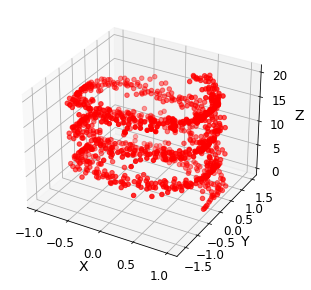

In [3]:
if scenario in ("3d", "helix"):
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    print("X_train= x,y",X_train.shape)
    print("y_train= z",y_train.shape)

    ax = plt.subplot(projection='3d')
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='r')
    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    plt.tight_layout()

    
else:
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    plt.scatter(X_train,y_train, c='grey', label='Sample Data')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

In [4]:
os.system('mkdir Dataset')
os.system('mkdir GANS')
os.system('mkdir GANS/Models')
os.system('mkdir GANS/Losses')
os.system('mkdir GANS/Random_test')
export_excel(X_train, 'Dataset/X_train')
export_excel(y_train, 'Dataset/y_train')

# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')

print('made dataset')
    
    

made dataset


# WGAN

### Architecture

In [5]:
generator=network_3D11.build_generator(latent_space, n_var, n_features,use_bias)
generator.summary()

discriminator=network_3D11.build_critic(n_var, use_bias, n_features)
discriminator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                9000      
_________________________________________________________________
batch_normalization (BatchNo (None, 30)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
batch_normalization_2 (Batch (None, 10)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 3

In [6]:
wgan = WGAN_Model11.WGAN(n_features,latent_space,BATCH_SIZE,n_var,use_bias)
wgan.wgan.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 3)                 9650      
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 2561      
Total params: 12,211
Trainable params: 12,111
Non-trainable params: 100
_________________________________________________________________


### Preprocessing

In [7]:
train_dataset, scaler, X_train_scaled = wgan.preproc(X_train, y_train, scaled)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_train_scaled",X_train_scaled.shape)

data shape_1 (100, 3)
data shape_2 (100, 3)
data shape_3 (100, 3)
data shape_4 (100, 3)
data shape_5 (100, 3)
data shape_6 (100, 3)
data shape_7 (100, 3)
data shape_8 (100, 3)
data shape_9 (100, 3)
data shape_10 (100, 3)
Cycles:  10
X_train (1000, 2)
y_train (1000, 1)
X_train_scaled (1000, 3)


## Training

In [8]:
hist = wgan.train(train_dataset, epochs, scaler, scaled, X_train, y_train)

Epoch 1/50000
critic: 58.026222 - generator: -0.043283 - 2s
Epoch 2/50000
critic: 24.879776 - generator: -0.019372 - 0s
Epoch 3/50000
critic: 11.119830 - generator: -0.015183 - 0s
Epoch 4/50000
critic: 4.641998 - generator: -0.012724 - 0s
Epoch 5/50000
critic: 1.476552 - generator: -0.005638 - 0s
Epoch 6/50000
critic: 0.218666 - generator: -0.005625 - 0s
Epoch 7/50000
critic: 0.027668 - generator: -0.000948 - 0s
Epoch 8/50000
critic: 0.036987 - generator: 0.001382 - 0s
Epoch 9/50000
critic: 0.017575 - generator: 0.002131 - 0s
Epoch 10/50000
critic: 0.013279 - generator: 0.000268 - 0s
Epoch 11/50000
critic: 0.023546 - generator: 0.001402 - 0s
Epoch 12/50000
critic: 0.013026 - generator: -0.003846 - 0s
Epoch 13/50000
critic: 0.032519 - generator: -0.003220 - 0s
Epoch 14/50000
critic: 0.018778 - generator: -0.010409 - 0s
Epoch 15/50000
critic: 0.021169 - generator: -0.018168 - 0s
Epoch 16/50000
critic: 0.025858 - generator: -0.023510 - 0s
Epoch 17/50000
critic: 0.009026 - generator: -0.02

critic: 0.012932 - generator: -0.026392 - 0s
Epoch 138/50000
critic: 0.009618 - generator: -0.029117 - 0s
Epoch 139/50000
critic: 0.004393 - generator: -0.030090 - 0s
Epoch 140/50000
critic: 0.017928 - generator: -0.028754 - 0s
Epoch 141/50000
critic: 0.010263 - generator: -0.023672 - 0s
Epoch 142/50000
critic: 0.015405 - generator: -0.024253 - 0s
Epoch 143/50000
critic: 0.010006 - generator: -0.028786 - 0s
Epoch 144/50000
critic: 0.003847 - generator: -0.022931 - 0s
Epoch 145/50000
critic: 0.017377 - generator: -0.022017 - 0s
Epoch 146/50000
critic: 0.007979 - generator: -0.021406 - 0s
Epoch 147/50000
critic: 0.016587 - generator: -0.018161 - 0s
Epoch 148/50000
critic: 0.007629 - generator: -0.016123 - 0s
Epoch 149/50000
critic: 0.012608 - generator: -0.019143 - 0s
Epoch 150/50000
critic: 0.014938 - generator: -0.024893 - 0s
Epoch 151/50000
critic: 0.014733 - generator: -0.020357 - 0s
Epoch 152/50000
critic: 0.008812 - generator: -0.014406 - 0s
Epoch 153/50000
critic: 0.018577 - gener

critic: 0.013139 - generator: 0.019089 - 0s
Epoch 274/50000
critic: 0.011981 - generator: 0.019465 - 0s
Epoch 275/50000
critic: 0.013678 - generator: 0.023529 - 0s
Epoch 276/50000
critic: 0.014578 - generator: 0.023928 - 0s
Epoch 277/50000
critic: 0.005172 - generator: 0.022880 - 0s
Epoch 278/50000
critic: 0.012505 - generator: 0.021902 - 0s
Epoch 279/50000
critic: 0.014335 - generator: 0.034531 - 0s
Epoch 280/50000
critic: 0.012325 - generator: 0.025152 - 0s
Epoch 281/50000
critic: 0.014025 - generator: 0.023296 - 0s
Epoch 282/50000
critic: 0.008729 - generator: 0.021600 - 0s
Epoch 283/50000
critic: 0.008647 - generator: 0.027776 - 0s
Epoch 284/50000
critic: 0.010001 - generator: 0.027651 - 0s
Epoch 285/50000
critic: 0.012742 - generator: 0.026722 - 0s
Epoch 286/50000
critic: 0.005994 - generator: 0.024082 - 0s
Epoch 287/50000
critic: 0.011451 - generator: 0.024677 - 0s
Epoch 288/50000
critic: 0.013211 - generator: 0.027668 - 0s
Epoch 289/50000
critic: 0.012650 - generator: 0.023490 -

critic: 0.003578 - generator: 0.020176 - 0s
Epoch 412/50000
critic: 0.009448 - generator: 0.016715 - 0s
Epoch 413/50000
critic: 0.008263 - generator: 0.018559 - 0s
Epoch 414/50000
critic: 0.014449 - generator: 0.014884 - 0s
Epoch 415/50000
critic: 0.016458 - generator: 0.017674 - 0s
Epoch 416/50000
critic: 0.009257 - generator: 0.019862 - 0s
Epoch 417/50000
critic: 0.009199 - generator: 0.015411 - 0s
Epoch 418/50000
critic: 0.016439 - generator: 0.009679 - 0s
Epoch 419/50000
critic: 0.011843 - generator: 0.016438 - 0s
Epoch 420/50000
critic: 0.015765 - generator: 0.008795 - 0s
Epoch 421/50000
critic: 0.011182 - generator: 0.013016 - 0s
Epoch 422/50000
critic: 0.017353 - generator: 0.010643 - 0s
Epoch 423/50000
critic: 0.003609 - generator: 0.016397 - 0s
Epoch 424/50000
critic: 0.009743 - generator: 0.023282 - 0s
Epoch 425/50000
critic: 0.012946 - generator: 0.025570 - 0s
Epoch 426/50000
critic: 0.015886 - generator: 0.024524 - 0s
Epoch 427/50000
critic: 0.009054 - generator: 0.018738 -

critic: 0.017689 - generator: 0.028484 - 0s
Epoch 549/50000
critic: 0.016861 - generator: 0.026943 - 0s
Epoch 550/50000
critic: 0.015783 - generator: 0.031632 - 0s
Epoch 551/50000
critic: 0.012210 - generator: 0.029505 - 0s
Epoch 552/50000
critic: 0.004405 - generator: 0.027747 - 0s
Epoch 553/50000
critic: 0.014039 - generator: 0.028846 - 0s
Epoch 554/50000
critic: 0.023065 - generator: 0.032275 - 0s
Epoch 555/50000
critic: 0.010901 - generator: 0.035108 - 0s
Epoch 556/50000
critic: 0.008377 - generator: 0.030142 - 0s
Epoch 557/50000
critic: 0.012858 - generator: 0.018441 - 0s
Epoch 558/50000
critic: 0.009554 - generator: 0.030690 - 0s
Epoch 559/50000
critic: 0.010932 - generator: 0.026515 - 0s
Epoch 560/50000
critic: 0.013651 - generator: 0.025651 - 0s
Epoch 561/50000
critic: 0.012062 - generator: 0.028719 - 0s
Epoch 562/50000
critic: 0.006909 - generator: 0.030087 - 0s
Epoch 563/50000
critic: 0.015705 - generator: 0.019244 - 0s
Epoch 564/50000
critic: 0.014628 - generator: 0.026312 -

critic: 0.011377 - generator: 0.020832 - 0s
Epoch 686/50000
critic: 0.009121 - generator: 0.022337 - 0s
Epoch 687/50000
critic: 0.007824 - generator: 0.023905 - 0s
Epoch 688/50000
critic: 0.007931 - generator: 0.024071 - 0s
Epoch 689/50000
critic: 0.016723 - generator: 0.018957 - 0s
Epoch 690/50000
critic: 0.010240 - generator: 0.014231 - 0s
Epoch 691/50000
critic: 0.010360 - generator: 0.018802 - 0s
Epoch 692/50000
critic: 0.010000 - generator: 0.019424 - 0s
Epoch 693/50000
critic: 0.009744 - generator: 0.016338 - 0s
Epoch 694/50000
critic: 0.010832 - generator: 0.018906 - 0s
Epoch 695/50000
critic: 0.011136 - generator: 0.012339 - 0s
Epoch 696/50000
critic: 0.008205 - generator: 0.020677 - 0s
Epoch 697/50000
critic: 0.007238 - generator: 0.018645 - 0s
Epoch 698/50000
critic: 0.007586 - generator: 0.010219 - 0s
Epoch 699/50000
critic: 0.006076 - generator: 0.008497 - 0s
Epoch 700/50000
critic: 0.010168 - generator: 0.009547 - 0s
Epoch 701/50000
critic: 0.006271 - generator: 0.006530 -

critic: 0.007011 - generator: 0.034044 - 0s
Epoch 824/50000
critic: 0.012454 - generator: 0.034507 - 0s
Epoch 825/50000
critic: 0.008995 - generator: 0.031774 - 0s
Epoch 826/50000
critic: 0.011109 - generator: 0.026770 - 0s
Epoch 827/50000
critic: 0.011407 - generator: 0.027130 - 0s
Epoch 828/50000
critic: 0.014829 - generator: 0.031882 - 0s
Epoch 829/50000
critic: 0.008115 - generator: 0.033776 - 0s
Epoch 830/50000
critic: 0.008685 - generator: 0.036041 - 0s
Epoch 831/50000
critic: 0.014411 - generator: 0.040458 - 0s
Epoch 832/50000
critic: 0.007796 - generator: 0.039490 - 0s
Epoch 833/50000
critic: 0.011216 - generator: 0.042859 - 0s
Epoch 834/50000
critic: 0.009904 - generator: 0.038064 - 0s
Epoch 835/50000
critic: 0.006067 - generator: 0.041284 - 0s
Epoch 836/50000
critic: 0.015081 - generator: 0.041880 - 0s
Epoch 837/50000
critic: 0.007110 - generator: 0.047579 - 0s
Epoch 838/50000
critic: 0.007670 - generator: 0.047077 - 0s
Epoch 839/50000
critic: 0.013781 - generator: 0.047867 -

critic: 0.006651 - generator: 0.055263 - 0s
Epoch 962/50000
critic: 0.012123 - generator: 0.052045 - 0s
Epoch 963/50000
critic: 0.008935 - generator: 0.048325 - 0s
Epoch 964/50000
critic: 0.013109 - generator: 0.054772 - 0s
Epoch 965/50000
critic: 0.008177 - generator: 0.054347 - 0s
Epoch 966/50000
critic: 0.008091 - generator: 0.053121 - 0s
Epoch 967/50000
critic: 0.007994 - generator: 0.048105 - 0s
Epoch 968/50000
critic: 0.013028 - generator: 0.045172 - 0s
Epoch 969/50000
critic: 0.007495 - generator: 0.043401 - 0s
Epoch 970/50000
critic: 0.007437 - generator: 0.046190 - 0s
Epoch 971/50000
critic: 0.007121 - generator: 0.044917 - 0s
Epoch 972/50000
critic: 0.009535 - generator: 0.045673 - 0s
Epoch 973/50000
critic: 0.009023 - generator: 0.044963 - 0s
Epoch 974/50000
critic: 0.006813 - generator: 0.050362 - 0s
Epoch 975/50000
critic: 0.009842 - generator: 0.049392 - 0s
Epoch 976/50000
critic: 0.006260 - generator: 0.047422 - 0s
Epoch 977/50000
critic: 0.011085 - generator: 0.049683 -

critic: 0.007962 - generator: 0.053274 - 0s
Epoch 1098/50000
critic: 0.007950 - generator: 0.049549 - 0s
Epoch 1099/50000
critic: 0.008640 - generator: 0.049756 - 0s
Epoch 1100/50000
critic: 0.006875 - generator: 0.041221 - 0s
Epoch 1101/50000
critic: 0.009947 - generator: 0.049189 - 0s
Epoch 1102/50000
critic: 0.009463 - generator: 0.047588 - 0s
Epoch 1103/50000
critic: 0.007221 - generator: 0.048077 - 0s
Epoch 1104/50000
critic: 0.003642 - generator: 0.052253 - 0s
Epoch 1105/50000
critic: 0.009600 - generator: 0.052288 - 0s
Epoch 1106/50000
critic: 0.003051 - generator: 0.050162 - 0s
Epoch 1107/50000
critic: 0.006588 - generator: 0.056292 - 0s
Epoch 1108/50000
critic: 0.003799 - generator: 0.055049 - 0s
Epoch 1109/50000
critic: 0.007576 - generator: 0.056194 - 0s
Epoch 1110/50000
critic: 0.008065 - generator: 0.052499 - 0s
Epoch 1111/50000
critic: 0.010858 - generator: 0.047590 - 0s
Epoch 1112/50000
critic: 0.007279 - generator: 0.049136 - 0s
Epoch 1113/50000
critic: 0.008509 - gener

critic: 0.006908 - generator: 0.064248 - 0s
Epoch 1234/50000
critic: 0.010190 - generator: 0.062808 - 0s
Epoch 1235/50000
critic: 0.006939 - generator: 0.065354 - 0s
Epoch 1236/50000
critic: 0.009629 - generator: 0.064569 - 0s
Epoch 1237/50000
critic: 0.013920 - generator: 0.059460 - 0s
Epoch 1238/50000
critic: 0.004785 - generator: 0.057147 - 0s
Epoch 1239/50000
critic: 0.008548 - generator: 0.056080 - 0s
Epoch 1240/50000
critic: 0.011599 - generator: 0.056312 - 0s
Epoch 1241/50000
critic: 0.012717 - generator: 0.056155 - 0s
Epoch 1242/50000
critic: 0.009240 - generator: 0.055280 - 0s
Epoch 1243/50000
critic: 0.006759 - generator: 0.054270 - 0s
Epoch 1244/50000
critic: 0.009523 - generator: 0.048366 - 0s
Epoch 1245/50000
critic: 0.006207 - generator: 0.055736 - 0s
Epoch 1246/50000
critic: 0.007110 - generator: 0.054060 - 0s
Epoch 1247/50000
critic: 0.010403 - generator: 0.055249 - 0s
Epoch 1248/50000
critic: 0.008394 - generator: 0.054915 - 0s
Epoch 1249/50000
critic: 0.007324 - gener

critic: 0.004667 - generator: 0.063151 - 0s
Epoch 1370/50000
critic: 0.007731 - generator: 0.065624 - 0s
Epoch 1371/50000
critic: 0.010840 - generator: 0.075633 - 0s
Epoch 1372/50000
critic: 0.012471 - generator: 0.065877 - 0s
Epoch 1373/50000
critic: 0.005646 - generator: 0.066999 - 0s
Epoch 1374/50000
critic: 0.003483 - generator: 0.064997 - 0s
Epoch 1375/50000
critic: 0.003928 - generator: 0.065120 - 0s
Epoch 1376/50000
critic: 0.006034 - generator: 0.066893 - 0s
Epoch 1377/50000
critic: 0.009645 - generator: 0.065837 - 0s
Epoch 1378/50000
critic: 0.008366 - generator: 0.068611 - 0s
Epoch 1379/50000
critic: 0.010666 - generator: 0.066325 - 0s
Epoch 1380/50000
critic: 0.013242 - generator: 0.066840 - 0s
Epoch 1381/50000
critic: 0.011189 - generator: 0.066395 - 0s
Epoch 1382/50000
critic: 0.007619 - generator: 0.063326 - 0s
Epoch 1383/50000
critic: 0.011546 - generator: 0.064897 - 0s
Epoch 1384/50000
critic: 0.008141 - generator: 0.059529 - 0s
Epoch 1385/50000
critic: 0.011439 - gener

critic: 0.008508 - generator: 0.065974 - 0s
Epoch 1506/50000
critic: 0.006740 - generator: 0.065920 - 0s
Epoch 1507/50000
critic: 0.002339 - generator: 0.069681 - 0s
Epoch 1508/50000
critic: 0.012243 - generator: 0.072674 - 0s
Epoch 1509/50000
critic: 0.010280 - generator: 0.070142 - 0s
Epoch 1510/50000
critic: 0.008719 - generator: 0.076496 - 0s
Epoch 1511/50000
critic: 0.007750 - generator: 0.071314 - 0s
Epoch 1512/50000
critic: 0.011502 - generator: 0.074256 - 0s
Epoch 1513/50000
critic: 0.006696 - generator: 0.078192 - 0s
Epoch 1514/50000
critic: 0.005089 - generator: 0.078304 - 0s
Epoch 1515/50000
critic: 0.005443 - generator: 0.075322 - 0s
Epoch 1516/50000
critic: 0.011925 - generator: 0.076605 - 0s
Epoch 1517/50000
critic: 0.007743 - generator: 0.082969 - 0s
Epoch 1518/50000
critic: 0.012724 - generator: 0.081217 - 0s
Epoch 1519/50000
critic: 0.005566 - generator: 0.079314 - 0s
Epoch 1520/50000
critic: 0.006218 - generator: 0.080227 - 0s
Epoch 1521/50000
critic: 0.003044 - gener

critic: 0.009129 - generator: 0.101240 - 0s
Epoch 1642/50000
critic: 0.007899 - generator: 0.097534 - 0s
Epoch 1643/50000
critic: 0.002326 - generator: 0.098911 - 0s
Epoch 1644/50000
critic: 0.008289 - generator: 0.101210 - 0s
Epoch 1645/50000
critic: 0.005639 - generator: 0.101608 - 0s
Epoch 1646/50000
critic: 0.008748 - generator: 0.098869 - 0s
Epoch 1647/50000
critic: 0.010150 - generator: 0.100457 - 0s
Epoch 1648/50000
critic: 0.009401 - generator: 0.107461 - 0s
Epoch 1649/50000
critic: 0.013167 - generator: 0.108806 - 0s
Epoch 1650/50000
critic: 0.005650 - generator: 0.099171 - 0s
Epoch 1651/50000
critic: 0.009403 - generator: 0.108673 - 0s
Epoch 1652/50000
critic: 0.009007 - generator: 0.103000 - 0s
Epoch 1653/50000
critic: 0.007732 - generator: 0.103042 - 0s
Epoch 1654/50000
critic: 0.008848 - generator: 0.105103 - 0s
Epoch 1655/50000
critic: 0.007523 - generator: 0.105585 - 0s
Epoch 1656/50000
critic: 0.012240 - generator: 0.108756 - 0s
Epoch 1657/50000
critic: 0.010143 - gener

critic: 0.010334 - generator: 0.088970 - 0s
Epoch 1778/50000
critic: 0.006853 - generator: 0.089416 - 0s
Epoch 1779/50000
critic: 0.004929 - generator: 0.092248 - 0s
Epoch 1780/50000
critic: 0.006705 - generator: 0.095767 - 0s
Epoch 1781/50000
critic: 0.006875 - generator: 0.095569 - 0s
Epoch 1782/50000
critic: 0.010540 - generator: 0.093083 - 0s
Epoch 1783/50000
critic: 0.010319 - generator: 0.093202 - 0s
Epoch 1784/50000
critic: 0.007336 - generator: 0.091060 - 0s
Epoch 1785/50000
critic: 0.002655 - generator: 0.089938 - 0s
Epoch 1786/50000
critic: 0.009960 - generator: 0.088722 - 0s
Epoch 1787/50000
critic: 0.008210 - generator: 0.090445 - 0s
Epoch 1788/50000
critic: 0.005731 - generator: 0.090139 - 0s
Epoch 1789/50000
critic: 0.009012 - generator: 0.091387 - 0s
Epoch 1790/50000
critic: 0.012904 - generator: 0.088171 - 0s
Epoch 1791/50000
critic: 0.011778 - generator: 0.088570 - 0s
Epoch 1792/50000
critic: 0.010221 - generator: 0.087360 - 0s
Epoch 1793/50000
critic: 0.007781 - gener

critic: 0.010810 - generator: 0.094633 - 0s
Epoch 1914/50000
critic: 0.010364 - generator: 0.099790 - 0s
Epoch 1915/50000
critic: 0.011707 - generator: 0.101136 - 0s
Epoch 1916/50000
critic: 0.006414 - generator: 0.097254 - 0s
Epoch 1917/50000
critic: 0.005769 - generator: 0.092992 - 0s
Epoch 1918/50000
critic: 0.008967 - generator: 0.098860 - 0s
Epoch 1919/50000
critic: 0.011227 - generator: 0.094269 - 0s
Epoch 1920/50000
critic: 0.007081 - generator: 0.091796 - 0s
Epoch 1921/50000
critic: 0.008502 - generator: 0.091653 - 0s
Epoch 1922/50000
critic: 0.009703 - generator: 0.094125 - 0s
Epoch 1923/50000
critic: 0.006983 - generator: 0.090895 - 0s
Epoch 1924/50000
critic: 0.004393 - generator: 0.093031 - 0s
Epoch 1925/50000
critic: 0.009336 - generator: 0.092734 - 0s
Epoch 1926/50000
critic: 0.004595 - generator: 0.097022 - 0s
Epoch 1927/50000
critic: 0.007002 - generator: 0.096553 - 0s
Epoch 1928/50000
critic: 0.007421 - generator: 0.097089 - 0s
Epoch 1929/50000
critic: 0.008146 - gener

critic: 0.010551 - generator: 0.103563 - 0s
Epoch 2050/50000
critic: 0.006854 - generator: 0.105928 - 0s
Epoch 2051/50000
critic: 0.010653 - generator: 0.101832 - 0s
Epoch 2052/50000
critic: 0.013117 - generator: 0.106203 - 0s
Epoch 2053/50000
critic: 0.009872 - generator: 0.103056 - 0s
Epoch 2054/50000
critic: 0.010341 - generator: 0.101852 - 0s
Epoch 2055/50000
critic: 0.005237 - generator: 0.100617 - 0s
Epoch 2056/50000
critic: 0.005419 - generator: 0.101622 - 0s
Epoch 2057/50000
critic: 0.009611 - generator: 0.101665 - 0s
Epoch 2058/50000
critic: 0.012610 - generator: 0.105126 - 0s
Epoch 2059/50000
critic: 0.006335 - generator: 0.107197 - 0s
Epoch 2060/50000
critic: 0.006808 - generator: 0.101943 - 0s
Epoch 2061/50000
critic: 0.003705 - generator: 0.103667 - 0s
Epoch 2062/50000
critic: 0.005850 - generator: 0.109069 - 0s
Epoch 2063/50000
critic: 0.007462 - generator: 0.102412 - 0s
Epoch 2064/50000
critic: 0.012599 - generator: 0.104049 - 0s
Epoch 2065/50000
critic: 0.012249 - gener

critic: 0.005019 - generator: 0.117881 - 0s
Epoch 2186/50000
critic: 0.005793 - generator: 0.120778 - 0s
Epoch 2187/50000
critic: 0.007114 - generator: 0.117238 - 0s
Epoch 2188/50000
critic: 0.004041 - generator: 0.116013 - 0s
Epoch 2189/50000
critic: 0.009560 - generator: 0.119689 - 0s
Epoch 2190/50000
critic: 0.006071 - generator: 0.119097 - 0s
Epoch 2191/50000
critic: 0.012744 - generator: 0.120810 - 0s
Epoch 2192/50000
critic: 0.008674 - generator: 0.121287 - 0s
Epoch 2193/50000
critic: 0.008322 - generator: 0.120082 - 0s
Epoch 2194/50000
critic: 0.007820 - generator: 0.119126 - 0s
Epoch 2195/50000
critic: 0.004981 - generator: 0.119400 - 0s
Epoch 2196/50000
critic: 0.008319 - generator: 0.121066 - 0s
Epoch 2197/50000
critic: 0.005388 - generator: 0.124337 - 0s
Epoch 2198/50000
critic: 0.008141 - generator: 0.121315 - 0s
Epoch 2199/50000
critic: 0.004188 - generator: 0.122153 - 0s
Epoch 2200/50000
critic: 0.006567 - generator: 0.120727 - 0s
Epoch 2201/50000
critic: 0.005201 - gener

critic: 0.010063 - generator: 0.122059 - 0s
Epoch 2322/50000
critic: 0.007103 - generator: 0.120867 - 0s
Epoch 2323/50000
critic: 0.008822 - generator: 0.121147 - 0s
Epoch 2324/50000
critic: 0.006117 - generator: 0.115933 - 0s
Epoch 2325/50000
critic: 0.007115 - generator: 0.117205 - 0s
Epoch 2326/50000
critic: 0.008008 - generator: 0.121942 - 0s
Epoch 2327/50000
critic: 0.000962 - generator: 0.121783 - 0s
Epoch 2328/50000
critic: 0.008527 - generator: 0.118615 - 0s
Epoch 2329/50000
critic: 0.004794 - generator: 0.117852 - 0s
Epoch 2330/50000
critic: 0.005518 - generator: 0.123975 - 0s
Epoch 2331/50000
critic: 0.006907 - generator: 0.122676 - 0s
Epoch 2332/50000
critic: 0.007004 - generator: 0.122638 - 0s
Epoch 2333/50000
critic: 0.010461 - generator: 0.125773 - 0s
Epoch 2334/50000
critic: 0.006183 - generator: 0.120888 - 0s
Epoch 2335/50000
critic: 0.008485 - generator: 0.115626 - 0s
Epoch 2336/50000
critic: 0.008323 - generator: 0.120398 - 0s
Epoch 2337/50000
critic: 0.007156 - gener

critic: 0.004867 - generator: 0.115847 - 0s
Epoch 2458/50000
critic: 0.004396 - generator: 0.120574 - 0s
Epoch 2459/50000
critic: 0.006899 - generator: 0.114968 - 0s
Epoch 2460/50000
critic: 0.007365 - generator: 0.119961 - 0s
Epoch 2461/50000
critic: 0.011870 - generator: 0.121508 - 0s
Epoch 2462/50000
critic: 0.006699 - generator: 0.117884 - 0s
Epoch 2463/50000
critic: 0.010975 - generator: 0.115075 - 0s
Epoch 2464/50000
critic: 0.008103 - generator: 0.113956 - 0s
Epoch 2465/50000
critic: 0.005634 - generator: 0.111213 - 0s
Epoch 2466/50000
critic: 0.009299 - generator: 0.117336 - 0s
Epoch 2467/50000
critic: 0.009905 - generator: 0.109628 - 0s
Epoch 2468/50000
critic: 0.010561 - generator: 0.112681 - 0s
Epoch 2469/50000
critic: 0.008356 - generator: 0.112880 - 0s
Epoch 2470/50000
critic: 0.005493 - generator: 0.112232 - 0s
Epoch 2471/50000
critic: 0.007287 - generator: 0.112089 - 0s
Epoch 2472/50000
critic: 0.005407 - generator: 0.111435 - 0s
Epoch 2473/50000
critic: 0.007861 - gener

critic: 0.006889 - generator: 0.129688 - 0s
Epoch 2594/50000
critic: 0.007501 - generator: 0.140335 - 0s
Epoch 2595/50000
critic: 0.003514 - generator: 0.136507 - 0s
Epoch 2596/50000
critic: 0.005230 - generator: 0.132337 - 0s
Epoch 2597/50000
critic: 0.003403 - generator: 0.132201 - 0s
Epoch 2598/50000
critic: 0.004107 - generator: 0.133952 - 0s
Epoch 2599/50000
critic: 0.008836 - generator: 0.132864 - 0s
Epoch 2600/50000
critic: 0.007038 - generator: 0.131612 - 0s
Epoch 2601/50000
critic: 0.010568 - generator: 0.129937 - 0s
Epoch 2602/50000
critic: 0.005998 - generator: 0.130826 - 0s
Epoch 2603/50000
critic: 0.004935 - generator: 0.125421 - 0s
Epoch 2604/50000
critic: 0.005318 - generator: 0.126858 - 0s
Epoch 2605/50000
critic: 0.004478 - generator: 0.130289 - 0s
Epoch 2606/50000
critic: 0.007612 - generator: 0.128517 - 0s
Epoch 2607/50000
critic: 0.007883 - generator: 0.124869 - 0s
Epoch 2608/50000
critic: 0.012527 - generator: 0.123860 - 0s
Epoch 2609/50000
critic: 0.005975 - gener

critic: 0.010176 - generator: 0.128878 - 0s
Epoch 2729/50000
critic: 0.005638 - generator: 0.125179 - 0s
Epoch 2730/50000
critic: 0.001745 - generator: 0.125131 - 0s
Epoch 2731/50000
critic: 0.005541 - generator: 0.124861 - 0s
Epoch 2732/50000
critic: 0.003015 - generator: 0.128449 - 0s
Epoch 2733/50000
critic: 0.005451 - generator: 0.127616 - 0s
Epoch 2734/50000
critic: 0.008426 - generator: 0.124596 - 0s
Epoch 2735/50000
critic: 0.005429 - generator: 0.123249 - 0s
Epoch 2736/50000
critic: 0.002965 - generator: 0.121978 - 0s
Epoch 2737/50000
critic: 0.006568 - generator: 0.122788 - 0s
Epoch 2738/50000
critic: 0.008716 - generator: 0.124160 - 0s
Epoch 2739/50000
critic: 0.006704 - generator: 0.120243 - 0s
Epoch 2740/50000
critic: 0.002539 - generator: 0.119414 - 0s
Epoch 2741/50000
critic: 0.005075 - generator: 0.120206 - 0s
Epoch 2742/50000
critic: 0.003749 - generator: 0.124307 - 0s
Epoch 2743/50000
critic: 0.006678 - generator: 0.125830 - 0s
Epoch 2744/50000
critic: 0.006333 - gener

critic: 0.006092 - generator: 0.126293 - 0s
Epoch 2865/50000
critic: 0.007711 - generator: 0.126426 - 0s
Epoch 2866/50000
critic: 0.012440 - generator: 0.127869 - 0s
Epoch 2867/50000
critic: 0.006605 - generator: 0.127352 - 0s
Epoch 2868/50000
critic: 0.007974 - generator: 0.126069 - 0s
Epoch 2869/50000
critic: 0.005934 - generator: 0.121817 - 0s
Epoch 2870/50000
critic: 0.007503 - generator: 0.129224 - 0s
Epoch 2871/50000
critic: 0.008767 - generator: 0.122721 - 0s
Epoch 2872/50000
critic: 0.009154 - generator: 0.124574 - 0s
Epoch 2873/50000
critic: 0.008900 - generator: 0.122109 - 0s
Epoch 2874/50000
critic: 0.009062 - generator: 0.118426 - 0s
Epoch 2875/50000
critic: 0.006108 - generator: 0.118221 - 0s
Epoch 2876/50000
critic: 0.008559 - generator: 0.115717 - 0s
Epoch 2877/50000
critic: 0.001640 - generator: 0.118333 - 0s
Epoch 2878/50000
critic: 0.003190 - generator: 0.114003 - 0s
Epoch 2879/50000
critic: 0.002961 - generator: 0.116433 - 0s
Epoch 2880/50000
critic: 0.004196 - gener

critic: 0.005577 - generator: 0.109053 - 0s
Epoch 3001/50000
critic: 0.003869 - generator: 0.113313 - 0s
Epoch 3002/50000
critic: 0.004812 - generator: 0.115216 - 0s
Epoch 3003/50000
critic: 0.005111 - generator: 0.114884 - 0s
Epoch 3004/50000
critic: 0.009537 - generator: 0.114651 - 0s
Epoch 3005/50000
critic: 0.006435 - generator: 0.115506 - 0s
Epoch 3006/50000
critic: 0.005710 - generator: 0.121668 - 0s
Epoch 3007/50000
critic: 0.003817 - generator: 0.117510 - 0s
Epoch 3008/50000
critic: 0.007772 - generator: 0.121794 - 0s
Epoch 3009/50000
critic: 0.006329 - generator: 0.120485 - 0s
Epoch 3010/50000
critic: 0.002106 - generator: 0.128466 - 0s
Epoch 3011/50000
critic: 0.009397 - generator: 0.119406 - 0s
Epoch 3012/50000
critic: 0.004208 - generator: 0.123417 - 0s
Epoch 3013/50000
critic: 0.009636 - generator: 0.126627 - 0s
Epoch 3014/50000
critic: 0.005109 - generator: 0.125977 - 0s
Epoch 3015/50000
critic: 0.011128 - generator: 0.125309 - 0s
Epoch 3016/50000
critic: 0.011679 - gener

critic: 0.007277 - generator: 0.114936 - 0s
Epoch 3136/50000
critic: 0.006560 - generator: 0.116516 - 0s
Epoch 3137/50000
critic: 0.005891 - generator: 0.117298 - 0s
Epoch 3138/50000
critic: 0.004455 - generator: 0.117867 - 0s
Epoch 3139/50000
critic: 0.004807 - generator: 0.116359 - 0s
Epoch 3140/50000
critic: 0.015009 - generator: 0.113945 - 0s
Epoch 3141/50000
critic: 0.007081 - generator: 0.120344 - 0s
Epoch 3142/50000
critic: 0.008936 - generator: 0.122594 - 0s
Epoch 3143/50000
critic: 0.005816 - generator: 0.114976 - 0s
Epoch 3144/50000
critic: 0.003873 - generator: 0.118387 - 0s
Epoch 3145/50000
critic: 0.006075 - generator: 0.117898 - 0s
Epoch 3146/50000
critic: 0.007837 - generator: 0.114826 - 0s
Epoch 3147/50000
critic: 0.007850 - generator: 0.120754 - 0s
Epoch 3148/50000
critic: 0.006046 - generator: 0.117702 - 0s
Epoch 3149/50000
critic: 0.002663 - generator: 0.122637 - 0s
Epoch 3150/50000
critic: 0.010057 - generator: 0.122524 - 0s
Epoch 3151/50000
critic: 0.006208 - gener

critic: 0.011854 - generator: 0.112110 - 0s
Epoch 3272/50000
critic: 0.005993 - generator: 0.111560 - 0s
Epoch 3273/50000
critic: 0.004962 - generator: 0.112783 - 0s
Epoch 3274/50000
critic: 0.002117 - generator: 0.112473 - 0s
Epoch 3275/50000
critic: 0.006182 - generator: 0.113287 - 0s
Epoch 3276/50000
critic: 0.004018 - generator: 0.119125 - 0s
Epoch 3277/50000
critic: 0.014464 - generator: 0.116023 - 0s
Epoch 3278/50000
critic: 0.003075 - generator: 0.113892 - 0s
Epoch 3279/50000
critic: 0.006334 - generator: 0.118563 - 0s
Epoch 3280/50000
critic: 0.005576 - generator: 0.121515 - 0s
Epoch 3281/50000
critic: 0.011538 - generator: 0.119610 - 0s
Epoch 3282/50000
critic: 0.008665 - generator: 0.120203 - 0s
Epoch 3283/50000
critic: 0.007710 - generator: 0.121640 - 0s
Epoch 3284/50000
critic: 0.006554 - generator: 0.122519 - 0s
Epoch 3285/50000
critic: 0.003343 - generator: 0.117678 - 0s
Epoch 3286/50000
critic: 0.005363 - generator: 0.120712 - 0s
Epoch 3287/50000
critic: 0.008984 - gener

critic: 0.007994 - generator: 0.119956 - 0s
Epoch 3408/50000
critic: 0.005033 - generator: 0.122949 - 0s
Epoch 3409/50000
critic: 0.006742 - generator: 0.124940 - 0s
Epoch 3410/50000
critic: 0.004271 - generator: 0.127345 - 0s
Epoch 3411/50000
critic: 0.006175 - generator: 0.128438 - 0s
Epoch 3412/50000
critic: 0.008995 - generator: 0.128658 - 0s
Epoch 3413/50000
critic: 0.009353 - generator: 0.130970 - 0s
Epoch 3414/50000
critic: 0.007597 - generator: 0.128915 - 0s
Epoch 3415/50000
critic: 0.006507 - generator: 0.127450 - 0s
Epoch 3416/50000
critic: 0.005866 - generator: 0.132537 - 0s
Epoch 3417/50000
critic: 0.010262 - generator: 0.137208 - 0s
Epoch 3418/50000
critic: 0.004805 - generator: 0.129769 - 0s
Epoch 3419/50000
critic: 0.006120 - generator: 0.137013 - 0s
Epoch 3420/50000
critic: 0.007441 - generator: 0.131156 - 0s
Epoch 3421/50000
critic: 0.009298 - generator: 0.132282 - 0s
Epoch 3422/50000
critic: 0.002454 - generator: 0.134117 - 0s
Epoch 3423/50000
critic: 0.003100 - gener

critic: 0.007078 - generator: 0.155176 - 0s
Epoch 3543/50000
critic: 0.007115 - generator: 0.153605 - 0s
Epoch 3544/50000
critic: 0.007168 - generator: 0.148805 - 0s
Epoch 3545/50000
critic: 0.002138 - generator: 0.155208 - 0s
Epoch 3546/50000
critic: 0.009651 - generator: 0.157408 - 0s
Epoch 3547/50000
critic: 0.003615 - generator: 0.152760 - 0s
Epoch 3548/50000
critic: 0.003462 - generator: 0.157586 - 0s
Epoch 3549/50000
critic: 0.006142 - generator: 0.160853 - 0s
Epoch 3550/50000
critic: 0.004754 - generator: 0.158485 - 0s
Epoch 3551/50000
critic: 0.011882 - generator: 0.157399 - 0s
Epoch 3552/50000
critic: 0.003831 - generator: 0.156221 - 0s
Epoch 3553/50000
critic: 0.007515 - generator: 0.158061 - 0s
Epoch 3554/50000
critic: 0.009886 - generator: 0.156336 - 0s
Epoch 3555/50000
critic: 0.007215 - generator: 0.162255 - 0s
Epoch 3556/50000
critic: 0.006480 - generator: 0.159929 - 0s
Epoch 3557/50000
critic: 0.011468 - generator: 0.163320 - 0s
Epoch 3558/50000
critic: 0.007231 - gener

critic: 0.004901 - generator: 0.151149 - 0s
Epoch 3679/50000
critic: 0.004474 - generator: 0.150689 - 0s
Epoch 3680/50000
critic: 0.003681 - generator: 0.148898 - 0s
Epoch 3681/50000
critic: 0.008664 - generator: 0.151020 - 0s
Epoch 3682/50000
critic: 0.001829 - generator: 0.150264 - 0s
Epoch 3683/50000
critic: 0.007178 - generator: 0.149876 - 0s
Epoch 3684/50000
critic: 0.002263 - generator: 0.150558 - 0s
Epoch 3685/50000
critic: 0.007245 - generator: 0.156123 - 0s
Epoch 3686/50000
critic: 0.004210 - generator: 0.154369 - 0s
Epoch 3687/50000
critic: 0.006961 - generator: 0.159102 - 0s
Epoch 3688/50000
critic: 0.004579 - generator: 0.161506 - 0s
Epoch 3689/50000
critic: 0.005048 - generator: 0.164257 - 0s
Epoch 3690/50000
critic: 0.004550 - generator: 0.159530 - 0s
Epoch 3691/50000
critic: 0.005079 - generator: 0.162356 - 0s
Epoch 3692/50000
critic: 0.012202 - generator: 0.162336 - 0s
Epoch 3693/50000
critic: 0.005900 - generator: 0.167965 - 0s
Epoch 3694/50000
critic: 0.008253 - gener

critic: 0.007823 - generator: 0.159040 - 0s
Epoch 3815/50000
critic: 0.005925 - generator: 0.158937 - 0s
Epoch 3816/50000
critic: 0.007428 - generator: 0.160167 - 0s
Epoch 3817/50000
critic: 0.007286 - generator: 0.159023 - 0s
Epoch 3818/50000
critic: 0.006407 - generator: 0.160495 - 0s
Epoch 3819/50000
critic: 0.009973 - generator: 0.155997 - 0s
Epoch 3820/50000
critic: 0.004415 - generator: 0.161050 - 0s
Epoch 3821/50000
critic: 0.005510 - generator: 0.164304 - 0s
Epoch 3822/50000
critic: 0.008290 - generator: 0.160346 - 0s
Epoch 3823/50000
critic: 0.006848 - generator: 0.157778 - 0s
Epoch 3824/50000
critic: 0.005917 - generator: 0.156887 - 0s
Epoch 3825/50000
critic: 0.004227 - generator: 0.158187 - 0s
Epoch 3826/50000
critic: 0.006051 - generator: 0.162859 - 0s
Epoch 3827/50000
critic: 0.005241 - generator: 0.163896 - 0s
Epoch 3828/50000
critic: 0.003136 - generator: 0.160804 - 0s
Epoch 3829/50000
critic: 0.002473 - generator: 0.165265 - 0s
Epoch 3830/50000
critic: 0.005781 - gener

critic: 0.008644 - generator: 0.173004 - 0s
Epoch 3950/50000
critic: 0.004662 - generator: 0.172720 - 0s
Epoch 3951/50000
critic: 0.005031 - generator: 0.172099 - 0s
Epoch 3952/50000
critic: 0.008842 - generator: 0.172112 - 0s
Epoch 3953/50000
critic: 0.004797 - generator: 0.171419 - 0s
Epoch 3954/50000
critic: 0.009847 - generator: 0.169848 - 0s
Epoch 3955/50000
critic: 0.004685 - generator: 0.163505 - 0s
Epoch 3956/50000
critic: 0.005252 - generator: 0.169320 - 0s
Epoch 3957/50000
critic: 0.006758 - generator: 0.170382 - 0s
Epoch 3958/50000
critic: 0.004904 - generator: 0.167856 - 0s
Epoch 3959/50000
critic: 0.003615 - generator: 0.165441 - 0s
Epoch 3960/50000
critic: 0.008263 - generator: 0.170059 - 0s
Epoch 3961/50000
critic: 0.006784 - generator: 0.167229 - 0s
Epoch 3962/50000
critic: 0.004612 - generator: 0.170579 - 0s
Epoch 3963/50000
critic: 0.008122 - generator: 0.168395 - 0s
Epoch 3964/50000
critic: 0.007058 - generator: 0.164333 - 0s
Epoch 3965/50000
critic: 0.005065 - gener

critic: 0.007260 - generator: 0.171723 - 0s
Epoch 4086/50000
critic: 0.007965 - generator: 0.176119 - 0s
Epoch 4087/50000
critic: 0.005217 - generator: 0.172561 - 0s
Epoch 4088/50000
critic: 0.004589 - generator: 0.173198 - 0s
Epoch 4089/50000
critic: 0.006738 - generator: 0.172295 - 0s
Epoch 4090/50000
critic: 0.007150 - generator: 0.175245 - 0s
Epoch 4091/50000
critic: 0.002080 - generator: 0.172817 - 0s
Epoch 4092/50000
critic: 0.004292 - generator: 0.173476 - 0s
Epoch 4093/50000
critic: 0.009826 - generator: 0.167364 - 0s
Epoch 4094/50000
critic: 0.005441 - generator: 0.172315 - 0s
Epoch 4095/50000
critic: 0.009465 - generator: 0.168881 - 0s
Epoch 4096/50000
critic: 0.002766 - generator: 0.170308 - 0s
Epoch 4097/50000
critic: 0.004391 - generator: 0.167217 - 0s
Epoch 4098/50000
critic: 0.007631 - generator: 0.171639 - 0s
Epoch 4099/50000
critic: 0.006725 - generator: 0.171714 - 0s
Epoch 4100/50000
critic: 0.001038 - generator: 0.171066 - 0s
Epoch 4101/50000
critic: 0.006991 - gener

critic: 0.005070 - generator: 0.172205 - 0s
Epoch 4222/50000
critic: 0.007659 - generator: 0.173587 - 0s
Epoch 4223/50000
critic: 0.005306 - generator: 0.169842 - 0s
Epoch 4224/50000
critic: 0.004684 - generator: 0.174789 - 0s
Epoch 4225/50000
critic: 0.003669 - generator: 0.171871 - 0s
Epoch 4226/50000
critic: 0.002851 - generator: 0.172591 - 0s
Epoch 4227/50000
critic: 0.005305 - generator: 0.175037 - 0s
Epoch 4228/50000
critic: 0.005449 - generator: 0.172154 - 0s
Epoch 4229/50000
critic: 0.003825 - generator: 0.170101 - 0s
Epoch 4230/50000
critic: 0.004670 - generator: 0.174590 - 0s
Epoch 4231/50000
critic: 0.004493 - generator: 0.173157 - 0s
Epoch 4232/50000
critic: 0.003206 - generator: 0.173557 - 0s
Epoch 4233/50000
critic: 0.003842 - generator: 0.173593 - 0s
Epoch 4234/50000
critic: 0.007764 - generator: 0.173733 - 0s
Epoch 4235/50000
critic: 0.005635 - generator: 0.171577 - 0s
Epoch 4236/50000
critic: 0.004163 - generator: 0.170802 - 0s
Epoch 4237/50000
critic: 0.003004 - gener

critic: 0.006130 - generator: 0.177322 - 0s
Epoch 4358/50000
critic: 0.008644 - generator: 0.178614 - 0s
Epoch 4359/50000
critic: 0.005725 - generator: 0.171634 - 0s
Epoch 4360/50000
critic: 0.003420 - generator: 0.174264 - 0s
Epoch 4361/50000
critic: 0.009390 - generator: 0.174051 - 0s
Epoch 4362/50000
critic: 0.002183 - generator: 0.171611 - 0s
Epoch 4363/50000
critic: 0.003151 - generator: 0.172941 - 0s
Epoch 4364/50000
critic: 0.004149 - generator: 0.173370 - 0s
Epoch 4365/50000
critic: 0.012311 - generator: 0.177111 - 0s
Epoch 4366/50000
critic: 0.003947 - generator: 0.176254 - 0s
Epoch 4367/50000
critic: 0.002890 - generator: 0.176279 - 0s
Epoch 4368/50000
critic: 0.004939 - generator: 0.182154 - 0s
Epoch 4369/50000
critic: 0.002987 - generator: 0.178201 - 0s
Epoch 4370/50000
critic: 0.005406 - generator: 0.176731 - 0s
Epoch 4371/50000
critic: 0.008546 - generator: 0.176167 - 0s
Epoch 4372/50000
critic: 0.007694 - generator: 0.179293 - 0s
Epoch 4373/50000
critic: 0.005898 - gener

critic: 0.005086 - generator: 0.188161 - 0s
Epoch 4493/50000
critic: 0.004135 - generator: 0.181424 - 0s
Epoch 4494/50000
critic: 0.007958 - generator: 0.185513 - 0s
Epoch 4495/50000
critic: 0.008546 - generator: 0.183982 - 0s
Epoch 4496/50000
critic: 0.006259 - generator: 0.186296 - 0s
Epoch 4497/50000
critic: 0.005511 - generator: 0.188703 - 0s
Epoch 4498/50000
critic: 0.002228 - generator: 0.188562 - 0s
Epoch 4499/50000
critic: 0.003652 - generator: 0.189940 - 0s
Epoch 4500/50000
critic: 0.010517 - generator: 0.188537 - 0s
Epoch 4501/50000
critic: 0.002166 - generator: 0.187192 - 0s
Epoch 4502/50000
critic: 0.004898 - generator: 0.190053 - 0s
Epoch 4503/50000
critic: 0.007731 - generator: 0.191643 - 0s
Epoch 4504/50000
critic: 0.006422 - generator: 0.190128 - 0s
Epoch 4505/50000
critic: 0.003632 - generator: 0.187407 - 0s
Epoch 4506/50000
critic: 0.008822 - generator: 0.191553 - 0s
Epoch 4507/50000
critic: 0.006011 - generator: 0.183968 - 0s
Epoch 4508/50000
critic: 0.007630 - gener

critic: 0.008542 - generator: 0.194403 - 0s
Epoch 4628/50000
critic: 0.003286 - generator: 0.193926 - 0s
Epoch 4629/50000
critic: 0.007163 - generator: 0.196649 - 0s
Epoch 4630/50000
critic: 0.005245 - generator: 0.194075 - 0s
Epoch 4631/50000
critic: 0.006755 - generator: 0.200423 - 0s
Epoch 4632/50000
critic: 0.003283 - generator: 0.194158 - 0s
Epoch 4633/50000
critic: 0.007827 - generator: 0.198793 - 0s
Epoch 4634/50000
critic: 0.001106 - generator: 0.197452 - 0s
Epoch 4635/50000
critic: 0.010837 - generator: 0.199569 - 0s
Epoch 4636/50000
critic: 0.006100 - generator: 0.194836 - 0s
Epoch 4637/50000
critic: 0.006095 - generator: 0.195163 - 0s
Epoch 4638/50000
critic: 0.006797 - generator: 0.195923 - 0s
Epoch 4639/50000
critic: 0.002955 - generator: 0.198085 - 0s
Epoch 4640/50000
critic: 0.005069 - generator: 0.200045 - 0s
Epoch 4641/50000
critic: 0.001993 - generator: 0.201576 - 0s
Epoch 4642/50000
critic: 0.000396 - generator: 0.198637 - 0s
Epoch 4643/50000
critic: 0.006006 - gener

critic: 0.008098 - generator: 0.208905 - 0s
Epoch 4763/50000
critic: 0.006033 - generator: 0.209060 - 0s
Epoch 4764/50000
critic: 0.002992 - generator: 0.208568 - 0s
Epoch 4765/50000
critic: 0.007045 - generator: 0.207318 - 0s
Epoch 4766/50000
critic: 0.003957 - generator: 0.207187 - 0s
Epoch 4767/50000
critic: 0.008168 - generator: 0.206488 - 0s
Epoch 4768/50000
critic: 0.008158 - generator: 0.206900 - 0s
Epoch 4769/50000
critic: 0.002072 - generator: 0.198324 - 0s
Epoch 4770/50000
critic: 0.002368 - generator: 0.197868 - 0s
Epoch 4771/50000
critic: 0.003291 - generator: 0.200429 - 0s
Epoch 4772/50000
critic: 0.006962 - generator: 0.203602 - 0s
Epoch 4773/50000
critic: 0.004928 - generator: 0.202100 - 0s
Epoch 4774/50000
critic: 0.007948 - generator: 0.205424 - 0s
Epoch 4775/50000
critic: 0.003115 - generator: 0.199809 - 0s
Epoch 4776/50000
critic: 0.007903 - generator: 0.201745 - 0s
Epoch 4777/50000
critic: 0.007179 - generator: 0.202326 - 0s
Epoch 4778/50000
critic: 0.003689 - gener

critic: 0.007259 - generator: 0.208572 - 0s
Epoch 4899/50000
critic: 0.006041 - generator: 0.211548 - 0s
Epoch 4900/50000
critic: 0.004067 - generator: 0.208171 - 0s
Epoch 4901/50000
critic: 0.004914 - generator: 0.210493 - 0s
Epoch 4902/50000
critic: 0.003666 - generator: 0.207028 - 0s
Epoch 4903/50000
critic: 0.004681 - generator: 0.205243 - 0s
Epoch 4904/50000
critic: 0.006233 - generator: 0.201210 - 0s
Epoch 4905/50000
critic: 0.007385 - generator: 0.199113 - 0s
Epoch 4906/50000
critic: 0.005024 - generator: 0.200137 - 0s
Epoch 4907/50000
critic: 0.004295 - generator: 0.204984 - 0s
Epoch 4908/50000
critic: 0.002584 - generator: 0.205852 - 0s
Epoch 4909/50000
critic: 0.006388 - generator: 0.206265 - 0s
Epoch 4910/50000
critic: 0.006052 - generator: 0.202392 - 0s
Epoch 4911/50000
critic: 0.006090 - generator: 0.201822 - 0s
Epoch 4912/50000
critic: 0.009036 - generator: 0.204176 - 0s
Epoch 4913/50000
critic: 0.008352 - generator: 0.205872 - 0s
Epoch 4914/50000
critic: 0.005546 - gener

critic: 0.005403 - generator: 0.210948 - 0s
Epoch 5035/50000
critic: 0.005791 - generator: 0.209383 - 0s
Epoch 5036/50000
critic: 0.006314 - generator: 0.209282 - 0s
Epoch 5037/50000
critic: 0.005648 - generator: 0.208328 - 0s
Epoch 5038/50000
critic: 0.008821 - generator: 0.211752 - 0s
Epoch 5039/50000
critic: 0.001565 - generator: 0.206484 - 0s
Epoch 5040/50000
critic: 0.001278 - generator: 0.207159 - 0s
Epoch 5041/50000
critic: 0.006912 - generator: 0.208722 - 0s
Epoch 5042/50000
critic: 0.007819 - generator: 0.206379 - 0s
Epoch 5043/50000
critic: 0.006233 - generator: 0.205460 - 0s
Epoch 5044/50000
critic: 0.001243 - generator: 0.205171 - 0s
Epoch 5045/50000
critic: 0.002350 - generator: 0.209806 - 0s
Epoch 5046/50000
critic: 0.009772 - generator: 0.209601 - 0s
Epoch 5047/50000
critic: 0.005357 - generator: 0.203681 - 0s
Epoch 5048/50000
critic: 0.005783 - generator: 0.209891 - 0s
Epoch 5049/50000
critic: 0.008039 - generator: 0.205531 - 0s
Epoch 5050/50000
critic: 0.005706 - gener

critic: 0.002608 - generator: 0.207968 - 0s
Epoch 5170/50000
critic: 0.011851 - generator: 0.208170 - 0s
Epoch 5171/50000
critic: 0.014115 - generator: 0.208850 - 0s
Epoch 5172/50000
critic: 0.007507 - generator: 0.207287 - 0s
Epoch 5173/50000
critic: 0.005751 - generator: 0.206647 - 0s
Epoch 5174/50000
critic: 0.006867 - generator: 0.207110 - 0s
Epoch 5175/50000
critic: 0.003372 - generator: 0.209827 - 0s
Epoch 5176/50000
critic: 0.004811 - generator: 0.208442 - 0s
Epoch 5177/50000
critic: 0.005925 - generator: 0.208471 - 0s
Epoch 5178/50000
critic: 0.004829 - generator: 0.207408 - 0s
Epoch 5179/50000
critic: 0.003973 - generator: 0.203312 - 0s
Epoch 5180/50000
critic: 0.005818 - generator: 0.202631 - 0s
Epoch 5181/50000
critic: 0.001611 - generator: 0.205167 - 0s
Epoch 5182/50000
critic: 0.005567 - generator: 0.204567 - 0s
Epoch 5183/50000
critic: 0.004028 - generator: 0.202942 - 0s
Epoch 5184/50000
critic: 0.003584 - generator: 0.199749 - 0s
Epoch 5185/50000
critic: 0.005553 - gener

critic: 0.005771 - generator: 0.200263 - 0s
Epoch 5306/50000
critic: 0.007462 - generator: 0.197808 - 0s
Epoch 5307/50000
critic: 0.004158 - generator: 0.201889 - 0s
Epoch 5308/50000
critic: 0.003663 - generator: 0.198914 - 0s
Epoch 5309/50000
critic: 0.004101 - generator: 0.198788 - 0s
Epoch 5310/50000
critic: 0.008280 - generator: 0.201534 - 0s
Epoch 5311/50000
critic: 0.007434 - generator: 0.199553 - 0s
Epoch 5312/50000
critic: 0.001680 - generator: 0.200731 - 0s
Epoch 5313/50000
critic: 0.002938 - generator: 0.202258 - 0s
Epoch 5314/50000
critic: 0.001834 - generator: 0.206449 - 0s
Epoch 5315/50000
critic: 0.008720 - generator: 0.207798 - 0s
Epoch 5316/50000
critic: 0.003443 - generator: 0.198429 - 0s
Epoch 5317/50000
critic: 0.001919 - generator: 0.199093 - 0s
Epoch 5318/50000
critic: 0.004886 - generator: 0.202183 - 0s
Epoch 5319/50000
critic: 0.004601 - generator: 0.201879 - 0s
Epoch 5320/50000
critic: 0.002560 - generator: 0.209102 - 0s
Epoch 5321/50000
critic: 0.006082 - gener

critic: 0.000915 - generator: 0.205767 - 0s
Epoch 5441/50000
critic: 0.003033 - generator: 0.204357 - 0s
Epoch 5442/50000
critic: 0.007542 - generator: 0.206195 - 0s
Epoch 5443/50000
critic: 0.008623 - generator: 0.207907 - 0s
Epoch 5444/50000
critic: 0.005478 - generator: 0.204169 - 0s
Epoch 5445/50000
critic: 0.005754 - generator: 0.201291 - 0s
Epoch 5446/50000
critic: 0.007569 - generator: 0.204322 - 0s
Epoch 5447/50000
critic: 0.004985 - generator: 0.202340 - 0s
Epoch 5448/50000
critic: 0.003691 - generator: 0.197607 - 0s
Epoch 5449/50000
critic: 0.004222 - generator: 0.198830 - 0s
Epoch 5450/50000
critic: 0.002244 - generator: 0.200597 - 0s
Epoch 5451/50000
critic: 0.002897 - generator: 0.200937 - 0s
Epoch 5452/50000
critic: 0.005962 - generator: 0.197274 - 0s
Epoch 5453/50000
critic: 0.005258 - generator: 0.202442 - 0s
Epoch 5454/50000
critic: 0.005632 - generator: 0.198584 - 0s
Epoch 5455/50000
critic: 0.005024 - generator: 0.203551 - 0s
Epoch 5456/50000
critic: 0.005017 - gener

critic: 0.006094 - generator: 0.200624 - 0s
Epoch 5577/50000
critic: 0.001465 - generator: 0.198272 - 0s
Epoch 5578/50000
critic: 0.004287 - generator: 0.198716 - 0s
Epoch 5579/50000
critic: 0.003030 - generator: 0.203538 - 0s
Epoch 5580/50000
critic: 0.001807 - generator: 0.199544 - 0s
Epoch 5581/50000
critic: 0.004830 - generator: 0.200140 - 0s
Epoch 5582/50000
critic: 0.006812 - generator: 0.201903 - 0s
Epoch 5583/50000
critic: 0.007307 - generator: 0.200594 - 0s
Epoch 5584/50000
critic: 0.005546 - generator: 0.207670 - 0s
Epoch 5585/50000
critic: 0.007597 - generator: 0.198215 - 0s
Epoch 5586/50000
critic: 0.006444 - generator: 0.200890 - 0s
Epoch 5587/50000
critic: 0.007580 - generator: 0.202332 - 0s
Epoch 5588/50000
critic: 0.007549 - generator: 0.199511 - 0s
Epoch 5589/50000
critic: 0.007501 - generator: 0.198352 - 0s
Epoch 5590/50000
critic: 0.005033 - generator: 0.204220 - 0s
Epoch 5591/50000
critic: 0.005124 - generator: 0.206289 - 0s
Epoch 5592/50000
critic: 0.009377 - gener

critic: 0.004368 - generator: 0.186679 - 0s
Epoch 5713/50000
critic: 0.008754 - generator: 0.187099 - 0s
Epoch 5714/50000
critic: 0.003891 - generator: 0.187382 - 0s
Epoch 5715/50000
critic: 0.008324 - generator: 0.190321 - 0s
Epoch 5716/50000
critic: 0.002650 - generator: 0.186890 - 0s
Epoch 5717/50000
critic: 0.001359 - generator: 0.189948 - 0s
Epoch 5718/50000
critic: 0.003575 - generator: 0.192951 - 0s
Epoch 5719/50000
critic: 0.004927 - generator: 0.190354 - 0s
Epoch 5720/50000
critic: 0.003253 - generator: 0.192440 - 0s
Epoch 5721/50000
critic: 0.003454 - generator: 0.188130 - 0s
Epoch 5722/50000
critic: 0.006216 - generator: 0.191644 - 0s
Epoch 5723/50000
critic: 0.006425 - generator: 0.191183 - 0s
Epoch 5724/50000
critic: 0.010677 - generator: 0.186754 - 0s
Epoch 5725/50000
critic: 0.007567 - generator: 0.191014 - 0s
Epoch 5726/50000
critic: 0.010011 - generator: 0.192235 - 0s
Epoch 5727/50000
critic: 0.002564 - generator: 0.194255 - 0s
Epoch 5728/50000
critic: 0.004563 - gener

critic: 0.009279 - generator: 0.196502 - 0s
Epoch 5849/50000
critic: 0.005673 - generator: 0.193611 - 0s
Epoch 5850/50000
critic: 0.008014 - generator: 0.196386 - 0s
Epoch 5851/50000
critic: 0.003913 - generator: 0.194428 - 0s
Epoch 5852/50000
critic: 0.005392 - generator: 0.192405 - 0s
Epoch 5853/50000
critic: 0.000749 - generator: 0.194680 - 0s
Epoch 5854/50000
critic: 0.002433 - generator: 0.200946 - 0s
Epoch 5855/50000
critic: 0.003829 - generator: 0.196881 - 0s
Epoch 5856/50000
critic: 0.002953 - generator: 0.195607 - 0s
Epoch 5857/50000
critic: 0.005311 - generator: 0.197976 - 0s
Epoch 5858/50000
critic: 0.005375 - generator: 0.199155 - 0s
Epoch 5859/50000
critic: 0.003329 - generator: 0.198952 - 0s
Epoch 5860/50000
critic: 0.003203 - generator: 0.198413 - 0s
Epoch 5861/50000
critic: 0.004310 - generator: 0.200506 - 0s
Epoch 5862/50000
critic: 0.004467 - generator: 0.200260 - 0s
Epoch 5863/50000
critic: 0.002155 - generator: 0.200372 - 0s
Epoch 5864/50000
critic: 0.005111 - gener

critic: 0.005569 - generator: 0.187079 - 0s
Epoch 5984/50000
critic: 0.007749 - generator: 0.192190 - 0s
Epoch 5985/50000
critic: 0.004941 - generator: 0.189882 - 0s
Epoch 5986/50000
critic: 0.003085 - generator: 0.195434 - 0s
Epoch 5987/50000
critic: 0.004521 - generator: 0.187101 - 0s
Epoch 5988/50000
critic: 0.005076 - generator: 0.187570 - 0s
Epoch 5989/50000
critic: 0.006418 - generator: 0.189789 - 0s
Epoch 5990/50000
critic: 0.005553 - generator: 0.184699 - 0s
Epoch 5991/50000
critic: 0.004450 - generator: 0.185737 - 0s
Epoch 5992/50000
critic: 0.006034 - generator: 0.187300 - 0s
Epoch 5993/50000
critic: 0.009174 - generator: 0.184122 - 0s
Epoch 5994/50000
critic: 0.004143 - generator: 0.191434 - 0s
Epoch 5995/50000
critic: 0.008084 - generator: 0.184068 - 0s
Epoch 5996/50000
critic: 0.002789 - generator: 0.190864 - 0s
Epoch 5997/50000
critic: 0.003775 - generator: 0.187471 - 0s
Epoch 5998/50000
critic: 0.010633 - generator: 0.189675 - 0s
Epoch 5999/50000
critic: 0.007864 - gener

critic: 0.005975 - generator: 0.186721 - 0s
Epoch 6119/50000
critic: 0.006585 - generator: 0.187567 - 0s
Epoch 6120/50000
critic: 0.011419 - generator: 0.186955 - 0s
Epoch 6121/50000
critic: 0.005257 - generator: 0.191463 - 0s
Epoch 6122/50000
critic: 0.007747 - generator: 0.190138 - 0s
Epoch 6123/50000
critic: 0.001321 - generator: 0.188100 - 0s
Epoch 6124/50000
critic: 0.003467 - generator: 0.189249 - 0s
Epoch 6125/50000
critic: 0.006882 - generator: 0.192837 - 0s
Epoch 6126/50000
critic: 0.008223 - generator: 0.189884 - 0s
Epoch 6127/50000
critic: 0.008142 - generator: 0.186815 - 0s
Epoch 6128/50000
critic: 0.004570 - generator: 0.188996 - 0s
Epoch 6129/50000
critic: 0.002544 - generator: 0.192762 - 0s
Epoch 6130/50000
critic: 0.006811 - generator: 0.194132 - 0s
Epoch 6131/50000
critic: 0.004403 - generator: 0.199646 - 0s
Epoch 6132/50000
critic: 0.006629 - generator: 0.192824 - 0s
Epoch 6133/50000
critic: 0.004119 - generator: 0.193262 - 0s
Epoch 6134/50000
critic: 0.004119 - gener

critic: 0.003235 - generator: 0.188029 - 0s
Epoch 6255/50000
critic: -0.000197 - generator: 0.187836 - 0s
Epoch 6256/50000
critic: 0.003513 - generator: 0.188464 - 0s
Epoch 6257/50000
critic: 0.006280 - generator: 0.182606 - 0s
Epoch 6258/50000
critic: 0.005980 - generator: 0.189222 - 0s
Epoch 6259/50000
critic: 0.004565 - generator: 0.191083 - 0s
Epoch 6260/50000
critic: 0.006504 - generator: 0.188471 - 0s
Epoch 6261/50000
critic: 0.009638 - generator: 0.188380 - 0s
Epoch 6262/50000
critic: 0.004543 - generator: 0.196383 - 0s
Epoch 6263/50000
critic: 0.001906 - generator: 0.193053 - 0s
Epoch 6264/50000
critic: 0.005645 - generator: 0.193578 - 0s
Epoch 6265/50000
critic: 0.005190 - generator: 0.193479 - 0s
Epoch 6266/50000
critic: 0.006855 - generator: 0.193182 - 0s
Epoch 6267/50000
critic: 0.007341 - generator: 0.194908 - 0s
Epoch 6268/50000
critic: 0.007625 - generator: 0.187777 - 0s
Epoch 6269/50000
critic: 0.006667 - generator: 0.190689 - 0s
Epoch 6270/50000
critic: 0.004846 - gene

critic: 0.007453 - generator: 0.190296 - 0s
Epoch 6390/50000
critic: 0.005325 - generator: 0.193766 - 0s
Epoch 6391/50000
critic: 0.008903 - generator: 0.194857 - 0s
Epoch 6392/50000
critic: 0.002884 - generator: 0.195922 - 0s
Epoch 6393/50000
critic: 0.004798 - generator: 0.192806 - 0s
Epoch 6394/50000
critic: 0.008264 - generator: 0.190745 - 0s
Epoch 6395/50000
critic: 0.004314 - generator: 0.190643 - 0s
Epoch 6396/50000
critic: 0.008983 - generator: 0.190836 - 0s
Epoch 6397/50000
critic: 0.004132 - generator: 0.189171 - 0s
Epoch 6398/50000
critic: 0.005195 - generator: 0.192227 - 0s
Epoch 6399/50000
critic: 0.006107 - generator: 0.190984 - 0s
Epoch 6400/50000
critic: 0.003483 - generator: 0.193676 - 0s
Epoch 6401/50000
critic: 0.003562 - generator: 0.195177 - 0s
Epoch 6402/50000
critic: 0.004320 - generator: 0.194243 - 0s
Epoch 6403/50000
critic: 0.006572 - generator: 0.191973 - 0s
Epoch 6404/50000
critic: 0.010332 - generator: 0.191285 - 0s
Epoch 6405/50000
critic: 0.009743 - gener

critic: 0.004219 - generator: 0.187711 - 0s
Epoch 6526/50000
critic: 0.003395 - generator: 0.186417 - 0s
Epoch 6527/50000
critic: 0.006992 - generator: 0.188668 - 0s
Epoch 6528/50000
critic: 0.003208 - generator: 0.188826 - 0s
Epoch 6529/50000
critic: 0.004804 - generator: 0.188493 - 0s
Epoch 6530/50000
critic: 0.003960 - generator: 0.186766 - 0s
Epoch 6531/50000
critic: 0.007777 - generator: 0.187526 - 0s
Epoch 6532/50000
critic: 0.006423 - generator: 0.190861 - 0s
Epoch 6533/50000
critic: 0.006409 - generator: 0.190264 - 0s
Epoch 6534/50000
critic: 0.005690 - generator: 0.188866 - 0s
Epoch 6535/50000
critic: 0.008058 - generator: 0.188202 - 0s
Epoch 6536/50000
critic: 0.005690 - generator: 0.188647 - 0s
Epoch 6537/50000
critic: 0.003970 - generator: 0.187863 - 0s
Epoch 6538/50000
critic: 0.003061 - generator: 0.184361 - 0s
Epoch 6539/50000
critic: 0.005490 - generator: 0.183341 - 0s
Epoch 6540/50000
critic: 0.005665 - generator: 0.179951 - 0s
Epoch 6541/50000
critic: 0.007432 - gener

critic: 0.005025 - generator: 0.186178 - 0s
Epoch 6662/50000
critic: 0.005950 - generator: 0.188585 - 0s
Epoch 6663/50000
critic: 0.006984 - generator: 0.185443 - 0s
Epoch 6664/50000
critic: 0.006467 - generator: 0.184574 - 0s
Epoch 6665/50000
critic: 0.004574 - generator: 0.183746 - 0s
Epoch 6666/50000
critic: 0.006626 - generator: 0.190077 - 0s
Epoch 6667/50000
critic: 0.006224 - generator: 0.188981 - 0s
Epoch 6668/50000
critic: 0.004334 - generator: 0.185685 - 0s
Epoch 6669/50000
critic: 0.003040 - generator: 0.187640 - 0s
Epoch 6670/50000
critic: 0.003953 - generator: 0.189640 - 0s
Epoch 6671/50000
critic: 0.005782 - generator: 0.189864 - 0s
Epoch 6672/50000
critic: 0.007460 - generator: 0.191126 - 0s
Epoch 6673/50000
critic: 0.005999 - generator: 0.189005 - 0s
Epoch 6674/50000
critic: 0.004781 - generator: 0.187452 - 0s
Epoch 6675/50000
critic: 0.004721 - generator: 0.182146 - 0s
Epoch 6676/50000
critic: 0.004035 - generator: 0.184258 - 0s
Epoch 6677/50000
critic: 0.005109 - gener

critic: 0.002943 - generator: 0.183528 - 0s
Epoch 6797/50000
critic: 0.009312 - generator: 0.187905 - 0s
Epoch 6798/50000
critic: 0.002809 - generator: 0.181406 - 0s
Epoch 6799/50000
critic: 0.001563 - generator: 0.184997 - 0s
Epoch 6800/50000
critic: 0.005233 - generator: 0.183879 - 0s
Epoch 6801/50000
critic: 0.007770 - generator: 0.183824 - 0s
Epoch 6802/50000
critic: 0.005257 - generator: 0.188019 - 0s
Epoch 6803/50000
critic: 0.006500 - generator: 0.183249 - 0s
Epoch 6804/50000
critic: 0.003981 - generator: 0.186971 - 0s
Epoch 6805/50000
critic: 0.004491 - generator: 0.186622 - 0s
Epoch 6806/50000
critic: 0.007689 - generator: 0.185674 - 0s
Epoch 6807/50000
critic: 0.006209 - generator: 0.183821 - 0s
Epoch 6808/50000
critic: 0.004391 - generator: 0.184739 - 0s
Epoch 6809/50000
critic: 0.007719 - generator: 0.182785 - 0s
Epoch 6810/50000
critic: 0.007097 - generator: 0.179560 - 0s
Epoch 6811/50000
critic: 0.007550 - generator: 0.183334 - 0s
Epoch 6812/50000
critic: 0.002995 - gener

critic: 0.005965 - generator: 0.190395 - 0s
Epoch 6933/50000
critic: 0.007309 - generator: 0.192212 - 0s
Epoch 6934/50000
critic: 0.007402 - generator: 0.192520 - 0s
Epoch 6935/50000
critic: 0.005274 - generator: 0.188702 - 0s
Epoch 6936/50000
critic: 0.007420 - generator: 0.187246 - 0s
Epoch 6937/50000
critic: 0.006371 - generator: 0.187335 - 0s
Epoch 6938/50000
critic: 0.005538 - generator: 0.189410 - 0s
Epoch 6939/50000
critic: 0.005875 - generator: 0.184674 - 0s
Epoch 6940/50000
critic: 0.004739 - generator: 0.189096 - 0s
Epoch 6941/50000
critic: 0.006819 - generator: 0.184097 - 0s
Epoch 6942/50000
critic: 0.003518 - generator: 0.185469 - 0s
Epoch 6943/50000
critic: 0.004430 - generator: 0.185224 - 0s
Epoch 6944/50000
critic: 0.004198 - generator: 0.190195 - 0s
Epoch 6945/50000
critic: 0.005964 - generator: 0.187215 - 0s
Epoch 6946/50000
critic: 0.005221 - generator: 0.182980 - 0s
Epoch 6947/50000
critic: 0.006790 - generator: 0.184356 - 0s
Epoch 6948/50000
critic: 0.004294 - gener

critic: 0.003711 - generator: 0.186020 - 0s
Epoch 7069/50000
critic: 0.005240 - generator: 0.186763 - 0s
Epoch 7070/50000
critic: 0.005633 - generator: 0.190408 - 0s
Epoch 7071/50000
critic: 0.003058 - generator: 0.182254 - 0s
Epoch 7072/50000
critic: 0.006740 - generator: 0.186939 - 0s
Epoch 7073/50000
critic: 0.004983 - generator: 0.182654 - 0s
Epoch 7074/50000
critic: 0.005613 - generator: 0.183065 - 0s
Epoch 7075/50000
critic: 0.010344 - generator: 0.184441 - 0s
Epoch 7076/50000
critic: 0.004793 - generator: 0.184251 - 0s
Epoch 7077/50000
critic: 0.008273 - generator: 0.182810 - 0s
Epoch 7078/50000
critic: 0.006269 - generator: 0.182135 - 0s
Epoch 7079/50000
critic: 0.006358 - generator: 0.178935 - 0s
Epoch 7080/50000
critic: 0.006207 - generator: 0.180049 - 0s
Epoch 7081/50000
critic: 0.002543 - generator: 0.181758 - 0s
Epoch 7082/50000
critic: 0.007025 - generator: 0.177702 - 0s
Epoch 7083/50000
critic: 0.005911 - generator: 0.179398 - 0s
Epoch 7084/50000
critic: 0.006076 - gener

critic: 0.007427 - generator: 0.185613 - 0s
Epoch 7205/50000
critic: 0.003159 - generator: 0.190360 - 0s
Epoch 7206/50000
critic: -0.000544 - generator: 0.186474 - 0s
Epoch 7207/50000
critic: 0.002827 - generator: 0.184854 - 0s
Epoch 7208/50000
critic: 0.007224 - generator: 0.185784 - 0s
Epoch 7209/50000
critic: 0.003542 - generator: 0.190782 - 0s
Epoch 7210/50000
critic: 0.002792 - generator: 0.188168 - 0s
Epoch 7211/50000
critic: 0.004591 - generator: 0.185178 - 0s
Epoch 7212/50000
critic: 0.007653 - generator: 0.190066 - 0s
Epoch 7213/50000
critic: 0.002826 - generator: 0.190678 - 0s
Epoch 7214/50000
critic: 0.006181 - generator: 0.193295 - 0s
Epoch 7215/50000
critic: 0.004357 - generator: 0.196250 - 0s
Epoch 7216/50000
critic: 0.004023 - generator: 0.186149 - 0s
Epoch 7217/50000
critic: 0.003554 - generator: 0.189680 - 0s
Epoch 7218/50000
critic: 0.004884 - generator: 0.190123 - 0s
Epoch 7219/50000
critic: 0.004601 - generator: 0.190842 - 0s
Epoch 7220/50000
critic: 0.006932 - gene

critic: 0.007710 - generator: 0.186255 - 0s
Epoch 7341/50000
critic: 0.004769 - generator: 0.187345 - 0s
Epoch 7342/50000
critic: 0.005430 - generator: 0.189242 - 0s
Epoch 7343/50000
critic: 0.002590 - generator: 0.184297 - 0s
Epoch 7344/50000
critic: 0.007153 - generator: 0.187375 - 0s
Epoch 7345/50000
critic: 0.006023 - generator: 0.188344 - 0s
Epoch 7346/50000
critic: 0.009658 - generator: 0.186792 - 0s
Epoch 7347/50000
critic: 0.001130 - generator: 0.186166 - 0s
Epoch 7348/50000
critic: 0.005933 - generator: 0.183710 - 0s
Epoch 7349/50000
critic: 0.005859 - generator: 0.189499 - 0s
Epoch 7350/50000
critic: 0.005506 - generator: 0.190163 - 0s
Epoch 7351/50000
critic: 0.004025 - generator: 0.194578 - 0s
Epoch 7352/50000
critic: 0.004442 - generator: 0.191076 - 0s
Epoch 7353/50000
critic: 0.003758 - generator: 0.189513 - 0s
Epoch 7354/50000
critic: 0.005314 - generator: 0.191174 - 0s
Epoch 7355/50000
critic: 0.004951 - generator: 0.195356 - 0s
Epoch 7356/50000
critic: 0.006190 - gener

critic: 0.008431 - generator: 0.186153 - 0s
Epoch 7477/50000
critic: 0.007761 - generator: 0.191406 - 0s
Epoch 7478/50000
critic: 0.006032 - generator: 0.193799 - 0s
Epoch 7479/50000
critic: 0.009131 - generator: 0.188585 - 0s
Epoch 7480/50000
critic: 0.006397 - generator: 0.189226 - 0s
Epoch 7481/50000
critic: 0.006118 - generator: 0.187335 - 0s
Epoch 7482/50000
critic: 0.003746 - generator: 0.189682 - 0s
Epoch 7483/50000
critic: 0.010193 - generator: 0.187204 - 0s
Epoch 7484/50000
critic: 0.004209 - generator: 0.187131 - 0s
Epoch 7485/50000
critic: 0.003761 - generator: 0.191453 - 0s
Epoch 7486/50000
critic: 0.006476 - generator: 0.191424 - 0s
Epoch 7487/50000
critic: 0.008476 - generator: 0.191852 - 0s
Epoch 7488/50000
critic: 0.007258 - generator: 0.188328 - 0s
Epoch 7489/50000
critic: 0.006647 - generator: 0.187874 - 0s
Epoch 7490/50000
critic: 0.012301 - generator: 0.185828 - 0s
Epoch 7491/50000
critic: 0.001868 - generator: 0.188122 - 0s
Epoch 7492/50000
critic: 0.007136 - gener

critic: 0.007656 - generator: 0.184333 - 0s
Epoch 7612/50000
critic: 0.004176 - generator: 0.182078 - 0s
Epoch 7613/50000
critic: 0.007792 - generator: 0.180062 - 0s
Epoch 7614/50000
critic: 0.001345 - generator: 0.180165 - 0s
Epoch 7615/50000
critic: 0.003747 - generator: 0.180664 - 0s
Epoch 7616/50000
critic: 0.003901 - generator: 0.180578 - 0s
Epoch 7617/50000
critic: 0.007026 - generator: 0.181265 - 0s
Epoch 7618/50000
critic: 0.004475 - generator: 0.175397 - 0s
Epoch 7619/50000
critic: 0.004264 - generator: 0.170869 - 0s
Epoch 7620/50000
critic: 0.008421 - generator: 0.176584 - 0s
Epoch 7621/50000
critic: 0.001188 - generator: 0.174579 - 0s
Epoch 7622/50000
critic: 0.004704 - generator: 0.178876 - 0s
Epoch 7623/50000
critic: 0.002366 - generator: 0.179087 - 0s
Epoch 7624/50000
critic: 0.009744 - generator: 0.182910 - 0s
Epoch 7625/50000
critic: 0.003600 - generator: 0.181390 - 0s
Epoch 7626/50000
critic: 0.006202 - generator: 0.183155 - 0s
Epoch 7627/50000
critic: 0.007402 - gener

critic: 0.006064 - generator: 0.185068 - 0s
Epoch 7748/50000
critic: 0.004067 - generator: 0.183974 - 0s
Epoch 7749/50000
critic: 0.004906 - generator: 0.184772 - 0s
Epoch 7750/50000
critic: 0.006476 - generator: 0.182269 - 0s
Epoch 7751/50000
critic: 0.003767 - generator: 0.186511 - 0s
Epoch 7752/50000
critic: 0.004590 - generator: 0.183168 - 0s
Epoch 7753/50000
critic: 0.003872 - generator: 0.185792 - 0s
Epoch 7754/50000
critic: 0.009949 - generator: 0.185526 - 0s
Epoch 7755/50000
critic: 0.001805 - generator: 0.186671 - 0s
Epoch 7756/50000
critic: 0.007166 - generator: 0.187229 - 0s
Epoch 7757/50000
critic: 0.007661 - generator: 0.192321 - 0s
Epoch 7758/50000
critic: 0.005615 - generator: 0.186164 - 0s
Epoch 7759/50000
critic: 0.005419 - generator: 0.187420 - 0s
Epoch 7760/50000
critic: 0.005399 - generator: 0.187302 - 0s
Epoch 7761/50000
critic: 0.006674 - generator: 0.186627 - 0s
Epoch 7762/50000
critic: 0.004929 - generator: 0.188581 - 0s
Epoch 7763/50000
critic: 0.005766 - gener

critic: 0.003106 - generator: 0.189754 - 0s
Epoch 7884/50000
critic: 0.007655 - generator: 0.188103 - 0s
Epoch 7885/50000
critic: 0.004228 - generator: 0.187057 - 0s
Epoch 7886/50000
critic: 0.008103 - generator: 0.188655 - 0s
Epoch 7887/50000
critic: 0.008183 - generator: 0.187617 - 0s
Epoch 7888/50000
critic: 0.006052 - generator: 0.189517 - 0s
Epoch 7889/50000
critic: 0.002339 - generator: 0.192353 - 0s
Epoch 7890/50000
critic: 0.006078 - generator: 0.189518 - 0s
Epoch 7891/50000
critic: 0.004094 - generator: 0.187184 - 0s
Epoch 7892/50000
critic: 0.007753 - generator: 0.185624 - 0s
Epoch 7893/50000
critic: 0.007475 - generator: 0.185877 - 0s
Epoch 7894/50000
critic: 0.002051 - generator: 0.189851 - 0s
Epoch 7895/50000
critic: 0.008069 - generator: 0.189753 - 0s
Epoch 7896/50000
critic: 0.002495 - generator: 0.191264 - 0s
Epoch 7897/50000
critic: 0.005045 - generator: 0.186829 - 0s
Epoch 7898/50000
critic: 0.001188 - generator: 0.190717 - 0s
Epoch 7899/50000
critic: 0.007426 - gener

critic: 0.002663 - generator: 0.188051 - 0s
Epoch 8019/50000
critic: 0.006458 - generator: 0.186294 - 0s
Epoch 8020/50000
critic: 0.006867 - generator: 0.185194 - 0s
Epoch 8021/50000
critic: 0.002394 - generator: 0.194023 - 0s
Epoch 8022/50000
critic: 0.008145 - generator: 0.186827 - 0s
Epoch 8023/50000
critic: 0.005601 - generator: 0.184900 - 0s
Epoch 8024/50000
critic: 0.001684 - generator: 0.187139 - 0s
Epoch 8025/50000
critic: 0.003890 - generator: 0.189565 - 0s
Epoch 8026/50000
critic: 0.007598 - generator: 0.186232 - 0s
Epoch 8027/50000
critic: 0.003649 - generator: 0.183604 - 0s
Epoch 8028/50000
critic: 0.008111 - generator: 0.187875 - 0s
Epoch 8029/50000
critic: 0.005978 - generator: 0.186979 - 0s
Epoch 8030/50000
critic: 0.005072 - generator: 0.184973 - 0s
Epoch 8031/50000
critic: 0.004566 - generator: 0.187628 - 0s
Epoch 8032/50000
critic: 0.003613 - generator: 0.191974 - 0s
Epoch 8033/50000
critic: 0.005198 - generator: 0.190427 - 0s
Epoch 8034/50000
critic: 0.008679 - gener

critic: 0.005943 - generator: 0.173350 - 0s
Epoch 8155/50000
critic: 0.002259 - generator: 0.176147 - 0s
Epoch 8156/50000
critic: 0.002193 - generator: 0.178572 - 0s
Epoch 8157/50000
critic: 0.004899 - generator: 0.168978 - 0s
Epoch 8158/50000
critic: 0.003199 - generator: 0.170400 - 0s
Epoch 8159/50000
critic: 0.002440 - generator: 0.172656 - 0s
Epoch 8160/50000
critic: 0.005231 - generator: 0.174725 - 0s
Epoch 8161/50000
critic: 0.007814 - generator: 0.169886 - 0s
Epoch 8162/50000
critic: 0.006260 - generator: 0.173159 - 0s
Epoch 8163/50000
critic: 0.004313 - generator: 0.176097 - 0s
Epoch 8164/50000
critic: 0.002771 - generator: 0.174240 - 0s
Epoch 8165/50000
critic: 0.003318 - generator: 0.176206 - 0s
Epoch 8166/50000
critic: 0.008782 - generator: 0.177616 - 0s
Epoch 8167/50000
critic: 0.011093 - generator: 0.176510 - 0s
Epoch 8168/50000
critic: 0.006401 - generator: 0.178314 - 0s
Epoch 8169/50000
critic: 0.006873 - generator: 0.171858 - 0s
Epoch 8170/50000
critic: 0.005439 - gener

critic: 0.007646 - generator: 0.181078 - 0s
Epoch 8290/50000
critic: 0.005900 - generator: 0.178953 - 0s
Epoch 8291/50000
critic: 0.007708 - generator: 0.181082 - 0s
Epoch 8292/50000
critic: 0.008223 - generator: 0.181054 - 0s
Epoch 8293/50000
critic: 0.003220 - generator: 0.183118 - 0s
Epoch 8294/50000
critic: 0.005286 - generator: 0.179726 - 0s
Epoch 8295/50000
critic: 0.007845 - generator: 0.176982 - 0s
Epoch 8296/50000
critic: 0.002749 - generator: 0.180224 - 0s
Epoch 8297/50000
critic: 0.005384 - generator: 0.182423 - 0s
Epoch 8298/50000
critic: 0.007415 - generator: 0.183982 - 0s
Epoch 8299/50000
critic: 0.009412 - generator: 0.179463 - 0s
Epoch 8300/50000
critic: 0.006843 - generator: 0.180877 - 0s
Epoch 8301/50000
critic: 0.004552 - generator: 0.180457 - 0s
Epoch 8302/50000
critic: 0.005616 - generator: 0.177775 - 0s
Epoch 8303/50000
critic: 0.006404 - generator: 0.181859 - 0s
Epoch 8304/50000
critic: 0.006875 - generator: 0.178250 - 0s
Epoch 8305/50000
critic: 0.004562 - gener

critic: 0.003982 - generator: 0.192232 - 0s
Epoch 8425/50000
critic: 0.007295 - generator: 0.189470 - 0s
Epoch 8426/50000
critic: 0.004412 - generator: 0.189597 - 0s
Epoch 8427/50000
critic: 0.004798 - generator: 0.187040 - 0s
Epoch 8428/50000
critic: 0.001775 - generator: 0.192379 - 0s
Epoch 8429/50000
critic: 0.004706 - generator: 0.189876 - 0s
Epoch 8430/50000
critic: 0.005341 - generator: 0.191207 - 0s
Epoch 8431/50000
critic: 0.002300 - generator: 0.191004 - 0s
Epoch 8432/50000
critic: 0.007142 - generator: 0.193293 - 0s
Epoch 8433/50000
critic: 0.011035 - generator: 0.191304 - 0s
Epoch 8434/50000
critic: 0.009645 - generator: 0.192652 - 0s
Epoch 8435/50000
critic: 0.001099 - generator: 0.192349 - 0s
Epoch 8436/50000
critic: 0.002074 - generator: 0.192053 - 0s
Epoch 8437/50000
critic: 0.004964 - generator: 0.189299 - 0s
Epoch 8438/50000
critic: 0.007910 - generator: 0.190731 - 0s
Epoch 8439/50000
critic: 0.005452 - generator: 0.192173 - 0s
Epoch 8440/50000
critic: 0.007052 - gener

critic: 0.003327 - generator: 0.199766 - 0s
Epoch 8560/50000
critic: 0.006285 - generator: 0.198513 - 0s
Epoch 8561/50000
critic: 0.001416 - generator: 0.196034 - 0s
Epoch 8562/50000
critic: 0.005051 - generator: 0.198422 - 0s
Epoch 8563/50000
critic: 0.005495 - generator: 0.196423 - 0s
Epoch 8564/50000
critic: 0.004218 - generator: 0.193725 - 0s
Epoch 8565/50000
critic: 0.005081 - generator: 0.197701 - 0s
Epoch 8566/50000
critic: 0.005563 - generator: 0.196728 - 0s
Epoch 8567/50000
critic: 0.004434 - generator: 0.196843 - 0s
Epoch 8568/50000
critic: 0.006138 - generator: 0.196154 - 0s
Epoch 8569/50000
critic: 0.007547 - generator: 0.196381 - 0s
Epoch 8570/50000
critic: 0.005087 - generator: 0.194781 - 0s
Epoch 8571/50000
critic: 0.007958 - generator: 0.193176 - 0s
Epoch 8572/50000
critic: 0.003656 - generator: 0.192133 - 0s
Epoch 8573/50000
critic: 0.006542 - generator: 0.196698 - 0s
Epoch 8574/50000
critic: 0.005630 - generator: 0.197232 - 0s
Epoch 8575/50000
critic: 0.006380 - gener

critic: 0.004481 - generator: 0.185944 - 0s
Epoch 8695/50000
critic: 0.003312 - generator: 0.184554 - 0s
Epoch 8696/50000
critic: 0.005674 - generator: 0.185073 - 0s
Epoch 8697/50000
critic: 0.002438 - generator: 0.184615 - 0s
Epoch 8698/50000
critic: 0.004904 - generator: 0.184099 - 0s
Epoch 8699/50000
critic: 0.009628 - generator: 0.186895 - 0s
Epoch 8700/50000
critic: 0.002306 - generator: 0.188888 - 0s
Epoch 8701/50000
critic: 0.002726 - generator: 0.180755 - 0s
Epoch 8702/50000
critic: 0.009454 - generator: 0.186893 - 0s
Epoch 8703/50000
critic: 0.006841 - generator: 0.190081 - 0s
Epoch 8704/50000
critic: 0.004612 - generator: 0.187368 - 0s
Epoch 8705/50000
critic: 0.003719 - generator: 0.188414 - 0s
Epoch 8706/50000
critic: 0.005040 - generator: 0.191910 - 0s
Epoch 8707/50000
critic: 0.002153 - generator: 0.188167 - 0s
Epoch 8708/50000
critic: 0.006730 - generator: 0.190960 - 0s
Epoch 8709/50000
critic: 0.005298 - generator: 0.186917 - 0s
Epoch 8710/50000
critic: 0.006510 - gener

critic: 0.001675 - generator: 0.193568 - 0s
Epoch 8830/50000
critic: 0.006031 - generator: 0.192543 - 0s
Epoch 8831/50000
critic: 0.006997 - generator: 0.196024 - 0s
Epoch 8832/50000
critic: 0.003354 - generator: 0.195874 - 0s
Epoch 8833/50000
critic: 0.005146 - generator: 0.195358 - 0s
Epoch 8834/50000
critic: 0.003048 - generator: 0.195325 - 0s
Epoch 8835/50000
critic: 0.007807 - generator: 0.192568 - 0s
Epoch 8836/50000
critic: 0.005163 - generator: 0.193269 - 0s
Epoch 8837/50000
critic: 0.007076 - generator: 0.193127 - 0s
Epoch 8838/50000
critic: 0.003089 - generator: 0.196703 - 0s
Epoch 8839/50000
critic: 0.005771 - generator: 0.194089 - 0s
Epoch 8840/50000
critic: 0.005489 - generator: 0.196197 - 0s
Epoch 8841/50000
critic: 0.008446 - generator: 0.195317 - 0s
Epoch 8842/50000
critic: 0.005431 - generator: 0.194710 - 0s
Epoch 8843/50000
critic: 0.004466 - generator: 0.194227 - 0s
Epoch 8844/50000
critic: 0.005184 - generator: 0.197930 - 0s
Epoch 8845/50000
critic: 0.006974 - gener

critic: 0.005420 - generator: 0.188685 - 0s
Epoch 8965/50000
critic: 0.005425 - generator: 0.183693 - 0s
Epoch 8966/50000
critic: 0.006166 - generator: 0.187062 - 0s
Epoch 8967/50000
critic: 0.008561 - generator: 0.187880 - 0s
Epoch 8968/50000
critic: 0.003737 - generator: 0.182968 - 0s
Epoch 8969/50000
critic: 0.007682 - generator: 0.183715 - 0s
Epoch 8970/50000
critic: 0.002187 - generator: 0.183653 - 0s
Epoch 8971/50000
critic: 0.004718 - generator: 0.183880 - 0s
Epoch 8972/50000
critic: 0.003094 - generator: 0.184314 - 0s
Epoch 8973/50000
critic: 0.004045 - generator: 0.185677 - 0s
Epoch 8974/50000
critic: 0.005628 - generator: 0.185986 - 0s
Epoch 8975/50000
critic: 0.005429 - generator: 0.188233 - 0s
Epoch 8976/50000
critic: 0.003085 - generator: 0.184405 - 0s
Epoch 8977/50000
critic: 0.001830 - generator: 0.180835 - 0s
Epoch 8978/50000
critic: 0.002921 - generator: 0.185870 - 0s
Epoch 8979/50000
critic: 0.006281 - generator: 0.189695 - 0s
Epoch 8980/50000
critic: 0.004718 - gener

critic: 0.002403 - generator: 0.193799 - 0s
Epoch 9100/50000
critic: 0.010249 - generator: 0.190054 - 0s
Epoch 9101/50000
critic: 0.003100 - generator: 0.191603 - 0s
Epoch 9102/50000
critic: 0.003068 - generator: 0.191122 - 0s
Epoch 9103/50000
critic: 0.005511 - generator: 0.191013 - 0s
Epoch 9104/50000
critic: 0.006949 - generator: 0.187822 - 0s
Epoch 9105/50000
critic: 0.009595 - generator: 0.186993 - 0s
Epoch 9106/50000
critic: 0.003451 - generator: 0.185696 - 0s
Epoch 9107/50000
critic: 0.012250 - generator: 0.188272 - 0s
Epoch 9108/50000
critic: 0.005564 - generator: 0.186774 - 0s
Epoch 9109/50000
critic: 0.003691 - generator: 0.187977 - 0s
Epoch 9110/50000
critic: 0.005698 - generator: 0.183881 - 0s
Epoch 9111/50000
critic: 0.007127 - generator: 0.185060 - 0s
Epoch 9112/50000
critic: 0.003686 - generator: 0.189457 - 0s
Epoch 9113/50000
critic: 0.007853 - generator: 0.187906 - 0s
Epoch 9114/50000
critic: 0.005080 - generator: 0.184346 - 0s
Epoch 9115/50000
critic: 0.002741 - gener

critic: 0.005803 - generator: 0.190546 - 0s
Epoch 9236/50000
critic: 0.005918 - generator: 0.189077 - 0s
Epoch 9237/50000
critic: 0.005714 - generator: 0.190278 - 0s
Epoch 9238/50000
critic: 0.008800 - generator: 0.189883 - 0s
Epoch 9239/50000
critic: 0.008398 - generator: 0.191381 - 0s
Epoch 9240/50000
critic: 0.007689 - generator: 0.189812 - 0s
Epoch 9241/50000
critic: 0.005499 - generator: 0.191505 - 0s
Epoch 9242/50000
critic: 0.008793 - generator: 0.187573 - 0s
Epoch 9243/50000
critic: 0.004889 - generator: 0.189305 - 0s
Epoch 9244/50000
critic: 0.004941 - generator: 0.189506 - 0s
Epoch 9245/50000
critic: 0.005239 - generator: 0.189771 - 0s
Epoch 9246/50000
critic: 0.006490 - generator: 0.190783 - 0s
Epoch 9247/50000
critic: 0.003283 - generator: 0.190539 - 0s
Epoch 9248/50000
critic: 0.009008 - generator: 0.188016 - 0s
Epoch 9249/50000
critic: 0.002523 - generator: 0.184225 - 0s
Epoch 9250/50000
critic: 0.006154 - generator: 0.189157 - 0s
Epoch 9251/50000
critic: 0.003966 - gener

critic: 0.004574 - generator: 0.183057 - 0s
Epoch 9372/50000
critic: 0.009410 - generator: 0.185066 - 0s
Epoch 9373/50000
critic: 0.003197 - generator: 0.181272 - 0s
Epoch 9374/50000
critic: 0.003852 - generator: 0.185010 - 0s
Epoch 9375/50000
critic: 0.006844 - generator: 0.188455 - 0s
Epoch 9376/50000
critic: 0.004026 - generator: 0.184803 - 0s
Epoch 9377/50000
critic: 0.004436 - generator: 0.183181 - 0s
Epoch 9378/50000
critic: 0.007656 - generator: 0.185674 - 0s
Epoch 9379/50000
critic: 0.005509 - generator: 0.188068 - 0s
Epoch 9380/50000
critic: 0.004776 - generator: 0.185027 - 0s
Epoch 9381/50000
critic: 0.004466 - generator: 0.184377 - 0s
Epoch 9382/50000
critic: 0.006840 - generator: 0.187341 - 0s
Epoch 9383/50000
critic: 0.006238 - generator: 0.183947 - 0s
Epoch 9384/50000
critic: 0.004527 - generator: 0.183432 - 0s
Epoch 9385/50000
critic: 0.008713 - generator: 0.179608 - 0s
Epoch 9386/50000
critic: 0.004898 - generator: 0.179121 - 0s
Epoch 9387/50000
critic: 0.005572 - gener

critic: 0.003966 - generator: 0.182076 - 0s
Epoch 9507/50000
critic: 0.005989 - generator: 0.182285 - 0s
Epoch 9508/50000
critic: 0.003569 - generator: 0.180479 - 0s
Epoch 9509/50000
critic: 0.004565 - generator: 0.177455 - 0s
Epoch 9510/50000
critic: 0.004234 - generator: 0.182157 - 0s
Epoch 9511/50000
critic: 0.007055 - generator: 0.182183 - 0s
Epoch 9512/50000
critic: 0.003177 - generator: 0.180487 - 0s
Epoch 9513/50000
critic: 0.006604 - generator: 0.178038 - 0s
Epoch 9514/50000
critic: 0.007822 - generator: 0.181209 - 0s
Epoch 9515/50000
critic: 0.007853 - generator: 0.177629 - 0s
Epoch 9516/50000
critic: 0.006599 - generator: 0.181232 - 0s
Epoch 9517/50000
critic: 0.009225 - generator: 0.175730 - 0s
Epoch 9518/50000
critic: 0.006162 - generator: 0.181438 - 0s
Epoch 9519/50000
critic: 0.010047 - generator: 0.184029 - 0s
Epoch 9520/50000
critic: 0.007907 - generator: 0.175682 - 0s
Epoch 9521/50000
critic: 0.001812 - generator: 0.178484 - 0s
Epoch 9522/50000
critic: 0.004899 - gener

critic: 0.008660 - generator: 0.184970 - 0s
Epoch 9643/50000
critic: 0.001760 - generator: 0.181345 - 0s
Epoch 9644/50000
critic: 0.005868 - generator: 0.188923 - 0s
Epoch 9645/50000
critic: 0.003893 - generator: 0.187772 - 0s
Epoch 9646/50000
critic: 0.004962 - generator: 0.190587 - 0s
Epoch 9647/50000
critic: 0.001248 - generator: 0.189873 - 0s
Epoch 9648/50000
critic: 0.004720 - generator: 0.189834 - 0s
Epoch 9649/50000
critic: 0.008523 - generator: 0.190599 - 0s
Epoch 9650/50000
critic: 0.003786 - generator: 0.193116 - 0s
Epoch 9651/50000
critic: 0.003762 - generator: 0.190313 - 0s
Epoch 9652/50000
critic: 0.004784 - generator: 0.194289 - 0s
Epoch 9653/50000
critic: 0.007613 - generator: 0.192127 - 0s
Epoch 9654/50000
critic: 0.003499 - generator: 0.194389 - 0s
Epoch 9655/50000
critic: 0.006067 - generator: 0.186231 - 0s
Epoch 9656/50000
critic: 0.010917 - generator: 0.187897 - 0s
Epoch 9657/50000
critic: 0.005072 - generator: 0.192332 - 0s
Epoch 9658/50000
critic: 0.006545 - gener

critic: 0.006763 - generator: 0.188061 - 0s
Epoch 9779/50000
critic: 0.005243 - generator: 0.188131 - 0s
Epoch 9780/50000
critic: 0.004138 - generator: 0.189114 - 0s
Epoch 9781/50000
critic: 0.007269 - generator: 0.188690 - 0s
Epoch 9782/50000
critic: 0.004296 - generator: 0.186878 - 0s
Epoch 9783/50000
critic: 0.008754 - generator: 0.185106 - 0s
Epoch 9784/50000
critic: 0.004255 - generator: 0.182499 - 0s
Epoch 9785/50000
critic: 0.010954 - generator: 0.184123 - 0s
Epoch 9786/50000
critic: 0.008866 - generator: 0.180669 - 0s
Epoch 9787/50000
critic: 0.006336 - generator: 0.184647 - 0s
Epoch 9788/50000
critic: 0.008801 - generator: 0.183155 - 0s
Epoch 9789/50000
critic: 0.005348 - generator: 0.180960 - 0s
Epoch 9790/50000
critic: 0.002308 - generator: 0.184017 - 0s
Epoch 9791/50000
critic: 0.005357 - generator: 0.182879 - 0s
Epoch 9792/50000
critic: 0.004583 - generator: 0.182378 - 0s
Epoch 9793/50000
critic: 0.009494 - generator: 0.183541 - 0s
Epoch 9794/50000
critic: 0.005055 - gener

critic: 0.004977 - generator: 0.195188 - 0s
Epoch 9915/50000
critic: 0.004634 - generator: 0.191424 - 0s
Epoch 9916/50000
critic: 0.006650 - generator: 0.196629 - 0s
Epoch 9917/50000
critic: 0.005993 - generator: 0.192616 - 0s
Epoch 9918/50000
critic: 0.004162 - generator: 0.191680 - 0s
Epoch 9919/50000
critic: 0.007944 - generator: 0.191217 - 0s
Epoch 9920/50000
critic: 0.004719 - generator: 0.194646 - 0s
Epoch 9921/50000
critic: 0.004246 - generator: 0.196061 - 0s
Epoch 9922/50000
critic: 0.006241 - generator: 0.194712 - 0s
Epoch 9923/50000
critic: 0.002166 - generator: 0.192486 - 0s
Epoch 9924/50000
critic: 0.004387 - generator: 0.193157 - 0s
Epoch 9925/50000
critic: 0.005013 - generator: 0.194318 - 0s
Epoch 9926/50000
critic: 0.004892 - generator: 0.194302 - 0s
Epoch 9927/50000
critic: 0.005925 - generator: 0.194514 - 0s
Epoch 9928/50000
critic: 0.001653 - generator: 0.193414 - 0s
Epoch 9929/50000
critic: 0.000877 - generator: 0.194364 - 0s
Epoch 9930/50000
critic: 0.005990 - gener

critic: 0.010324 - generator: 0.198380 - 0s
Epoch 10049/50000
critic: 0.004466 - generator: 0.193189 - 0s
Epoch 10050/50000
critic: 0.005480 - generator: 0.192233 - 0s
Epoch 10051/50000
critic: 0.011320 - generator: 0.198770 - 0s
Epoch 10052/50000
critic: 0.006387 - generator: 0.194638 - 0s
Epoch 10053/50000
critic: 0.002552 - generator: 0.195849 - 0s
Epoch 10054/50000
critic: 0.010354 - generator: 0.196700 - 0s
Epoch 10055/50000
critic: 0.005574 - generator: 0.194856 - 0s
Epoch 10056/50000
critic: 0.005859 - generator: 0.197565 - 0s
Epoch 10057/50000
critic: 0.003973 - generator: 0.194230 - 0s
Epoch 10058/50000
critic: 0.008028 - generator: 0.196560 - 0s
Epoch 10059/50000
critic: 0.004838 - generator: 0.198166 - 0s
Epoch 10060/50000
critic: 0.003784 - generator: 0.197697 - 0s
Epoch 10061/50000
critic: 0.007089 - generator: 0.201094 - 0s
Epoch 10062/50000
critic: 0.010399 - generator: 0.202260 - 0s
Epoch 10063/50000
critic: 0.004025 - generator: 0.198340 - 0s
Epoch 10064/50000
critic: 

critic: 0.005355 - generator: 0.209736 - 0s
Epoch 10183/50000
critic: 0.005099 - generator: 0.207283 - 0s
Epoch 10184/50000
critic: 0.005728 - generator: 0.205604 - 0s
Epoch 10185/50000
critic: 0.006680 - generator: 0.206818 - 0s
Epoch 10186/50000
critic: 0.006126 - generator: 0.202764 - 0s
Epoch 10187/50000
critic: 0.002822 - generator: 0.205977 - 0s
Epoch 10188/50000
critic: 0.003771 - generator: 0.207785 - 0s
Epoch 10189/50000
critic: 0.007420 - generator: 0.203336 - 0s
Epoch 10190/50000
critic: 0.003792 - generator: 0.206381 - 0s
Epoch 10191/50000
critic: 0.006790 - generator: 0.209937 - 0s
Epoch 10192/50000
critic: 0.003151 - generator: 0.205606 - 0s
Epoch 10193/50000
critic: 0.006443 - generator: 0.209955 - 0s
Epoch 10194/50000
critic: 0.005716 - generator: 0.210557 - 0s
Epoch 10195/50000
critic: 0.001733 - generator: 0.205370 - 0s
Epoch 10196/50000
critic: 0.006430 - generator: 0.205479 - 0s
Epoch 10197/50000
critic: 0.008061 - generator: 0.207340 - 0s
Epoch 10198/50000
critic: 

critic: 0.004338 - generator: 0.189526 - 0s
Epoch 10316/50000
critic: 0.003761 - generator: 0.191556 - 0s
Epoch 10317/50000
critic: 0.008080 - generator: 0.192951 - 0s
Epoch 10318/50000
critic: 0.005373 - generator: 0.195580 - 0s
Epoch 10319/50000
critic: 0.003991 - generator: 0.191811 - 0s
Epoch 10320/50000
critic: 0.000819 - generator: 0.192601 - 0s
Epoch 10321/50000
critic: 0.007228 - generator: 0.193020 - 0s
Epoch 10322/50000
critic: 0.006138 - generator: 0.193755 - 0s
Epoch 10323/50000
critic: 0.006903 - generator: 0.191878 - 0s
Epoch 10324/50000
critic: 0.002858 - generator: 0.189405 - 0s
Epoch 10325/50000
critic: 0.008549 - generator: 0.192129 - 0s
Epoch 10326/50000
critic: 0.004604 - generator: 0.191444 - 0s
Epoch 10327/50000
critic: 0.006279 - generator: 0.191675 - 0s
Epoch 10328/50000
critic: 0.003308 - generator: 0.193565 - 0s
Epoch 10329/50000
critic: 0.005141 - generator: 0.195977 - 0s
Epoch 10330/50000
critic: 0.003359 - generator: 0.190491 - 0s
Epoch 10331/50000
critic: 

critic: 0.005709 - generator: 0.192582 - 0s
Epoch 10449/50000
critic: 0.006104 - generator: 0.190882 - 0s
Epoch 10450/50000
critic: 0.006240 - generator: 0.194969 - 0s
Epoch 10451/50000
critic: 0.001970 - generator: 0.194446 - 0s
Epoch 10452/50000
critic: 0.006253 - generator: 0.192432 - 0s
Epoch 10453/50000
critic: 0.001297 - generator: 0.191265 - 0s
Epoch 10454/50000
critic: 0.009308 - generator: 0.196911 - 0s
Epoch 10455/50000
critic: 0.009537 - generator: 0.192834 - 0s
Epoch 10456/50000
critic: 0.006285 - generator: 0.193095 - 0s
Epoch 10457/50000
critic: 0.002265 - generator: 0.190846 - 0s
Epoch 10458/50000
critic: 0.005967 - generator: 0.192906 - 0s
Epoch 10459/50000
critic: 0.005648 - generator: 0.193502 - 0s
Epoch 10460/50000
critic: 0.006363 - generator: 0.196616 - 0s
Epoch 10461/50000
critic: 0.004734 - generator: 0.196706 - 0s
Epoch 10462/50000
critic: 0.005139 - generator: 0.200184 - 0s
Epoch 10463/50000
critic: 0.003982 - generator: 0.193253 - 0s
Epoch 10464/50000
critic: 

critic: 0.008307 - generator: 0.198624 - 0s
Epoch 10583/50000
critic: 0.005567 - generator: 0.196433 - 0s
Epoch 10584/50000
critic: 0.004920 - generator: 0.196026 - 0s
Epoch 10585/50000
critic: 0.004817 - generator: 0.197239 - 0s
Epoch 10586/50000
critic: 0.003345 - generator: 0.195043 - 0s
Epoch 10587/50000
critic: 0.002730 - generator: 0.195738 - 0s
Epoch 10588/50000
critic: 0.007532 - generator: 0.195905 - 0s
Epoch 10589/50000
critic: 0.006810 - generator: 0.193818 - 0s
Epoch 10590/50000
critic: 0.006631 - generator: 0.199389 - 0s
Epoch 10591/50000
critic: 0.005092 - generator: 0.194664 - 0s
Epoch 10592/50000
critic: 0.007561 - generator: 0.193114 - 0s
Epoch 10593/50000
critic: 0.005931 - generator: 0.191434 - 0s
Epoch 10594/50000
critic: 0.006619 - generator: 0.190462 - 0s
Epoch 10595/50000
critic: 0.004892 - generator: 0.192298 - 0s
Epoch 10596/50000
critic: 0.005809 - generator: 0.195152 - 0s
Epoch 10597/50000
critic: 0.006372 - generator: 0.191250 - 0s
Epoch 10598/50000
critic: 

critic: 0.004935 - generator: 0.184315 - 0s
Epoch 10716/50000
critic: 0.002903 - generator: 0.188072 - 0s
Epoch 10717/50000
critic: 0.007137 - generator: 0.188901 - 0s
Epoch 10718/50000
critic: 0.003692 - generator: 0.190368 - 0s
Epoch 10719/50000
critic: 0.003971 - generator: 0.194900 - 0s
Epoch 10720/50000
critic: 0.005081 - generator: 0.191359 - 0s
Epoch 10721/50000
critic: 0.001787 - generator: 0.188423 - 0s
Epoch 10722/50000
critic: 0.007093 - generator: 0.188980 - 0s
Epoch 10723/50000
critic: 0.005394 - generator: 0.189652 - 0s
Epoch 10724/50000
critic: 0.010068 - generator: 0.184012 - 0s
Epoch 10725/50000
critic: 0.002249 - generator: 0.186535 - 0s
Epoch 10726/50000
critic: 0.005095 - generator: 0.185534 - 0s
Epoch 10727/50000
critic: 0.005409 - generator: 0.183438 - 0s
Epoch 10728/50000
critic: 0.003196 - generator: 0.185649 - 0s
Epoch 10729/50000
critic: 0.006424 - generator: 0.180436 - 0s
Epoch 10730/50000
critic: 0.006575 - generator: 0.182655 - 0s
Epoch 10731/50000
critic: 

critic: 0.007541 - generator: 0.189181 - 0s
Epoch 10849/50000
critic: 0.003375 - generator: 0.187724 - 0s
Epoch 10850/50000
critic: 0.006668 - generator: 0.187305 - 0s
Epoch 10851/50000
critic: 0.001444 - generator: 0.192875 - 0s
Epoch 10852/50000
critic: 0.006320 - generator: 0.186867 - 0s
Epoch 10853/50000
critic: 0.005011 - generator: 0.187181 - 0s
Epoch 10854/50000
critic: 0.006009 - generator: 0.193966 - 0s
Epoch 10855/50000
critic: 0.005031 - generator: 0.188372 - 0s
Epoch 10856/50000
critic: 0.009495 - generator: 0.189979 - 0s
Epoch 10857/50000
critic: 0.003387 - generator: 0.191448 - 0s
Epoch 10858/50000
critic: 0.009957 - generator: 0.190159 - 0s
Epoch 10859/50000
critic: 0.006578 - generator: 0.192088 - 0s
Epoch 10860/50000
critic: 0.008414 - generator: 0.191475 - 0s
Epoch 10861/50000
critic: 0.005719 - generator: 0.184059 - 0s
Epoch 10862/50000
critic: 0.005498 - generator: 0.189079 - 0s
Epoch 10863/50000
critic: 0.003699 - generator: 0.183399 - 0s
Epoch 10864/50000
critic: 

critic: 0.009514 - generator: 0.180030 - 0s
Epoch 10983/50000
critic: 0.011017 - generator: 0.183273 - 0s
Epoch 10984/50000
critic: 0.005981 - generator: 0.179460 - 0s
Epoch 10985/50000
critic: 0.011007 - generator: 0.182824 - 0s
Epoch 10986/50000
critic: 0.003014 - generator: 0.183348 - 0s
Epoch 10987/50000
critic: 0.006665 - generator: 0.187701 - 0s
Epoch 10988/50000
critic: 0.005411 - generator: 0.186822 - 0s
Epoch 10989/50000
critic: 0.008988 - generator: 0.180806 - 0s
Epoch 10990/50000
critic: 0.005950 - generator: 0.184756 - 0s
Epoch 10991/50000
critic: 0.004669 - generator: 0.182654 - 0s
Epoch 10992/50000
critic: 0.006173 - generator: 0.176923 - 0s
Epoch 10993/50000
critic: 0.003033 - generator: 0.182711 - 0s
Epoch 10994/50000
critic: 0.007918 - generator: 0.181052 - 0s
Epoch 10995/50000
critic: 0.003758 - generator: 0.181463 - 0s
Epoch 10996/50000
critic: 0.006110 - generator: 0.176758 - 0s
Epoch 10997/50000
critic: 0.003464 - generator: 0.178980 - 0s
Epoch 10998/50000
critic: 

critic: 0.008940 - generator: 0.186271 - 0s
Epoch 11117/50000
critic: 0.006182 - generator: 0.182869 - 0s
Epoch 11118/50000
critic: 0.007648 - generator: 0.182370 - 0s
Epoch 11119/50000
critic: 0.007727 - generator: 0.184052 - 0s
Epoch 11120/50000
critic: 0.003840 - generator: 0.181730 - 0s
Epoch 11121/50000
critic: 0.005556 - generator: 0.184273 - 0s
Epoch 11122/50000
critic: 0.006186 - generator: 0.182721 - 0s
Epoch 11123/50000
critic: 0.007462 - generator: 0.184954 - 0s
Epoch 11124/50000
critic: 0.004680 - generator: 0.180954 - 0s
Epoch 11125/50000
critic: 0.001886 - generator: 0.182459 - 0s
Epoch 11126/50000
critic: 0.002973 - generator: 0.180099 - 0s
Epoch 11127/50000
critic: 0.007182 - generator: 0.177822 - 0s
Epoch 11128/50000
critic: 0.006490 - generator: 0.177355 - 0s
Epoch 11129/50000
critic: 0.006909 - generator: 0.177249 - 0s
Epoch 11130/50000
critic: 0.005317 - generator: 0.175494 - 0s
Epoch 11131/50000
critic: 0.005316 - generator: 0.176237 - 0s
Epoch 11132/50000
critic: 

critic: 0.006680 - generator: 0.192567 - 0s
Epoch 11250/50000
critic: 0.008159 - generator: 0.183908 - 0s
Epoch 11251/50000
critic: 0.005752 - generator: 0.188548 - 0s
Epoch 11252/50000
critic: 0.003968 - generator: 0.189272 - 0s
Epoch 11253/50000
critic: 0.005724 - generator: 0.190198 - 0s
Epoch 11254/50000
critic: 0.002987 - generator: 0.189833 - 0s
Epoch 11255/50000
critic: 0.004655 - generator: 0.192312 - 0s
Epoch 11256/50000
critic: 0.008137 - generator: 0.189856 - 0s
Epoch 11257/50000
critic: 0.005856 - generator: 0.187485 - 0s
Epoch 11258/50000
critic: 0.008882 - generator: 0.185934 - 0s
Epoch 11259/50000
critic: 0.002515 - generator: 0.189228 - 0s
Epoch 11260/50000
critic: 0.003716 - generator: 0.183019 - 0s
Epoch 11261/50000
critic: 0.003002 - generator: 0.187432 - 0s
Epoch 11262/50000
critic: 0.003857 - generator: 0.186998 - 0s
Epoch 11263/50000
critic: 0.003905 - generator: 0.184498 - 0s
Epoch 11264/50000
critic: 0.007123 - generator: 0.186452 - 0s
Epoch 11265/50000
critic: 

critic: 0.004298 - generator: 0.195531 - 0s
Epoch 11384/50000
critic: 0.004910 - generator: 0.197741 - 0s
Epoch 11385/50000
critic: 0.008295 - generator: 0.192818 - 0s
Epoch 11386/50000
critic: 0.003437 - generator: 0.193104 - 0s
Epoch 11387/50000
critic: 0.005311 - generator: 0.195838 - 0s
Epoch 11388/50000
critic: 0.006284 - generator: 0.190705 - 0s
Epoch 11389/50000
critic: 0.009696 - generator: 0.197187 - 0s
Epoch 11390/50000
critic: 0.005631 - generator: 0.194512 - 0s
Epoch 11391/50000
critic: 0.005613 - generator: 0.195899 - 0s
Epoch 11392/50000
critic: 0.002619 - generator: 0.194625 - 0s
Epoch 11393/50000
critic: 0.006307 - generator: 0.195906 - 0s
Epoch 11394/50000
critic: 0.004185 - generator: 0.191049 - 0s
Epoch 11395/50000
critic: 0.005422 - generator: 0.191088 - 0s
Epoch 11396/50000
critic: 0.008194 - generator: 0.193263 - 0s
Epoch 11397/50000
critic: 0.005287 - generator: 0.194619 - 0s
Epoch 11398/50000
critic: 0.004221 - generator: 0.195733 - 0s
Epoch 11399/50000
critic: 

critic: 0.004449 - generator: 0.189504 - 0s
Epoch 11517/50000
critic: 0.004243 - generator: 0.188103 - 0s
Epoch 11518/50000
critic: 0.008780 - generator: 0.191413 - 0s
Epoch 11519/50000
critic: 0.003150 - generator: 0.190076 - 0s
Epoch 11520/50000
critic: 0.006443 - generator: 0.192024 - 0s
Epoch 11521/50000
critic: 0.007002 - generator: 0.192095 - 0s
Epoch 11522/50000
critic: 0.004043 - generator: 0.191527 - 0s
Epoch 11523/50000
critic: 0.005272 - generator: 0.188769 - 0s
Epoch 11524/50000
critic: 0.004508 - generator: 0.189094 - 0s
Epoch 11525/50000
critic: 0.005328 - generator: 0.188318 - 0s
Epoch 11526/50000
critic: 0.007941 - generator: 0.188361 - 0s
Epoch 11527/50000
critic: 0.006024 - generator: 0.188528 - 0s
Epoch 11528/50000
critic: 0.006670 - generator: 0.191474 - 0s
Epoch 11529/50000
critic: 0.003085 - generator: 0.190654 - 0s
Epoch 11530/50000
critic: 0.004929 - generator: 0.186803 - 0s
Epoch 11531/50000
critic: 0.005049 - generator: 0.190138 - 0s
Epoch 11532/50000
critic: 

critic: 0.004892 - generator: 0.182068 - 0s
Epoch 11650/50000
critic: 0.004473 - generator: 0.186918 - 0s
Epoch 11651/50000
critic: 0.005715 - generator: 0.186182 - 0s
Epoch 11652/50000
critic: 0.004565 - generator: 0.182699 - 0s
Epoch 11653/50000
critic: 0.009383 - generator: 0.180076 - 0s
Epoch 11654/50000
critic: 0.005415 - generator: 0.179949 - 0s
Epoch 11655/50000
critic: 0.009528 - generator: 0.180100 - 0s
Epoch 11656/50000
critic: 0.005668 - generator: 0.180370 - 0s
Epoch 11657/50000
critic: 0.002213 - generator: 0.179767 - 0s
Epoch 11658/50000
critic: 0.004260 - generator: 0.179966 - 0s
Epoch 11659/50000
critic: 0.008338 - generator: 0.175291 - 0s
Epoch 11660/50000
critic: 0.007138 - generator: 0.181675 - 0s
Epoch 11661/50000
critic: 0.003698 - generator: 0.177534 - 0s
Epoch 11662/50000
critic: 0.004996 - generator: 0.172417 - 0s
Epoch 11663/50000
critic: 0.004014 - generator: 0.180789 - 0s
Epoch 11664/50000
critic: 0.006860 - generator: 0.180985 - 0s
Epoch 11665/50000
critic: 

critic: 0.006300 - generator: 0.196595 - 0s
Epoch 11784/50000
critic: 0.001598 - generator: 0.192159 - 0s
Epoch 11785/50000
critic: 0.005646 - generator: 0.188256 - 0s
Epoch 11786/50000
critic: 0.005460 - generator: 0.189093 - 0s
Epoch 11787/50000
critic: 0.005172 - generator: 0.183149 - 0s
Epoch 11788/50000
critic: 0.004427 - generator: 0.184876 - 0s
Epoch 11789/50000
critic: 0.009932 - generator: 0.186854 - 0s
Epoch 11790/50000
critic: 0.002846 - generator: 0.187959 - 0s
Epoch 11791/50000
critic: 0.005541 - generator: 0.185462 - 0s
Epoch 11792/50000
critic: 0.003762 - generator: 0.187375 - 0s
Epoch 11793/50000
critic: 0.006859 - generator: 0.185517 - 0s
Epoch 11794/50000
critic: 0.004334 - generator: 0.186755 - 0s
Epoch 11795/50000
critic: 0.005266 - generator: 0.189436 - 0s
Epoch 11796/50000
critic: 0.006304 - generator: 0.189442 - 0s
Epoch 11797/50000
critic: 0.006421 - generator: 0.186781 - 0s
Epoch 11798/50000
critic: 0.003866 - generator: 0.185033 - 0s
Epoch 11799/50000
critic: 

critic: 0.005656 - generator: 0.199537 - 0s
Epoch 11918/50000
critic: 0.008851 - generator: 0.193316 - 0s
Epoch 11919/50000
critic: 0.006320 - generator: 0.189529 - 0s
Epoch 11920/50000
critic: 0.004611 - generator: 0.195651 - 0s
Epoch 11921/50000
critic: 0.003664 - generator: 0.196381 - 0s
Epoch 11922/50000
critic: 0.007271 - generator: 0.193595 - 0s
Epoch 11923/50000
critic: 0.001261 - generator: 0.200767 - 0s
Epoch 11924/50000
critic: 0.007338 - generator: 0.192343 - 0s
Epoch 11925/50000
critic: 0.006061 - generator: 0.186923 - 0s
Epoch 11926/50000
critic: 0.007446 - generator: 0.193915 - 0s
Epoch 11927/50000
critic: 0.008262 - generator: 0.197358 - 0s
Epoch 11928/50000
critic: 0.011301 - generator: 0.193597 - 0s
Epoch 11929/50000
critic: 0.006514 - generator: 0.189034 - 0s
Epoch 11930/50000
critic: 0.008533 - generator: 0.191315 - 0s
Epoch 11931/50000
critic: 0.007998 - generator: 0.186961 - 0s
Epoch 11932/50000
critic: 0.004397 - generator: 0.186663 - 0s
Epoch 11933/50000
critic: 

critic: 0.003200 - generator: 0.196840 - 0s
Epoch 12051/50000
critic: 0.002712 - generator: 0.192889 - 0s
Epoch 12052/50000
critic: 0.004339 - generator: 0.195049 - 0s
Epoch 12053/50000
critic: 0.004396 - generator: 0.195830 - 0s
Epoch 12054/50000
critic: 0.005797 - generator: 0.196577 - 0s
Epoch 12055/50000
critic: 0.003491 - generator: 0.195890 - 0s
Epoch 12056/50000
critic: 0.009638 - generator: 0.197516 - 0s
Epoch 12057/50000
critic: 0.006161 - generator: 0.196802 - 0s
Epoch 12058/50000
critic: 0.007042 - generator: 0.197109 - 0s
Epoch 12059/50000
critic: 0.006659 - generator: 0.193671 - 0s
Epoch 12060/50000
critic: 0.004098 - generator: 0.192458 - 0s
Epoch 12061/50000
critic: 0.002902 - generator: 0.194050 - 0s
Epoch 12062/50000
critic: 0.003518 - generator: 0.189978 - 0s
Epoch 12063/50000
critic: 0.006232 - generator: 0.187846 - 0s
Epoch 12064/50000
critic: 0.007747 - generator: 0.197064 - 0s
Epoch 12065/50000
critic: 0.004806 - generator: 0.195164 - 0s
Epoch 12066/50000
critic: 

critic: 0.004410 - generator: 0.187663 - 0s
Epoch 12184/50000
critic: 0.005319 - generator: 0.189988 - 0s
Epoch 12185/50000
critic: 0.003694 - generator: 0.190398 - 0s
Epoch 12186/50000
critic: 0.007941 - generator: 0.190062 - 0s
Epoch 12187/50000
critic: 0.006649 - generator: 0.190994 - 0s
Epoch 12188/50000
critic: 0.006282 - generator: 0.190697 - 0s
Epoch 12189/50000
critic: 0.005329 - generator: 0.188808 - 0s
Epoch 12190/50000
critic: 0.005052 - generator: 0.188521 - 0s
Epoch 12191/50000
critic: 0.005415 - generator: 0.190250 - 0s
Epoch 12192/50000
critic: 0.007766 - generator: 0.187230 - 0s
Epoch 12193/50000
critic: 0.004413 - generator: 0.187480 - 0s
Epoch 12194/50000
critic: 0.004459 - generator: 0.190977 - 0s
Epoch 12195/50000
critic: 0.008343 - generator: 0.190711 - 0s
Epoch 12196/50000
critic: 0.006342 - generator: 0.184548 - 0s
Epoch 12197/50000
critic: 0.006337 - generator: 0.189556 - 0s
Epoch 12198/50000
critic: 0.003047 - generator: 0.190356 - 0s
Epoch 12199/50000
critic: 

critic: 0.006245 - generator: 0.196712 - 0s
Epoch 12317/50000
critic: 0.006468 - generator: 0.193298 - 0s
Epoch 12318/50000
critic: 0.008016 - generator: 0.192388 - 0s
Epoch 12319/50000
critic: 0.004032 - generator: 0.191089 - 0s
Epoch 12320/50000
critic: 0.003736 - generator: 0.194354 - 0s
Epoch 12321/50000
critic: 0.004680 - generator: 0.194274 - 0s
Epoch 12322/50000
critic: 0.006529 - generator: 0.190695 - 0s
Epoch 12323/50000
critic: 0.007781 - generator: 0.195041 - 0s
Epoch 12324/50000
critic: 0.004712 - generator: 0.190813 - 0s
Epoch 12325/50000
critic: 0.006132 - generator: 0.193128 - 0s
Epoch 12326/50000
critic: 0.004433 - generator: 0.194703 - 0s
Epoch 12327/50000
critic: 0.004368 - generator: 0.192620 - 0s
Epoch 12328/50000
critic: 0.008358 - generator: 0.192797 - 0s
Epoch 12329/50000
critic: 0.003681 - generator: 0.191088 - 0s
Epoch 12330/50000
critic: 0.001778 - generator: 0.189127 - 0s
Epoch 12331/50000
critic: 0.007221 - generator: 0.194532 - 0s
Epoch 12332/50000
critic: 

critic: 0.006622 - generator: 0.188841 - 0s
Epoch 12450/50000
critic: 0.005708 - generator: 0.188347 - 0s
Epoch 12451/50000
critic: 0.007672 - generator: 0.183396 - 0s
Epoch 12452/50000
critic: 0.008237 - generator: 0.185357 - 0s
Epoch 12453/50000
critic: 0.002600 - generator: 0.182601 - 0s
Epoch 12454/50000
critic: 0.005242 - generator: 0.184167 - 0s
Epoch 12455/50000
critic: 0.002489 - generator: 0.185237 - 0s
Epoch 12456/50000
critic: 0.006510 - generator: 0.182659 - 0s
Epoch 12457/50000
critic: 0.003902 - generator: 0.184738 - 0s
Epoch 12458/50000
critic: 0.001703 - generator: 0.183088 - 0s
Epoch 12459/50000
critic: 0.009098 - generator: 0.184247 - 0s
Epoch 12460/50000
critic: 0.007335 - generator: 0.181967 - 0s
Epoch 12461/50000
critic: 0.008367 - generator: 0.176704 - 0s
Epoch 12462/50000
critic: 0.007041 - generator: 0.184312 - 0s
Epoch 12463/50000
critic: 0.003889 - generator: 0.176377 - 0s
Epoch 12464/50000
critic: 0.002597 - generator: 0.177585 - 0s
Epoch 12465/50000
critic: 

critic: 0.006281 - generator: 0.188320 - 0s
Epoch 12584/50000
critic: 0.010497 - generator: 0.185337 - 0s
Epoch 12585/50000
critic: 0.004911 - generator: 0.186559 - 0s
Epoch 12586/50000
critic: 0.007326 - generator: 0.186011 - 0s
Epoch 12587/50000
critic: 0.001997 - generator: 0.186805 - 0s
Epoch 12588/50000
critic: 0.005030 - generator: 0.190956 - 0s
Epoch 12589/50000
critic: 0.004651 - generator: 0.186786 - 0s
Epoch 12590/50000
critic: 0.008388 - generator: 0.188997 - 0s
Epoch 12591/50000
critic: 0.007813 - generator: 0.189261 - 0s
Epoch 12592/50000
critic: 0.004623 - generator: 0.188665 - 0s
Epoch 12593/50000
critic: 0.002937 - generator: 0.193429 - 0s
Epoch 12594/50000
critic: 0.004892 - generator: 0.192810 - 0s
Epoch 12595/50000
critic: 0.006527 - generator: 0.195057 - 0s
Epoch 12596/50000
critic: 0.006357 - generator: 0.192980 - 0s
Epoch 12597/50000
critic: 0.001523 - generator: 0.195560 - 0s
Epoch 12598/50000
critic: 0.004247 - generator: 0.197387 - 0s
Epoch 12599/50000
critic: 

critic: 0.005675 - generator: 0.188457 - 0s
Epoch 12718/50000
critic: 0.004561 - generator: 0.185470 - 0s
Epoch 12719/50000
critic: 0.003204 - generator: 0.190442 - 0s
Epoch 12720/50000
critic: 0.006935 - generator: 0.184235 - 0s
Epoch 12721/50000
critic: 0.007143 - generator: 0.186638 - 0s
Epoch 12722/50000
critic: 0.008282 - generator: 0.182707 - 0s
Epoch 12723/50000
critic: 0.006071 - generator: 0.187193 - 0s
Epoch 12724/50000
critic: 0.008424 - generator: 0.183717 - 0s
Epoch 12725/50000
critic: 0.006755 - generator: 0.180345 - 0s
Epoch 12726/50000
critic: 0.005784 - generator: 0.181410 - 0s
Epoch 12727/50000
critic: 0.008592 - generator: 0.178067 - 0s
Epoch 12728/50000
critic: 0.004491 - generator: 0.176970 - 0s
Epoch 12729/50000
critic: 0.000343 - generator: 0.179062 - 0s
Epoch 12730/50000
critic: 0.003156 - generator: 0.180229 - 0s
Epoch 12731/50000
critic: 0.005805 - generator: 0.177532 - 0s
Epoch 12732/50000
critic: 0.002275 - generator: 0.180184 - 0s
Epoch 12733/50000
critic: 

critic: 0.009123 - generator: 0.185517 - 0s
Epoch 12852/50000
critic: 0.007230 - generator: 0.183062 - 0s
Epoch 12853/50000
critic: 0.005608 - generator: 0.178664 - 0s
Epoch 12854/50000
critic: 0.009860 - generator: 0.186838 - 0s
Epoch 12855/50000
critic: 0.003092 - generator: 0.186156 - 0s
Epoch 12856/50000
critic: 0.008016 - generator: 0.190025 - 0s
Epoch 12857/50000
critic: 0.007328 - generator: 0.183599 - 0s
Epoch 12858/50000
critic: 0.003596 - generator: 0.183547 - 0s
Epoch 12859/50000
critic: 0.003444 - generator: 0.180396 - 0s
Epoch 12860/50000
critic: 0.004421 - generator: 0.182683 - 0s
Epoch 12861/50000
critic: 0.004839 - generator: 0.184106 - 0s
Epoch 12862/50000
critic: 0.006397 - generator: 0.181873 - 0s
Epoch 12863/50000
critic: 0.006540 - generator: 0.182612 - 0s
Epoch 12864/50000
critic: 0.004748 - generator: 0.184122 - 0s
Epoch 12865/50000
critic: 0.006253 - generator: 0.184655 - 0s
Epoch 12866/50000
critic: 0.007097 - generator: 0.187861 - 0s
Epoch 12867/50000
critic: 

critic: 0.004055 - generator: 0.186227 - 0s
Epoch 12985/50000
critic: 0.006602 - generator: 0.187691 - 0s
Epoch 12986/50000
critic: 0.003747 - generator: 0.188438 - 0s
Epoch 12987/50000
critic: 0.007672 - generator: 0.187984 - 0s
Epoch 12988/50000
critic: 0.003740 - generator: 0.190427 - 0s
Epoch 12989/50000
critic: 0.005960 - generator: 0.188786 - 0s
Epoch 12990/50000
critic: 0.005186 - generator: 0.185077 - 0s
Epoch 12991/50000
critic: 0.004425 - generator: 0.185836 - 0s
Epoch 12992/50000
critic: 0.005941 - generator: 0.184729 - 0s
Epoch 12993/50000
critic: 0.005934 - generator: 0.190763 - 0s
Epoch 12994/50000
critic: 0.005899 - generator: 0.188075 - 0s
Epoch 12995/50000
critic: 0.007278 - generator: 0.188338 - 0s
Epoch 12996/50000
critic: 0.003847 - generator: 0.189837 - 0s
Epoch 12997/50000
critic: 0.002929 - generator: 0.190478 - 0s
Epoch 12998/50000
critic: 0.003841 - generator: 0.195750 - 0s
Epoch 12999/50000
critic: 0.003788 - generator: 0.190426 - 0s
Epoch 13000/50000
critic: 

critic: 0.006377 - generator: 0.185704 - 0s
Epoch 13119/50000
critic: 0.007557 - generator: 0.185694 - 0s
Epoch 13120/50000
critic: 0.007815 - generator: 0.187180 - 0s
Epoch 13121/50000
critic: 0.008414 - generator: 0.187546 - 0s
Epoch 13122/50000
critic: 0.006314 - generator: 0.185669 - 0s
Epoch 13123/50000
critic: 0.003196 - generator: 0.188852 - 0s
Epoch 13124/50000
critic: 0.004786 - generator: 0.187290 - 0s
Epoch 13125/50000
critic: 0.009059 - generator: 0.190620 - 0s
Epoch 13126/50000
critic: 0.006424 - generator: 0.184792 - 0s
Epoch 13127/50000
critic: 0.008653 - generator: 0.193388 - 0s
Epoch 13128/50000
critic: 0.007223 - generator: 0.195907 - 0s
Epoch 13129/50000
critic: 0.010279 - generator: 0.193422 - 0s
Epoch 13130/50000
critic: 0.003095 - generator: 0.191698 - 0s
Epoch 13131/50000
critic: 0.002242 - generator: 0.192967 - 0s
Epoch 13132/50000
critic: 0.006573 - generator: 0.190101 - 0s
Epoch 13133/50000
critic: 0.007125 - generator: 0.191106 - 0s
Epoch 13134/50000
critic: 

critic: 0.006292 - generator: 0.188117 - 0s
Epoch 13253/50000
critic: 0.002786 - generator: 0.190807 - 0s
Epoch 13254/50000
critic: 0.007782 - generator: 0.182454 - 0s
Epoch 13255/50000
critic: 0.004340 - generator: 0.188707 - 0s
Epoch 13256/50000
critic: 0.005223 - generator: 0.185332 - 0s
Epoch 13257/50000
critic: 0.009749 - generator: 0.188798 - 0s
Epoch 13258/50000
critic: 0.008077 - generator: 0.184650 - 0s
Epoch 13259/50000
critic: 0.005932 - generator: 0.187128 - 0s
Epoch 13260/50000
critic: 0.002504 - generator: 0.187971 - 0s
Epoch 13261/50000
critic: 0.007081 - generator: 0.186009 - 0s
Epoch 13262/50000
critic: 0.007872 - generator: 0.190477 - 0s
Epoch 13263/50000
critic: 0.006532 - generator: 0.185539 - 0s
Epoch 13264/50000
critic: 0.005721 - generator: 0.184992 - 0s
Epoch 13265/50000
critic: 0.010376 - generator: 0.189687 - 0s
Epoch 13266/50000
critic: 0.005413 - generator: 0.189702 - 0s
Epoch 13267/50000
critic: 0.005384 - generator: 0.188444 - 0s
Epoch 13268/50000
critic: 

critic: 0.005425 - generator: 0.189160 - 0s
Epoch 13386/50000
critic: 0.004139 - generator: 0.188398 - 0s
Epoch 13387/50000
critic: 0.005347 - generator: 0.185554 - 0s
Epoch 13388/50000
critic: 0.004271 - generator: 0.189183 - 0s
Epoch 13389/50000
critic: 0.005658 - generator: 0.184478 - 0s
Epoch 13390/50000
critic: 0.007125 - generator: 0.188091 - 0s
Epoch 13391/50000
critic: 0.006999 - generator: 0.188692 - 0s
Epoch 13392/50000
critic: 0.004205 - generator: 0.186704 - 0s
Epoch 13393/50000
critic: 0.009334 - generator: 0.192782 - 0s
Epoch 13394/50000
critic: 0.007430 - generator: 0.196546 - 0s
Epoch 13395/50000
critic: 0.004440 - generator: 0.198238 - 0s
Epoch 13396/50000
critic: 0.009382 - generator: 0.197333 - 0s
Epoch 13397/50000
critic: 0.008731 - generator: 0.197405 - 0s
Epoch 13398/50000
critic: 0.006424 - generator: 0.196801 - 0s
Epoch 13399/50000
critic: 0.010130 - generator: 0.198652 - 0s
Epoch 13400/50000
critic: 0.010857 - generator: 0.192960 - 0s
Epoch 13401/50000
critic: 

critic: 0.004851 - generator: 0.190737 - 0s
Epoch 13520/50000
critic: 0.007908 - generator: 0.186210 - 0s
Epoch 13521/50000
critic: 0.004848 - generator: 0.184074 - 0s
Epoch 13522/50000
critic: 0.007134 - generator: 0.188621 - 0s
Epoch 13523/50000
critic: 0.005101 - generator: 0.186646 - 0s
Epoch 13524/50000
critic: 0.006275 - generator: 0.189652 - 0s
Epoch 13525/50000
critic: 0.006972 - generator: 0.190838 - 0s
Epoch 13526/50000
critic: 0.006182 - generator: 0.192648 - 0s
Epoch 13527/50000
critic: 0.007711 - generator: 0.189893 - 0s
Epoch 13528/50000
critic: 0.003486 - generator: 0.186452 - 0s
Epoch 13529/50000
critic: 0.006613 - generator: 0.191080 - 0s
Epoch 13530/50000
critic: 0.003551 - generator: 0.192979 - 0s
Epoch 13531/50000
critic: 0.007938 - generator: 0.190319 - 0s
Epoch 13532/50000
critic: 0.004339 - generator: 0.185890 - 0s
Epoch 13533/50000
critic: 0.006267 - generator: 0.186497 - 0s
Epoch 13534/50000
critic: 0.005841 - generator: 0.187283 - 0s
Epoch 13535/50000
critic: 

critic: 0.005246 - generator: 0.189393 - 0s
Epoch 13654/50000
critic: 0.007432 - generator: 0.194814 - 0s
Epoch 13655/50000
critic: 0.005524 - generator: 0.194027 - 0s
Epoch 13656/50000
critic: 0.002762 - generator: 0.197628 - 0s
Epoch 13657/50000
critic: 0.007745 - generator: 0.197415 - 0s
Epoch 13658/50000
critic: 0.003871 - generator: 0.196416 - 0s
Epoch 13659/50000
critic: 0.005442 - generator: 0.194626 - 0s
Epoch 13660/50000
critic: 0.008181 - generator: 0.191692 - 0s
Epoch 13661/50000
critic: 0.005923 - generator: 0.193121 - 0s
Epoch 13662/50000
critic: 0.004169 - generator: 0.194808 - 0s
Epoch 13663/50000
critic: 0.004481 - generator: 0.193657 - 0s
Epoch 13664/50000
critic: 0.003957 - generator: 0.195596 - 0s
Epoch 13665/50000
critic: 0.005984 - generator: 0.195161 - 0s
Epoch 13666/50000
critic: 0.006060 - generator: 0.196308 - 0s
Epoch 13667/50000
critic: 0.008573 - generator: 0.198227 - 0s
Epoch 13668/50000
critic: 0.007071 - generator: 0.193196 - 0s
Epoch 13669/50000
critic: 

critic: 0.006782 - generator: 0.195810 - 0s
Epoch 13788/50000
critic: 0.006764 - generator: 0.200411 - 0s
Epoch 13789/50000
critic: 0.004097 - generator: 0.199986 - 0s
Epoch 13790/50000
critic: 0.009877 - generator: 0.196426 - 0s
Epoch 13791/50000
critic: 0.005442 - generator: 0.196295 - 0s
Epoch 13792/50000
critic: 0.003077 - generator: 0.197386 - 0s
Epoch 13793/50000
critic: 0.008327 - generator: 0.197273 - 0s
Epoch 13794/50000
critic: 0.004068 - generator: 0.197922 - 0s
Epoch 13795/50000
critic: 0.007233 - generator: 0.198298 - 0s
Epoch 13796/50000
critic: 0.006536 - generator: 0.197299 - 0s
Epoch 13797/50000
critic: 0.010147 - generator: 0.192869 - 0s
Epoch 13798/50000
critic: 0.007676 - generator: 0.190184 - 0s
Epoch 13799/50000
critic: 0.002685 - generator: 0.191275 - 0s
Epoch 13800/50000
critic: 0.001981 - generator: 0.197210 - 0s
Epoch 13801/50000
critic: 0.007504 - generator: 0.195383 - 0s
Epoch 13802/50000
critic: 0.009353 - generator: 0.190988 - 0s
Epoch 13803/50000
critic: 

critic: 0.010327 - generator: 0.192935 - 0s
Epoch 13921/50000
critic: 0.004375 - generator: 0.193946 - 0s
Epoch 13922/50000
critic: 0.004778 - generator: 0.190729 - 0s
Epoch 13923/50000
critic: 0.005559 - generator: 0.194285 - 0s
Epoch 13924/50000
critic: 0.004302 - generator: 0.196533 - 0s
Epoch 13925/50000
critic: 0.006781 - generator: 0.195799 - 0s
Epoch 13926/50000
critic: 0.007520 - generator: 0.194208 - 0s
Epoch 13927/50000
critic: 0.004853 - generator: 0.195631 - 0s
Epoch 13928/50000
critic: 0.007645 - generator: 0.196381 - 0s
Epoch 13929/50000
critic: 0.004175 - generator: 0.195170 - 0s
Epoch 13930/50000
critic: 0.003482 - generator: 0.190673 - 0s
Epoch 13931/50000
critic: 0.006659 - generator: 0.193697 - 0s
Epoch 13932/50000
critic: 0.004808 - generator: 0.193212 - 0s
Epoch 13933/50000
critic: 0.007370 - generator: 0.189466 - 0s
Epoch 13934/50000
critic: 0.003681 - generator: 0.190733 - 0s
Epoch 13935/50000
critic: 0.005053 - generator: 0.191687 - 0s
Epoch 13936/50000
critic: 

critic: 0.005855 - generator: 0.191064 - 0s
Epoch 14054/50000
critic: 0.006709 - generator: 0.187857 - 0s
Epoch 14055/50000
critic: 0.007490 - generator: 0.189481 - 0s
Epoch 14056/50000
critic: 0.007951 - generator: 0.186501 - 0s
Epoch 14057/50000
critic: 0.005208 - generator: 0.189195 - 0s
Epoch 14058/50000
critic: 0.008474 - generator: 0.189644 - 0s
Epoch 14059/50000
critic: 0.005349 - generator: 0.189329 - 0s
Epoch 14060/50000
critic: 0.009795 - generator: 0.191592 - 0s
Epoch 14061/50000
critic: 0.003704 - generator: 0.193676 - 0s
Epoch 14062/50000
critic: 0.005706 - generator: 0.187957 - 0s
Epoch 14063/50000
critic: 0.005460 - generator: 0.189971 - 0s
Epoch 14064/50000
critic: 0.006002 - generator: 0.195479 - 0s
Epoch 14065/50000
critic: 0.001190 - generator: 0.190543 - 0s
Epoch 14066/50000
critic: 0.005578 - generator: 0.195051 - 0s
Epoch 14067/50000
critic: 0.004519 - generator: 0.193668 - 0s
Epoch 14068/50000
critic: 0.010890 - generator: 0.193361 - 0s
Epoch 14069/50000
critic: 

critic: 0.006495 - generator: 0.180189 - 0s
Epoch 14188/50000
critic: 0.006893 - generator: 0.180874 - 0s
Epoch 14189/50000
critic: 0.007477 - generator: 0.179690 - 0s
Epoch 14190/50000
critic: 0.005931 - generator: 0.180172 - 0s
Epoch 14191/50000
critic: 0.006831 - generator: 0.174751 - 0s
Epoch 14192/50000
critic: 0.007190 - generator: 0.178229 - 0s
Epoch 14193/50000
critic: 0.005434 - generator: 0.178953 - 0s
Epoch 14194/50000
critic: 0.010561 - generator: 0.179243 - 0s
Epoch 14195/50000
critic: 0.004845 - generator: 0.182033 - 0s
Epoch 14196/50000
critic: 0.003392 - generator: 0.183808 - 0s
Epoch 14197/50000
critic: 0.006716 - generator: 0.181935 - 0s
Epoch 14198/50000
critic: 0.004489 - generator: 0.186580 - 0s
Epoch 14199/50000
critic: 0.007175 - generator: 0.184283 - 0s
Epoch 14200/50000
critic: 0.005390 - generator: 0.180730 - 0s
Epoch 14201/50000
critic: 0.005525 - generator: 0.179729 - 0s
Epoch 14202/50000
critic: 0.006316 - generator: 0.184154 - 0s
Epoch 14203/50000
critic: 

critic: 0.004638 - generator: 0.195853 - 0s
Epoch 14322/50000
critic: 0.003516 - generator: 0.200823 - 0s
Epoch 14323/50000
critic: 0.006119 - generator: 0.199774 - 0s
Epoch 14324/50000
critic: 0.003263 - generator: 0.193412 - 0s
Epoch 14325/50000
critic: 0.006357 - generator: 0.192814 - 0s
Epoch 14326/50000
critic: 0.003267 - generator: 0.194067 - 0s
Epoch 14327/50000
critic: 0.004344 - generator: 0.194573 - 0s
Epoch 14328/50000
critic: 0.003359 - generator: 0.199218 - 0s
Epoch 14329/50000
critic: 0.003909 - generator: 0.199906 - 0s
Epoch 14330/50000
critic: 0.005539 - generator: 0.201640 - 0s
Epoch 14331/50000
critic: 0.004958 - generator: 0.196585 - 0s
Epoch 14332/50000
critic: 0.007155 - generator: 0.199281 - 0s
Epoch 14333/50000
critic: 0.002595 - generator: 0.192352 - 0s
Epoch 14334/50000
critic: 0.005723 - generator: 0.194540 - 0s
Epoch 14335/50000
critic: 0.010428 - generator: 0.200864 - 0s
Epoch 14336/50000
critic: 0.003968 - generator: 0.198030 - 0s
Epoch 14337/50000
critic: 

critic: 0.004548 - generator: 0.193116 - 0s
Epoch 14455/50000
critic: 0.006787 - generator: 0.194531 - 0s
Epoch 14456/50000
critic: 0.005886 - generator: 0.189967 - 0s
Epoch 14457/50000
critic: 0.004056 - generator: 0.186142 - 0s
Epoch 14458/50000
critic: 0.009541 - generator: 0.186743 - 0s
Epoch 14459/50000
critic: 0.005582 - generator: 0.186629 - 0s
Epoch 14460/50000
critic: 0.005833 - generator: 0.193071 - 0s
Epoch 14461/50000
critic: 0.004620 - generator: 0.185243 - 0s
Epoch 14462/50000
critic: 0.007925 - generator: 0.187258 - 0s
Epoch 14463/50000
critic: 0.007118 - generator: 0.185508 - 0s
Epoch 14464/50000
critic: 0.005379 - generator: 0.181888 - 0s
Epoch 14465/50000
critic: 0.006225 - generator: 0.180692 - 0s
Epoch 14466/50000
critic: 0.003996 - generator: 0.180892 - 0s
Epoch 14467/50000
critic: 0.002093 - generator: 0.187005 - 0s
Epoch 14468/50000
critic: 0.003872 - generator: 0.187597 - 0s
Epoch 14469/50000
critic: 0.003755 - generator: 0.186303 - 0s
Epoch 14470/50000
critic: 

critic: 0.002231 - generator: 0.190030 - 0s
Epoch 14588/50000
critic: 0.004299 - generator: 0.192729 - 0s
Epoch 14589/50000
critic: 0.005166 - generator: 0.191634 - 0s
Epoch 14590/50000
critic: 0.007292 - generator: 0.191192 - 0s
Epoch 14591/50000
critic: 0.004214 - generator: 0.190032 - 0s
Epoch 14592/50000
critic: 0.004891 - generator: 0.190165 - 0s
Epoch 14593/50000
critic: 0.005810 - generator: 0.187386 - 0s
Epoch 14594/50000
critic: 0.001742 - generator: 0.190806 - 0s
Epoch 14595/50000
critic: 0.009306 - generator: 0.190248 - 0s
Epoch 14596/50000
critic: 0.005599 - generator: 0.190463 - 0s
Epoch 14597/50000
critic: 0.006566 - generator: 0.189759 - 0s
Epoch 14598/50000
critic: 0.005828 - generator: 0.186501 - 0s
Epoch 14599/50000
critic: 0.004031 - generator: 0.187653 - 0s
Epoch 14600/50000
critic: 0.006378 - generator: 0.189433 - 0s
Epoch 14601/50000
critic: 0.006402 - generator: 0.188071 - 0s
Epoch 14602/50000
critic: 0.007316 - generator: 0.185457 - 0s
Epoch 14603/50000
critic: 

critic: 0.007050 - generator: 0.195843 - 0s
Epoch 14721/50000
critic: 0.006161 - generator: 0.194119 - 0s
Epoch 14722/50000
critic: 0.005817 - generator: 0.194381 - 0s
Epoch 14723/50000
critic: 0.003884 - generator: 0.193593 - 0s
Epoch 14724/50000
critic: 0.004258 - generator: 0.194093 - 0s
Epoch 14725/50000
critic: 0.004865 - generator: 0.190965 - 0s
Epoch 14726/50000
critic: 0.006822 - generator: 0.197125 - 0s
Epoch 14727/50000
critic: 0.002546 - generator: 0.191925 - 0s
Epoch 14728/50000
critic: 0.006787 - generator: 0.197320 - 0s
Epoch 14729/50000
critic: 0.010047 - generator: 0.198310 - 0s
Epoch 14730/50000
critic: 0.001444 - generator: 0.192915 - 0s
Epoch 14731/50000
critic: 0.006929 - generator: 0.197707 - 0s
Epoch 14732/50000
critic: 0.004271 - generator: 0.197260 - 0s
Epoch 14733/50000
critic: 0.003994 - generator: 0.198490 - 0s
Epoch 14734/50000
critic: 0.006322 - generator: 0.196158 - 0s
Epoch 14735/50000
critic: 0.003567 - generator: 0.200090 - 0s
Epoch 14736/50000
critic: 

critic: 0.003929 - generator: 0.215364 - 0s
Epoch 14854/50000
critic: 0.005558 - generator: 0.207183 - 0s
Epoch 14855/50000
critic: 0.005806 - generator: 0.208840 - 0s
Epoch 14856/50000
critic: 0.007510 - generator: 0.213412 - 0s
Epoch 14857/50000
critic: 0.007099 - generator: 0.206733 - 0s
Epoch 14858/50000
critic: 0.006723 - generator: 0.210615 - 0s
Epoch 14859/50000
critic: 0.008489 - generator: 0.209310 - 0s
Epoch 14860/50000
critic: 0.004031 - generator: 0.207462 - 0s
Epoch 14861/50000
critic: 0.008773 - generator: 0.202128 - 0s
Epoch 14862/50000
critic: 0.005863 - generator: 0.209397 - 0s
Epoch 14863/50000
critic: 0.011023 - generator: 0.205187 - 0s
Epoch 14864/50000
critic: 0.006411 - generator: 0.203246 - 0s
Epoch 14865/50000
critic: 0.007162 - generator: 0.208732 - 0s
Epoch 14866/50000
critic: 0.006037 - generator: 0.202850 - 0s
Epoch 14867/50000
critic: 0.004038 - generator: 0.206323 - 0s
Epoch 14868/50000
critic: 0.007943 - generator: 0.216839 - 0s
Epoch 14869/50000
critic: 

critic: 0.006060 - generator: 0.196711 - 0s
Epoch 14987/50000
critic: 0.008145 - generator: 0.199947 - 0s
Epoch 14988/50000
critic: 0.003901 - generator: 0.197797 - 0s
Epoch 14989/50000
critic: 0.007253 - generator: 0.194127 - 0s
Epoch 14990/50000
critic: -0.000765 - generator: 0.200527 - 0s
Epoch 14991/50000
critic: 0.005642 - generator: 0.198314 - 0s
Epoch 14992/50000
critic: 0.006487 - generator: 0.194543 - 0s
Epoch 14993/50000
critic: 0.004128 - generator: 0.199989 - 0s
Epoch 14994/50000
critic: 0.000247 - generator: 0.194157 - 0s
Epoch 14995/50000
critic: 0.005082 - generator: 0.193136 - 0s
Epoch 14996/50000
critic: 0.008408 - generator: 0.195611 - 0s
Epoch 14997/50000
critic: 0.004638 - generator: 0.194442 - 0s
Epoch 14998/50000
critic: 0.006576 - generator: 0.198561 - 0s
Epoch 14999/50000
critic: 0.005545 - generator: 0.203972 - 0s
Epoch 15000/50000
critic: 0.004354 - generator: 0.203007 - 0s
Epoch 15001/50000
critic: 0.009567 - generator: 0.201810 - 0s
Epoch 15002/50000
critic:

critic: 0.005075 - generator: 0.193871 - 0s
Epoch 15120/50000
critic: 0.006345 - generator: 0.192356 - 0s
Epoch 15121/50000
critic: 0.005952 - generator: 0.190395 - 0s
Epoch 15122/50000
critic: 0.003365 - generator: 0.194046 - 0s
Epoch 15123/50000
critic: 0.008453 - generator: 0.194211 - 0s
Epoch 15124/50000
critic: 0.005832 - generator: 0.198005 - 0s
Epoch 15125/50000
critic: 0.004633 - generator: 0.195410 - 0s
Epoch 15126/50000
critic: 0.002885 - generator: 0.195580 - 0s
Epoch 15127/50000
critic: 0.005481 - generator: 0.193846 - 0s
Epoch 15128/50000
critic: 0.002074 - generator: 0.191218 - 0s
Epoch 15129/50000
critic: 0.006111 - generator: 0.189049 - 0s
Epoch 15130/50000
critic: 0.004623 - generator: 0.192901 - 0s
Epoch 15131/50000
critic: 0.006518 - generator: 0.190385 - 0s
Epoch 15132/50000
critic: 0.006343 - generator: 0.192584 - 0s
Epoch 15133/50000
critic: 0.003414 - generator: 0.189909 - 0s
Epoch 15134/50000
critic: 0.005899 - generator: 0.193686 - 0s
Epoch 15135/50000
critic: 

critic: 0.002573 - generator: 0.182023 - 0s
Epoch 15253/50000
critic: 0.007347 - generator: 0.182023 - 0s
Epoch 15254/50000
critic: 0.005412 - generator: 0.187569 - 0s
Epoch 15255/50000
critic: 0.005250 - generator: 0.184705 - 0s
Epoch 15256/50000
critic: 0.003039 - generator: 0.189436 - 0s
Epoch 15257/50000
critic: 0.005939 - generator: 0.188529 - 0s
Epoch 15258/50000
critic: 0.007232 - generator: 0.188069 - 0s
Epoch 15259/50000
critic: 0.007841 - generator: 0.191844 - 0s
Epoch 15260/50000
critic: 0.005348 - generator: 0.193326 - 0s
Epoch 15261/50000
critic: 0.007608 - generator: 0.190389 - 0s
Epoch 15262/50000
critic: 0.003286 - generator: 0.191954 - 0s
Epoch 15263/50000
critic: 0.005701 - generator: 0.195148 - 0s
Epoch 15264/50000
critic: 0.004061 - generator: 0.191576 - 0s
Epoch 15265/50000
critic: 0.006273 - generator: 0.190755 - 0s
Epoch 15266/50000
critic: 0.006845 - generator: 0.198638 - 0s
Epoch 15267/50000
critic: 0.006153 - generator: 0.191017 - 0s
Epoch 15268/50000
critic: 

critic: 0.005902 - generator: 0.199922 - 0s
Epoch 15386/50000
critic: 0.003104 - generator: 0.201665 - 0s
Epoch 15387/50000
critic: 0.005257 - generator: 0.200972 - 0s
Epoch 15388/50000
critic: 0.003460 - generator: 0.201563 - 0s
Epoch 15389/50000
critic: 0.006440 - generator: 0.203128 - 0s
Epoch 15390/50000
critic: 0.003766 - generator: 0.196039 - 0s
Epoch 15391/50000
critic: 0.005873 - generator: 0.198863 - 0s
Epoch 15392/50000
critic: 0.005636 - generator: 0.203354 - 0s
Epoch 15393/50000
critic: 0.006909 - generator: 0.196507 - 0s
Epoch 15394/50000
critic: 0.009947 - generator: 0.199173 - 0s
Epoch 15395/50000
critic: 0.009293 - generator: 0.199538 - 0s
Epoch 15396/50000
critic: 0.006626 - generator: 0.197813 - 0s
Epoch 15397/50000
critic: 0.006276 - generator: 0.199050 - 0s
Epoch 15398/50000
critic: 0.006689 - generator: 0.195401 - 0s
Epoch 15399/50000
critic: 0.006174 - generator: 0.196631 - 0s
Epoch 15400/50000
critic: 0.004159 - generator: 0.195107 - 0s
Epoch 15401/50000
critic: 

critic: 0.004714 - generator: 0.202815 - 0s
Epoch 15519/50000
critic: 0.005908 - generator: 0.205329 - 0s
Epoch 15520/50000
critic: 0.003447 - generator: 0.201995 - 0s
Epoch 15521/50000
critic: 0.003785 - generator: 0.203667 - 0s
Epoch 15522/50000
critic: 0.003787 - generator: 0.203769 - 0s
Epoch 15523/50000
critic: 0.007537 - generator: 0.199972 - 0s
Epoch 15524/50000
critic: 0.005021 - generator: 0.195302 - 0s
Epoch 15525/50000
critic: 0.001521 - generator: 0.198614 - 0s
Epoch 15526/50000
critic: 0.002822 - generator: 0.202476 - 0s
Epoch 15527/50000
critic: 0.004638 - generator: 0.197933 - 0s
Epoch 15528/50000
critic: 0.005355 - generator: 0.198297 - 0s
Epoch 15529/50000
critic: 0.002981 - generator: 0.195976 - 0s
Epoch 15530/50000
critic: 0.007845 - generator: 0.198774 - 0s
Epoch 15531/50000
critic: 0.002052 - generator: 0.201079 - 0s
Epoch 15532/50000
critic: 0.008260 - generator: 0.205202 - 0s
Epoch 15533/50000
critic: 0.004664 - generator: 0.198903 - 0s
Epoch 15534/50000
critic: 

critic: 0.004935 - generator: 0.197561 - 0s
Epoch 15653/50000
critic: 0.009562 - generator: 0.199187 - 0s
Epoch 15654/50000
critic: 0.008907 - generator: 0.199065 - 0s
Epoch 15655/50000
critic: 0.006040 - generator: 0.200223 - 0s
Epoch 15656/50000
critic: 0.005325 - generator: 0.194423 - 0s
Epoch 15657/50000
critic: 0.007821 - generator: 0.198875 - 0s
Epoch 15658/50000
critic: 0.005949 - generator: 0.199670 - 0s
Epoch 15659/50000
critic: 0.009510 - generator: 0.196175 - 0s
Epoch 15660/50000
critic: 0.004074 - generator: 0.193535 - 0s
Epoch 15661/50000
critic: 0.009789 - generator: 0.197893 - 0s
Epoch 15662/50000
critic: 0.005737 - generator: 0.199092 - 0s
Epoch 15663/50000
critic: 0.004637 - generator: 0.195427 - 0s
Epoch 15664/50000
critic: 0.012226 - generator: 0.192443 - 0s
Epoch 15665/50000
critic: 0.007023 - generator: 0.196171 - 0s
Epoch 15666/50000
critic: 0.004326 - generator: 0.191522 - 0s
Epoch 15667/50000
critic: 0.004049 - generator: 0.193300 - 0s
Epoch 15668/50000
critic: 

critic: 0.005661 - generator: 0.196571 - 0s
Epoch 15787/50000
critic: 0.003709 - generator: 0.187928 - 0s
Epoch 15788/50000
critic: 0.007063 - generator: 0.195561 - 0s
Epoch 15789/50000
critic: 0.009624 - generator: 0.194420 - 0s
Epoch 15790/50000
critic: 0.008952 - generator: 0.194082 - 0s
Epoch 15791/50000
critic: 0.007569 - generator: 0.196038 - 0s
Epoch 15792/50000
critic: 0.003401 - generator: 0.189174 - 0s
Epoch 15793/50000
critic: 0.003931 - generator: 0.196681 - 0s
Epoch 15794/50000
critic: 0.005312 - generator: 0.198364 - 0s
Epoch 15795/50000
critic: 0.002162 - generator: 0.199708 - 0s
Epoch 15796/50000
critic: 0.006699 - generator: 0.199711 - 0s
Epoch 15797/50000
critic: 0.005760 - generator: 0.196994 - 0s
Epoch 15798/50000
critic: 0.004197 - generator: 0.198659 - 0s
Epoch 15799/50000
critic: 0.009147 - generator: 0.199171 - 0s
Epoch 15800/50000
critic: 0.006753 - generator: 0.197522 - 0s
Epoch 15801/50000
critic: 0.005397 - generator: 0.195898 - 0s
Epoch 15802/50000
critic: 

critic: 0.004737 - generator: 0.199959 - 0s
Epoch 15920/50000
critic: 0.004799 - generator: 0.197251 - 0s
Epoch 15921/50000
critic: 0.006124 - generator: 0.198712 - 0s
Epoch 15922/50000
critic: 0.003814 - generator: 0.200887 - 0s
Epoch 15923/50000
critic: 0.006614 - generator: 0.198709 - 0s
Epoch 15924/50000
critic: 0.004486 - generator: 0.197683 - 0s
Epoch 15925/50000
critic: 0.006630 - generator: 0.192174 - 0s
Epoch 15926/50000
critic: 0.007414 - generator: 0.187512 - 0s
Epoch 15927/50000
critic: 0.003531 - generator: 0.193822 - 0s
Epoch 15928/50000
critic: 0.004838 - generator: 0.195214 - 0s
Epoch 15929/50000
critic: 0.007260 - generator: 0.192456 - 0s
Epoch 15930/50000
critic: 0.008808 - generator: 0.190985 - 0s
Epoch 15931/50000
critic: 0.005082 - generator: 0.189878 - 0s
Epoch 15932/50000
critic: 0.004743 - generator: 0.188966 - 0s
Epoch 15933/50000
critic: 0.006597 - generator: 0.188197 - 0s
Epoch 15934/50000
critic: 0.007358 - generator: 0.186248 - 0s
Epoch 15935/50000
critic: 

critic: 0.005834 - generator: 0.191393 - 0s
Epoch 16053/50000
critic: 0.003207 - generator: 0.186971 - 0s
Epoch 16054/50000
critic: 0.006085 - generator: 0.190111 - 0s
Epoch 16055/50000
critic: 0.003493 - generator: 0.187268 - 0s
Epoch 16056/50000
critic: 0.005850 - generator: 0.189627 - 0s
Epoch 16057/50000
critic: 0.006705 - generator: 0.192253 - 0s
Epoch 16058/50000
critic: 0.006623 - generator: 0.190250 - 0s
Epoch 16059/50000
critic: 0.005605 - generator: 0.191482 - 0s
Epoch 16060/50000
critic: 0.005479 - generator: 0.191076 - 0s
Epoch 16061/50000
critic: 0.004167 - generator: 0.191012 - 0s
Epoch 16062/50000
critic: 0.005855 - generator: 0.194822 - 0s
Epoch 16063/50000
critic: 0.009977 - generator: 0.189133 - 0s
Epoch 16064/50000
critic: 0.006269 - generator: 0.195279 - 0s
Epoch 16065/50000
critic: 0.004110 - generator: 0.192018 - 0s
Epoch 16066/50000
critic: 0.003968 - generator: 0.187063 - 0s
Epoch 16067/50000
critic: 0.005437 - generator: 0.192329 - 0s
Epoch 16068/50000
critic: 

critic: 0.008566 - generator: 0.184793 - 0s
Epoch 16186/50000
critic: 0.007356 - generator: 0.188353 - 0s
Epoch 16187/50000
critic: 0.008507 - generator: 0.186486 - 0s
Epoch 16188/50000
critic: 0.004544 - generator: 0.185544 - 0s
Epoch 16189/50000
critic: 0.006947 - generator: 0.189896 - 0s
Epoch 16190/50000
critic: 0.004257 - generator: 0.192250 - 0s
Epoch 16191/50000
critic: 0.008453 - generator: 0.190694 - 0s
Epoch 16192/50000
critic: 0.004906 - generator: 0.193296 - 0s
Epoch 16193/50000
critic: 0.005632 - generator: 0.194903 - 0s
Epoch 16194/50000
critic: 0.007317 - generator: 0.192632 - 0s
Epoch 16195/50000
critic: 0.008757 - generator: 0.189838 - 0s
Epoch 16196/50000
critic: 0.005041 - generator: 0.190437 - 0s
Epoch 16197/50000
critic: 0.004096 - generator: 0.184674 - 0s
Epoch 16198/50000
critic: 0.011545 - generator: 0.188495 - 0s
Epoch 16199/50000
critic: 0.005823 - generator: 0.190697 - 0s
Epoch 16200/50000
critic: 0.007298 - generator: 0.189317 - 0s
Epoch 16201/50000
critic: 

critic: 0.002354 - generator: 0.188986 - 0s
Epoch 16320/50000
critic: 0.003272 - generator: 0.185176 - 0s
Epoch 16321/50000
critic: 0.006398 - generator: 0.190093 - 0s
Epoch 16322/50000
critic: 0.003037 - generator: 0.192661 - 0s
Epoch 16323/50000
critic: 0.004512 - generator: 0.191205 - 0s
Epoch 16324/50000
critic: 0.003926 - generator: 0.190589 - 0s
Epoch 16325/50000
critic: 0.004033 - generator: 0.194931 - 0s
Epoch 16326/50000
critic: 0.006132 - generator: 0.194468 - 0s
Epoch 16327/50000
critic: 0.003040 - generator: 0.195194 - 0s
Epoch 16328/50000
critic: 0.006072 - generator: 0.194078 - 0s
Epoch 16329/50000
critic: 0.004897 - generator: 0.193113 - 0s
Epoch 16330/50000
critic: 0.003315 - generator: 0.193024 - 0s
Epoch 16331/50000
critic: 0.004387 - generator: 0.194750 - 0s
Epoch 16332/50000
critic: 0.006907 - generator: 0.196947 - 0s
Epoch 16333/50000
critic: 0.008937 - generator: 0.195450 - 0s
Epoch 16334/50000
critic: 0.003221 - generator: 0.195714 - 0s
Epoch 16335/50000
critic: 

critic: 0.005765 - generator: 0.185740 - 0s
Epoch 16454/50000
critic: 0.004419 - generator: 0.180993 - 0s
Epoch 16455/50000
critic: 0.005809 - generator: 0.188437 - 0s
Epoch 16456/50000
critic: 0.006943 - generator: 0.185239 - 0s
Epoch 16457/50000
critic: 0.004568 - generator: 0.189262 - 0s
Epoch 16458/50000
critic: 0.004800 - generator: 0.187166 - 0s
Epoch 16459/50000
critic: 0.004204 - generator: 0.190386 - 0s
Epoch 16460/50000
critic: 0.002773 - generator: 0.193233 - 0s
Epoch 16461/50000
critic: 0.009368 - generator: 0.192550 - 0s
Epoch 16462/50000
critic: 0.004988 - generator: 0.190068 - 0s
Epoch 16463/50000
critic: 0.008368 - generator: 0.188608 - 0s
Epoch 16464/50000
critic: 0.010619 - generator: 0.190904 - 0s
Epoch 16465/50000
critic: 0.005730 - generator: 0.189969 - 0s
Epoch 16466/50000
critic: 0.004810 - generator: 0.190471 - 0s
Epoch 16467/50000
critic: 0.003145 - generator: 0.192139 - 0s
Epoch 16468/50000
critic: 0.000551 - generator: 0.194073 - 0s
Epoch 16469/50000
critic: 

critic: 0.006713 - generator: 0.187281 - 0s
Epoch 16587/50000
critic: 0.006704 - generator: 0.183078 - 0s
Epoch 16588/50000
critic: 0.004212 - generator: 0.194501 - 0s
Epoch 16589/50000
critic: 0.004870 - generator: 0.190658 - 0s
Epoch 16590/50000
critic: 0.008047 - generator: 0.187590 - 0s
Epoch 16591/50000
critic: 0.003461 - generator: 0.185627 - 0s
Epoch 16592/50000
critic: 0.008970 - generator: 0.187608 - 0s
Epoch 16593/50000
critic: 0.003006 - generator: 0.185416 - 0s
Epoch 16594/50000
critic: 0.001408 - generator: 0.190023 - 0s
Epoch 16595/50000
critic: 0.002839 - generator: 0.185177 - 0s
Epoch 16596/50000
critic: 0.006351 - generator: 0.189175 - 0s
Epoch 16597/50000
critic: 0.004700 - generator: 0.192308 - 0s
Epoch 16598/50000
critic: 0.005344 - generator: 0.190694 - 0s
Epoch 16599/50000
critic: 0.004488 - generator: 0.190105 - 0s
Epoch 16600/50000
critic: 0.007713 - generator: 0.190144 - 0s
Epoch 16601/50000
critic: 0.009159 - generator: 0.189237 - 0s
Epoch 16602/50000
critic: 

critic: 0.001811 - generator: 0.192854 - 0s
Epoch 16720/50000
critic: 0.004011 - generator: 0.186136 - 0s
Epoch 16721/50000
critic: 0.001151 - generator: 0.192865 - 0s
Epoch 16722/50000
critic: 0.004521 - generator: 0.192266 - 0s
Epoch 16723/50000
critic: 0.007479 - generator: 0.194439 - 0s
Epoch 16724/50000
critic: 0.006423 - generator: 0.193645 - 0s
Epoch 16725/50000
critic: 0.006134 - generator: 0.188579 - 0s
Epoch 16726/50000
critic: 0.004893 - generator: 0.194444 - 0s
Epoch 16727/50000
critic: 0.005212 - generator: 0.198073 - 0s
Epoch 16728/50000
critic: 0.007341 - generator: 0.194175 - 0s
Epoch 16729/50000
critic: 0.004254 - generator: 0.197172 - 0s
Epoch 16730/50000
critic: 0.007343 - generator: 0.190602 - 0s
Epoch 16731/50000
critic: 0.005754 - generator: 0.194949 - 0s
Epoch 16732/50000
critic: 0.006317 - generator: 0.198688 - 0s
Epoch 16733/50000
critic: 0.004670 - generator: 0.198280 - 0s
Epoch 16734/50000
critic: 0.006671 - generator: 0.196283 - 0s
Epoch 16735/50000
critic: 

critic: 0.007594 - generator: 0.194184 - 0s
Epoch 16854/50000
critic: 0.007632 - generator: 0.199979 - 0s
Epoch 16855/50000
critic: 0.007462 - generator: 0.192470 - 0s
Epoch 16856/50000
critic: 0.007061 - generator: 0.191304 - 0s
Epoch 16857/50000
critic: 0.006735 - generator: 0.192006 - 0s
Epoch 16858/50000
critic: 0.006298 - generator: 0.186898 - 0s
Epoch 16859/50000
critic: 0.003602 - generator: 0.185842 - 0s
Epoch 16860/50000
critic: 0.008529 - generator: 0.185139 - 0s
Epoch 16861/50000
critic: 0.007485 - generator: 0.185348 - 0s
Epoch 16862/50000
critic: 0.002361 - generator: 0.179614 - 0s
Epoch 16863/50000
critic: 0.008106 - generator: 0.179936 - 0s
Epoch 16864/50000
critic: 0.005127 - generator: 0.183421 - 0s
Epoch 16865/50000
critic: 0.008513 - generator: 0.184628 - 0s
Epoch 16866/50000
critic: 0.005265 - generator: 0.186656 - 0s
Epoch 16867/50000
critic: 0.003187 - generator: 0.182529 - 0s
Epoch 16868/50000
critic: 0.005651 - generator: 0.192531 - 0s
Epoch 16869/50000
critic: 

critic: 0.011421 - generator: 0.186624 - 0s
Epoch 16988/50000
critic: 0.004408 - generator: 0.186831 - 0s
Epoch 16989/50000
critic: 0.003766 - generator: 0.187281 - 0s
Epoch 16990/50000
critic: 0.004633 - generator: 0.185971 - 0s
Epoch 16991/50000
critic: 0.005126 - generator: 0.183313 - 0s
Epoch 16992/50000
critic: 0.006500 - generator: 0.185794 - 0s
Epoch 16993/50000
critic: 0.005490 - generator: 0.187357 - 0s
Epoch 16994/50000
critic: 0.007549 - generator: 0.187372 - 0s
Epoch 16995/50000
critic: 0.006779 - generator: 0.187354 - 0s
Epoch 16996/50000
critic: 0.006841 - generator: 0.187188 - 0s
Epoch 16997/50000
critic: 0.005141 - generator: 0.178093 - 0s
Epoch 16998/50000
critic: 0.000498 - generator: 0.188446 - 0s
Epoch 16999/50000
critic: 0.004234 - generator: 0.188588 - 0s
Epoch 17000/50000
critic: 0.005814 - generator: 0.190595 - 0s
Epoch 17001/50000
critic: 0.005650 - generator: 0.188125 - 0s
Epoch 17002/50000
critic: 0.006323 - generator: 0.188805 - 0s
Epoch 17003/50000
critic: 

critic: 0.007049 - generator: 0.180451 - 0s
Epoch 17121/50000
critic: 0.004698 - generator: 0.176804 - 0s
Epoch 17122/50000
critic: 0.003501 - generator: 0.181105 - 0s
Epoch 17123/50000
critic: 0.008701 - generator: 0.175423 - 0s
Epoch 17124/50000
critic: 0.005731 - generator: 0.185397 - 0s
Epoch 17125/50000
critic: 0.006037 - generator: 0.185030 - 0s
Epoch 17126/50000
critic: 0.004992 - generator: 0.186332 - 0s
Epoch 17127/50000
critic: 0.008225 - generator: 0.188960 - 0s
Epoch 17128/50000
critic: 0.001143 - generator: 0.185895 - 0s
Epoch 17129/50000
critic: 0.008136 - generator: 0.186998 - 0s
Epoch 17130/50000
critic: 0.005071 - generator: 0.184195 - 0s
Epoch 17131/50000
critic: 0.005792 - generator: 0.183044 - 0s
Epoch 17132/50000
critic: 0.006994 - generator: 0.186720 - 0s
Epoch 17133/50000
critic: 0.002272 - generator: 0.187441 - 0s
Epoch 17134/50000
critic: 0.004136 - generator: 0.178795 - 0s
Epoch 17135/50000
critic: 0.005502 - generator: 0.184589 - 0s
Epoch 17136/50000
critic: 

critic: 0.006260 - generator: 0.172406 - 0s
Epoch 17254/50000
critic: 0.006755 - generator: 0.177580 - 0s
Epoch 17255/50000
critic: 0.009239 - generator: 0.172192 - 0s
Epoch 17256/50000
critic: 0.004564 - generator: 0.176217 - 0s
Epoch 17257/50000
critic: 0.010842 - generator: 0.174745 - 0s
Epoch 17258/50000
critic: 0.006646 - generator: 0.175274 - 0s
Epoch 17259/50000
critic: 0.007133 - generator: 0.177247 - 0s
Epoch 17260/50000
critic: 0.007579 - generator: 0.178030 - 0s
Epoch 17261/50000
critic: 0.006675 - generator: 0.177513 - 0s
Epoch 17262/50000
critic: 0.006193 - generator: 0.173659 - 0s
Epoch 17263/50000
critic: 0.003425 - generator: 0.176188 - 0s
Epoch 17264/50000
critic: 0.005439 - generator: 0.171692 - 0s
Epoch 17265/50000
critic: 0.003638 - generator: 0.173194 - 0s
Epoch 17266/50000
critic: 0.010206 - generator: 0.175456 - 0s
Epoch 17267/50000
critic: 0.004814 - generator: 0.176795 - 0s
Epoch 17268/50000
critic: 0.004052 - generator: 0.172927 - 0s
Epoch 17269/50000
critic: 

critic: 0.007290 - generator: 0.189515 - 0s
Epoch 17387/50000
critic: 0.005390 - generator: 0.186462 - 0s
Epoch 17388/50000
critic: 0.006739 - generator: 0.187193 - 0s
Epoch 17389/50000
critic: 0.005651 - generator: 0.183871 - 0s
Epoch 17390/50000
critic: 0.006021 - generator: 0.183699 - 0s
Epoch 17391/50000
critic: 0.007718 - generator: 0.181870 - 0s
Epoch 17392/50000
critic: 0.007144 - generator: 0.182363 - 0s
Epoch 17393/50000
critic: 0.005526 - generator: 0.184036 - 0s
Epoch 17394/50000
critic: 0.002845 - generator: 0.182603 - 0s
Epoch 17395/50000
critic: 0.006860 - generator: 0.178972 - 0s
Epoch 17396/50000
critic: 0.005629 - generator: 0.182618 - 0s
Epoch 17397/50000
critic: 0.002541 - generator: 0.179179 - 0s
Epoch 17398/50000
critic: 0.004612 - generator: 0.181061 - 0s
Epoch 17399/50000
critic: 0.008982 - generator: 0.182044 - 0s
Epoch 17400/50000
critic: 0.005783 - generator: 0.179116 - 0s
Epoch 17401/50000
critic: 0.003904 - generator: 0.181496 - 0s
Epoch 17402/50000
critic: 

critic: 0.003810 - generator: 0.196441 - 0s
Epoch 17520/50000
critic: 0.003932 - generator: 0.195395 - 0s
Epoch 17521/50000
critic: 0.006236 - generator: 0.197067 - 0s
Epoch 17522/50000
critic: 0.005500 - generator: 0.189969 - 0s
Epoch 17523/50000
critic: 0.006971 - generator: 0.187343 - 0s
Epoch 17524/50000
critic: 0.005390 - generator: 0.192486 - 0s
Epoch 17525/50000
critic: 0.006064 - generator: 0.191346 - 0s
Epoch 17526/50000
critic: 0.007174 - generator: 0.193604 - 0s
Epoch 17527/50000
critic: 0.006875 - generator: 0.193741 - 0s
Epoch 17528/50000
critic: 0.004130 - generator: 0.194730 - 0s
Epoch 17529/50000
critic: 0.004012 - generator: 0.189780 - 0s
Epoch 17530/50000
critic: 0.003103 - generator: 0.193944 - 0s
Epoch 17531/50000
critic: 0.005411 - generator: 0.188291 - 0s
Epoch 17532/50000
critic: 0.003517 - generator: 0.188483 - 0s
Epoch 17533/50000
critic: 0.005297 - generator: 0.193877 - 0s
Epoch 17534/50000
critic: 0.004571 - generator: 0.186497 - 0s
Epoch 17535/50000
critic: 

critic: 0.007319 - generator: 0.199924 - 0s
Epoch 17654/50000
critic: 0.004833 - generator: 0.200256 - 0s
Epoch 17655/50000
critic: 0.006597 - generator: 0.197540 - 0s
Epoch 17656/50000
critic: 0.005346 - generator: 0.198835 - 0s
Epoch 17657/50000
critic: 0.002576 - generator: 0.196080 - 0s
Epoch 17658/50000
critic: 0.003833 - generator: 0.196404 - 0s
Epoch 17659/50000
critic: 0.006984 - generator: 0.194712 - 0s
Epoch 17660/50000
critic: 0.003725 - generator: 0.195158 - 0s
Epoch 17661/50000
critic: 0.006545 - generator: 0.192822 - 0s
Epoch 17662/50000
critic: 0.003333 - generator: 0.196066 - 0s
Epoch 17663/50000
critic: 0.006312 - generator: 0.195595 - 0s
Epoch 17664/50000
critic: 0.004385 - generator: 0.205635 - 0s
Epoch 17665/50000
critic: 0.005802 - generator: 0.199619 - 0s
Epoch 17666/50000
critic: 0.005450 - generator: 0.202650 - 0s
Epoch 17667/50000
critic: 0.003538 - generator: 0.203655 - 0s
Epoch 17668/50000
critic: 0.003436 - generator: 0.204812 - 0s
Epoch 17669/50000
critic: 

critic: 0.005677 - generator: 0.197231 - 0s
Epoch 17788/50000
critic: 0.002154 - generator: 0.199116 - 0s
Epoch 17789/50000
critic: 0.005599 - generator: 0.200604 - 0s
Epoch 17790/50000
critic: 0.003495 - generator: 0.203050 - 0s
Epoch 17791/50000
critic: 0.004931 - generator: 0.203501 - 0s
Epoch 17792/50000
critic: 0.005594 - generator: 0.204459 - 0s
Epoch 17793/50000
critic: 0.009331 - generator: 0.203249 - 0s
Epoch 17794/50000
critic: 0.009549 - generator: 0.204598 - 0s
Epoch 17795/50000
critic: 0.006806 - generator: 0.199746 - 0s
Epoch 17796/50000
critic: 0.005009 - generator: 0.201858 - 0s
Epoch 17797/50000
critic: 0.005171 - generator: 0.201877 - 0s
Epoch 17798/50000
critic: 0.006521 - generator: 0.198846 - 0s
Epoch 17799/50000
critic: 0.002789 - generator: 0.202276 - 0s
Epoch 17800/50000
critic: 0.002690 - generator: 0.201619 - 0s
Epoch 17801/50000
critic: 0.008468 - generator: 0.201000 - 0s
Epoch 17802/50000
critic: 0.005108 - generator: 0.198129 - 0s
Epoch 17803/50000
critic: 

critic: 0.006869 - generator: 0.205317 - 0s
Epoch 17921/50000
critic: 0.007406 - generator: 0.205782 - 0s
Epoch 17922/50000
critic: 0.003388 - generator: 0.207240 - 0s
Epoch 17923/50000
critic: 0.007636 - generator: 0.208560 - 0s
Epoch 17924/50000
critic: 0.003778 - generator: 0.204376 - 0s
Epoch 17925/50000
critic: 0.003782 - generator: 0.210440 - 0s
Epoch 17926/50000
critic: 0.002706 - generator: 0.207018 - 0s
Epoch 17927/50000
critic: 0.006699 - generator: 0.210145 - 0s
Epoch 17928/50000
critic: 0.006650 - generator: 0.205117 - 0s
Epoch 17929/50000
critic: 0.005792 - generator: 0.206347 - 0s
Epoch 17930/50000
critic: 0.005508 - generator: 0.209252 - 0s
Epoch 17931/50000
critic: 0.003354 - generator: 0.213210 - 0s
Epoch 17932/50000
critic: 0.002898 - generator: 0.213670 - 0s
Epoch 17933/50000
critic: 0.004084 - generator: 0.208749 - 0s
Epoch 17934/50000
critic: 0.004948 - generator: 0.216008 - 0s
Epoch 17935/50000
critic: 0.008166 - generator: 0.211179 - 0s
Epoch 17936/50000
critic: 

critic: 0.005568 - generator: 0.212246 - 0s
Epoch 18054/50000
critic: 0.003509 - generator: 0.213062 - 0s
Epoch 18055/50000
critic: 0.006263 - generator: 0.213073 - 0s
Epoch 18056/50000
critic: 0.003788 - generator: 0.215677 - 0s
Epoch 18057/50000
critic: 0.006290 - generator: 0.208070 - 0s
Epoch 18058/50000
critic: 0.002252 - generator: 0.210761 - 0s
Epoch 18059/50000
critic: 0.005503 - generator: 0.214535 - 0s
Epoch 18060/50000
critic: 0.002691 - generator: 0.214579 - 0s
Epoch 18061/50000
critic: 0.003697 - generator: 0.208377 - 0s
Epoch 18062/50000
critic: 0.002040 - generator: 0.214748 - 0s
Epoch 18063/50000
critic: 0.003747 - generator: 0.215001 - 0s
Epoch 18064/50000
critic: 0.005144 - generator: 0.209339 - 0s
Epoch 18065/50000
critic: 0.004590 - generator: 0.211146 - 0s
Epoch 18066/50000
critic: 0.008341 - generator: 0.210399 - 0s
Epoch 18067/50000
critic: 0.001719 - generator: 0.213748 - 0s
Epoch 18068/50000
critic: 0.007118 - generator: 0.212710 - 0s
Epoch 18069/50000
critic: 

critic: 0.004743 - generator: 0.214291 - 0s
Epoch 18187/50000
critic: 0.004426 - generator: 0.213930 - 0s
Epoch 18188/50000
critic: 0.004175 - generator: 0.219731 - 0s
Epoch 18189/50000
critic: 0.006088 - generator: 0.219977 - 0s
Epoch 18190/50000
critic: 0.004174 - generator: 0.219638 - 0s
Epoch 18191/50000
critic: 0.000469 - generator: 0.219888 - 0s
Epoch 18192/50000
critic: 0.006277 - generator: 0.219574 - 0s
Epoch 18193/50000
critic: 0.003784 - generator: 0.217534 - 0s
Epoch 18194/50000
critic: 0.004497 - generator: 0.217938 - 0s
Epoch 18195/50000
critic: 0.010813 - generator: 0.221105 - 0s
Epoch 18196/50000
critic: 0.007612 - generator: 0.217813 - 0s
Epoch 18197/50000
critic: 0.003488 - generator: 0.216033 - 0s
Epoch 18198/50000
critic: 0.005536 - generator: 0.215703 - 0s
Epoch 18199/50000
critic: 0.006254 - generator: 0.215710 - 0s
Epoch 18200/50000
critic: 0.005346 - generator: 0.218029 - 0s
Epoch 18201/50000
critic: 0.002671 - generator: 0.218043 - 0s
Epoch 18202/50000
critic: 

critic: 0.006715 - generator: 0.207585 - 0s
Epoch 18320/50000
critic: 0.004745 - generator: 0.208251 - 0s
Epoch 18321/50000
critic: 0.004327 - generator: 0.205301 - 0s
Epoch 18322/50000
critic: 0.007207 - generator: 0.207503 - 0s
Epoch 18323/50000
critic: 0.003189 - generator: 0.209400 - 0s
Epoch 18324/50000
critic: 0.004429 - generator: 0.208305 - 0s
Epoch 18325/50000
critic: 0.006750 - generator: 0.209574 - 0s
Epoch 18326/50000
critic: 0.006619 - generator: 0.207796 - 0s
Epoch 18327/50000
critic: 0.003621 - generator: 0.204687 - 0s
Epoch 18328/50000
critic: 0.008291 - generator: 0.203593 - 0s
Epoch 18329/50000
critic: 0.004659 - generator: 0.205660 - 0s
Epoch 18330/50000
critic: 0.004485 - generator: 0.206446 - 0s
Epoch 18331/50000
critic: 0.001692 - generator: 0.204477 - 0s
Epoch 18332/50000
critic: 0.005417 - generator: 0.207587 - 0s
Epoch 18333/50000
critic: 0.004079 - generator: 0.204763 - 0s
Epoch 18334/50000
critic: 0.004345 - generator: 0.207053 - 0s
Epoch 18335/50000
critic: 

critic: 0.006029 - generator: 0.214839 - 0s
Epoch 18454/50000
critic: 0.008658 - generator: 0.219343 - 0s
Epoch 18455/50000
critic: 0.006402 - generator: 0.216714 - 0s
Epoch 18456/50000
critic: 0.006633 - generator: 0.217012 - 0s
Epoch 18457/50000
critic: 0.004846 - generator: 0.214164 - 0s
Epoch 18458/50000
critic: 0.007443 - generator: 0.212741 - 0s
Epoch 18459/50000
critic: 0.006616 - generator: 0.214098 - 0s
Epoch 18460/50000
critic: 0.005090 - generator: 0.209198 - 0s
Epoch 18461/50000
critic: 0.005529 - generator: 0.211863 - 0s
Epoch 18462/50000
critic: 0.005487 - generator: 0.210937 - 0s
Epoch 18463/50000
critic: 0.004096 - generator: 0.207698 - 0s
Epoch 18464/50000
critic: 0.005018 - generator: 0.210017 - 0s
Epoch 18465/50000
critic: 0.003402 - generator: 0.209964 - 0s
Epoch 18466/50000
critic: 0.008383 - generator: 0.211925 - 0s
Epoch 18467/50000
critic: 0.006724 - generator: 0.215080 - 0s
Epoch 18468/50000
critic: 0.004741 - generator: 0.214328 - 0s
Epoch 18469/50000
critic: 

critic: 0.007279 - generator: 0.225088 - 0s
Epoch 18588/50000
critic: 0.004741 - generator: 0.225577 - 0s
Epoch 18589/50000
critic: 0.004016 - generator: 0.225054 - 0s
Epoch 18590/50000
critic: 0.007846 - generator: 0.222669 - 0s
Epoch 18591/50000
critic: 0.007464 - generator: 0.216231 - 0s
Epoch 18592/50000
critic: 0.004552 - generator: 0.219699 - 0s
Epoch 18593/50000
critic: 0.005331 - generator: 0.216786 - 0s
Epoch 18594/50000
critic: 0.002039 - generator: 0.219412 - 0s
Epoch 18595/50000
critic: 0.007361 - generator: 0.215976 - 0s
Epoch 18596/50000
critic: 0.004364 - generator: 0.219911 - 0s
Epoch 18597/50000
critic: 0.007975 - generator: 0.221328 - 0s
Epoch 18598/50000
critic: 0.006249 - generator: 0.219991 - 0s
Epoch 18599/50000
critic: 0.008563 - generator: 0.220358 - 0s
Epoch 18600/50000
critic: 0.004288 - generator: 0.219463 - 0s
Epoch 18601/50000
critic: 0.004083 - generator: 0.222516 - 0s
Epoch 18602/50000
critic: 0.004234 - generator: 0.226863 - 0s
Epoch 18603/50000
critic: 

critic: 0.004922 - generator: 0.237123 - 0s
Epoch 18722/50000
critic: 0.005051 - generator: 0.234690 - 0s
Epoch 18723/50000
critic: 0.008113 - generator: 0.234336 - 0s
Epoch 18724/50000
critic: 0.004333 - generator: 0.236295 - 0s
Epoch 18725/50000
critic: 0.005004 - generator: 0.231350 - 0s
Epoch 18726/50000
critic: 0.003131 - generator: 0.231030 - 0s
Epoch 18727/50000
critic: 0.008156 - generator: 0.227489 - 0s
Epoch 18728/50000
critic: 0.001533 - generator: 0.233267 - 0s
Epoch 18729/50000
critic: 0.004835 - generator: 0.228320 - 0s
Epoch 18730/50000
critic: 0.003065 - generator: 0.233458 - 0s
Epoch 18731/50000
critic: 0.002237 - generator: 0.232360 - 0s
Epoch 18732/50000
critic: 0.002509 - generator: 0.231112 - 0s
Epoch 18733/50000
critic: 0.006254 - generator: 0.236834 - 0s
Epoch 18734/50000
critic: 0.005659 - generator: 0.238267 - 0s
Epoch 18735/50000
critic: 0.001769 - generator: 0.233800 - 0s
Epoch 18736/50000
critic: 0.005114 - generator: 0.231624 - 0s
Epoch 18737/50000
critic: 

critic: 0.004125 - generator: 0.220381 - 0s
Epoch 18856/50000
critic: 0.007075 - generator: 0.214965 - 0s
Epoch 18857/50000
critic: 0.003553 - generator: 0.219007 - 0s
Epoch 18858/50000
critic: 0.003580 - generator: 0.217157 - 0s
Epoch 18859/50000
critic: 0.003221 - generator: 0.213842 - 0s
Epoch 18860/50000
critic: 0.005619 - generator: 0.222437 - 0s
Epoch 18861/50000
critic: 0.004177 - generator: 0.215882 - 0s
Epoch 18862/50000
critic: 0.005494 - generator: 0.215969 - 0s
Epoch 18863/50000
critic: 0.004277 - generator: 0.214909 - 0s
Epoch 18864/50000
critic: 0.003621 - generator: 0.219310 - 0s
Epoch 18865/50000
critic: 0.008329 - generator: 0.218352 - 0s
Epoch 18866/50000
critic: 0.002251 - generator: 0.212947 - 0s
Epoch 18867/50000
critic: 0.003095 - generator: 0.216212 - 0s
Epoch 18868/50000
critic: 0.008720 - generator: 0.212441 - 0s
Epoch 18869/50000
critic: 0.006985 - generator: 0.209194 - 0s
Epoch 18870/50000
critic: 0.005959 - generator: 0.206379 - 0s
Epoch 18871/50000
critic: 

critic: 0.006841 - generator: 0.206989 - 0s
Epoch 18990/50000
critic: 0.004652 - generator: 0.204620 - 0s
Epoch 18991/50000
critic: 0.003449 - generator: 0.204883 - 0s
Epoch 18992/50000
critic: 0.007854 - generator: 0.202188 - 0s
Epoch 18993/50000
critic: 0.007778 - generator: 0.211622 - 0s
Epoch 18994/50000
critic: 0.005168 - generator: 0.204896 - 0s
Epoch 18995/50000
critic: 0.005074 - generator: 0.207403 - 0s
Epoch 18996/50000
critic: 0.004743 - generator: 0.210642 - 0s
Epoch 18997/50000
critic: 0.001136 - generator: 0.211391 - 0s
Epoch 18998/50000
critic: 0.006117 - generator: 0.213195 - 0s
Epoch 18999/50000
critic: 0.002116 - generator: 0.216882 - 0s
Epoch 19000/50000
critic: 0.004316 - generator: 0.210672 - 0s
Epoch 19001/50000
critic: 0.004366 - generator: 0.212393 - 0s
Epoch 19002/50000
critic: 0.004571 - generator: 0.217639 - 0s
Epoch 19003/50000
critic: 0.003111 - generator: 0.212086 - 0s
Epoch 19004/50000
critic: 0.005290 - generator: 0.206839 - 0s
Epoch 19005/50000
critic: 

critic: 0.004088 - generator: 0.207820 - 0s
Epoch 19124/50000
critic: 0.004561 - generator: 0.211314 - 0s
Epoch 19125/50000
critic: 0.001902 - generator: 0.210027 - 0s
Epoch 19126/50000
critic: 0.001146 - generator: 0.207780 - 0s
Epoch 19127/50000
critic: 0.005504 - generator: 0.211115 - 0s
Epoch 19128/50000
critic: 0.004130 - generator: 0.208937 - 0s
Epoch 19129/50000
critic: 0.004595 - generator: 0.208609 - 0s
Epoch 19130/50000
critic: 0.003019 - generator: 0.211944 - 0s
Epoch 19131/50000
critic: 0.006066 - generator: 0.215100 - 0s
Epoch 19132/50000
critic: 0.005071 - generator: 0.214430 - 0s
Epoch 19133/50000
critic: 0.004095 - generator: 0.216866 - 0s
Epoch 19134/50000
critic: 0.003338 - generator: 0.210439 - 0s
Epoch 19135/50000
critic: 0.004957 - generator: 0.211840 - 0s
Epoch 19136/50000
critic: 0.006371 - generator: 0.215230 - 0s
Epoch 19137/50000
critic: 0.001861 - generator: 0.213177 - 0s
Epoch 19138/50000
critic: 0.006115 - generator: 0.209371 - 0s
Epoch 19139/50000
critic: 

critic: 0.004145 - generator: 0.208636 - 0s
Epoch 19258/50000
critic: 0.007203 - generator: 0.214550 - 0s
Epoch 19259/50000
critic: 0.006072 - generator: 0.215154 - 0s
Epoch 19260/50000
critic: 0.003695 - generator: 0.213558 - 0s
Epoch 19261/50000
critic: -0.000285 - generator: 0.216689 - 0s
Epoch 19262/50000
critic: 0.005927 - generator: 0.219205 - 0s
Epoch 19263/50000
critic: 0.006988 - generator: 0.220946 - 0s
Epoch 19264/50000
critic: 0.001716 - generator: 0.217111 - 0s
Epoch 19265/50000
critic: 0.003537 - generator: 0.221465 - 0s
Epoch 19266/50000
critic: 0.006435 - generator: 0.227556 - 0s
Epoch 19267/50000
critic: 0.005482 - generator: 0.222631 - 0s
Epoch 19268/50000
critic: 0.002498 - generator: 0.224981 - 0s
Epoch 19269/50000
critic: 0.005270 - generator: 0.222348 - 0s
Epoch 19270/50000
critic: 0.004731 - generator: 0.221268 - 0s
Epoch 19271/50000
critic: 0.003566 - generator: 0.221703 - 0s
Epoch 19272/50000
critic: 0.005594 - generator: 0.220490 - 0s
Epoch 19273/50000
critic:

critic: 0.005734 - generator: 0.217548 - 0s
Epoch 19392/50000
critic: 0.001793 - generator: 0.213859 - 0s
Epoch 19393/50000
critic: 0.003531 - generator: 0.220454 - 0s
Epoch 19394/50000
critic: 0.006214 - generator: 0.214993 - 0s
Epoch 19395/50000
critic: 0.004094 - generator: 0.219412 - 0s
Epoch 19396/50000
critic: 0.004232 - generator: 0.214204 - 0s
Epoch 19397/50000
critic: 0.002994 - generator: 0.215556 - 0s
Epoch 19398/50000
critic: 0.002129 - generator: 0.216632 - 0s
Epoch 19399/50000
critic: 0.002762 - generator: 0.215198 - 0s
Epoch 19400/50000
critic: 0.002070 - generator: 0.218273 - 0s
Epoch 19401/50000
critic: 0.005755 - generator: 0.215454 - 0s
Epoch 19402/50000
critic: 0.002012 - generator: 0.214530 - 0s
Epoch 19403/50000
critic: 0.003154 - generator: 0.213320 - 0s
Epoch 19404/50000
critic: 0.006655 - generator: 0.216722 - 0s
Epoch 19405/50000
critic: 0.003415 - generator: 0.214115 - 0s
Epoch 19406/50000
critic: 0.004442 - generator: 0.218717 - 0s
Epoch 19407/50000
critic: 

critic: 0.002844 - generator: 0.209316 - 0s
Epoch 19526/50000
critic: 0.001727 - generator: 0.211168 - 0s
Epoch 19527/50000
critic: 0.004286 - generator: 0.216725 - 0s
Epoch 19528/50000
critic: 0.004846 - generator: 0.216823 - 0s
Epoch 19529/50000
critic: 0.002354 - generator: 0.212030 - 0s
Epoch 19530/50000
critic: 0.008517 - generator: 0.214860 - 0s
Epoch 19531/50000
critic: 0.003222 - generator: 0.216421 - 0s
Epoch 19532/50000
critic: 0.006150 - generator: 0.214833 - 0s
Epoch 19533/50000
critic: 0.002110 - generator: 0.211945 - 0s
Epoch 19534/50000
critic: 0.002745 - generator: 0.209274 - 0s
Epoch 19535/50000
critic: 0.008463 - generator: 0.215610 - 0s
Epoch 19536/50000
critic: 0.003532 - generator: 0.207445 - 0s
Epoch 19537/50000
critic: 0.004286 - generator: 0.207100 - 0s
Epoch 19538/50000
critic: 0.007410 - generator: 0.201717 - 0s
Epoch 19539/50000
critic: 0.000536 - generator: 0.201753 - 0s
Epoch 19540/50000
critic: 0.003689 - generator: 0.205937 - 0s
Epoch 19541/50000
critic: 

critic: 0.004581 - generator: 0.202220 - 0s
Epoch 19660/50000
critic: 0.003891 - generator: 0.199771 - 0s
Epoch 19661/50000
critic: 0.002960 - generator: 0.199226 - 0s
Epoch 19662/50000
critic: 0.006757 - generator: 0.200974 - 0s
Epoch 19663/50000
critic: 0.003597 - generator: 0.201137 - 0s
Epoch 19664/50000
critic: 0.005850 - generator: 0.197768 - 0s
Epoch 19665/50000
critic: 0.001981 - generator: 0.198865 - 0s
Epoch 19666/50000
critic: 0.006566 - generator: 0.198986 - 0s
Epoch 19667/50000
critic: 0.003889 - generator: 0.203368 - 0s
Epoch 19668/50000
critic: 0.002543 - generator: 0.204516 - 0s
Epoch 19669/50000
critic: 0.007242 - generator: 0.203323 - 0s
Epoch 19670/50000
critic: 0.004545 - generator: 0.202930 - 0s
Epoch 19671/50000
critic: 0.007594 - generator: 0.198018 - 0s
Epoch 19672/50000
critic: 0.005283 - generator: 0.197607 - 0s
Epoch 19673/50000
critic: 0.005955 - generator: 0.201710 - 0s
Epoch 19674/50000
critic: 0.004355 - generator: 0.200915 - 0s
Epoch 19675/50000
critic: 

critic: 0.004496 - generator: 0.194849 - 0s
Epoch 19793/50000
critic: 0.002527 - generator: 0.191223 - 0s
Epoch 19794/50000
critic: 0.004424 - generator: 0.192352 - 0s
Epoch 19795/50000
critic: 0.006128 - generator: 0.193367 - 0s
Epoch 19796/50000
critic: 0.002310 - generator: 0.189104 - 0s
Epoch 19797/50000
critic: 0.004650 - generator: 0.194309 - 0s
Epoch 19798/50000
critic: 0.003970 - generator: 0.192538 - 0s
Epoch 19799/50000
critic: 0.007347 - generator: 0.187917 - 0s
Epoch 19800/50000
critic: 0.006114 - generator: 0.191265 - 0s
Epoch 19801/50000
critic: 0.006631 - generator: 0.188921 - 0s
Epoch 19802/50000
critic: 0.003987 - generator: 0.192597 - 0s
Epoch 19803/50000
critic: 0.002722 - generator: 0.187226 - 0s
Epoch 19804/50000
critic: 0.004743 - generator: 0.187978 - 0s
Epoch 19805/50000
critic: 0.001883 - generator: 0.187580 - 0s
Epoch 19806/50000
critic: 0.007065 - generator: 0.192912 - 0s
Epoch 19807/50000
critic: 0.003023 - generator: 0.194926 - 0s
Epoch 19808/50000
critic: 

critic: 0.003030 - generator: 0.181368 - 0s
Epoch 19927/50000
critic: 0.005229 - generator: 0.184011 - 0s
Epoch 19928/50000
critic: 0.002384 - generator: 0.186075 - 0s
Epoch 19929/50000
critic: 0.004659 - generator: 0.188820 - 0s
Epoch 19930/50000
critic: -0.000064 - generator: 0.190175 - 0s
Epoch 19931/50000
critic: 0.004077 - generator: 0.186640 - 0s
Epoch 19932/50000
critic: 0.003489 - generator: 0.187243 - 0s
Epoch 19933/50000
critic: 0.004319 - generator: 0.187896 - 0s
Epoch 19934/50000
critic: 0.004834 - generator: 0.184580 - 0s
Epoch 19935/50000
critic: 0.004580 - generator: 0.190214 - 0s
Epoch 19936/50000
critic: 0.004493 - generator: 0.193441 - 0s
Epoch 19937/50000
critic: 0.001362 - generator: 0.191204 - 0s
Epoch 19938/50000
critic: 0.004703 - generator: 0.190306 - 0s
Epoch 19939/50000
critic: 0.005635 - generator: 0.189374 - 0s
Epoch 19940/50000
critic: 0.009106 - generator: 0.187148 - 0s
Epoch 19941/50000
critic: 0.004268 - generator: 0.187652 - 0s
Epoch 19942/50000
critic:

critic: 0.006933 - generator: 0.197315 - 0s
Epoch 20061/50000
critic: 0.005880 - generator: 0.196433 - 0s
Epoch 20062/50000
critic: 0.001980 - generator: 0.193859 - 0s
Epoch 20063/50000
critic: 0.004916 - generator: 0.194894 - 0s
Epoch 20064/50000
critic: 0.003009 - generator: 0.192365 - 0s
Epoch 20065/50000
critic: 0.003599 - generator: 0.198023 - 0s
Epoch 20066/50000
critic: 0.001789 - generator: 0.199348 - 0s
Epoch 20067/50000
critic: 0.003136 - generator: 0.197202 - 0s
Epoch 20068/50000
critic: 0.009501 - generator: 0.202753 - 0s
Epoch 20069/50000
critic: 0.005126 - generator: 0.192439 - 0s
Epoch 20070/50000
critic: 0.003369 - generator: 0.198796 - 0s
Epoch 20071/50000
critic: 0.003585 - generator: 0.198011 - 0s
Epoch 20072/50000
critic: 0.006356 - generator: 0.206065 - 0s
Epoch 20073/50000
critic: 0.004491 - generator: 0.204178 - 0s
Epoch 20074/50000
critic: 0.004513 - generator: 0.202251 - 0s
Epoch 20075/50000
critic: 0.003284 - generator: 0.200854 - 0s
Epoch 20076/50000
critic: 

critic: 0.006191 - generator: 0.206062 - 0s
Epoch 20194/50000
critic: 0.003422 - generator: 0.212934 - 0s
Epoch 20195/50000
critic: 0.004572 - generator: 0.210053 - 0s
Epoch 20196/50000
critic: 0.002468 - generator: 0.213405 - 0s
Epoch 20197/50000
critic: 0.006486 - generator: 0.207641 - 0s
Epoch 20198/50000
critic: 0.002727 - generator: 0.213626 - 0s
Epoch 20199/50000
critic: 0.003551 - generator: 0.211931 - 0s
Epoch 20200/50000
critic: 0.006748 - generator: 0.212998 - 0s
Epoch 20201/50000
critic: 0.003347 - generator: 0.208132 - 0s
Epoch 20202/50000
critic: -0.000067 - generator: 0.214411 - 0s
Epoch 20203/50000
critic: 0.004810 - generator: 0.205001 - 0s
Epoch 20204/50000
critic: 0.007640 - generator: 0.209962 - 0s
Epoch 20205/50000
critic: 0.001334 - generator: 0.206685 - 0s
Epoch 20206/50000
critic: 0.000748 - generator: 0.207713 - 0s
Epoch 20207/50000
critic: 0.003059 - generator: 0.205802 - 0s
Epoch 20208/50000
critic: 0.005276 - generator: 0.205065 - 0s
Epoch 20209/50000
critic:

critic: 0.007504 - generator: 0.230863 - 0s
Epoch 20327/50000
critic: 0.005744 - generator: 0.227402 - 0s
Epoch 20328/50000
critic: 0.003559 - generator: 0.234047 - 0s
Epoch 20329/50000
critic: 0.002103 - generator: 0.227741 - 0s
Epoch 20330/50000
critic: 0.004292 - generator: 0.226771 - 0s
Epoch 20331/50000
critic: 0.005346 - generator: 0.231100 - 0s
Epoch 20332/50000
critic: 0.003157 - generator: 0.224734 - 0s
Epoch 20333/50000
critic: 0.006139 - generator: 0.223486 - 0s
Epoch 20334/50000
critic: 0.003096 - generator: 0.218019 - 0s
Epoch 20335/50000
critic: 0.002648 - generator: 0.221483 - 0s
Epoch 20336/50000
critic: 0.002475 - generator: 0.223794 - 0s
Epoch 20337/50000
critic: 0.006976 - generator: 0.221267 - 0s
Epoch 20338/50000
critic: 0.000064 - generator: 0.218065 - 0s
Epoch 20339/50000
critic: 0.005888 - generator: 0.214263 - 0s
Epoch 20340/50000
critic: 0.008470 - generator: 0.218104 - 0s
Epoch 20341/50000
critic: 0.005422 - generator: 0.226585 - 0s
Epoch 20342/50000
critic: 

critic: 0.009199 - generator: 0.208492 - 0s
Epoch 20460/50000
critic: 0.000435 - generator: 0.206854 - 0s
Epoch 20461/50000
critic: 0.003735 - generator: 0.213734 - 0s
Epoch 20462/50000
critic: 0.004968 - generator: 0.213003 - 0s
Epoch 20463/50000
critic: 0.000783 - generator: 0.215669 - 0s
Epoch 20464/50000
critic: 0.003132 - generator: 0.213452 - 0s
Epoch 20465/50000
critic: 0.000410 - generator: 0.212856 - 0s
Epoch 20466/50000
critic: 0.005335 - generator: 0.217556 - 0s
Epoch 20467/50000
critic: 0.002791 - generator: 0.216285 - 0s
Epoch 20468/50000
critic: 0.004011 - generator: 0.217420 - 0s
Epoch 20469/50000
critic: 0.005183 - generator: 0.212881 - 0s
Epoch 20470/50000
critic: 0.003215 - generator: 0.207676 - 0s
Epoch 20471/50000
critic: 0.005475 - generator: 0.214016 - 0s
Epoch 20472/50000
critic: 0.003126 - generator: 0.207173 - 0s
Epoch 20473/50000
critic: -0.001804 - generator: 0.211591 - 0s
Epoch 20474/50000
critic: 0.006788 - generator: 0.209075 - 0s
Epoch 20475/50000
critic:

critic: 0.004694 - generator: 0.235279 - 0s
Epoch 20593/50000
critic: 0.003243 - generator: 0.233066 - 0s
Epoch 20594/50000
critic: 0.005922 - generator: 0.234546 - 0s
Epoch 20595/50000
critic: 0.007178 - generator: 0.232462 - 0s
Epoch 20596/50000
critic: 0.003506 - generator: 0.222813 - 0s
Epoch 20597/50000
critic: 0.002025 - generator: 0.222218 - 0s
Epoch 20598/50000
critic: 0.004229 - generator: 0.228262 - 0s
Epoch 20599/50000
critic: 0.004314 - generator: 0.231221 - 0s
Epoch 20600/50000
critic: -0.000221 - generator: 0.232538 - 0s
Epoch 20601/50000
critic: 0.005047 - generator: 0.233888 - 0s
Epoch 20602/50000
critic: 0.005433 - generator: 0.225504 - 0s
Epoch 20603/50000
critic: 0.007690 - generator: 0.225398 - 0s
Epoch 20604/50000
critic: 0.004847 - generator: 0.230125 - 0s
Epoch 20605/50000
critic: 0.003319 - generator: 0.222460 - 0s
Epoch 20606/50000
critic: 0.006189 - generator: 0.227386 - 0s
Epoch 20607/50000
critic: 0.004391 - generator: 0.225848 - 0s
Epoch 20608/50000
critic:

critic: 0.006502 - generator: 0.228838 - 0s
Epoch 20726/50000
critic: 0.005107 - generator: 0.227126 - 0s
Epoch 20727/50000
critic: 0.003381 - generator: 0.224184 - 0s
Epoch 20728/50000
critic: 0.002082 - generator: 0.228206 - 0s
Epoch 20729/50000
critic: 0.005880 - generator: 0.223885 - 0s
Epoch 20730/50000
critic: 0.006073 - generator: 0.219960 - 0s
Epoch 20731/50000
critic: 0.001770 - generator: 0.222875 - 0s
Epoch 20732/50000
critic: 0.005255 - generator: 0.226438 - 0s
Epoch 20733/50000
critic: 0.005329 - generator: 0.228868 - 0s
Epoch 20734/50000
critic: 0.003340 - generator: 0.223163 - 0s
Epoch 20735/50000
critic: 0.005182 - generator: 0.226313 - 0s
Epoch 20736/50000
critic: 0.005575 - generator: 0.228665 - 0s
Epoch 20737/50000
critic: 0.003616 - generator: 0.230719 - 0s
Epoch 20738/50000
critic: 0.004562 - generator: 0.235467 - 0s
Epoch 20739/50000
critic: 0.005498 - generator: 0.236093 - 0s
Epoch 20740/50000
critic: 0.005120 - generator: 0.238975 - 0s
Epoch 20741/50000
critic: 

critic: 0.006035 - generator: 0.231739 - 0s
Epoch 20860/50000
critic: 0.005298 - generator: 0.239609 - 0s
Epoch 20861/50000
critic: 0.003264 - generator: 0.241238 - 0s
Epoch 20862/50000
critic: 0.007011 - generator: 0.239684 - 0s
Epoch 20863/50000
critic: 0.003778 - generator: 0.237330 - 0s
Epoch 20864/50000
critic: -0.001778 - generator: 0.235453 - 0s
Epoch 20865/50000
critic: 0.002384 - generator: 0.231978 - 0s
Epoch 20866/50000
critic: 0.004168 - generator: 0.234057 - 0s
Epoch 20867/50000
critic: 0.005798 - generator: 0.236821 - 0s
Epoch 20868/50000
critic: 0.009561 - generator: 0.235685 - 0s
Epoch 20869/50000
critic: 0.003272 - generator: 0.235893 - 0s
Epoch 20870/50000
critic: 0.005861 - generator: 0.233465 - 0s
Epoch 20871/50000
critic: 0.004235 - generator: 0.231053 - 0s
Epoch 20872/50000
critic: 0.004710 - generator: 0.236586 - 0s
Epoch 20873/50000
critic: 0.002636 - generator: 0.235529 - 0s
Epoch 20874/50000
critic: 0.007119 - generator: 0.232685 - 0s
Epoch 20875/50000
critic:

critic: 0.004129 - generator: 0.233171 - 0s
Epoch 20993/50000
critic: 0.004851 - generator: 0.230977 - 0s
Epoch 20994/50000
critic: 0.007524 - generator: 0.227485 - 0s
Epoch 20995/50000
critic: 0.003336 - generator: 0.229737 - 0s
Epoch 20996/50000
critic: 0.003308 - generator: 0.232179 - 0s
Epoch 20997/50000
critic: 0.006629 - generator: 0.231174 - 0s
Epoch 20998/50000
critic: 0.000620 - generator: 0.232499 - 0s
Epoch 20999/50000
critic: 0.005063 - generator: 0.237408 - 0s
Epoch 21000/50000
critic: 0.004753 - generator: 0.235635 - 0s
Epoch 21001/50000
critic: 0.003967 - generator: 0.228444 - 0s
Epoch 21002/50000
critic: 0.006163 - generator: 0.230156 - 0s
Epoch 21003/50000
critic: 0.002961 - generator: 0.228858 - 0s
Epoch 21004/50000
critic: 0.005864 - generator: 0.229572 - 0s
Epoch 21005/50000
critic: 0.004490 - generator: 0.226060 - 0s
Epoch 21006/50000
critic: 0.005062 - generator: 0.226660 - 0s
Epoch 21007/50000
critic: 0.003006 - generator: 0.226549 - 0s
Epoch 21008/50000
critic: 

critic: 0.006322 - generator: 0.241630 - 0s
Epoch 21126/50000
critic: 0.002003 - generator: 0.239135 - 0s
Epoch 21127/50000
critic: 0.001334 - generator: 0.237283 - 0s
Epoch 21128/50000
critic: 0.006068 - generator: 0.239279 - 0s
Epoch 21129/50000
critic: 0.001576 - generator: 0.235067 - 0s
Epoch 21130/50000
critic: 0.001747 - generator: 0.238678 - 0s
Epoch 21131/50000
critic: 0.006485 - generator: 0.235076 - 0s
Epoch 21132/50000
critic: 0.003861 - generator: 0.237131 - 0s
Epoch 21133/50000
critic: 0.001294 - generator: 0.236989 - 0s
Epoch 21134/50000
critic: 0.001082 - generator: 0.234490 - 0s
Epoch 21135/50000
critic: 0.001115 - generator: 0.235147 - 0s
Epoch 21136/50000
critic: 0.001878 - generator: 0.242299 - 0s
Epoch 21137/50000
critic: -0.000111 - generator: 0.232533 - 0s
Epoch 21138/50000
critic: 0.003655 - generator: 0.243251 - 0s
Epoch 21139/50000
critic: 0.002801 - generator: 0.235542 - 0s
Epoch 21140/50000
critic: 0.005057 - generator: 0.243245 - 0s
Epoch 21141/50000
critic:

critic: 0.005494 - generator: 0.242968 - 0s
Epoch 21260/50000
critic: 0.004674 - generator: 0.241622 - 0s
Epoch 21261/50000
critic: 0.001284 - generator: 0.237073 - 0s
Epoch 21262/50000
critic: 0.006643 - generator: 0.247096 - 0s
Epoch 21263/50000
critic: 0.001524 - generator: 0.239302 - 0s
Epoch 21264/50000
critic: 0.002915 - generator: 0.236819 - 0s
Epoch 21265/50000
critic: 0.002656 - generator: 0.234616 - 0s
Epoch 21266/50000
critic: 0.007896 - generator: 0.237585 - 0s
Epoch 21267/50000
critic: 0.002035 - generator: 0.235668 - 0s
Epoch 21268/50000
critic: 0.002508 - generator: 0.234056 - 0s
Epoch 21269/50000
critic: 0.004490 - generator: 0.235305 - 0s
Epoch 21270/50000
critic: 0.005318 - generator: 0.235219 - 0s
Epoch 21271/50000
critic: 0.005200 - generator: 0.232777 - 0s
Epoch 21272/50000
critic: 0.007287 - generator: 0.231721 - 0s
Epoch 21273/50000
critic: 0.005957 - generator: 0.237805 - 0s
Epoch 21274/50000
critic: 0.001736 - generator: 0.232936 - 0s
Epoch 21275/50000
critic: 

critic: 0.006825 - generator: 0.209088 - 0s
Epoch 21393/50000
critic: 0.003740 - generator: 0.208699 - 0s
Epoch 21394/50000
critic: 0.004033 - generator: 0.209203 - 0s
Epoch 21395/50000
critic: 0.003767 - generator: 0.205615 - 0s
Epoch 21396/50000
critic: 0.004613 - generator: 0.208683 - 0s
Epoch 21397/50000
critic: 0.002288 - generator: 0.204468 - 0s
Epoch 21398/50000
critic: -0.003363 - generator: 0.209441 - 0s
Epoch 21399/50000
critic: 0.003929 - generator: 0.202083 - 0s
Epoch 21400/50000
critic: 0.003601 - generator: 0.203530 - 0s
Epoch 21401/50000
critic: 0.005306 - generator: 0.200637 - 0s
Epoch 21402/50000
critic: 0.005183 - generator: 0.195923 - 0s
Epoch 21403/50000
critic: 0.001804 - generator: 0.198906 - 0s
Epoch 21404/50000
critic: 0.003542 - generator: 0.197413 - 0s
Epoch 21405/50000
critic: 0.006189 - generator: 0.197421 - 0s
Epoch 21406/50000
critic: 0.004955 - generator: 0.200588 - 0s
Epoch 21407/50000
critic: -0.001613 - generator: 0.200314 - 0s
Epoch 21408/50000
critic

critic: 0.005604 - generator: 0.214855 - 0s
Epoch 21526/50000
critic: 0.006107 - generator: 0.214608 - 0s
Epoch 21527/50000
critic: 0.002933 - generator: 0.212044 - 0s
Epoch 21528/50000
critic: 0.003815 - generator: 0.217428 - 0s
Epoch 21529/50000
critic: 0.003671 - generator: 0.217910 - 0s
Epoch 21530/50000
critic: 0.005467 - generator: 0.215544 - 0s
Epoch 21531/50000
critic: 0.006627 - generator: 0.215386 - 0s
Epoch 21532/50000
critic: 0.007502 - generator: 0.204564 - 0s
Epoch 21533/50000
critic: 0.002514 - generator: 0.206189 - 0s
Epoch 21534/50000
critic: 0.003390 - generator: 0.209080 - 0s
Epoch 21535/50000
critic: 0.005409 - generator: 0.209773 - 0s
Epoch 21536/50000
critic: 0.006828 - generator: 0.208842 - 0s
Epoch 21537/50000
critic: 0.003180 - generator: 0.204770 - 0s
Epoch 21538/50000
critic: 0.003268 - generator: 0.198041 - 0s
Epoch 21539/50000
critic: 0.003463 - generator: 0.204632 - 0s
Epoch 21540/50000
critic: 0.005818 - generator: 0.209317 - 0s
Epoch 21541/50000
critic: 

critic: 0.003680 - generator: 0.216797 - 0s
Epoch 21659/50000
critic: 0.001256 - generator: 0.215032 - 0s
Epoch 21660/50000
critic: 0.004956 - generator: 0.211865 - 0s
Epoch 21661/50000
critic: 0.004911 - generator: 0.208901 - 0s
Epoch 21662/50000
critic: 0.003603 - generator: 0.210403 - 0s
Epoch 21663/50000
critic: 0.003388 - generator: 0.210939 - 0s
Epoch 21664/50000
critic: 0.005535 - generator: 0.215314 - 0s
Epoch 21665/50000
critic: 0.003307 - generator: 0.211596 - 0s
Epoch 21666/50000
critic: 0.005647 - generator: 0.211885 - 0s
Epoch 21667/50000
critic: 0.003405 - generator: 0.206377 - 0s
Epoch 21668/50000
critic: 0.003291 - generator: 0.214843 - 0s
Epoch 21669/50000
critic: 0.003119 - generator: 0.214435 - 0s
Epoch 21670/50000
critic: 0.002404 - generator: 0.211896 - 0s
Epoch 21671/50000
critic: 0.005124 - generator: 0.210379 - 0s
Epoch 21672/50000
critic: 0.003114 - generator: 0.212565 - 0s
Epoch 21673/50000
critic: 0.003168 - generator: 0.213291 - 0s
Epoch 21674/50000
critic: 

critic: 0.002928 - generator: 0.216543 - 0s
Epoch 21792/50000
critic: 0.003913 - generator: 0.220587 - 0s
Epoch 21793/50000
critic: 0.006005 - generator: 0.216679 - 0s
Epoch 21794/50000
critic: 0.006414 - generator: 0.218401 - 0s
Epoch 21795/50000
critic: 0.004026 - generator: 0.213473 - 0s
Epoch 21796/50000
critic: 0.002248 - generator: 0.212362 - 0s
Epoch 21797/50000
critic: 0.000939 - generator: 0.215883 - 0s
Epoch 21798/50000
critic: 0.003205 - generator: 0.214297 - 0s
Epoch 21799/50000
critic: 0.004226 - generator: 0.211190 - 0s
Epoch 21800/50000
critic: 0.001819 - generator: 0.214456 - 0s
Epoch 21801/50000
critic: 0.003574 - generator: 0.208921 - 0s
Epoch 21802/50000
critic: 0.001644 - generator: 0.212058 - 0s
Epoch 21803/50000
critic: 0.004184 - generator: 0.212846 - 0s
Epoch 21804/50000
critic: 0.001124 - generator: 0.216781 - 0s
Epoch 21805/50000
critic: 0.001292 - generator: 0.220726 - 0s
Epoch 21806/50000
critic: 0.005113 - generator: 0.218470 - 0s
Epoch 21807/50000
critic: 

critic: 0.004249 - generator: 0.231383 - 0s
Epoch 21926/50000
critic: 0.005300 - generator: 0.229530 - 0s
Epoch 21927/50000
critic: 0.003589 - generator: 0.223351 - 0s
Epoch 21928/50000
critic: 0.007238 - generator: 0.223426 - 0s
Epoch 21929/50000
critic: 0.001693 - generator: 0.213138 - 0s
Epoch 21930/50000
critic: 0.003601 - generator: 0.219860 - 0s
Epoch 21931/50000
critic: 0.004380 - generator: 0.220006 - 0s
Epoch 21932/50000
critic: 0.005660 - generator: 0.218726 - 0s
Epoch 21933/50000
critic: 0.004523 - generator: 0.213202 - 0s
Epoch 21934/50000
critic: 0.004994 - generator: 0.215947 - 0s
Epoch 21935/50000
critic: 0.003005 - generator: 0.213344 - 0s
Epoch 21936/50000
critic: 0.002447 - generator: 0.215916 - 0s
Epoch 21937/50000
critic: 0.004672 - generator: 0.212103 - 0s
Epoch 21938/50000
critic: 0.000962 - generator: 0.218551 - 0s
Epoch 21939/50000
critic: 0.003105 - generator: 0.226214 - 0s
Epoch 21940/50000
critic: 0.003956 - generator: 0.220713 - 0s
Epoch 21941/50000
critic: 

critic: 0.005581 - generator: 0.225915 - 0s
Epoch 22060/50000
critic: 0.000812 - generator: 0.227077 - 0s
Epoch 22061/50000
critic: 0.006895 - generator: 0.232997 - 0s
Epoch 22062/50000
critic: 0.001441 - generator: 0.234587 - 0s
Epoch 22063/50000
critic: 0.001866 - generator: 0.237978 - 0s
Epoch 22064/50000
critic: 0.004500 - generator: 0.239058 - 0s
Epoch 22065/50000
critic: 0.006254 - generator: 0.240408 - 0s
Epoch 22066/50000
critic: 0.004122 - generator: 0.238593 - 0s
Epoch 22067/50000
critic: 0.004025 - generator: 0.237434 - 0s
Epoch 22068/50000
critic: 0.002054 - generator: 0.238443 - 0s
Epoch 22069/50000
critic: 0.006347 - generator: 0.235814 - 0s
Epoch 22070/50000
critic: 0.004901 - generator: 0.228263 - 0s
Epoch 22071/50000
critic: 0.000682 - generator: 0.225779 - 0s
Epoch 22072/50000
critic: 0.004393 - generator: 0.228855 - 0s
Epoch 22073/50000
critic: 0.007045 - generator: 0.219904 - 0s
Epoch 22074/50000
critic: 0.000901 - generator: 0.217430 - 0s
Epoch 22075/50000
critic: 

critic: 0.004788 - generator: 0.230889 - 0s
Epoch 22193/50000
critic: 0.000133 - generator: 0.232486 - 0s
Epoch 22194/50000
critic: 0.003574 - generator: 0.231348 - 0s
Epoch 22195/50000
critic: 0.007340 - generator: 0.221262 - 0s
Epoch 22196/50000
critic: 0.004879 - generator: 0.225095 - 0s
Epoch 22197/50000
critic: 0.004833 - generator: 0.228444 - 0s
Epoch 22198/50000
critic: 0.002970 - generator: 0.232810 - 0s
Epoch 22199/50000
critic: 0.002340 - generator: 0.231255 - 0s
Epoch 22200/50000
critic: 0.003909 - generator: 0.233330 - 0s
Epoch 22201/50000
critic: 0.004767 - generator: 0.222586 - 0s
Epoch 22202/50000
critic: 0.002928 - generator: 0.232853 - 0s
Epoch 22203/50000
critic: 0.004151 - generator: 0.232232 - 0s
Epoch 22204/50000
critic: 0.003676 - generator: 0.232792 - 0s
Epoch 22205/50000
critic: 0.007085 - generator: 0.235009 - 0s
Epoch 22206/50000
critic: 0.004048 - generator: 0.231180 - 0s
Epoch 22207/50000
critic: 0.004330 - generator: 0.234965 - 0s
Epoch 22208/50000
critic: 

critic: 0.001509 - generator: 0.227918 - 0s
Epoch 22327/50000
critic: 0.002397 - generator: 0.231798 - 0s
Epoch 22328/50000
critic: 0.003896 - generator: 0.230192 - 0s
Epoch 22329/50000
critic: 0.004136 - generator: 0.231525 - 0s
Epoch 22330/50000
critic: 0.003418 - generator: 0.234638 - 0s
Epoch 22331/50000
critic: 0.007723 - generator: 0.227660 - 0s
Epoch 22332/50000
critic: 0.005604 - generator: 0.230717 - 0s
Epoch 22333/50000
critic: 0.002588 - generator: 0.226674 - 0s
Epoch 22334/50000
critic: 0.002456 - generator: 0.230792 - 0s
Epoch 22335/50000
critic: 0.003259 - generator: 0.230993 - 0s
Epoch 22336/50000
critic: 0.000473 - generator: 0.232601 - 0s
Epoch 22337/50000
critic: 0.004839 - generator: 0.236353 - 0s
Epoch 22338/50000
critic: 0.005047 - generator: 0.234862 - 0s
Epoch 22339/50000
critic: 0.008156 - generator: 0.231682 - 0s
Epoch 22340/50000
critic: 0.002747 - generator: 0.229882 - 0s
Epoch 22341/50000
critic: 0.003200 - generator: 0.231388 - 0s
Epoch 22342/50000
critic: 

critic: 0.003367 - generator: 0.231355 - 0s
Epoch 22461/50000
critic: 0.001774 - generator: 0.236077 - 0s
Epoch 22462/50000
critic: 0.005727 - generator: 0.232557 - 0s
Epoch 22463/50000
critic: 0.003510 - generator: 0.237824 - 0s
Epoch 22464/50000
critic: 0.000719 - generator: 0.236727 - 0s
Epoch 22465/50000
critic: 0.004086 - generator: 0.236787 - 0s
Epoch 22466/50000
critic: 0.008605 - generator: 0.237859 - 0s
Epoch 22467/50000
critic: 0.004307 - generator: 0.233575 - 0s
Epoch 22468/50000
critic: 0.004983 - generator: 0.233166 - 0s
Epoch 22469/50000
critic: 0.002898 - generator: 0.233246 - 0s
Epoch 22470/50000
critic: 0.001786 - generator: 0.228372 - 0s
Epoch 22471/50000
critic: 0.002140 - generator: 0.231955 - 0s
Epoch 22472/50000
critic: 0.006767 - generator: 0.238775 - 0s
Epoch 22473/50000
critic: 0.004783 - generator: 0.234814 - 0s
Epoch 22474/50000
critic: 0.004765 - generator: 0.227980 - 0s
Epoch 22475/50000
critic: 0.002438 - generator: 0.222858 - 0s
Epoch 22476/50000
critic: 

critic: 0.003917 - generator: 0.235969 - 0s
Epoch 22594/50000
critic: 0.004040 - generator: 0.241759 - 0s
Epoch 22595/50000
critic: 0.005275 - generator: 0.231947 - 0s
Epoch 22596/50000
critic: 0.000416 - generator: 0.234280 - 0s
Epoch 22597/50000
critic: 0.003361 - generator: 0.237947 - 0s
Epoch 22598/50000
critic: 0.004002 - generator: 0.240865 - 0s
Epoch 22599/50000
critic: 0.003575 - generator: 0.238899 - 0s
Epoch 22600/50000
critic: 0.005483 - generator: 0.242288 - 0s
Epoch 22601/50000
critic: 0.002510 - generator: 0.237606 - 0s
Epoch 22602/50000
critic: 0.001109 - generator: 0.242141 - 0s
Epoch 22603/50000
critic: 0.003846 - generator: 0.237917 - 0s
Epoch 22604/50000
critic: -0.000306 - generator: 0.237385 - 0s
Epoch 22605/50000
critic: 0.006225 - generator: 0.233091 - 0s
Epoch 22606/50000
critic: 0.003507 - generator: 0.238553 - 0s
Epoch 22607/50000
critic: 0.003200 - generator: 0.232348 - 0s
Epoch 22608/50000
critic: 0.004409 - generator: 0.232194 - 0s
Epoch 22609/50000
critic:

critic: -0.000971 - generator: 0.229194 - 0s
Epoch 22728/50000
critic: 0.005452 - generator: 0.231582 - 0s
Epoch 22729/50000
critic: 0.002320 - generator: 0.235974 - 0s
Epoch 22730/50000
critic: 0.002929 - generator: 0.232360 - 0s
Epoch 22731/50000
critic: 0.003090 - generator: 0.240795 - 0s
Epoch 22732/50000
critic: 0.003563 - generator: 0.235966 - 0s
Epoch 22733/50000
critic: 0.000230 - generator: 0.233506 - 0s
Epoch 22734/50000
critic: 0.004106 - generator: 0.242515 - 0s
Epoch 22735/50000
critic: 0.003218 - generator: 0.241091 - 0s
Epoch 22736/50000
critic: 0.003391 - generator: 0.236999 - 0s
Epoch 22737/50000
critic: 0.005908 - generator: 0.239911 - 0s
Epoch 22738/50000
critic: 0.004147 - generator: 0.237734 - 0s
Epoch 22739/50000
critic: 0.001934 - generator: 0.237036 - 0s
Epoch 22740/50000
critic: 0.002753 - generator: 0.227431 - 0s
Epoch 22741/50000
critic: 0.003014 - generator: 0.234426 - 0s
Epoch 22742/50000
critic: 0.004258 - generator: 0.225899 - 0s
Epoch 22743/50000
critic:

critic: 0.002287 - generator: 0.221251 - 0s
Epoch 22862/50000
critic: 0.004195 - generator: 0.228185 - 0s
Epoch 22863/50000
critic: 0.003824 - generator: 0.235854 - 0s
Epoch 22864/50000
critic: 0.003234 - generator: 0.235124 - 0s
Epoch 22865/50000
critic: 0.003742 - generator: 0.233382 - 0s
Epoch 22866/50000
critic: 0.002780 - generator: 0.233790 - 0s
Epoch 22867/50000
critic: 0.005119 - generator: 0.239716 - 0s
Epoch 22868/50000
critic: 0.001448 - generator: 0.233264 - 0s
Epoch 22869/50000
critic: 0.003633 - generator: 0.233997 - 0s
Epoch 22870/50000
critic: 0.003094 - generator: 0.231577 - 0s
Epoch 22871/50000
critic: 0.004337 - generator: 0.236086 - 0s
Epoch 22872/50000
critic: 0.003802 - generator: 0.231056 - 0s
Epoch 22873/50000
critic: 0.004329 - generator: 0.228420 - 0s
Epoch 22874/50000
critic: 0.003970 - generator: 0.231961 - 0s
Epoch 22875/50000
critic: 0.004754 - generator: 0.232502 - 0s
Epoch 22876/50000
critic: 0.002713 - generator: 0.234018 - 0s
Epoch 22877/50000
critic: 

critic: 0.004561 - generator: 0.237109 - 0s
Epoch 22995/50000
critic: 0.005225 - generator: 0.235179 - 0s
Epoch 22996/50000
critic: 0.001627 - generator: 0.236612 - 0s
Epoch 22997/50000
critic: 0.006729 - generator: 0.233753 - 0s
Epoch 22998/50000
critic: 0.003122 - generator: 0.237567 - 0s
Epoch 22999/50000
critic: 0.005438 - generator: 0.236673 - 0s
Epoch 23000/50000
critic: 0.005194 - generator: 0.240826 - 0s
Epoch 23001/50000
critic: 0.003587 - generator: 0.238703 - 0s
Epoch 23002/50000
critic: 0.006979 - generator: 0.237057 - 0s
Epoch 23003/50000
critic: 0.005210 - generator: 0.237739 - 0s
Epoch 23004/50000
critic: 0.004245 - generator: 0.239718 - 0s
Epoch 23005/50000
critic: 0.003224 - generator: 0.238833 - 0s
Epoch 23006/50000
critic: 0.005015 - generator: 0.243178 - 0s
Epoch 23007/50000
critic: 0.005057 - generator: 0.240995 - 0s
Epoch 23008/50000
critic: 0.005221 - generator: 0.241933 - 0s
Epoch 23009/50000
critic: 0.009260 - generator: 0.244224 - 0s
Epoch 23010/50000
critic: 

critic: 0.004272 - generator: 0.247378 - 0s
Epoch 23128/50000
critic: 0.003911 - generator: 0.241781 - 0s
Epoch 23129/50000
critic: 0.003773 - generator: 0.242845 - 0s
Epoch 23130/50000
critic: 0.010156 - generator: 0.244393 - 0s
Epoch 23131/50000
critic: 0.000340 - generator: 0.244737 - 0s
Epoch 23132/50000
critic: 0.001391 - generator: 0.251606 - 0s
Epoch 23133/50000
critic: 0.000845 - generator: 0.246710 - 0s
Epoch 23134/50000
critic: 0.002693 - generator: 0.247847 - 0s
Epoch 23135/50000
critic: 0.005333 - generator: 0.241355 - 0s
Epoch 23136/50000
critic: 0.005390 - generator: 0.245255 - 0s
Epoch 23137/50000
critic: 0.004185 - generator: 0.246617 - 0s
Epoch 23138/50000
critic: 0.005629 - generator: 0.246982 - 0s
Epoch 23139/50000
critic: 0.003281 - generator: 0.239024 - 0s
Epoch 23140/50000
critic: 0.005015 - generator: 0.242649 - 0s
Epoch 23141/50000
critic: 0.004131 - generator: 0.238892 - 0s
Epoch 23142/50000
critic: 0.007527 - generator: 0.242887 - 0s
Epoch 23143/50000
critic: 

critic: 0.002864 - generator: 0.242298 - 0s
Epoch 23261/50000
critic: 0.003173 - generator: 0.238863 - 0s
Epoch 23262/50000
critic: 0.002599 - generator: 0.241434 - 0s
Epoch 23263/50000
critic: 0.007499 - generator: 0.243209 - 0s
Epoch 23264/50000
critic: 0.002815 - generator: 0.234527 - 0s
Epoch 23265/50000
critic: 0.004279 - generator: 0.245392 - 0s
Epoch 23266/50000
critic: 0.004153 - generator: 0.241259 - 0s
Epoch 23267/50000
critic: 0.004380 - generator: 0.244521 - 0s
Epoch 23268/50000
critic: 0.004586 - generator: 0.245661 - 0s
Epoch 23269/50000
critic: 0.003384 - generator: 0.243856 - 0s
Epoch 23270/50000
critic: 0.001882 - generator: 0.248415 - 0s
Epoch 23271/50000
critic: 0.003238 - generator: 0.252983 - 0s
Epoch 23272/50000
critic: 0.007014 - generator: 0.248624 - 0s
Epoch 23273/50000
critic: 0.002260 - generator: 0.248123 - 0s
Epoch 23274/50000
critic: 0.002413 - generator: 0.239437 - 0s
Epoch 23275/50000
critic: 0.004492 - generator: 0.248467 - 0s
Epoch 23276/50000
critic: 

critic: 0.003607 - generator: 0.252536 - 0s
Epoch 23394/50000
critic: 0.000979 - generator: 0.248425 - 0s
Epoch 23395/50000
critic: 0.003688 - generator: 0.253232 - 0s
Epoch 23396/50000
critic: 0.001649 - generator: 0.247689 - 0s
Epoch 23397/50000
critic: 0.005404 - generator: 0.251548 - 0s
Epoch 23398/50000
critic: 0.005187 - generator: 0.249227 - 0s
Epoch 23399/50000
critic: 0.003423 - generator: 0.255195 - 0s
Epoch 23400/50000
critic: 0.003833 - generator: 0.258752 - 0s
Epoch 23401/50000
critic: 0.005294 - generator: 0.249182 - 0s
Epoch 23402/50000
critic: 0.001186 - generator: 0.253391 - 0s
Epoch 23403/50000
critic: 0.001822 - generator: 0.253472 - 0s
Epoch 23404/50000
critic: 0.003020 - generator: 0.248193 - 0s
Epoch 23405/50000
critic: 0.001952 - generator: 0.250190 - 0s
Epoch 23406/50000
critic: 0.003600 - generator: 0.243432 - 0s
Epoch 23407/50000
critic: 0.006180 - generator: 0.246470 - 0s
Epoch 23408/50000
critic: 0.002912 - generator: 0.250567 - 0s
Epoch 23409/50000
critic: 

critic: -0.000432 - generator: 0.240864 - 0s
Epoch 23527/50000
critic: 0.004535 - generator: 0.244157 - 0s
Epoch 23528/50000
critic: 0.003006 - generator: 0.247539 - 0s
Epoch 23529/50000
critic: 0.002622 - generator: 0.243019 - 0s
Epoch 23530/50000
critic: 0.003960 - generator: 0.244955 - 0s
Epoch 23531/50000
critic: 0.002913 - generator: 0.247687 - 0s
Epoch 23532/50000
critic: 0.003943 - generator: 0.248412 - 0s
Epoch 23533/50000
critic: 0.004538 - generator: 0.248028 - 0s
Epoch 23534/50000
critic: 0.002530 - generator: 0.245602 - 0s
Epoch 23535/50000
critic: 0.006113 - generator: 0.246057 - 0s
Epoch 23536/50000
critic: 0.004012 - generator: 0.243957 - 0s
Epoch 23537/50000
critic: 0.004212 - generator: 0.241751 - 0s
Epoch 23538/50000
critic: 0.003662 - generator: 0.242014 - 0s
Epoch 23539/50000
critic: 0.002418 - generator: 0.242826 - 0s
Epoch 23540/50000
critic: 0.000772 - generator: 0.241513 - 0s
Epoch 23541/50000
critic: 0.002546 - generator: 0.236169 - 0s
Epoch 23542/50000
critic:

critic: 0.002682 - generator: 0.255966 - 0s
Epoch 23661/50000
critic: 0.005016 - generator: 0.254386 - 0s
Epoch 23662/50000
critic: 0.001551 - generator: 0.262510 - 0s
Epoch 23663/50000
critic: 0.006526 - generator: 0.256348 - 0s
Epoch 23664/50000
critic: 0.004771 - generator: 0.257618 - 0s
Epoch 23665/50000
critic: 0.005620 - generator: 0.256290 - 0s
Epoch 23666/50000
critic: 0.002673 - generator: 0.253548 - 0s
Epoch 23667/50000
critic: 0.006024 - generator: 0.257555 - 0s
Epoch 23668/50000
critic: 0.005553 - generator: 0.259725 - 0s
Epoch 23669/50000
critic: -0.000508 - generator: 0.255145 - 0s
Epoch 23670/50000
critic: 0.003214 - generator: 0.259015 - 0s
Epoch 23671/50000
critic: 0.002167 - generator: 0.262228 - 0s
Epoch 23672/50000
critic: 0.004145 - generator: 0.261517 - 0s
Epoch 23673/50000
critic: 0.005431 - generator: 0.264321 - 0s
Epoch 23674/50000
critic: 0.000839 - generator: 0.260175 - 0s
Epoch 23675/50000
critic: 0.003654 - generator: 0.260791 - 0s
Epoch 23676/50000
critic:

critic: 0.002022 - generator: 0.258457 - 0s
Epoch 23794/50000
critic: 0.002175 - generator: 0.252156 - 0s
Epoch 23795/50000
critic: 0.004652 - generator: 0.260481 - 0s
Epoch 23796/50000
critic: 0.007812 - generator: 0.252182 - 0s
Epoch 23797/50000
critic: 0.005077 - generator: 0.253682 - 0s
Epoch 23798/50000
critic: 0.004237 - generator: 0.250377 - 0s
Epoch 23799/50000
critic: 0.007325 - generator: 0.253530 - 0s
Epoch 23800/50000
critic: 0.006894 - generator: 0.252973 - 0s
Epoch 23801/50000
critic: 0.005170 - generator: 0.244953 - 0s
Epoch 23802/50000
critic: 0.000898 - generator: 0.247760 - 0s
Epoch 23803/50000
critic: 0.008470 - generator: 0.242695 - 0s
Epoch 23804/50000
critic: 0.005553 - generator: 0.240486 - 0s
Epoch 23805/50000
critic: 0.006247 - generator: 0.244883 - 0s
Epoch 23806/50000
critic: 0.001935 - generator: 0.242214 - 0s
Epoch 23807/50000
critic: 0.002303 - generator: 0.244409 - 0s
Epoch 23808/50000
critic: 0.003963 - generator: 0.245556 - 0s
Epoch 23809/50000
critic: 

critic: 0.003638 - generator: 0.252960 - 0s
Epoch 23928/50000
critic: 0.005001 - generator: 0.248426 - 0s
Epoch 23929/50000
critic: 0.001610 - generator: 0.248540 - 0s
Epoch 23930/50000
critic: 0.001042 - generator: 0.255135 - 0s
Epoch 23931/50000
critic: 0.000689 - generator: 0.250740 - 0s
Epoch 23932/50000
critic: 0.006810 - generator: 0.250828 - 0s
Epoch 23933/50000
critic: 0.001901 - generator: 0.255340 - 0s
Epoch 23934/50000
critic: 0.000418 - generator: 0.252072 - 0s
Epoch 23935/50000
critic: 0.006118 - generator: 0.255491 - 0s
Epoch 23936/50000
critic: 0.004132 - generator: 0.251119 - 0s
Epoch 23937/50000
critic: 0.004048 - generator: 0.250010 - 0s
Epoch 23938/50000
critic: 0.004509 - generator: 0.247582 - 0s
Epoch 23939/50000
critic: 0.005071 - generator: 0.249066 - 0s
Epoch 23940/50000
critic: 0.002217 - generator: 0.247895 - 0s
Epoch 23941/50000
critic: 0.004966 - generator: 0.245857 - 0s
Epoch 23942/50000
critic: 0.004169 - generator: 0.242404 - 0s
Epoch 23943/50000
critic: 

critic: 0.006746 - generator: 0.256944 - 0s
Epoch 24062/50000
critic: 0.004444 - generator: 0.259178 - 0s
Epoch 24063/50000
critic: 0.007614 - generator: 0.257647 - 0s
Epoch 24064/50000
critic: 0.003189 - generator: 0.250453 - 0s
Epoch 24065/50000
critic: -0.000920 - generator: 0.262078 - 0s
Epoch 24066/50000
critic: 0.000508 - generator: 0.254780 - 0s
Epoch 24067/50000
critic: 0.004604 - generator: 0.260752 - 0s
Epoch 24068/50000
critic: 0.000765 - generator: 0.255285 - 0s
Epoch 24069/50000
critic: 0.006308 - generator: 0.251619 - 0s
Epoch 24070/50000
critic: 0.001942 - generator: 0.251363 - 0s
Epoch 24071/50000
critic: 0.007087 - generator: 0.252229 - 0s
Epoch 24072/50000
critic: 0.006455 - generator: 0.250149 - 0s
Epoch 24073/50000
critic: 0.004994 - generator: 0.249348 - 0s
Epoch 24074/50000
critic: 0.004988 - generator: 0.249525 - 0s
Epoch 24075/50000
critic: 0.002367 - generator: 0.250339 - 0s
Epoch 24076/50000
critic: 0.002212 - generator: 0.243093 - 0s
Epoch 24077/50000
critic:

critic: -0.000862 - generator: 0.246774 - 0s
Epoch 24195/50000
critic: 0.003941 - generator: 0.239467 - 0s
Epoch 24196/50000
critic: 0.005894 - generator: 0.246784 - 0s
Epoch 24197/50000
critic: 0.005978 - generator: 0.241851 - 0s
Epoch 24198/50000
critic: 0.002698 - generator: 0.239823 - 0s
Epoch 24199/50000
critic: 0.007581 - generator: 0.243462 - 0s
Epoch 24200/50000
critic: 0.002430 - generator: 0.246121 - 0s
Epoch 24201/50000
critic: 0.002964 - generator: 0.246621 - 0s
Epoch 24202/50000
critic: 0.002206 - generator: 0.242585 - 0s
Epoch 24203/50000
critic: 0.004750 - generator: 0.246353 - 0s
Epoch 24204/50000
critic: 0.005043 - generator: 0.246482 - 0s
Epoch 24205/50000
critic: 0.004635 - generator: 0.246612 - 0s
Epoch 24206/50000
critic: 0.004078 - generator: 0.245784 - 0s
Epoch 24207/50000
critic: 0.001535 - generator: 0.252469 - 0s
Epoch 24208/50000
critic: 0.004095 - generator: 0.243914 - 0s
Epoch 24209/50000
critic: 0.001521 - generator: 0.242689 - 0s
Epoch 24210/50000
critic:

critic: 0.002251 - generator: 0.227259 - 0s
Epoch 24329/50000
critic: 0.004569 - generator: 0.228996 - 0s
Epoch 24330/50000
critic: 0.004664 - generator: 0.230634 - 0s
Epoch 24331/50000
critic: 0.008592 - generator: 0.231420 - 0s
Epoch 24332/50000
critic: 0.005561 - generator: 0.236851 - 0s
Epoch 24333/50000
critic: 0.003334 - generator: 0.229883 - 0s
Epoch 24334/50000
critic: 0.002563 - generator: 0.230058 - 0s
Epoch 24335/50000
critic: 0.001222 - generator: 0.230148 - 0s
Epoch 24336/50000
critic: 0.002878 - generator: 0.231475 - 0s
Epoch 24337/50000
critic: 0.003173 - generator: 0.233744 - 0s
Epoch 24338/50000
critic: 0.001908 - generator: 0.232095 - 0s
Epoch 24339/50000
critic: 0.003831 - generator: 0.236946 - 0s
Epoch 24340/50000
critic: 0.003744 - generator: 0.233333 - 0s
Epoch 24341/50000
critic: 0.003277 - generator: 0.233526 - 0s
Epoch 24342/50000
critic: 0.005618 - generator: 0.232927 - 0s
Epoch 24343/50000
critic: 0.001774 - generator: 0.225310 - 0s
Epoch 24344/50000
critic: 

critic: 0.004541 - generator: 0.256240 - 0s
Epoch 24463/50000
critic: 0.005973 - generator: 0.257779 - 0s
Epoch 24464/50000
critic: 0.001861 - generator: 0.257657 - 0s
Epoch 24465/50000
critic: 0.008805 - generator: 0.252112 - 0s
Epoch 24466/50000
critic: 0.003405 - generator: 0.250583 - 0s
Epoch 24467/50000
critic: 0.004853 - generator: 0.254687 - 0s
Epoch 24468/50000
critic: -0.000611 - generator: 0.247131 - 0s
Epoch 24469/50000
critic: 0.007003 - generator: 0.250038 - 0s
Epoch 24470/50000
critic: 0.000588 - generator: 0.251579 - 0s
Epoch 24471/50000
critic: 0.005187 - generator: 0.253609 - 0s
Epoch 24472/50000
critic: 0.006441 - generator: 0.250617 - 0s
Epoch 24473/50000
critic: 0.001022 - generator: 0.252499 - 0s
Epoch 24474/50000
critic: 0.003146 - generator: 0.249369 - 0s
Epoch 24475/50000
critic: 0.004332 - generator: 0.255529 - 0s
Epoch 24476/50000
critic: 0.005860 - generator: 0.253334 - 0s
Epoch 24477/50000
critic: 0.007147 - generator: 0.253771 - 0s
Epoch 24478/50000
critic:

critic: 0.004839 - generator: 0.253879 - 0s
Epoch 24597/50000
critic: 0.002726 - generator: 0.249407 - 0s
Epoch 24598/50000
critic: 0.005033 - generator: 0.251671 - 0s
Epoch 24599/50000
critic: 0.002696 - generator: 0.249204 - 0s
Epoch 24600/50000
critic: 0.007671 - generator: 0.245612 - 0s
Epoch 24601/50000
critic: 0.001602 - generator: 0.244509 - 0s
Epoch 24602/50000
critic: 0.003868 - generator: 0.244999 - 0s
Epoch 24603/50000
critic: 0.002638 - generator: 0.249669 - 0s
Epoch 24604/50000
critic: 0.001390 - generator: 0.249276 - 0s
Epoch 24605/50000
critic: 0.004900 - generator: 0.257012 - 0s
Epoch 24606/50000
critic: 0.002856 - generator: 0.257277 - 0s
Epoch 24607/50000
critic: 0.005479 - generator: 0.254704 - 0s
Epoch 24608/50000
critic: 0.005428 - generator: 0.250222 - 0s
Epoch 24609/50000
critic: 0.002054 - generator: 0.248924 - 0s
Epoch 24610/50000
critic: 0.002911 - generator: 0.256568 - 0s
Epoch 24611/50000
critic: 0.002288 - generator: 0.262478 - 0s
Epoch 24612/50000
critic: 

critic: 0.002724 - generator: 0.255912 - 0s
Epoch 24731/50000
critic: 0.008367 - generator: 0.260990 - 0s
Epoch 24732/50000
critic: 0.004547 - generator: 0.258677 - 0s
Epoch 24733/50000
critic: 0.000864 - generator: 0.263063 - 0s
Epoch 24734/50000
critic: 0.004840 - generator: 0.258074 - 0s
Epoch 24735/50000
critic: 0.001356 - generator: 0.257640 - 0s
Epoch 24736/50000
critic: 0.002357 - generator: 0.260464 - 0s
Epoch 24737/50000
critic: 0.003136 - generator: 0.253303 - 0s
Epoch 24738/50000
critic: -0.001281 - generator: 0.260613 - 0s
Epoch 24739/50000
critic: 0.007487 - generator: 0.262630 - 0s
Epoch 24740/50000
critic: 0.000942 - generator: 0.264226 - 0s
Epoch 24741/50000
critic: 0.002961 - generator: 0.261312 - 0s
Epoch 24742/50000
critic: 0.002201 - generator: 0.262427 - 0s
Epoch 24743/50000
critic: 0.002789 - generator: 0.256283 - 0s
Epoch 24744/50000
critic: 0.006722 - generator: 0.252700 - 0s
Epoch 24745/50000
critic: 0.005126 - generator: 0.248670 - 0s
Epoch 24746/50000
critic:

critic: 0.001633 - generator: 0.240114 - 0s
Epoch 24865/50000
critic: 0.003706 - generator: 0.234385 - 0s
Epoch 24866/50000
critic: 0.004072 - generator: 0.238742 - 0s
Epoch 24867/50000
critic: 0.005665 - generator: 0.243595 - 0s
Epoch 24868/50000
critic: 0.006564 - generator: 0.238018 - 0s
Epoch 24869/50000
critic: 0.005002 - generator: 0.242054 - 0s
Epoch 24870/50000
critic: 0.002784 - generator: 0.241944 - 0s
Epoch 24871/50000
critic: 0.004227 - generator: 0.241228 - 0s
Epoch 24872/50000
critic: 0.007420 - generator: 0.234742 - 0s
Epoch 24873/50000
critic: 0.008550 - generator: 0.241811 - 0s
Epoch 24874/50000
critic: 0.003275 - generator: 0.236625 - 0s
Epoch 24875/50000
critic: 0.001584 - generator: 0.243221 - 0s
Epoch 24876/50000
critic: 0.005563 - generator: 0.242412 - 0s
Epoch 24877/50000
critic: 0.006003 - generator: 0.239645 - 0s
Epoch 24878/50000
critic: 0.005779 - generator: 0.236561 - 0s
Epoch 24879/50000
critic: 0.005192 - generator: 0.239875 - 0s
Epoch 24880/50000
critic: 

critic: 0.005281 - generator: 0.242205 - 0s
Epoch 24999/50000
critic: 0.004284 - generator: 0.235368 - 0s
Epoch 25000/50000
critic: 0.006983 - generator: 0.235394 - 0s
Epoch 25001/50000
critic: 0.003566 - generator: 0.236502 - 0s
Epoch 25002/50000
critic: 0.006535 - generator: 0.234311 - 0s
Epoch 25003/50000
critic: 0.006293 - generator: 0.233888 - 0s
Epoch 25004/50000
critic: 0.004563 - generator: 0.234249 - 0s
Epoch 25005/50000
critic: 0.004227 - generator: 0.237155 - 0s
Epoch 25006/50000
critic: 0.003249 - generator: 0.239822 - 0s
Epoch 25007/50000
critic: 0.002770 - generator: 0.245436 - 0s
Epoch 25008/50000
critic: 0.005033 - generator: 0.249267 - 0s
Epoch 25009/50000
critic: 0.006334 - generator: 0.249883 - 0s
Epoch 25010/50000
critic: 0.004953 - generator: 0.249719 - 0s
Epoch 25011/50000
critic: 0.002951 - generator: 0.240534 - 0s
Epoch 25012/50000
critic: 0.001577 - generator: 0.247041 - 0s
Epoch 25013/50000
critic: 0.004556 - generator: 0.245526 - 0s
Epoch 25014/50000
critic: 

critic: 0.003228 - generator: 0.251867 - 0s
Epoch 25132/50000
critic: 0.002990 - generator: 0.251765 - 0s
Epoch 25133/50000
critic: -0.000431 - generator: 0.258995 - 0s
Epoch 25134/50000
critic: 0.004271 - generator: 0.257251 - 0s
Epoch 25135/50000
critic: 0.001143 - generator: 0.257679 - 0s
Epoch 25136/50000
critic: 0.003435 - generator: 0.265412 - 0s
Epoch 25137/50000
critic: 0.002231 - generator: 0.252807 - 0s
Epoch 25138/50000
critic: 0.004293 - generator: 0.258165 - 0s
Epoch 25139/50000
critic: 0.001059 - generator: 0.257904 - 0s
Epoch 25140/50000
critic: 0.004066 - generator: 0.265501 - 0s
Epoch 25141/50000
critic: 0.002148 - generator: 0.261153 - 0s
Epoch 25142/50000
critic: 0.002126 - generator: 0.260732 - 0s
Epoch 25143/50000
critic: 0.002954 - generator: 0.265686 - 0s
Epoch 25144/50000
critic: 0.004412 - generator: 0.266906 - 0s
Epoch 25145/50000
critic: 0.004132 - generator: 0.267669 - 0s
Epoch 25146/50000
critic: 0.003467 - generator: 0.266452 - 0s
Epoch 25147/50000
critic:

critic: 0.002416 - generator: 0.245996 - 0s
Epoch 25266/50000
critic: 0.004526 - generator: 0.238662 - 0s
Epoch 25267/50000
critic: 0.003787 - generator: 0.236916 - 0s
Epoch 25268/50000
critic: 0.003888 - generator: 0.244699 - 0s
Epoch 25269/50000
critic: 0.002608 - generator: 0.239676 - 0s
Epoch 25270/50000
critic: 0.004991 - generator: 0.238847 - 0s
Epoch 25271/50000
critic: 0.005147 - generator: 0.240265 - 0s
Epoch 25272/50000
critic: 0.005344 - generator: 0.236073 - 0s
Epoch 25273/50000
critic: 0.004559 - generator: 0.240518 - 0s
Epoch 25274/50000
critic: 0.002532 - generator: 0.236842 - 0s
Epoch 25275/50000
critic: 0.005584 - generator: 0.244468 - 0s
Epoch 25276/50000
critic: 0.000017 - generator: 0.240453 - 0s
Epoch 25277/50000
critic: 0.003618 - generator: 0.244106 - 0s
Epoch 25278/50000
critic: 0.007579 - generator: 0.250136 - 0s
Epoch 25279/50000
critic: 0.003399 - generator: 0.250289 - 0s
Epoch 25280/50000
critic: 0.003563 - generator: 0.247292 - 0s
Epoch 25281/50000
critic: 

critic: 0.000331 - generator: 0.246723 - 0s
Epoch 25400/50000
critic: 0.003629 - generator: 0.250153 - 0s
Epoch 25401/50000
critic: 0.004997 - generator: 0.245807 - 0s
Epoch 25402/50000
critic: 0.004219 - generator: 0.246128 - 0s
Epoch 25403/50000
critic: 0.003504 - generator: 0.240292 - 0s
Epoch 25404/50000
critic: 0.002989 - generator: 0.242820 - 0s
Epoch 25405/50000
critic: -0.000231 - generator: 0.237252 - 0s
Epoch 25406/50000
critic: 0.004636 - generator: 0.238638 - 0s
Epoch 25407/50000
critic: 0.006019 - generator: 0.238690 - 0s
Epoch 25408/50000
critic: -0.000889 - generator: 0.235664 - 0s
Epoch 25409/50000
critic: 0.006484 - generator: 0.228236 - 0s
Epoch 25410/50000
critic: 0.002589 - generator: 0.240943 - 0s
Epoch 25411/50000
critic: 0.005676 - generator: 0.235688 - 0s
Epoch 25412/50000
critic: 0.002743 - generator: 0.235083 - 0s
Epoch 25413/50000
critic: 0.002375 - generator: 0.236367 - 0s
Epoch 25414/50000
critic: 0.005754 - generator: 0.238015 - 0s
Epoch 25415/50000
critic

critic: 0.003104 - generator: 0.257920 - 0s
Epoch 25534/50000
critic: 0.003897 - generator: 0.254654 - 0s
Epoch 25535/50000
critic: 0.005329 - generator: 0.259307 - 0s
Epoch 25536/50000
critic: 0.001094 - generator: 0.250723 - 0s
Epoch 25537/50000
critic: 0.002697 - generator: 0.255130 - 0s
Epoch 25538/50000
critic: 0.005055 - generator: 0.260989 - 0s
Epoch 25539/50000
critic: 0.004050 - generator: 0.260150 - 0s
Epoch 25540/50000
critic: 0.004941 - generator: 0.256987 - 0s
Epoch 25541/50000
critic: 0.006581 - generator: 0.260141 - 0s
Epoch 25542/50000
critic: 0.001898 - generator: 0.256260 - 0s
Epoch 25543/50000
critic: 0.003562 - generator: 0.258987 - 0s
Epoch 25544/50000
critic: 0.003888 - generator: 0.261411 - 0s
Epoch 25545/50000
critic: 0.001020 - generator: 0.260639 - 0s
Epoch 25546/50000
critic: 0.000253 - generator: 0.251911 - 0s
Epoch 25547/50000
critic: 0.002941 - generator: 0.257712 - 0s
Epoch 25548/50000
critic: 0.005130 - generator: 0.247273 - 0s
Epoch 25549/50000
critic: 

critic: 0.002688 - generator: 0.247320 - 0s
Epoch 25667/50000
critic: 0.001897 - generator: 0.243656 - 0s
Epoch 25668/50000
critic: 0.002214 - generator: 0.247167 - 0s
Epoch 25669/50000
critic: 0.003182 - generator: 0.250949 - 0s
Epoch 25670/50000
critic: 0.001887 - generator: 0.250143 - 0s
Epoch 25671/50000
critic: 0.004526 - generator: 0.255704 - 0s
Epoch 25672/50000
critic: 0.000737 - generator: 0.251765 - 0s
Epoch 25673/50000
critic: 0.005598 - generator: 0.245604 - 0s
Epoch 25674/50000
critic: 0.008478 - generator: 0.250171 - 0s
Epoch 25675/50000
critic: 0.005017 - generator: 0.242724 - 0s
Epoch 25676/50000
critic: 0.003217 - generator: 0.242906 - 0s
Epoch 25677/50000
critic: 0.006493 - generator: 0.242930 - 0s
Epoch 25678/50000
critic: 0.005119 - generator: 0.242407 - 0s
Epoch 25679/50000
critic: 0.003852 - generator: 0.242684 - 0s
Epoch 25680/50000
critic: 0.003740 - generator: 0.246282 - 0s
Epoch 25681/50000
critic: 0.001914 - generator: 0.245921 - 0s
Epoch 25682/50000
critic: 

critic: 0.005194 - generator: 0.233310 - 0s
Epoch 25801/50000
critic: -0.000769 - generator: 0.239929 - 0s
Epoch 25802/50000
critic: 0.005235 - generator: 0.242089 - 0s
Epoch 25803/50000
critic: 0.005385 - generator: 0.242252 - 0s
Epoch 25804/50000
critic: 0.004283 - generator: 0.234790 - 0s
Epoch 25805/50000
critic: 0.005001 - generator: 0.241720 - 0s
Epoch 25806/50000
critic: -0.001313 - generator: 0.243145 - 0s
Epoch 25807/50000
critic: 0.003152 - generator: 0.237851 - 0s
Epoch 25808/50000
critic: 0.005575 - generator: 0.245563 - 0s
Epoch 25809/50000
critic: 0.004884 - generator: 0.237084 - 0s
Epoch 25810/50000
critic: 0.003607 - generator: 0.237685 - 0s
Epoch 25811/50000
critic: 0.007122 - generator: 0.241527 - 0s
Epoch 25812/50000
critic: 0.001048 - generator: 0.238064 - 0s
Epoch 25813/50000
critic: 0.005488 - generator: 0.247143 - 0s
Epoch 25814/50000
critic: 0.006409 - generator: 0.242824 - 0s
Epoch 25815/50000
critic: 0.002928 - generator: 0.232881 - 0s
Epoch 25816/50000
critic

critic: 0.003616 - generator: 0.241434 - 0s
Epoch 25935/50000
critic: 0.001588 - generator: 0.237982 - 0s
Epoch 25936/50000
critic: 0.004335 - generator: 0.249580 - 0s
Epoch 25937/50000
critic: 0.007794 - generator: 0.245069 - 0s
Epoch 25938/50000
critic: 0.002401 - generator: 0.236072 - 0s
Epoch 25939/50000
critic: 0.001569 - generator: 0.245712 - 0s
Epoch 25940/50000
critic: 0.001676 - generator: 0.240856 - 0s
Epoch 25941/50000
critic: 0.002635 - generator: 0.243341 - 0s
Epoch 25942/50000
critic: 0.002468 - generator: 0.246391 - 0s
Epoch 25943/50000
critic: 0.004543 - generator: 0.245368 - 0s
Epoch 25944/50000
critic: 0.001115 - generator: 0.245000 - 0s
Epoch 25945/50000
critic: 0.006165 - generator: 0.240713 - 0s
Epoch 25946/50000
critic: 0.005219 - generator: 0.244430 - 0s
Epoch 25947/50000
critic: 0.005581 - generator: 0.242939 - 0s
Epoch 25948/50000
critic: 0.001957 - generator: 0.245780 - 0s
Epoch 25949/50000
critic: 0.005833 - generator: 0.244635 - 0s
Epoch 25950/50000
critic: 

critic: 0.005262 - generator: 0.232850 - 0s
Epoch 26068/50000
critic: 0.002946 - generator: 0.225234 - 0s
Epoch 26069/50000
critic: 0.003275 - generator: 0.228815 - 0s
Epoch 26070/50000
critic: 0.003729 - generator: 0.227263 - 0s
Epoch 26071/50000
critic: 0.003881 - generator: 0.228862 - 0s
Epoch 26072/50000
critic: 0.005784 - generator: 0.222753 - 0s
Epoch 26073/50000
critic: 0.003476 - generator: 0.224550 - 0s
Epoch 26074/50000
critic: 0.001110 - generator: 0.228412 - 0s
Epoch 26075/50000
critic: 0.005625 - generator: 0.226767 - 0s
Epoch 26076/50000
critic: 0.002977 - generator: 0.232845 - 0s
Epoch 26077/50000
critic: 0.001123 - generator: 0.230818 - 0s
Epoch 26078/50000
critic: 0.005836 - generator: 0.233827 - 0s
Epoch 26079/50000
critic: 0.005724 - generator: 0.233275 - 0s
Epoch 26080/50000
critic: 0.002003 - generator: 0.235537 - 0s
Epoch 26081/50000
critic: 0.005499 - generator: 0.230392 - 0s
Epoch 26082/50000
critic: 0.006958 - generator: 0.228905 - 0s
Epoch 26083/50000
critic: 

critic: 0.003612 - generator: 0.249530 - 0s
Epoch 26202/50000
critic: 0.005186 - generator: 0.249657 - 0s
Epoch 26203/50000
critic: 0.004813 - generator: 0.248786 - 0s
Epoch 26204/50000
critic: 0.002411 - generator: 0.243047 - 0s
Epoch 26205/50000
critic: 0.003698 - generator: 0.249891 - 0s
Epoch 26206/50000
critic: 0.004855 - generator: 0.237947 - 0s
Epoch 26207/50000
critic: 0.003522 - generator: 0.240774 - 0s
Epoch 26208/50000
critic: 0.002606 - generator: 0.242756 - 0s
Epoch 26209/50000
critic: 0.001465 - generator: 0.247330 - 0s
Epoch 26210/50000
critic: 0.007758 - generator: 0.243876 - 0s
Epoch 26211/50000
critic: 0.003972 - generator: 0.240063 - 0s
Epoch 26212/50000
critic: -0.000807 - generator: 0.235976 - 0s
Epoch 26213/50000
critic: 0.001249 - generator: 0.238842 - 0s
Epoch 26214/50000
critic: 0.006227 - generator: 0.238086 - 0s
Epoch 26215/50000
critic: 0.005120 - generator: 0.239976 - 0s
Epoch 26216/50000
critic: 0.004162 - generator: 0.234847 - 0s
Epoch 26217/50000
critic:

critic: -0.000047 - generator: 0.267328 - 0s
Epoch 26336/50000
critic: 0.003560 - generator: 0.266340 - 0s
Epoch 26337/50000
critic: 0.003156 - generator: 0.259482 - 0s
Epoch 26338/50000
critic: 0.007686 - generator: 0.257100 - 0s
Epoch 26339/50000
critic: 0.003690 - generator: 0.254109 - 0s
Epoch 26340/50000
critic: 0.004304 - generator: 0.254882 - 0s
Epoch 26341/50000
critic: 0.003295 - generator: 0.248823 - 0s
Epoch 26342/50000
critic: 0.004176 - generator: 0.248430 - 0s
Epoch 26343/50000
critic: 0.003875 - generator: 0.247181 - 0s
Epoch 26344/50000
critic: 0.000601 - generator: 0.243721 - 0s
Epoch 26345/50000
critic: -0.000581 - generator: 0.252227 - 0s
Epoch 26346/50000
critic: 0.004102 - generator: 0.249947 - 0s
Epoch 26347/50000
critic: 0.005497 - generator: 0.247414 - 0s
Epoch 26348/50000
critic: 0.003317 - generator: 0.246299 - 0s
Epoch 26349/50000
critic: 0.004429 - generator: 0.255947 - 0s
Epoch 26350/50000
critic: 0.003563 - generator: 0.256237 - 0s
Epoch 26351/50000
critic

critic: 0.003243 - generator: 0.260020 - 0s
Epoch 26470/50000
critic: 0.001714 - generator: 0.257257 - 0s
Epoch 26471/50000
critic: 0.002110 - generator: 0.264735 - 0s
Epoch 26472/50000
critic: 0.004303 - generator: 0.263145 - 0s
Epoch 26473/50000
critic: 0.005265 - generator: 0.267021 - 0s
Epoch 26474/50000
critic: 0.004353 - generator: 0.267806 - 0s
Epoch 26475/50000
critic: 0.005029 - generator: 0.264201 - 0s
Epoch 26476/50000
critic: 0.003230 - generator: 0.259858 - 0s
Epoch 26477/50000
critic: 0.003830 - generator: 0.258930 - 0s
Epoch 26478/50000
critic: 0.001980 - generator: 0.258554 - 0s
Epoch 26479/50000
critic: 0.005144 - generator: 0.260432 - 0s
Epoch 26480/50000
critic: 0.001844 - generator: 0.261535 - 0s
Epoch 26481/50000
critic: 0.001766 - generator: 0.252611 - 0s
Epoch 26482/50000
critic: 0.001529 - generator: 0.258626 - 0s
Epoch 26483/50000
critic: 0.003861 - generator: 0.260504 - 0s
Epoch 26484/50000
critic: 0.003520 - generator: 0.256655 - 0s
Epoch 26485/50000
critic: 

critic: 0.004153 - generator: 0.254907 - 0s
Epoch 26604/50000
critic: 0.004862 - generator: 0.261609 - 0s
Epoch 26605/50000
critic: 0.003023 - generator: 0.261830 - 0s
Epoch 26606/50000
critic: 0.003637 - generator: 0.262642 - 0s
Epoch 26607/50000
critic: 0.001043 - generator: 0.265661 - 0s
Epoch 26608/50000
critic: 0.003676 - generator: 0.267418 - 0s
Epoch 26609/50000
critic: 0.003161 - generator: 0.265094 - 0s
Epoch 26610/50000
critic: 0.005281 - generator: 0.263369 - 0s
Epoch 26611/50000
critic: 0.005478 - generator: 0.260462 - 0s
Epoch 26612/50000
critic: -0.001701 - generator: 0.264586 - 0s
Epoch 26613/50000
critic: 0.004970 - generator: 0.262242 - 0s
Epoch 26614/50000
critic: 0.003225 - generator: 0.262754 - 0s
Epoch 26615/50000
critic: 0.003327 - generator: 0.263349 - 0s
Epoch 26616/50000
critic: 0.004243 - generator: 0.259896 - 0s
Epoch 26617/50000
critic: 0.003862 - generator: 0.261765 - 0s
Epoch 26618/50000
critic: 0.006162 - generator: 0.263339 - 0s
Epoch 26619/50000
critic:

critic: 0.002713 - generator: 0.270835 - 0s
Epoch 26737/50000
critic: 0.002640 - generator: 0.267837 - 0s
Epoch 26738/50000
critic: 0.002526 - generator: 0.273264 - 0s
Epoch 26739/50000
critic: 0.001059 - generator: 0.271107 - 0s
Epoch 26740/50000
critic: 0.002216 - generator: 0.269346 - 0s
Epoch 26741/50000
critic: 0.002603 - generator: 0.283918 - 0s
Epoch 26742/50000
critic: 0.004856 - generator: 0.277430 - 0s
Epoch 26743/50000
critic: 0.003206 - generator: 0.273881 - 0s
Epoch 26744/50000
critic: 0.004276 - generator: 0.268895 - 0s
Epoch 26745/50000
critic: 0.005286 - generator: 0.271554 - 0s
Epoch 26746/50000
critic: 0.006005 - generator: 0.265141 - 0s
Epoch 26747/50000
critic: 0.003455 - generator: 0.272667 - 0s
Epoch 26748/50000
critic: 0.000613 - generator: 0.265007 - 0s
Epoch 26749/50000
critic: 0.002913 - generator: 0.267408 - 0s
Epoch 26750/50000
critic: 0.002580 - generator: 0.264430 - 0s
Epoch 26751/50000
critic: 0.004180 - generator: 0.260774 - 0s
Epoch 26752/50000
critic: 

critic: 0.005255 - generator: 0.276084 - 0s
Epoch 26871/50000
critic: 0.006095 - generator: 0.271667 - 0s
Epoch 26872/50000
critic: 0.007248 - generator: 0.271938 - 0s
Epoch 26873/50000
critic: 0.004582 - generator: 0.275010 - 0s
Epoch 26874/50000
critic: 0.004831 - generator: 0.274293 - 0s
Epoch 26875/50000
critic: 0.006418 - generator: 0.273102 - 0s
Epoch 26876/50000
critic: 0.002255 - generator: 0.271512 - 0s
Epoch 26877/50000
critic: 0.003060 - generator: 0.271775 - 0s
Epoch 26878/50000
critic: 0.002622 - generator: 0.275316 - 0s
Epoch 26879/50000
critic: 0.000515 - generator: 0.265427 - 0s
Epoch 26880/50000
critic: 0.004512 - generator: 0.266802 - 0s
Epoch 26881/50000
critic: 0.003177 - generator: 0.268806 - 0s
Epoch 26882/50000
critic: 0.003788 - generator: 0.270239 - 0s
Epoch 26883/50000
critic: 0.006846 - generator: 0.270194 - 0s
Epoch 26884/50000
critic: 0.005619 - generator: 0.264684 - 0s
Epoch 26885/50000
critic: 0.002245 - generator: 0.264193 - 0s
Epoch 26886/50000
critic: 

critic: 0.002711 - generator: 0.270067 - 0s
Epoch 27005/50000
critic: -0.000223 - generator: 0.266801 - 0s
Epoch 27006/50000
critic: 0.002457 - generator: 0.270894 - 0s
Epoch 27007/50000
critic: 0.002295 - generator: 0.272080 - 0s
Epoch 27008/50000
critic: 0.004649 - generator: 0.264150 - 0s
Epoch 27009/50000
critic: 0.004232 - generator: 0.262518 - 0s
Epoch 27010/50000
critic: -0.000430 - generator: 0.264331 - 0s
Epoch 27011/50000
critic: 0.002592 - generator: 0.263377 - 0s
Epoch 27012/50000
critic: 0.007269 - generator: 0.270892 - 0s
Epoch 27013/50000
critic: 0.004882 - generator: 0.273467 - 0s
Epoch 27014/50000
critic: 0.001814 - generator: 0.270691 - 0s
Epoch 27015/50000
critic: 0.005934 - generator: 0.271226 - 0s
Epoch 27016/50000
critic: 0.001075 - generator: 0.267073 - 0s
Epoch 27017/50000
critic: 0.002623 - generator: 0.269672 - 0s
Epoch 27018/50000
critic: 0.005552 - generator: 0.262552 - 0s
Epoch 27019/50000
critic: 0.005032 - generator: 0.263734 - 0s
Epoch 27020/50000
critic

critic: 0.003993 - generator: 0.274814 - 0s
Epoch 27139/50000
critic: 0.004649 - generator: 0.273904 - 0s
Epoch 27140/50000
critic: -0.000235 - generator: 0.266694 - 0s
Epoch 27141/50000
critic: 0.001911 - generator: 0.262993 - 0s
Epoch 27142/50000
critic: 0.002885 - generator: 0.266776 - 0s
Epoch 27143/50000
critic: 0.002289 - generator: 0.269670 - 0s
Epoch 27144/50000
critic: 0.002075 - generator: 0.276026 - 0s
Epoch 27145/50000
critic: 0.005008 - generator: 0.268896 - 0s
Epoch 27146/50000
critic: 0.003557 - generator: 0.262217 - 0s
Epoch 27147/50000
critic: 0.005546 - generator: 0.268872 - 0s
Epoch 27148/50000
critic: 0.000714 - generator: 0.268067 - 0s
Epoch 27149/50000
critic: 0.003700 - generator: 0.270127 - 0s
Epoch 27150/50000
critic: 0.004533 - generator: 0.261225 - 0s
Epoch 27151/50000
critic: 0.006107 - generator: 0.264212 - 0s
Epoch 27152/50000
critic: 0.005448 - generator: 0.259235 - 0s
Epoch 27153/50000
critic: 0.003687 - generator: 0.262409 - 0s
Epoch 27154/50000
critic:

critic: 0.003022 - generator: 0.256667 - 0s
Epoch 27273/50000
critic: 0.003862 - generator: 0.258321 - 0s
Epoch 27274/50000
critic: 0.003262 - generator: 0.256601 - 0s
Epoch 27275/50000
critic: 0.003887 - generator: 0.254912 - 0s
Epoch 27276/50000
critic: 0.002730 - generator: 0.252479 - 0s
Epoch 27277/50000
critic: 0.002161 - generator: 0.253612 - 0s
Epoch 27278/50000
critic: 0.004105 - generator: 0.251216 - 0s
Epoch 27279/50000
critic: 0.003746 - generator: 0.252750 - 0s
Epoch 27280/50000
critic: 0.001295 - generator: 0.244123 - 0s
Epoch 27281/50000
critic: 0.006067 - generator: 0.253297 - 0s
Epoch 27282/50000
critic: 0.002122 - generator: 0.252935 - 0s
Epoch 27283/50000
critic: 0.002681 - generator: 0.251771 - 0s
Epoch 27284/50000
critic: 0.003657 - generator: 0.257674 - 0s
Epoch 27285/50000
critic: 0.004246 - generator: 0.255540 - 0s
Epoch 27286/50000
critic: 0.003773 - generator: 0.261012 - 0s
Epoch 27287/50000
critic: 0.002145 - generator: 0.256690 - 0s
Epoch 27288/50000
critic: 

critic: 0.001572 - generator: 0.251993 - 0s
Epoch 27407/50000
critic: 0.001418 - generator: 0.252661 - 0s
Epoch 27408/50000
critic: 0.004823 - generator: 0.255701 - 0s
Epoch 27409/50000
critic: 0.005271 - generator: 0.246367 - 0s
Epoch 27410/50000
critic: 0.006177 - generator: 0.247066 - 0s
Epoch 27411/50000
critic: 0.003071 - generator: 0.249960 - 0s
Epoch 27412/50000
critic: 0.002015 - generator: 0.249449 - 0s
Epoch 27413/50000
critic: 0.005028 - generator: 0.245979 - 0s
Epoch 27414/50000
critic: 0.005673 - generator: 0.250253 - 0s
Epoch 27415/50000
critic: 0.003506 - generator: 0.245512 - 0s
Epoch 27416/50000
critic: 0.005137 - generator: 0.245717 - 0s
Epoch 27417/50000
critic: 0.001387 - generator: 0.245468 - 0s
Epoch 27418/50000
critic: 0.002378 - generator: 0.246109 - 0s
Epoch 27419/50000
critic: 0.004648 - generator: 0.246684 - 0s
Epoch 27420/50000
critic: 0.002885 - generator: 0.254651 - 0s
Epoch 27421/50000
critic: 0.003644 - generator: 0.249442 - 0s
Epoch 27422/50000
critic: 

critic: 0.006004 - generator: 0.240459 - 0s
Epoch 27540/50000
critic: 0.002396 - generator: 0.238254 - 0s
Epoch 27541/50000
critic: 0.002569 - generator: 0.246839 - 0s
Epoch 27542/50000
critic: 0.005395 - generator: 0.253398 - 0s
Epoch 27543/50000
critic: 0.000995 - generator: 0.246371 - 0s
Epoch 27544/50000
critic: 0.004782 - generator: 0.249257 - 0s
Epoch 27545/50000
critic: 0.004499 - generator: 0.253479 - 0s
Epoch 27546/50000
critic: 0.004002 - generator: 0.258036 - 0s
Epoch 27547/50000
critic: 0.002137 - generator: 0.242540 - 0s
Epoch 27548/50000
critic: 0.006106 - generator: 0.244425 - 0s
Epoch 27549/50000
critic: 0.003297 - generator: 0.245750 - 0s
Epoch 27550/50000
critic: 0.002692 - generator: 0.245171 - 0s
Epoch 27551/50000
critic: 0.005427 - generator: 0.236624 - 0s
Epoch 27552/50000
critic: 0.003295 - generator: 0.237129 - 0s
Epoch 27553/50000
critic: 0.002330 - generator: 0.245421 - 0s
Epoch 27554/50000
critic: 0.001462 - generator: 0.252512 - 0s
Epoch 27555/50000
critic: 

critic: 0.003382 - generator: 0.256465 - 0s
Epoch 27674/50000
critic: 0.001489 - generator: 0.262507 - 0s
Epoch 27675/50000
critic: 0.001785 - generator: 0.254364 - 0s
Epoch 27676/50000
critic: 0.003706 - generator: 0.254045 - 0s
Epoch 27677/50000
critic: 0.001170 - generator: 0.252192 - 0s
Epoch 27678/50000
critic: 0.006238 - generator: 0.252294 - 0s
Epoch 27679/50000
critic: 0.005961 - generator: 0.247021 - 0s
Epoch 27680/50000
critic: 0.002586 - generator: 0.252312 - 0s
Epoch 27681/50000
critic: 0.003949 - generator: 0.245052 - 0s
Epoch 27682/50000
critic: 0.001549 - generator: 0.249798 - 0s
Epoch 27683/50000
critic: 0.005242 - generator: 0.253745 - 0s
Epoch 27684/50000
critic: 0.003830 - generator: 0.250192 - 0s
Epoch 27685/50000
critic: 0.002179 - generator: 0.247636 - 0s
Epoch 27686/50000
critic: 0.003351 - generator: 0.255055 - 0s
Epoch 27687/50000
critic: 0.005231 - generator: 0.256381 - 0s
Epoch 27688/50000
critic: 0.004078 - generator: 0.256883 - 0s
Epoch 27689/50000
critic: 

critic: 0.004778 - generator: 0.260670 - 0s
Epoch 27808/50000
critic: 0.000712 - generator: 0.256841 - 0s
Epoch 27809/50000
critic: 0.005010 - generator: 0.262439 - 0s
Epoch 27810/50000
critic: 0.003829 - generator: 0.268362 - 0s
Epoch 27811/50000
critic: 0.002996 - generator: 0.261813 - 0s
Epoch 27812/50000
critic: 0.002478 - generator: 0.269254 - 0s
Epoch 27813/50000
critic: 0.001787 - generator: 0.263457 - 0s
Epoch 27814/50000
critic: 0.002755 - generator: 0.261740 - 0s
Epoch 27815/50000
critic: 0.001068 - generator: 0.263712 - 0s
Epoch 27816/50000
critic: 0.005369 - generator: 0.261672 - 0s
Epoch 27817/50000
critic: -0.000130 - generator: 0.256533 - 0s
Epoch 27818/50000
critic: 0.005866 - generator: 0.256038 - 0s
Epoch 27819/50000
critic: 0.006421 - generator: 0.255662 - 0s
Epoch 27820/50000
critic: 0.003995 - generator: 0.258848 - 0s
Epoch 27821/50000
critic: 0.004582 - generator: 0.254495 - 0s
Epoch 27822/50000
critic: 0.003912 - generator: 0.253261 - 0s
Epoch 27823/50000
critic:

critic: 0.001632 - generator: 0.263791 - 0s
Epoch 27942/50000
critic: 0.003210 - generator: 0.261972 - 0s
Epoch 27943/50000
critic: 0.004505 - generator: 0.263231 - 0s
Epoch 27944/50000
critic: 0.001822 - generator: 0.260904 - 0s
Epoch 27945/50000
critic: 0.005337 - generator: 0.252235 - 0s
Epoch 27946/50000
critic: 0.004301 - generator: 0.258863 - 0s
Epoch 27947/50000
critic: 0.004257 - generator: 0.260752 - 0s
Epoch 27948/50000
critic: 0.002360 - generator: 0.256938 - 0s
Epoch 27949/50000
critic: 0.003463 - generator: 0.255563 - 0s
Epoch 27950/50000
critic: 0.005037 - generator: 0.257439 - 0s
Epoch 27951/50000
critic: 0.005860 - generator: 0.257154 - 0s
Epoch 27952/50000
critic: 0.006119 - generator: 0.256041 - 0s
Epoch 27953/50000
critic: 0.004082 - generator: 0.253437 - 0s
Epoch 27954/50000
critic: 0.005203 - generator: 0.254930 - 0s
Epoch 27955/50000
critic: 0.002661 - generator: 0.258701 - 0s
Epoch 27956/50000
critic: 0.002964 - generator: 0.257132 - 0s
Epoch 27957/50000
critic: 

critic: 0.002881 - generator: 0.266622 - 0s
Epoch 28076/50000
critic: 0.007018 - generator: 0.257729 - 0s
Epoch 28077/50000
critic: 0.002401 - generator: 0.267133 - 0s
Epoch 28078/50000
critic: 0.003038 - generator: 0.263854 - 0s
Epoch 28079/50000
critic: 0.000886 - generator: 0.266250 - 0s
Epoch 28080/50000
critic: 0.002678 - generator: 0.268381 - 0s
Epoch 28081/50000
critic: 0.004514 - generator: 0.268120 - 0s
Epoch 28082/50000
critic: 0.000103 - generator: 0.263202 - 0s
Epoch 28083/50000
critic: 0.004426 - generator: 0.262460 - 0s
Epoch 28084/50000
critic: 0.004403 - generator: 0.264679 - 0s
Epoch 28085/50000
critic: 0.002293 - generator: 0.261872 - 0s
Epoch 28086/50000
critic: 0.001418 - generator: 0.256227 - 0s
Epoch 28087/50000
critic: 0.001439 - generator: 0.256967 - 0s
Epoch 28088/50000
critic: 0.003174 - generator: 0.260050 - 0s
Epoch 28089/50000
critic: 0.003142 - generator: 0.261609 - 0s
Epoch 28090/50000
critic: 0.004523 - generator: 0.264856 - 0s
Epoch 28091/50000
critic: 

critic: 0.000643 - generator: 0.275918 - 0s
Epoch 28210/50000
critic: 0.005797 - generator: 0.270179 - 0s
Epoch 28211/50000
critic: 0.004253 - generator: 0.269299 - 0s
Epoch 28212/50000
critic: 0.005432 - generator: 0.272548 - 0s
Epoch 28213/50000
critic: 0.004401 - generator: 0.270742 - 0s
Epoch 28214/50000
critic: 0.002994 - generator: 0.278402 - 0s
Epoch 28215/50000
critic: 0.004876 - generator: 0.278136 - 0s
Epoch 28216/50000
critic: 0.005921 - generator: 0.269796 - 0s
Epoch 28217/50000
critic: 0.003708 - generator: 0.264495 - 0s
Epoch 28218/50000
critic: 0.001849 - generator: 0.270219 - 0s
Epoch 28219/50000
critic: 0.002263 - generator: 0.270557 - 0s
Epoch 28220/50000
critic: 0.003866 - generator: 0.267622 - 0s
Epoch 28221/50000
critic: 0.004605 - generator: 0.264051 - 0s
Epoch 28222/50000
critic: 0.004071 - generator: 0.264552 - 0s
Epoch 28223/50000
critic: 0.007491 - generator: 0.264193 - 0s
Epoch 28224/50000
critic: 0.005458 - generator: 0.270385 - 0s
Epoch 28225/50000
critic: 

critic: 0.003883 - generator: 0.278402 - 0s
Epoch 28344/50000
critic: 0.005128 - generator: 0.276914 - 0s
Epoch 28345/50000
critic: 0.005795 - generator: 0.280584 - 0s
Epoch 28346/50000
critic: 0.001277 - generator: 0.279263 - 0s
Epoch 28347/50000
critic: 0.003750 - generator: 0.281113 - 0s
Epoch 28348/50000
critic: 0.001650 - generator: 0.285940 - 0s
Epoch 28349/50000
critic: 0.002040 - generator: 0.283508 - 0s
Epoch 28350/50000
critic: 0.003616 - generator: 0.283124 - 0s
Epoch 28351/50000
critic: 0.002525 - generator: 0.282628 - 0s
Epoch 28352/50000
critic: 0.005986 - generator: 0.279747 - 0s
Epoch 28353/50000
critic: 0.003518 - generator: 0.281947 - 0s
Epoch 28354/50000
critic: 0.001996 - generator: 0.280614 - 0s
Epoch 28355/50000
critic: 0.003456 - generator: 0.283595 - 0s
Epoch 28356/50000
critic: 0.001405 - generator: 0.286431 - 0s
Epoch 28357/50000
critic: 0.004239 - generator: 0.285732 - 0s
Epoch 28358/50000
critic: 0.004947 - generator: 0.281278 - 0s
Epoch 28359/50000
critic: 

critic: 0.002146 - generator: 0.268884 - 0s
Epoch 28478/50000
critic: 0.000020 - generator: 0.268481 - 0s
Epoch 28479/50000
critic: 0.002213 - generator: 0.260502 - 0s
Epoch 28480/50000
critic: 0.004050 - generator: 0.260271 - 0s
Epoch 28481/50000
critic: 0.006832 - generator: 0.264782 - 0s
Epoch 28482/50000
critic: 0.002691 - generator: 0.256912 - 0s
Epoch 28483/50000
critic: 0.002549 - generator: 0.263019 - 0s
Epoch 28484/50000
critic: 0.005290 - generator: 0.257199 - 0s
Epoch 28485/50000
critic: 0.001932 - generator: 0.265900 - 0s
Epoch 28486/50000
critic: 0.004922 - generator: 0.272686 - 0s
Epoch 28487/50000
critic: 0.006636 - generator: 0.260970 - 0s
Epoch 28488/50000
critic: 0.003068 - generator: 0.263001 - 0s
Epoch 28489/50000
critic: 0.004810 - generator: 0.263741 - 0s
Epoch 28490/50000
critic: 0.002977 - generator: 0.256409 - 0s
Epoch 28491/50000
critic: 0.001547 - generator: 0.266349 - 0s
Epoch 28492/50000
critic: 0.002866 - generator: 0.263782 - 0s
Epoch 28493/50000
critic: 

critic: 0.004947 - generator: 0.253707 - 0s
Epoch 28611/50000
critic: 0.001718 - generator: 0.254478 - 0s
Epoch 28612/50000
critic: 0.003364 - generator: 0.253461 - 0s
Epoch 28613/50000
critic: 0.004059 - generator: 0.249462 - 0s
Epoch 28614/50000
critic: 0.004123 - generator: 0.256844 - 0s
Epoch 28615/50000
critic: 0.002991 - generator: 0.247827 - 0s
Epoch 28616/50000
critic: 0.002246 - generator: 0.253963 - 0s
Epoch 28617/50000
critic: 0.004060 - generator: 0.252893 - 0s
Epoch 28618/50000
critic: 0.002332 - generator: 0.255011 - 0s
Epoch 28619/50000
critic: 0.005614 - generator: 0.249716 - 0s
Epoch 28620/50000
critic: 0.006594 - generator: 0.260018 - 0s
Epoch 28621/50000
critic: 0.001535 - generator: 0.253112 - 0s
Epoch 28622/50000
critic: 0.000247 - generator: 0.257034 - 0s
Epoch 28623/50000
critic: 0.003790 - generator: 0.260794 - 0s
Epoch 28624/50000
critic: 0.004465 - generator: 0.256774 - 0s
Epoch 28625/50000
critic: 0.004464 - generator: 0.255492 - 0s
Epoch 28626/50000
critic: 

critic: 0.003228 - generator: 0.265641 - 0s
Epoch 28745/50000
critic: 0.007041 - generator: 0.262339 - 0s
Epoch 28746/50000
critic: 0.002797 - generator: 0.258729 - 0s
Epoch 28747/50000
critic: 0.005793 - generator: 0.264606 - 0s
Epoch 28748/50000
critic: 0.004018 - generator: 0.252575 - 0s
Epoch 28749/50000
critic: 0.004341 - generator: 0.257827 - 0s
Epoch 28750/50000
critic: 0.006150 - generator: 0.256354 - 0s
Epoch 28751/50000
critic: 0.003600 - generator: 0.258491 - 0s
Epoch 28752/50000
critic: 0.006572 - generator: 0.247302 - 0s
Epoch 28753/50000
critic: 0.002959 - generator: 0.259125 - 0s
Epoch 28754/50000
critic: 0.004769 - generator: 0.251016 - 0s
Epoch 28755/50000
critic: 0.001694 - generator: 0.245914 - 0s
Epoch 28756/50000
critic: 0.002497 - generator: 0.252197 - 0s
Epoch 28757/50000
critic: 0.005713 - generator: 0.250337 - 0s
Epoch 28758/50000
critic: 0.006352 - generator: 0.249479 - 0s
Epoch 28759/50000
critic: 0.003213 - generator: 0.251447 - 0s
Epoch 28760/50000
critic: 

critic: 0.002384 - generator: 0.255457 - 0s
Epoch 28879/50000
critic: 0.000632 - generator: 0.258763 - 0s
Epoch 28880/50000
critic: 0.005845 - generator: 0.259986 - 0s
Epoch 28881/50000
critic: 0.003616 - generator: 0.258462 - 0s
Epoch 28882/50000
critic: 0.004660 - generator: 0.260966 - 0s
Epoch 28883/50000
critic: 0.001732 - generator: 0.261256 - 0s
Epoch 28884/50000
critic: 0.002871 - generator: 0.260631 - 0s
Epoch 28885/50000
critic: 0.001411 - generator: 0.261331 - 0s
Epoch 28886/50000
critic: 0.000457 - generator: 0.264375 - 0s
Epoch 28887/50000
critic: 0.003301 - generator: 0.265600 - 0s
Epoch 28888/50000
critic: 0.002972 - generator: 0.268163 - 0s
Epoch 28889/50000
critic: 0.005916 - generator: 0.263656 - 0s
Epoch 28890/50000
critic: 0.004019 - generator: 0.273138 - 0s
Epoch 28891/50000
critic: 0.006517 - generator: 0.267016 - 0s
Epoch 28892/50000
critic: 0.003432 - generator: 0.258859 - 0s
Epoch 28893/50000
critic: 0.004495 - generator: 0.258201 - 0s
Epoch 28894/50000
critic: 

critic: 0.005806 - generator: 0.260136 - 0s
Epoch 29012/50000
critic: 0.002771 - generator: 0.251859 - 0s
Epoch 29013/50000
critic: 0.006079 - generator: 0.255192 - 0s
Epoch 29014/50000
critic: 0.004853 - generator: 0.255714 - 0s
Epoch 29015/50000
critic: 0.003631 - generator: 0.252472 - 0s
Epoch 29016/50000
critic: 0.004515 - generator: 0.254200 - 0s
Epoch 29017/50000
critic: 0.003697 - generator: 0.257080 - 0s
Epoch 29018/50000
critic: 0.003675 - generator: 0.253325 - 0s
Epoch 29019/50000
critic: 0.003323 - generator: 0.254164 - 0s
Epoch 29020/50000
critic: 0.006107 - generator: 0.249714 - 0s
Epoch 29021/50000
critic: 0.003686 - generator: 0.254806 - 0s
Epoch 29022/50000
critic: 0.001205 - generator: 0.246232 - 0s
Epoch 29023/50000
critic: 0.003498 - generator: 0.253716 - 0s
Epoch 29024/50000
critic: 0.003766 - generator: 0.258144 - 0s
Epoch 29025/50000
critic: 0.004240 - generator: 0.254804 - 0s
Epoch 29026/50000
critic: 0.002634 - generator: 0.253212 - 0s
Epoch 29027/50000
critic: 

critic: 0.001064 - generator: 0.258032 - 0s
Epoch 29145/50000
critic: 0.002623 - generator: 0.256133 - 0s
Epoch 29146/50000
critic: 0.003698 - generator: 0.257702 - 0s
Epoch 29147/50000
critic: 0.003960 - generator: 0.267983 - 0s
Epoch 29148/50000
critic: 0.002168 - generator: 0.261854 - 0s
Epoch 29149/50000
critic: 0.004195 - generator: 0.269208 - 0s
Epoch 29150/50000
critic: 0.005558 - generator: 0.270183 - 0s
Epoch 29151/50000
critic: 0.001733 - generator: 0.267301 - 0s
Epoch 29152/50000
critic: 0.002037 - generator: 0.263754 - 0s
Epoch 29153/50000
critic: 0.002659 - generator: 0.271975 - 0s
Epoch 29154/50000
critic: 0.001385 - generator: 0.271907 - 0s
Epoch 29155/50000
critic: 0.002386 - generator: 0.273428 - 0s
Epoch 29156/50000
critic: 0.005889 - generator: 0.277032 - 0s
Epoch 29157/50000
critic: 0.007650 - generator: 0.272145 - 0s
Epoch 29158/50000
critic: 0.001968 - generator: 0.267132 - 0s
Epoch 29159/50000
critic: 0.003304 - generator: 0.265045 - 0s
Epoch 29160/50000
critic: 

critic: 0.005375 - generator: 0.244908 - 0s
Epoch 29279/50000
critic: 0.002049 - generator: 0.246826 - 0s
Epoch 29280/50000
critic: 0.006578 - generator: 0.249656 - 0s
Epoch 29281/50000
critic: 0.004622 - generator: 0.241070 - 0s
Epoch 29282/50000
critic: 0.004090 - generator: 0.245698 - 0s
Epoch 29283/50000
critic: 0.001151 - generator: 0.249148 - 0s
Epoch 29284/50000
critic: 0.006677 - generator: 0.259403 - 0s
Epoch 29285/50000
critic: 0.002014 - generator: 0.262905 - 0s
Epoch 29286/50000
critic: 0.003032 - generator: 0.253100 - 0s
Epoch 29287/50000
critic: 0.003056 - generator: 0.263529 - 0s
Epoch 29288/50000
critic: 0.002650 - generator: 0.254794 - 0s
Epoch 29289/50000
critic: 0.005621 - generator: 0.254958 - 0s
Epoch 29290/50000
critic: 0.006396 - generator: 0.255351 - 0s
Epoch 29291/50000
critic: 0.006460 - generator: 0.258707 - 0s
Epoch 29292/50000
critic: 0.005181 - generator: 0.249425 - 0s
Epoch 29293/50000
critic: 0.000842 - generator: 0.254469 - 0s
Epoch 29294/50000
critic: 

critic: 0.000219 - generator: 0.242857 - 0s
Epoch 29412/50000
critic: 0.005290 - generator: 0.243439 - 0s
Epoch 29413/50000
critic: 0.001809 - generator: 0.241045 - 0s
Epoch 29414/50000
critic: 0.001867 - generator: 0.242722 - 0s
Epoch 29415/50000
critic: 0.006432 - generator: 0.238307 - 0s
Epoch 29416/50000
critic: 0.002706 - generator: 0.235606 - 0s
Epoch 29417/50000
critic: 0.004119 - generator: 0.234892 - 0s
Epoch 29418/50000
critic: 0.004004 - generator: 0.225961 - 0s
Epoch 29419/50000
critic: 0.000340 - generator: 0.229570 - 0s
Epoch 29420/50000
critic: 0.005711 - generator: 0.226410 - 0s
Epoch 29421/50000
critic: 0.003542 - generator: 0.229860 - 0s
Epoch 29422/50000
critic: 0.005145 - generator: 0.226012 - 0s
Epoch 29423/50000
critic: 0.003174 - generator: 0.222812 - 0s
Epoch 29424/50000
critic: 0.002179 - generator: 0.233732 - 0s
Epoch 29425/50000
critic: 0.004551 - generator: 0.223267 - 0s
Epoch 29426/50000
critic: 0.004300 - generator: 0.230079 - 0s
Epoch 29427/50000
critic: 

critic: 0.004283 - generator: 0.241130 - 0s
Epoch 29546/50000
critic: 0.004225 - generator: 0.243175 - 0s
Epoch 29547/50000
critic: 0.003893 - generator: 0.240197 - 0s
Epoch 29548/50000
critic: 0.001009 - generator: 0.234679 - 0s
Epoch 29549/50000
critic: 0.000363 - generator: 0.235864 - 0s
Epoch 29550/50000
critic: 0.001358 - generator: 0.239691 - 0s
Epoch 29551/50000
critic: 0.003591 - generator: 0.243632 - 0s
Epoch 29552/50000
critic: 0.007410 - generator: 0.247113 - 0s
Epoch 29553/50000
critic: 0.003289 - generator: 0.246780 - 0s
Epoch 29554/50000
critic: 0.002062 - generator: 0.242763 - 0s
Epoch 29555/50000
critic: 0.005224 - generator: 0.238414 - 0s
Epoch 29556/50000
critic: 0.000220 - generator: 0.238878 - 0s
Epoch 29557/50000
critic: 0.004890 - generator: 0.239854 - 0s
Epoch 29558/50000
critic: 0.000331 - generator: 0.239469 - 0s
Epoch 29559/50000
critic: 0.002278 - generator: 0.243973 - 0s
Epoch 29560/50000
critic: 0.005747 - generator: 0.237454 - 0s
Epoch 29561/50000
critic: 

critic: 0.004550 - generator: 0.269014 - 0s
Epoch 29679/50000
critic: 0.003848 - generator: 0.266506 - 0s
Epoch 29680/50000
critic: 0.002924 - generator: 0.268365 - 0s
Epoch 29681/50000
critic: 0.004617 - generator: 0.268961 - 0s
Epoch 29682/50000
critic: 0.004944 - generator: 0.266575 - 0s
Epoch 29683/50000
critic: 0.006964 - generator: 0.261485 - 0s
Epoch 29684/50000
critic: 0.001222 - generator: 0.259282 - 0s
Epoch 29685/50000
critic: 0.003496 - generator: 0.262343 - 0s
Epoch 29686/50000
critic: 0.006566 - generator: 0.258007 - 0s
Epoch 29687/50000
critic: 0.005358 - generator: 0.261848 - 0s
Epoch 29688/50000
critic: 0.003764 - generator: 0.263571 - 0s
Epoch 29689/50000
critic: 0.001573 - generator: 0.251583 - 0s
Epoch 29690/50000
critic: 0.003118 - generator: 0.252946 - 0s
Epoch 29691/50000
critic: 0.003960 - generator: 0.248627 - 0s
Epoch 29692/50000
critic: 0.000441 - generator: 0.242438 - 0s
Epoch 29693/50000
critic: 0.003030 - generator: 0.242742 - 0s
Epoch 29694/50000
critic: 

critic: 0.002568 - generator: 0.235337 - 0s
Epoch 29813/50000
critic: 0.008516 - generator: 0.233035 - 0s
Epoch 29814/50000
critic: 0.006296 - generator: 0.235005 - 0s
Epoch 29815/50000
critic: 0.005549 - generator: 0.236010 - 0s
Epoch 29816/50000
critic: 0.003997 - generator: 0.245982 - 0s
Epoch 29817/50000
critic: 0.002997 - generator: 0.246437 - 0s
Epoch 29818/50000
critic: 0.003357 - generator: 0.243000 - 0s
Epoch 29819/50000
critic: 0.006415 - generator: 0.244037 - 0s
Epoch 29820/50000
critic: 0.006005 - generator: 0.243329 - 0s
Epoch 29821/50000
critic: 0.006053 - generator: 0.243919 - 0s
Epoch 29822/50000
critic: 0.003912 - generator: 0.245036 - 0s
Epoch 29823/50000
critic: 0.002453 - generator: 0.242070 - 0s
Epoch 29824/50000
critic: 0.000026 - generator: 0.243294 - 0s
Epoch 29825/50000
critic: 0.001590 - generator: 0.242622 - 0s
Epoch 29826/50000
critic: 0.004066 - generator: 0.247224 - 0s
Epoch 29827/50000
critic: 0.002796 - generator: 0.248169 - 0s
Epoch 29828/50000
critic: 

critic: 0.005993 - generator: 0.244239 - 0s
Epoch 29946/50000
critic: 0.006583 - generator: 0.239300 - 0s
Epoch 29947/50000
critic: 0.002055 - generator: 0.241017 - 0s
Epoch 29948/50000
critic: 0.006650 - generator: 0.238148 - 0s
Epoch 29949/50000
critic: 0.003516 - generator: 0.240298 - 0s
Epoch 29950/50000
critic: 0.005758 - generator: 0.246716 - 0s
Epoch 29951/50000
critic: 0.004401 - generator: 0.249347 - 0s
Epoch 29952/50000
critic: 0.001323 - generator: 0.243690 - 0s
Epoch 29953/50000
critic: 0.002201 - generator: 0.245021 - 0s
Epoch 29954/50000
critic: 0.003198 - generator: 0.236325 - 0s
Epoch 29955/50000
critic: 0.005409 - generator: 0.239933 - 0s
Epoch 29956/50000
critic: 0.006452 - generator: 0.248309 - 0s
Epoch 29957/50000
critic: 0.002476 - generator: 0.243169 - 0s
Epoch 29958/50000
critic: 0.003033 - generator: 0.244076 - 0s
Epoch 29959/50000
critic: 0.003932 - generator: 0.244365 - 0s
Epoch 29960/50000
critic: 0.004419 - generator: 0.243251 - 0s
Epoch 29961/50000
critic: 

critic: 0.001715 - generator: 0.268960 - 0s
Epoch 30079/50000
critic: 0.000999 - generator: 0.276231 - 0s
Epoch 30080/50000
critic: 0.002961 - generator: 0.277794 - 0s
Epoch 30081/50000
critic: 0.008023 - generator: 0.284337 - 0s
Epoch 30082/50000
critic: 0.001916 - generator: 0.278536 - 0s
Epoch 30083/50000
critic: 0.004247 - generator: 0.273433 - 0s
Epoch 30084/50000
critic: 0.005520 - generator: 0.267257 - 0s
Epoch 30085/50000
critic: 0.003627 - generator: 0.275808 - 0s
Epoch 30086/50000
critic: 0.002721 - generator: 0.273045 - 0s
Epoch 30087/50000
critic: 0.002448 - generator: 0.279665 - 0s
Epoch 30088/50000
critic: 0.004419 - generator: 0.273890 - 0s
Epoch 30089/50000
critic: 0.003400 - generator: 0.274968 - 0s
Epoch 30090/50000
critic: 0.006001 - generator: 0.275109 - 0s
Epoch 30091/50000
critic: 0.006473 - generator: 0.272834 - 0s
Epoch 30092/50000
critic: 0.005786 - generator: 0.273656 - 0s
Epoch 30093/50000
critic: 0.003470 - generator: 0.262340 - 0s
Epoch 30094/50000
critic: 

critic: -0.000070 - generator: 0.247180 - 0s
Epoch 30213/50000
critic: 0.001559 - generator: 0.260589 - 0s
Epoch 30214/50000
critic: 0.003059 - generator: 0.258497 - 0s
Epoch 30215/50000
critic: 0.003685 - generator: 0.261022 - 0s
Epoch 30216/50000
critic: 0.002273 - generator: 0.259646 - 0s
Epoch 30217/50000
critic: 0.003297 - generator: 0.257910 - 0s
Epoch 30218/50000
critic: 0.001526 - generator: 0.252340 - 0s
Epoch 30219/50000
critic: 0.007185 - generator: 0.256735 - 0s
Epoch 30220/50000
critic: 0.004188 - generator: 0.255213 - 0s
Epoch 30221/50000
critic: 0.004857 - generator: 0.249635 - 0s
Epoch 30222/50000
critic: 0.005079 - generator: 0.254067 - 0s
Epoch 30223/50000
critic: 0.003337 - generator: 0.251969 - 0s
Epoch 30224/50000
critic: 0.004866 - generator: 0.246770 - 0s
Epoch 30225/50000
critic: 0.002010 - generator: 0.242471 - 0s
Epoch 30226/50000
critic: 0.003144 - generator: 0.248171 - 0s
Epoch 30227/50000
critic: 0.002618 - generator: 0.247137 - 0s
Epoch 30228/50000
critic:

critic: 0.002180 - generator: 0.249398 - 0s
Epoch 30347/50000
critic: 0.004409 - generator: 0.254297 - 0s
Epoch 30348/50000
critic: 0.000927 - generator: 0.251000 - 0s
Epoch 30349/50000
critic: 0.002486 - generator: 0.249013 - 0s
Epoch 30350/50000
critic: 0.002796 - generator: 0.249675 - 0s
Epoch 30351/50000
critic: 0.001013 - generator: 0.250622 - 0s
Epoch 30352/50000
critic: 0.003189 - generator: 0.258482 - 0s
Epoch 30353/50000
critic: 0.004182 - generator: 0.257391 - 0s
Epoch 30354/50000
critic: 0.006106 - generator: 0.257767 - 0s
Epoch 30355/50000
critic: 0.003250 - generator: 0.262371 - 0s
Epoch 30356/50000
critic: 0.000991 - generator: 0.260207 - 0s
Epoch 30357/50000
critic: 0.004434 - generator: 0.262166 - 0s
Epoch 30358/50000
critic: 0.002972 - generator: 0.268210 - 0s
Epoch 30359/50000
critic: 0.004844 - generator: 0.258995 - 0s
Epoch 30360/50000
critic: 0.005127 - generator: 0.257317 - 0s
Epoch 30361/50000
critic: 0.003327 - generator: 0.257780 - 0s
Epoch 30362/50000
critic: 

critic: 0.003070 - generator: 0.275272 - 0s
Epoch 30481/50000
critic: 0.001653 - generator: 0.270333 - 0s
Epoch 30482/50000
critic: 0.005468 - generator: 0.273893 - 0s
Epoch 30483/50000
critic: 0.002748 - generator: 0.275306 - 0s
Epoch 30484/50000
critic: 0.004104 - generator: 0.265858 - 0s
Epoch 30485/50000
critic: 0.001324 - generator: 0.265821 - 0s
Epoch 30486/50000
critic: 0.003373 - generator: 0.263521 - 0s
Epoch 30487/50000
critic: 0.002241 - generator: 0.268016 - 0s
Epoch 30488/50000
critic: 0.005089 - generator: 0.265174 - 0s
Epoch 30489/50000
critic: 0.004819 - generator: 0.264551 - 0s
Epoch 30490/50000
critic: 0.004044 - generator: 0.260151 - 0s
Epoch 30491/50000
critic: 0.005835 - generator: 0.264082 - 0s
Epoch 30492/50000
critic: 0.002001 - generator: 0.261132 - 0s
Epoch 30493/50000
critic: 0.004603 - generator: 0.260562 - 0s
Epoch 30494/50000
critic: 0.001618 - generator: 0.268584 - 0s
Epoch 30495/50000
critic: 0.001322 - generator: 0.274749 - 0s
Epoch 30496/50000
critic: 

critic: 0.002683 - generator: 0.253720 - 0s
Epoch 30614/50000
critic: 0.001326 - generator: 0.253873 - 0s
Epoch 30615/50000
critic: 0.003893 - generator: 0.257194 - 0s
Epoch 30616/50000
critic: 0.006724 - generator: 0.264069 - 0s
Epoch 30617/50000
critic: 0.004384 - generator: 0.260039 - 0s
Epoch 30618/50000
critic: 0.004830 - generator: 0.259500 - 0s
Epoch 30619/50000
critic: 0.002403 - generator: 0.259640 - 0s
Epoch 30620/50000
critic: 0.002036 - generator: 0.259236 - 0s
Epoch 30621/50000
critic: 0.003994 - generator: 0.261785 - 0s
Epoch 30622/50000
critic: 0.004038 - generator: 0.260554 - 0s
Epoch 30623/50000
critic: 0.003655 - generator: 0.265066 - 0s
Epoch 30624/50000
critic: 0.002415 - generator: 0.261050 - 0s
Epoch 30625/50000
critic: 0.004528 - generator: 0.266222 - 0s
Epoch 30626/50000
critic: 0.001082 - generator: 0.269291 - 0s
Epoch 30627/50000
critic: 0.003368 - generator: 0.270173 - 0s
Epoch 30628/50000
critic: 0.002475 - generator: 0.262289 - 0s
Epoch 30629/50000
critic: 

critic: 0.004350 - generator: 0.261810 - 0s
Epoch 30747/50000
critic: 0.004485 - generator: 0.257248 - 0s
Epoch 30748/50000
critic: 0.002450 - generator: 0.261500 - 0s
Epoch 30749/50000
critic: 0.003868 - generator: 0.252187 - 0s
Epoch 30750/50000
critic: 0.004781 - generator: 0.249197 - 0s
Epoch 30751/50000
critic: 0.001304 - generator: 0.254125 - 0s
Epoch 30752/50000
critic: 0.006643 - generator: 0.258733 - 0s
Epoch 30753/50000
critic: 0.000591 - generator: 0.253392 - 0s
Epoch 30754/50000
critic: 0.004442 - generator: 0.251131 - 0s
Epoch 30755/50000
critic: 0.002981 - generator: 0.252933 - 0s
Epoch 30756/50000
critic: 0.003305 - generator: 0.250086 - 0s
Epoch 30757/50000
critic: 0.004059 - generator: 0.250772 - 0s
Epoch 30758/50000
critic: 0.003086 - generator: 0.254240 - 0s
Epoch 30759/50000
critic: 0.000054 - generator: 0.252806 - 0s
Epoch 30760/50000
critic: 0.002036 - generator: 0.256889 - 0s
Epoch 30761/50000
critic: 0.002014 - generator: 0.254044 - 0s
Epoch 30762/50000
critic: 

critic: 0.004209 - generator: 0.258443 - 0s
Epoch 30880/50000
critic: 0.005195 - generator: 0.253606 - 0s
Epoch 30881/50000
critic: 0.002284 - generator: 0.258707 - 0s
Epoch 30882/50000
critic: 0.002997 - generator: 0.256725 - 0s
Epoch 30883/50000
critic: 0.003383 - generator: 0.254801 - 0s
Epoch 30884/50000
critic: 0.003076 - generator: 0.255941 - 0s
Epoch 30885/50000
critic: 0.003811 - generator: 0.247141 - 0s
Epoch 30886/50000
critic: 0.006148 - generator: 0.246212 - 0s
Epoch 30887/50000
critic: 0.004740 - generator: 0.247160 - 0s
Epoch 30888/50000
critic: 0.002903 - generator: 0.254415 - 0s
Epoch 30889/50000
critic: 0.006803 - generator: 0.252152 - 0s
Epoch 30890/50000
critic: 0.002767 - generator: 0.248116 - 0s
Epoch 30891/50000
critic: 0.005643 - generator: 0.251206 - 0s
Epoch 30892/50000
critic: 0.005966 - generator: 0.250487 - 0s
Epoch 30893/50000
critic: 0.005019 - generator: 0.260612 - 0s
Epoch 30894/50000
critic: 0.004818 - generator: 0.251902 - 0s
Epoch 30895/50000
critic: 

critic: 0.003913 - generator: 0.253203 - 0s
Epoch 31013/50000
critic: 0.004260 - generator: 0.252688 - 0s
Epoch 31014/50000
critic: 0.005230 - generator: 0.247092 - 0s
Epoch 31015/50000
critic: 0.004930 - generator: 0.248680 - 0s
Epoch 31016/50000
critic: 0.006624 - generator: 0.250553 - 0s
Epoch 31017/50000
critic: 0.002340 - generator: 0.252182 - 0s
Epoch 31018/50000
critic: 0.002585 - generator: 0.257479 - 0s
Epoch 31019/50000
critic: 0.004992 - generator: 0.258254 - 0s
Epoch 31020/50000
critic: 0.004394 - generator: 0.253126 - 0s
Epoch 31021/50000
critic: 0.003088 - generator: 0.253252 - 0s
Epoch 31022/50000
critic: 0.003877 - generator: 0.250131 - 0s
Epoch 31023/50000
critic: 0.001721 - generator: 0.254196 - 0s
Epoch 31024/50000
critic: 0.001547 - generator: 0.261889 - 0s
Epoch 31025/50000
critic: -0.000896 - generator: 0.261986 - 0s
Epoch 31026/50000
critic: 0.002146 - generator: 0.269981 - 0s
Epoch 31027/50000
critic: 0.003150 - generator: 0.269197 - 0s
Epoch 31028/50000
critic:

critic: 0.002719 - generator: 0.287068 - 0s
Epoch 31146/50000
critic: 0.005711 - generator: 0.281724 - 0s
Epoch 31147/50000
critic: 0.004130 - generator: 0.275134 - 0s
Epoch 31148/50000
critic: -0.000443 - generator: 0.279655 - 0s
Epoch 31149/50000
critic: 0.004653 - generator: 0.280165 - 0s
Epoch 31150/50000
critic: 0.004484 - generator: 0.283066 - 0s
Epoch 31151/50000
critic: 0.002272 - generator: 0.277549 - 0s
Epoch 31152/50000
critic: 0.005978 - generator: 0.277328 - 0s
Epoch 31153/50000
critic: 0.003895 - generator: 0.272640 - 0s
Epoch 31154/50000
critic: 0.004498 - generator: 0.283335 - 0s
Epoch 31155/50000
critic: 0.000249 - generator: 0.284180 - 0s
Epoch 31156/50000
critic: 0.005152 - generator: 0.288339 - 0s
Epoch 31157/50000
critic: 0.003501 - generator: 0.288552 - 0s
Epoch 31158/50000
critic: 0.006195 - generator: 0.288504 - 0s
Epoch 31159/50000
critic: 0.008090 - generator: 0.280651 - 0s
Epoch 31160/50000
critic: 0.005562 - generator: 0.276613 - 0s
Epoch 31161/50000
critic:

critic: -0.000772 - generator: 0.299249 - 0s
Epoch 31280/50000
critic: 0.001087 - generator: 0.292781 - 0s
Epoch 31281/50000
critic: 0.010001 - generator: 0.291232 - 0s
Epoch 31282/50000
critic: 0.002519 - generator: 0.290575 - 0s
Epoch 31283/50000
critic: 0.005115 - generator: 0.289859 - 0s
Epoch 31284/50000
critic: 0.001159 - generator: 0.289351 - 0s
Epoch 31285/50000
critic: 0.002037 - generator: 0.293534 - 0s
Epoch 31286/50000
critic: 0.001111 - generator: 0.290768 - 0s
Epoch 31287/50000
critic: 0.004785 - generator: 0.292487 - 0s
Epoch 31288/50000
critic: 0.005927 - generator: 0.293935 - 0s
Epoch 31289/50000
critic: 0.000129 - generator: 0.297496 - 0s
Epoch 31290/50000
critic: 0.003976 - generator: 0.302517 - 0s
Epoch 31291/50000
critic: 0.002703 - generator: 0.306053 - 0s
Epoch 31292/50000
critic: 0.001881 - generator: 0.302554 - 0s
Epoch 31293/50000
critic: 0.001808 - generator: 0.298989 - 0s
Epoch 31294/50000
critic: 0.002793 - generator: 0.292228 - 0s
Epoch 31295/50000
critic:

critic: 0.005899 - generator: 0.278773 - 0s
Epoch 31413/50000
critic: 0.002643 - generator: 0.276439 - 0s
Epoch 31414/50000
critic: 0.002528 - generator: 0.276795 - 0s
Epoch 31415/50000
critic: 0.005418 - generator: 0.285427 - 0s
Epoch 31416/50000
critic: 0.007336 - generator: 0.277747 - 0s
Epoch 31417/50000
critic: 0.004676 - generator: 0.272881 - 0s
Epoch 31418/50000
critic: 0.003176 - generator: 0.278057 - 0s
Epoch 31419/50000
critic: 0.007586 - generator: 0.275439 - 0s
Epoch 31420/50000
critic: -0.000519 - generator: 0.275336 - 0s
Epoch 31421/50000
critic: 0.003317 - generator: 0.277376 - 0s
Epoch 31422/50000
critic: 0.001201 - generator: 0.276133 - 0s
Epoch 31423/50000
critic: -0.000547 - generator: 0.273860 - 0s
Epoch 31424/50000
critic: -0.000449 - generator: 0.277321 - 0s
Epoch 31425/50000
critic: 0.001435 - generator: 0.280504 - 0s
Epoch 31426/50000
critic: -0.000904 - generator: 0.288264 - 0s
Epoch 31427/50000
critic: 0.007181 - generator: 0.276082 - 0s
Epoch 31428/50000
crit

critic: 0.005548 - generator: 0.283273 - 0s
Epoch 31546/50000
critic: 0.003828 - generator: 0.284137 - 0s
Epoch 31547/50000
critic: 0.001849 - generator: 0.288101 - 0s
Epoch 31548/50000
critic: 0.004249 - generator: 0.285236 - 0s
Epoch 31549/50000
critic: 0.007695 - generator: 0.280470 - 0s
Epoch 31550/50000
critic: 0.003434 - generator: 0.281201 - 0s
Epoch 31551/50000
critic: 0.008221 - generator: 0.285874 - 0s
Epoch 31552/50000
critic: 0.010594 - generator: 0.285312 - 0s
Epoch 31553/50000
critic: 0.004418 - generator: 0.291442 - 0s
Epoch 31554/50000
critic: -0.000320 - generator: 0.283407 - 0s
Epoch 31555/50000
critic: 0.007437 - generator: 0.286623 - 0s
Epoch 31556/50000
critic: 0.003280 - generator: 0.286013 - 0s
Epoch 31557/50000
critic: 0.001742 - generator: 0.288116 - 0s
Epoch 31558/50000
critic: -0.000113 - generator: 0.283104 - 0s
Epoch 31559/50000
critic: 0.003292 - generator: 0.286473 - 0s
Epoch 31560/50000
critic: 0.002426 - generator: 0.283051 - 0s
Epoch 31561/50000
critic

critic: 0.002358 - generator: 0.289166 - 0s
Epoch 31680/50000
critic: 0.002738 - generator: 0.280427 - 0s
Epoch 31681/50000
critic: 0.003626 - generator: 0.275520 - 0s
Epoch 31682/50000
critic: 0.003576 - generator: 0.275480 - 0s
Epoch 31683/50000
critic: 0.002996 - generator: 0.273993 - 0s
Epoch 31684/50000
critic: 0.005078 - generator: 0.277897 - 0s
Epoch 31685/50000
critic: 0.006349 - generator: 0.281970 - 0s
Epoch 31686/50000
critic: 0.003350 - generator: 0.288730 - 0s
Epoch 31687/50000
critic: 0.000720 - generator: 0.288355 - 0s
Epoch 31688/50000
critic: 0.004696 - generator: 0.289025 - 0s
Epoch 31689/50000
critic: 0.006554 - generator: 0.287854 - 0s
Epoch 31690/50000
critic: 0.001784 - generator: 0.290344 - 0s
Epoch 31691/50000
critic: 0.004306 - generator: 0.286378 - 0s
Epoch 31692/50000
critic: 0.003518 - generator: 0.280179 - 0s
Epoch 31693/50000
critic: 0.003748 - generator: 0.281156 - 0s
Epoch 31694/50000
critic: 0.004970 - generator: 0.281663 - 0s
Epoch 31695/50000
critic: 

critic: 0.001596 - generator: 0.289559 - 0s
Epoch 31814/50000
critic: 0.001980 - generator: 0.285479 - 0s
Epoch 31815/50000
critic: 0.000976 - generator: 0.289539 - 0s
Epoch 31816/50000
critic: 0.004576 - generator: 0.293399 - 0s
Epoch 31817/50000
critic: 0.006444 - generator: 0.292741 - 0s
Epoch 31818/50000
critic: 0.002644 - generator: 0.292921 - 0s
Epoch 31819/50000
critic: 0.000167 - generator: 0.288848 - 0s
Epoch 31820/50000
critic: 0.003086 - generator: 0.291564 - 0s
Epoch 31821/50000
critic: 0.001304 - generator: 0.292981 - 0s
Epoch 31822/50000
critic: 0.001272 - generator: 0.288411 - 0s
Epoch 31823/50000
critic: 0.003501 - generator: 0.292082 - 0s
Epoch 31824/50000
critic: 0.006089 - generator: 0.294221 - 0s
Epoch 31825/50000
critic: 0.004410 - generator: 0.294129 - 0s
Epoch 31826/50000
critic: 0.004216 - generator: 0.298061 - 0s
Epoch 31827/50000
critic: 0.004914 - generator: 0.295461 - 0s
Epoch 31828/50000
critic: 0.006345 - generator: 0.300292 - 0s
Epoch 31829/50000
critic: 

critic: 0.002034 - generator: 0.280871 - 0s
Epoch 31948/50000
critic: 0.001632 - generator: 0.277842 - 0s
Epoch 31949/50000
critic: 0.004613 - generator: 0.280722 - 0s
Epoch 31950/50000
critic: 0.003044 - generator: 0.278935 - 0s
Epoch 31951/50000
critic: 0.005386 - generator: 0.276334 - 0s
Epoch 31952/50000
critic: 0.001676 - generator: 0.269750 - 0s
Epoch 31953/50000
critic: 0.004882 - generator: 0.269026 - 0s
Epoch 31954/50000
critic: 0.001184 - generator: 0.272618 - 0s
Epoch 31955/50000
critic: 0.001172 - generator: 0.263762 - 0s
Epoch 31956/50000
critic: 0.001351 - generator: 0.271248 - 0s
Epoch 31957/50000
critic: 0.004933 - generator: 0.281815 - 0s
Epoch 31958/50000
critic: -0.001170 - generator: 0.280991 - 0s
Epoch 31959/50000
critic: 0.005229 - generator: 0.276239 - 0s
Epoch 31960/50000
critic: 0.004623 - generator: 0.267170 - 0s
Epoch 31961/50000
critic: 0.001312 - generator: 0.274528 - 0s
Epoch 31962/50000
critic: 0.002438 - generator: 0.270731 - 0s
Epoch 31963/50000
critic:

critic: 0.002725 - generator: 0.263499 - 0s
Epoch 32082/50000
critic: 0.003166 - generator: 0.263774 - 0s
Epoch 32083/50000
critic: 0.005004 - generator: 0.254098 - 0s
Epoch 32084/50000
critic: 0.003003 - generator: 0.257285 - 0s
Epoch 32085/50000
critic: 0.005814 - generator: 0.254392 - 0s
Epoch 32086/50000
critic: 0.004314 - generator: 0.257444 - 0s
Epoch 32087/50000
critic: -0.000361 - generator: 0.256683 - 0s
Epoch 32088/50000
critic: 0.004843 - generator: 0.258959 - 0s
Epoch 32089/50000
critic: 0.006579 - generator: 0.257483 - 0s
Epoch 32090/50000
critic: 0.002545 - generator: 0.260983 - 0s
Epoch 32091/50000
critic: 0.007243 - generator: 0.263404 - 0s
Epoch 32092/50000
critic: 0.002210 - generator: 0.264128 - 0s
Epoch 32093/50000
critic: 0.002701 - generator: 0.259831 - 0s
Epoch 32094/50000
critic: 0.002161 - generator: 0.261993 - 0s
Epoch 32095/50000
critic: 0.005557 - generator: 0.252082 - 0s
Epoch 32096/50000
critic: 0.000623 - generator: 0.250775 - 0s
Epoch 32097/50000
critic:

critic: 0.004788 - generator: 0.269363 - 0s
Epoch 32214/50000
critic: 0.006277 - generator: 0.270141 - 0s
Epoch 32215/50000
critic: 0.006131 - generator: 0.274491 - 0s
Epoch 32216/50000
critic: 0.005010 - generator: 0.270808 - 0s
Epoch 32217/50000
critic: 0.001690 - generator: 0.272654 - 0s
Epoch 32218/50000
critic: 0.003220 - generator: 0.261894 - 0s
Epoch 32219/50000
critic: 0.007247 - generator: 0.255955 - 0s
Epoch 32220/50000
critic: 0.001406 - generator: 0.262457 - 0s
Epoch 32221/50000
critic: 0.004476 - generator: 0.262873 - 0s
Epoch 32222/50000
critic: 0.002638 - generator: 0.259412 - 0s
Epoch 32223/50000
critic: 0.005198 - generator: 0.267948 - 0s
Epoch 32224/50000
critic: 0.004827 - generator: 0.260303 - 0s
Epoch 32225/50000
critic: 0.005994 - generator: 0.255664 - 0s
Epoch 32226/50000
critic: 0.001851 - generator: 0.258000 - 0s
Epoch 32227/50000
critic: 0.004921 - generator: 0.263590 - 0s
Epoch 32228/50000
critic: -0.000382 - generator: 0.253740 - 0s
Epoch 32229/50000
critic:

critic: 0.000458 - generator: 0.273435 - 0s
Epoch 32348/50000
critic: 0.002888 - generator: 0.266050 - 0s
Epoch 32349/50000
critic: 0.004997 - generator: 0.255728 - 0s
Epoch 32350/50000
critic: 0.004652 - generator: 0.253437 - 0s
Epoch 32351/50000
critic: 0.005094 - generator: 0.254214 - 0s
Epoch 32352/50000
critic: 0.002845 - generator: 0.262818 - 0s
Epoch 32353/50000
critic: 0.004868 - generator: 0.261606 - 0s
Epoch 32354/50000
critic: 0.003323 - generator: 0.258207 - 0s
Epoch 32355/50000
critic: 0.006147 - generator: 0.254868 - 0s
Epoch 32356/50000
critic: 0.006485 - generator: 0.251975 - 0s
Epoch 32357/50000
critic: -0.000386 - generator: 0.257380 - 0s
Epoch 32358/50000
critic: 0.003658 - generator: 0.250208 - 0s
Epoch 32359/50000
critic: 0.003508 - generator: 0.257497 - 0s
Epoch 32360/50000
critic: 0.002960 - generator: 0.255601 - 0s
Epoch 32361/50000
critic: 0.003830 - generator: 0.257807 - 0s
Epoch 32362/50000
critic: 0.007500 - generator: 0.247317 - 0s
Epoch 32363/50000
critic:

critic: 0.002840 - generator: 0.248436 - 0s
Epoch 32482/50000
critic: 0.000038 - generator: 0.257672 - 0s
Epoch 32483/50000
critic: 0.004376 - generator: 0.252470 - 0s
Epoch 32484/50000
critic: 0.003724 - generator: 0.248022 - 0s
Epoch 32485/50000
critic: 0.005394 - generator: 0.249282 - 0s
Epoch 32486/50000
critic: 0.001275 - generator: 0.253472 - 0s
Epoch 32487/50000
critic: 0.005816 - generator: 0.253044 - 0s
Epoch 32488/50000
critic: 0.003188 - generator: 0.253659 - 0s
Epoch 32489/50000
critic: -0.000249 - generator: 0.248411 - 0s
Epoch 32490/50000
critic: 0.005945 - generator: 0.245173 - 0s
Epoch 32491/50000
critic: -0.000094 - generator: 0.248645 - 0s
Epoch 32492/50000
critic: 0.001200 - generator: 0.247436 - 0s
Epoch 32493/50000
critic: 0.005203 - generator: 0.252484 - 0s
Epoch 32494/50000
critic: -0.000015 - generator: 0.252943 - 0s
Epoch 32495/50000
critic: 0.002896 - generator: 0.247789 - 0s
Epoch 32496/50000
critic: 0.003906 - generator: 0.253908 - 0s
Epoch 32497/50000
criti

critic: 0.004193 - generator: 0.240668 - 0s
Epoch 32616/50000
critic: 0.003821 - generator: 0.245070 - 0s
Epoch 32617/50000
critic: 0.004025 - generator: 0.245739 - 0s
Epoch 32618/50000
critic: 0.003070 - generator: 0.242873 - 0s
Epoch 32619/50000
critic: 0.004361 - generator: 0.239215 - 0s
Epoch 32620/50000
critic: 0.004444 - generator: 0.232991 - 0s
Epoch 32621/50000
critic: 0.006616 - generator: 0.223734 - 0s
Epoch 32622/50000
critic: 0.003858 - generator: 0.220883 - 0s
Epoch 32623/50000
critic: -0.000755 - generator: 0.224994 - 0s
Epoch 32624/50000
critic: 0.002077 - generator: 0.230787 - 0s
Epoch 32625/50000
critic: 0.002731 - generator: 0.232763 - 0s
Epoch 32626/50000
critic: 0.002520 - generator: 0.231214 - 0s
Epoch 32627/50000
critic: 0.003149 - generator: 0.225162 - 0s
Epoch 32628/50000
critic: 0.006769 - generator: 0.228674 - 0s
Epoch 32629/50000
critic: 0.003438 - generator: 0.229284 - 0s
Epoch 32630/50000
critic: 0.001018 - generator: 0.236874 - 0s
Epoch 32631/50000
critic:

critic: 0.002687 - generator: 0.259292 - 0s
Epoch 32750/50000
critic: 0.004719 - generator: 0.256587 - 0s
Epoch 32751/50000
critic: 0.003791 - generator: 0.251290 - 0s
Epoch 32752/50000
critic: 0.001963 - generator: 0.257674 - 0s
Epoch 32753/50000
critic: 0.000550 - generator: 0.261208 - 0s
Epoch 32754/50000
critic: 0.000384 - generator: 0.260959 - 0s
Epoch 32755/50000
critic: 0.006581 - generator: 0.257185 - 0s
Epoch 32756/50000
critic: 0.002256 - generator: 0.255269 - 0s
Epoch 32757/50000
critic: 0.003420 - generator: 0.253296 - 0s
Epoch 32758/50000
critic: 0.001976 - generator: 0.259903 - 0s
Epoch 32759/50000
critic: -0.002856 - generator: 0.260677 - 0s
Epoch 32760/50000
critic: 0.000945 - generator: 0.262810 - 0s
Epoch 32761/50000
critic: 0.004963 - generator: 0.261299 - 0s
Epoch 32762/50000
critic: 0.004842 - generator: 0.264786 - 0s
Epoch 32763/50000
critic: 0.003621 - generator: 0.261534 - 0s
Epoch 32764/50000
critic: 0.004613 - generator: 0.263361 - 0s
Epoch 32765/50000
critic:

critic: 0.001776 - generator: 0.280483 - 0s
Epoch 32884/50000
critic: 0.005886 - generator: 0.285238 - 0s
Epoch 32885/50000
critic: 0.001015 - generator: 0.285526 - 0s
Epoch 32886/50000
critic: 0.004809 - generator: 0.287829 - 0s
Epoch 32887/50000
critic: 0.001273 - generator: 0.271129 - 0s
Epoch 32888/50000
critic: 0.001882 - generator: 0.281548 - 0s
Epoch 32889/50000
critic: 0.004424 - generator: 0.276032 - 0s
Epoch 32890/50000
critic: 0.001903 - generator: 0.276000 - 0s
Epoch 32891/50000
critic: 0.003545 - generator: 0.284781 - 0s
Epoch 32892/50000
critic: 0.001135 - generator: 0.270404 - 0s
Epoch 32893/50000
critic: 0.005825 - generator: 0.282773 - 0s
Epoch 32894/50000
critic: 0.002747 - generator: 0.277720 - 0s
Epoch 32895/50000
critic: 0.002031 - generator: 0.280083 - 0s
Epoch 32896/50000
critic: 0.003202 - generator: 0.287561 - 0s
Epoch 32897/50000
critic: 0.001251 - generator: 0.282854 - 0s
Epoch 32898/50000
critic: 0.004737 - generator: 0.286285 - 0s
Epoch 32899/50000
critic: 

critic: 0.003377 - generator: 0.274298 - 0s
Epoch 33016/50000
critic: 0.000672 - generator: 0.274795 - 0s
Epoch 33017/50000
critic: -0.000331 - generator: 0.270912 - 0s
Epoch 33018/50000
critic: 0.005662 - generator: 0.273049 - 0s
Epoch 33019/50000
critic: 0.003732 - generator: 0.274937 - 0s
Epoch 33020/50000
critic: 0.004970 - generator: 0.270583 - 0s
Epoch 33021/50000
critic: 0.006416 - generator: 0.273196 - 0s
Epoch 33022/50000
critic: 0.003429 - generator: 0.267827 - 0s
Epoch 33023/50000
critic: 0.003934 - generator: 0.257344 - 0s
Epoch 33024/50000
critic: 0.003531 - generator: 0.261911 - 0s
Epoch 33025/50000
critic: -0.000961 - generator: 0.259762 - 0s
Epoch 33026/50000
critic: 0.004045 - generator: 0.266314 - 0s
Epoch 33027/50000
critic: 0.003505 - generator: 0.270367 - 0s
Epoch 33028/50000
critic: 0.003164 - generator: 0.273912 - 0s
Epoch 33029/50000
critic: 0.001009 - generator: 0.271788 - 0s
Epoch 33030/50000
critic: 0.000125 - generator: 0.275143 - 0s
Epoch 33031/50000
critic

critic: 0.004350 - generator: 0.282280 - 0s
Epoch 33148/50000
critic: 0.005859 - generator: 0.285788 - 0s
Epoch 33149/50000
critic: 0.005150 - generator: 0.285913 - 0s
Epoch 33150/50000
critic: -0.000703 - generator: 0.292066 - 0s
Epoch 33151/50000
critic: 0.004713 - generator: 0.291101 - 0s
Epoch 33152/50000
critic: 0.003221 - generator: 0.292034 - 0s
Epoch 33153/50000
critic: 0.004510 - generator: 0.293118 - 0s
Epoch 33154/50000
critic: 0.001835 - generator: 0.296989 - 0s
Epoch 33155/50000
critic: 0.002229 - generator: 0.302315 - 0s
Epoch 33156/50000
critic: 0.005231 - generator: 0.300964 - 0s
Epoch 33157/50000
critic: 0.003303 - generator: 0.302334 - 0s
Epoch 33158/50000
critic: 0.003267 - generator: 0.294231 - 0s
Epoch 33159/50000
critic: 0.002279 - generator: 0.292056 - 0s
Epoch 33160/50000
critic: 0.001759 - generator: 0.305750 - 0s
Epoch 33161/50000
critic: 0.002924 - generator: 0.305835 - 0s
Epoch 33162/50000
critic: 0.000273 - generator: 0.300658 - 0s
Epoch 33163/50000
critic:

critic: 0.003941 - generator: 0.314771 - 0s
Epoch 33281/50000
critic: -0.000339 - generator: 0.317982 - 0s
Epoch 33282/50000
critic: 0.000615 - generator: 0.320162 - 0s
Epoch 33283/50000
critic: -0.002007 - generator: 0.314905 - 0s
Epoch 33284/50000
critic: 0.000854 - generator: 0.325799 - 0s
Epoch 33285/50000
critic: 0.005638 - generator: 0.320102 - 0s
Epoch 33286/50000
critic: -0.000090 - generator: 0.316936 - 0s
Epoch 33287/50000
critic: 0.006182 - generator: 0.308425 - 0s
Epoch 33288/50000
critic: 0.004691 - generator: 0.307256 - 0s
Epoch 33289/50000
critic: 0.000029 - generator: 0.313986 - 0s
Epoch 33290/50000
critic: 0.002039 - generator: 0.305055 - 0s
Epoch 33291/50000
critic: 0.002450 - generator: 0.302605 - 0s
Epoch 33292/50000
critic: 0.001349 - generator: 0.300207 - 0s
Epoch 33293/50000
critic: 0.003978 - generator: 0.296049 - 0s
Epoch 33294/50000
critic: -0.001320 - generator: 0.296066 - 0s
Epoch 33295/50000
critic: 0.001000 - generator: 0.292230 - 0s
Epoch 33296/50000
crit

critic: 0.006245 - generator: 0.266937 - 0s
Epoch 33413/50000
critic: 0.005855 - generator: 0.267597 - 0s
Epoch 33414/50000
critic: 0.007496 - generator: 0.265222 - 0s
Epoch 33415/50000
critic: 0.002919 - generator: 0.273993 - 0s
Epoch 33416/50000
critic: 0.003324 - generator: 0.262295 - 0s
Epoch 33417/50000
critic: 0.002120 - generator: 0.267421 - 0s
Epoch 33418/50000
critic: 0.002114 - generator: 0.264219 - 0s
Epoch 33419/50000
critic: -0.002074 - generator: 0.263731 - 0s
Epoch 33420/50000
critic: -0.000242 - generator: 0.273982 - 0s
Epoch 33421/50000
critic: 0.002918 - generator: 0.266642 - 0s
Epoch 33422/50000
critic: 0.001788 - generator: 0.276071 - 0s
Epoch 33423/50000
critic: 0.000171 - generator: 0.277594 - 0s
Epoch 33424/50000
critic: 0.005371 - generator: 0.275694 - 0s
Epoch 33425/50000
critic: 0.002109 - generator: 0.269096 - 0s
Epoch 33426/50000
critic: 0.001493 - generator: 0.266046 - 0s
Epoch 33427/50000
critic: 0.007853 - generator: 0.254514 - 0s
Epoch 33428/50000
critic

critic: 0.002225 - generator: 0.252739 - 0s
Epoch 33545/50000
critic: 0.001715 - generator: 0.246849 - 0s
Epoch 33546/50000
critic: 0.003148 - generator: 0.256257 - 0s
Epoch 33547/50000
critic: -0.000129 - generator: 0.250757 - 0s
Epoch 33548/50000
critic: 0.002650 - generator: 0.254556 - 0s
Epoch 33549/50000
critic: 0.005153 - generator: 0.243982 - 0s
Epoch 33550/50000
critic: 0.001997 - generator: 0.252150 - 0s
Epoch 33551/50000
critic: 0.003202 - generator: 0.251346 - 0s
Epoch 33552/50000
critic: -0.001542 - generator: 0.268429 - 0s
Epoch 33553/50000
critic: 0.001325 - generator: 0.280614 - 0s
Epoch 33554/50000
critic: 0.006060 - generator: 0.271704 - 0s
Epoch 33555/50000
critic: 0.002525 - generator: 0.280013 - 0s
Epoch 33556/50000
critic: 0.001541 - generator: 0.275966 - 0s
Epoch 33557/50000
critic: 0.007080 - generator: 0.277917 - 0s
Epoch 33558/50000
critic: 0.003547 - generator: 0.269603 - 0s
Epoch 33559/50000
critic: 0.004954 - generator: 0.270413 - 0s
Epoch 33560/50000
critic

critic: 0.006875 - generator: 0.275131 - 0s
Epoch 33677/50000
critic: 0.002736 - generator: 0.276315 - 0s
Epoch 33678/50000
critic: 0.002561 - generator: 0.284876 - 0s
Epoch 33679/50000
critic: 0.001998 - generator: 0.282758 - 0s
Epoch 33680/50000
critic: 0.006952 - generator: 0.280793 - 0s
Epoch 33681/50000
critic: 0.001712 - generator: 0.275047 - 0s
Epoch 33682/50000
critic: 0.001297 - generator: 0.272196 - 0s
Epoch 33683/50000
critic: 0.000696 - generator: 0.282033 - 0s
Epoch 33684/50000
critic: 0.001226 - generator: 0.278055 - 0s
Epoch 33685/50000
critic: 0.000417 - generator: 0.274139 - 0s
Epoch 33686/50000
critic: 0.001528 - generator: 0.281132 - 0s
Epoch 33687/50000
critic: 0.002711 - generator: 0.284955 - 0s
Epoch 33688/50000
critic: 0.006968 - generator: 0.291366 - 0s
Epoch 33689/50000
critic: 0.006534 - generator: 0.282678 - 0s
Epoch 33690/50000
critic: 0.001922 - generator: 0.284893 - 0s
Epoch 33691/50000
critic: 0.005707 - generator: 0.291138 - 0s
Epoch 33692/50000
critic: 

critic: 0.003014 - generator: 0.281368 - 0s
Epoch 33809/50000
critic: 0.001379 - generator: 0.291641 - 0s
Epoch 33810/50000
critic: 0.000824 - generator: 0.285293 - 0s
Epoch 33811/50000
critic: 0.004302 - generator: 0.295297 - 0s
Epoch 33812/50000
critic: 0.003133 - generator: 0.295723 - 0s
Epoch 33813/50000
critic: 0.001113 - generator: 0.282877 - 0s
Epoch 33814/50000
critic: 0.000859 - generator: 0.284267 - 0s
Epoch 33815/50000
critic: 0.000860 - generator: 0.297606 - 0s
Epoch 33816/50000
critic: -0.001358 - generator: 0.298721 - 0s
Epoch 33817/50000
critic: 0.000753 - generator: 0.298057 - 0s
Epoch 33818/50000
critic: -0.000038 - generator: 0.299134 - 0s
Epoch 33819/50000
critic: 0.004396 - generator: 0.301505 - 0s
Epoch 33820/50000
critic: 0.006073 - generator: 0.295175 - 0s
Epoch 33821/50000
critic: 0.002523 - generator: 0.296226 - 0s
Epoch 33822/50000
critic: -0.001181 - generator: 0.291226 - 0s
Epoch 33823/50000
critic: 0.001525 - generator: 0.296842 - 0s
Epoch 33824/50000
criti

critic: 0.002245 - generator: 0.286316 - 0s
Epoch 33942/50000
critic: 0.000322 - generator: 0.291670 - 0s
Epoch 33943/50000
critic: -0.002135 - generator: 0.291964 - 0s
Epoch 33944/50000
critic: 0.005935 - generator: 0.283823 - 0s
Epoch 33945/50000
critic: 0.001634 - generator: 0.277204 - 0s
Epoch 33946/50000
critic: 0.003361 - generator: 0.282827 - 0s
Epoch 33947/50000
critic: 0.001865 - generator: 0.281945 - 0s
Epoch 33948/50000
critic: 0.000232 - generator: 0.287594 - 0s
Epoch 33949/50000
critic: 0.009368 - generator: 0.285351 - 0s
Epoch 33950/50000
critic: 0.004254 - generator: 0.280749 - 0s
Epoch 33951/50000
critic: 0.005536 - generator: 0.282699 - 0s
Epoch 33952/50000
critic: 0.001596 - generator: 0.287227 - 0s
Epoch 33953/50000
critic: 0.002171 - generator: 0.286350 - 0s
Epoch 33954/50000
critic: -0.002270 - generator: 0.287094 - 0s
Epoch 33955/50000
critic: -0.000279 - generator: 0.280694 - 0s
Epoch 33956/50000
critic: 0.002513 - generator: 0.283797 - 0s
Epoch 33957/50000
criti

critic: 0.009903 - generator: 0.286625 - 0s
Epoch 34074/50000
critic: 0.001683 - generator: 0.290290 - 0s
Epoch 34075/50000
critic: 0.003127 - generator: 0.290900 - 0s
Epoch 34076/50000
critic: 0.006786 - generator: 0.289556 - 0s
Epoch 34077/50000
critic: 0.004521 - generator: 0.279240 - 0s
Epoch 34078/50000
critic: 0.007409 - generator: 0.284885 - 0s
Epoch 34079/50000
critic: 0.004498 - generator: 0.266992 - 0s
Epoch 34080/50000
critic: 0.003738 - generator: 0.271259 - 0s
Epoch 34081/50000
critic: 0.000330 - generator: 0.269043 - 0s
Epoch 34082/50000
critic: 0.000521 - generator: 0.266372 - 0s
Epoch 34083/50000
critic: 0.003703 - generator: 0.256653 - 0s
Epoch 34084/50000
critic: 0.002945 - generator: 0.262834 - 0s
Epoch 34085/50000
critic: -0.000138 - generator: 0.265628 - 0s
Epoch 34086/50000
critic: 0.000597 - generator: 0.263906 - 0s
Epoch 34087/50000
critic: 0.002749 - generator: 0.272301 - 0s
Epoch 34088/50000
critic: 0.005047 - generator: 0.273926 - 0s
Epoch 34089/50000
critic:

critic: 0.002924 - generator: 0.283242 - 0s
Epoch 34206/50000
critic: 0.001702 - generator: 0.285616 - 0s
Epoch 34207/50000
critic: 0.004244 - generator: 0.280242 - 0s
Epoch 34208/50000
critic: 0.003624 - generator: 0.272926 - 0s
Epoch 34209/50000
critic: 0.000903 - generator: 0.282087 - 0s
Epoch 34210/50000
critic: -0.000356 - generator: 0.285185 - 0s
Epoch 34211/50000
critic: -0.001005 - generator: 0.284734 - 0s
Epoch 34212/50000
critic: 0.003941 - generator: 0.284674 - 0s
Epoch 34213/50000
critic: 0.001309 - generator: 0.282864 - 0s
Epoch 34214/50000
critic: 0.000077 - generator: 0.283109 - 0s
Epoch 34215/50000
critic: 0.001307 - generator: 0.294519 - 0s
Epoch 34216/50000
critic: -0.000158 - generator: 0.293693 - 0s
Epoch 34217/50000
critic: 0.000393 - generator: 0.287080 - 0s
Epoch 34218/50000
critic: -0.000510 - generator: 0.294480 - 0s
Epoch 34219/50000
critic: -0.001331 - generator: 0.286830 - 0s
Epoch 34220/50000
critic: 0.004273 - generator: 0.287079 - 0s
Epoch 34221/50000
cri

critic: 0.002758 - generator: 0.285425 - 0s
Epoch 34339/50000
critic: 0.003117 - generator: 0.281904 - 0s
Epoch 34340/50000
critic: 0.006837 - generator: 0.271262 - 0s
Epoch 34341/50000
critic: 0.003876 - generator: 0.279152 - 0s
Epoch 34342/50000
critic: 0.001124 - generator: 0.275514 - 0s
Epoch 34343/50000
critic: 0.005778 - generator: 0.274710 - 0s
Epoch 34344/50000
critic: 0.003255 - generator: 0.281016 - 0s
Epoch 34345/50000
critic: -0.000371 - generator: 0.280592 - 0s
Epoch 34346/50000
critic: 0.003125 - generator: 0.284575 - 0s
Epoch 34347/50000
critic: 0.005053 - generator: 0.292263 - 0s
Epoch 34348/50000
critic: 0.004387 - generator: 0.288709 - 0s
Epoch 34349/50000
critic: -0.000017 - generator: 0.282954 - 0s
Epoch 34350/50000
critic: 0.002339 - generator: 0.279163 - 0s
Epoch 34351/50000
critic: 0.004197 - generator: 0.275702 - 0s
Epoch 34352/50000
critic: 0.006449 - generator: 0.278845 - 0s
Epoch 34353/50000
critic: 0.004656 - generator: 0.284411 - 0s
Epoch 34354/50000
critic

critic: 0.005242 - generator: 0.268763 - 0s
Epoch 34471/50000
critic: 0.004129 - generator: 0.262090 - 0s
Epoch 34472/50000
critic: 0.002718 - generator: 0.266638 - 0s
Epoch 34473/50000
critic: 0.005162 - generator: 0.263502 - 0s
Epoch 34474/50000
critic: 0.001900 - generator: 0.257110 - 0s
Epoch 34475/50000
critic: 0.002369 - generator: 0.255685 - 0s
Epoch 34476/50000
critic: 0.002868 - generator: 0.255760 - 0s
Epoch 34477/50000
critic: 0.007103 - generator: 0.254818 - 0s
Epoch 34478/50000
critic: 0.001965 - generator: 0.252542 - 0s
Epoch 34479/50000
critic: 0.001771 - generator: 0.251444 - 0s
Epoch 34480/50000
critic: 0.003775 - generator: 0.256016 - 0s
Epoch 34481/50000
critic: 0.001240 - generator: 0.257432 - 0s
Epoch 34482/50000
critic: 0.001112 - generator: 0.257627 - 0s
Epoch 34483/50000
critic: 0.003971 - generator: 0.257074 - 0s
Epoch 34484/50000
critic: 0.003673 - generator: 0.259468 - 0s
Epoch 34485/50000
critic: 0.003152 - generator: 0.255446 - 0s
Epoch 34486/50000
critic: 

critic: 0.004105 - generator: 0.249231 - 0s
Epoch 34603/50000
critic: 0.004517 - generator: 0.244959 - 0s
Epoch 34604/50000
critic: 0.000092 - generator: 0.242656 - 0s
Epoch 34605/50000
critic: 0.003319 - generator: 0.243556 - 0s
Epoch 34606/50000
critic: 0.002416 - generator: 0.249937 - 0s
Epoch 34607/50000
critic: 0.003287 - generator: 0.244239 - 0s
Epoch 34608/50000
critic: 0.002883 - generator: 0.258903 - 0s
Epoch 34609/50000
critic: 0.005602 - generator: 0.254825 - 0s
Epoch 34610/50000
critic: 0.006492 - generator: 0.241508 - 0s
Epoch 34611/50000
critic: 0.002963 - generator: 0.228399 - 0s
Epoch 34612/50000
critic: 0.001307 - generator: 0.233800 - 0s
Epoch 34613/50000
critic: 0.004128 - generator: 0.248986 - 0s
Epoch 34614/50000
critic: 0.004322 - generator: 0.252861 - 0s
Epoch 34615/50000
critic: 0.000983 - generator: 0.247149 - 0s
Epoch 34616/50000
critic: -0.001052 - generator: 0.254124 - 0s
Epoch 34617/50000
critic: 0.000976 - generator: 0.271084 - 0s
Epoch 34618/50000
critic:

critic: -0.001269 - generator: 0.269604 - 0s
Epoch 34737/50000
critic: 0.000432 - generator: 0.273122 - 0s
Epoch 34738/50000
critic: 0.005232 - generator: 0.274335 - 0s
Epoch 34739/50000
critic: 0.004066 - generator: 0.265267 - 0s
Epoch 34740/50000
critic: -0.002422 - generator: 0.259263 - 0s
Epoch 34741/50000
critic: 0.004574 - generator: 0.259524 - 0s
Epoch 34742/50000
critic: 0.000039 - generator: 0.258604 - 0s
Epoch 34743/50000
critic: 0.006352 - generator: 0.256894 - 0s
Epoch 34744/50000
critic: -0.001350 - generator: 0.251593 - 0s
Epoch 34745/50000
critic: 0.001444 - generator: 0.253975 - 0s
Epoch 34746/50000
critic: 0.003558 - generator: 0.245053 - 0s
Epoch 34747/50000
critic: 0.001755 - generator: 0.253139 - 0s
Epoch 34748/50000
critic: 0.003104 - generator: 0.243821 - 0s
Epoch 34749/50000
critic: 0.002985 - generator: 0.244544 - 0s
Epoch 34750/50000
critic: 0.005000 - generator: 0.237137 - 0s
Epoch 34751/50000
critic: 0.002299 - generator: 0.235132 - 0s
Epoch 34752/50000
criti

critic: 0.002138 - generator: 0.222275 - 0s
Epoch 34870/50000
critic: 0.002135 - generator: 0.222090 - 0s
Epoch 34871/50000
critic: 0.002730 - generator: 0.224696 - 0s
Epoch 34872/50000
critic: 0.004113 - generator: 0.222191 - 0s
Epoch 34873/50000
critic: 0.006254 - generator: 0.218743 - 0s
Epoch 34874/50000
critic: 0.004136 - generator: 0.222111 - 0s
Epoch 34875/50000
critic: 0.002501 - generator: 0.224181 - 0s
Epoch 34876/50000
critic: 0.003275 - generator: 0.226698 - 0s
Epoch 34877/50000
critic: 0.003603 - generator: 0.224923 - 0s
Epoch 34878/50000
critic: 0.002823 - generator: 0.223771 - 0s
Epoch 34879/50000
critic: 0.004541 - generator: 0.216822 - 0s
Epoch 34880/50000
critic: 0.006784 - generator: 0.224494 - 0s
Epoch 34881/50000
critic: 0.003364 - generator: 0.226198 - 0s
Epoch 34882/50000
critic: 0.003672 - generator: 0.225648 - 0s
Epoch 34883/50000
critic: 0.004739 - generator: 0.231537 - 0s
Epoch 34884/50000
critic: 0.004868 - generator: 0.229683 - 0s
Epoch 34885/50000
critic: 

critic: 0.002717 - generator: 0.261892 - 0s
Epoch 35004/50000
critic: 0.004294 - generator: 0.252495 - 0s
Epoch 35005/50000
critic: 0.000617 - generator: 0.255067 - 0s
Epoch 35006/50000
critic: 0.002784 - generator: 0.254395 - 0s
Epoch 35007/50000
critic: 0.003457 - generator: 0.256764 - 0s
Epoch 35008/50000
critic: 0.002502 - generator: 0.260683 - 0s
Epoch 35009/50000
critic: 0.003951 - generator: 0.258311 - 0s
Epoch 35010/50000
critic: 0.003689 - generator: 0.256449 - 0s
Epoch 35011/50000
critic: 0.001596 - generator: 0.264835 - 0s
Epoch 35012/50000
critic: 0.001427 - generator: 0.264739 - 0s
Epoch 35013/50000
critic: 0.004846 - generator: 0.271532 - 0s
Epoch 35014/50000
critic: 0.002584 - generator: 0.260817 - 0s
Epoch 35015/50000
critic: 0.004505 - generator: 0.263885 - 0s
Epoch 35016/50000
critic: 0.002863 - generator: 0.269427 - 0s
Epoch 35017/50000
critic: 0.003558 - generator: 0.262962 - 0s
Epoch 35018/50000
critic: 0.002479 - generator: 0.268880 - 0s
Epoch 35019/50000
critic: 

critic: 0.004490 - generator: 0.309726 - 0s
Epoch 35136/50000
critic: 0.000523 - generator: 0.319526 - 0s
Epoch 35137/50000
critic: 0.003978 - generator: 0.319650 - 0s
Epoch 35138/50000
critic: 0.000889 - generator: 0.318571 - 0s
Epoch 35139/50000
critic: -0.002301 - generator: 0.322096 - 0s
Epoch 35140/50000
critic: 0.000067 - generator: 0.327437 - 0s
Epoch 35141/50000
critic: 0.001417 - generator: 0.320359 - 0s
Epoch 35142/50000
critic: 0.000751 - generator: 0.327659 - 0s
Epoch 35143/50000
critic: -0.000007 - generator: 0.326050 - 0s
Epoch 35144/50000
critic: -0.001327 - generator: 0.332735 - 0s
Epoch 35145/50000
critic: 0.004063 - generator: 0.332124 - 0s
Epoch 35146/50000
critic: 0.005763 - generator: 0.332340 - 0s
Epoch 35147/50000
critic: 0.006107 - generator: 0.325364 - 0s
Epoch 35148/50000
critic: 0.006167 - generator: 0.320020 - 0s
Epoch 35149/50000
critic: 0.006806 - generator: 0.314951 - 0s
Epoch 35150/50000
critic: 0.003782 - generator: 0.318334 - 0s
Epoch 35151/50000
criti

critic: 0.002133 - generator: 0.325244 - 0s
Epoch 35268/50000
critic: 0.002942 - generator: 0.324004 - 0s
Epoch 35269/50000
critic: 0.006344 - generator: 0.326268 - 0s
Epoch 35270/50000
critic: 0.004289 - generator: 0.317964 - 0s
Epoch 35271/50000
critic: 0.005395 - generator: 0.314641 - 0s
Epoch 35272/50000
critic: 0.004305 - generator: 0.315036 - 0s
Epoch 35273/50000
critic: 0.001006 - generator: 0.319749 - 0s
Epoch 35274/50000
critic: 0.002037 - generator: 0.314727 - 0s
Epoch 35275/50000
critic: 0.002845 - generator: 0.318368 - 0s
Epoch 35276/50000
critic: 0.003639 - generator: 0.307783 - 0s
Epoch 35277/50000
critic: 0.002217 - generator: 0.307915 - 0s
Epoch 35278/50000
critic: 0.009646 - generator: 0.312258 - 0s
Epoch 35279/50000
critic: -0.000641 - generator: 0.311895 - 0s
Epoch 35280/50000
critic: 0.003426 - generator: 0.305708 - 0s
Epoch 35281/50000
critic: 0.002498 - generator: 0.303509 - 0s
Epoch 35282/50000
critic: 0.000788 - generator: 0.304573 - 0s
Epoch 35283/50000
critic:

critic: 0.006699 - generator: 0.302894 - 0s
Epoch 35402/50000
critic: 0.008647 - generator: 0.294305 - 0s
Epoch 35403/50000
critic: 0.004252 - generator: 0.294165 - 0s
Epoch 35404/50000
critic: 0.003804 - generator: 0.297763 - 0s
Epoch 35405/50000
critic: 0.002917 - generator: 0.293682 - 0s
Epoch 35406/50000
critic: -0.002829 - generator: 0.298351 - 0s
Epoch 35407/50000
critic: 0.004673 - generator: 0.296860 - 0s
Epoch 35408/50000
critic: 0.004561 - generator: 0.289521 - 0s
Epoch 35409/50000
critic: 0.003765 - generator: 0.297795 - 0s
Epoch 35410/50000
critic: 0.002850 - generator: 0.302983 - 0s
Epoch 35411/50000
critic: 0.005740 - generator: 0.299045 - 0s
Epoch 35412/50000
critic: 0.002563 - generator: 0.297903 - 0s
Epoch 35413/50000
critic: 0.005569 - generator: 0.299475 - 0s
Epoch 35414/50000
critic: 0.002137 - generator: 0.294846 - 0s
Epoch 35415/50000
critic: 0.001245 - generator: 0.297314 - 0s
Epoch 35416/50000
critic: 0.002435 - generator: 0.303364 - 0s
Epoch 35417/50000
critic:

critic: 0.005607 - generator: 0.301483 - 0s
Epoch 35534/50000
critic: 0.000897 - generator: 0.298608 - 0s
Epoch 35535/50000
critic: 0.005082 - generator: 0.305973 - 0s
Epoch 35536/50000
critic: -0.000498 - generator: 0.315684 - 0s
Epoch 35537/50000
critic: 0.000351 - generator: 0.315354 - 0s
Epoch 35538/50000
critic: 0.001754 - generator: 0.318876 - 0s
Epoch 35539/50000
critic: 0.002712 - generator: 0.317407 - 0s
Epoch 35540/50000
critic: -0.000362 - generator: 0.315864 - 0s
Epoch 35541/50000
critic: -0.003297 - generator: 0.319709 - 0s
Epoch 35542/50000
critic: 0.002913 - generator: 0.325343 - 0s
Epoch 35543/50000
critic: 0.006908 - generator: 0.326069 - 0s
Epoch 35544/50000
critic: 0.000934 - generator: 0.307764 - 0s
Epoch 35545/50000
critic: 0.002494 - generator: 0.320354 - 0s
Epoch 35546/50000
critic: 0.003519 - generator: 0.320487 - 0s
Epoch 35547/50000
critic: 0.005077 - generator: 0.323852 - 0s
Epoch 35548/50000
critic: 0.005479 - generator: 0.311880 - 0s
Epoch 35549/50000
criti

critic: 0.003297 - generator: 0.284456 - 0s
Epoch 35666/50000
critic: 0.002188 - generator: 0.282266 - 0s
Epoch 35667/50000
critic: 0.005238 - generator: 0.279376 - 0s
Epoch 35668/50000
critic: 0.002642 - generator: 0.282655 - 0s
Epoch 35669/50000
critic: 0.005606 - generator: 0.286797 - 0s
Epoch 35670/50000
critic: 0.004407 - generator: 0.289667 - 0s
Epoch 35671/50000
critic: 0.002628 - generator: 0.292418 - 0s
Epoch 35672/50000
critic: 0.002825 - generator: 0.288975 - 0s
Epoch 35673/50000
critic: 0.002071 - generator: 0.284938 - 0s
Epoch 35674/50000
critic: 0.002112 - generator: 0.291570 - 0s
Epoch 35675/50000
critic: 0.007377 - generator: 0.294941 - 0s
Epoch 35676/50000
critic: 0.005272 - generator: 0.284979 - 0s
Epoch 35677/50000
critic: 0.004292 - generator: 0.296429 - 0s
Epoch 35678/50000
critic: 0.003622 - generator: 0.289265 - 0s
Epoch 35679/50000
critic: 0.004351 - generator: 0.290540 - 0s
Epoch 35680/50000
critic: 0.002455 - generator: 0.282350 - 0s
Epoch 35681/50000
critic: 

critic: 0.000185 - generator: 0.272256 - 0s
Epoch 35798/50000
critic: -0.000558 - generator: 0.278899 - 0s
Epoch 35799/50000
critic: 0.006477 - generator: 0.284222 - 0s
Epoch 35800/50000
critic: 0.003814 - generator: 0.272902 - 0s
Epoch 35801/50000
critic: 0.005433 - generator: 0.270811 - 0s
Epoch 35802/50000
critic: 0.003501 - generator: 0.264158 - 0s
Epoch 35803/50000
critic: -0.002484 - generator: 0.273791 - 0s
Epoch 35804/50000
critic: 0.004380 - generator: 0.268845 - 0s
Epoch 35805/50000
critic: 0.003449 - generator: 0.272538 - 0s
Epoch 35806/50000
critic: 0.000106 - generator: 0.284109 - 0s
Epoch 35807/50000
critic: 0.004015 - generator: 0.277927 - 0s
Epoch 35808/50000
critic: 0.001981 - generator: 0.272179 - 0s
Epoch 35809/50000
critic: 0.002488 - generator: 0.282436 - 0s
Epoch 35810/50000
critic: 0.004063 - generator: 0.277796 - 0s
Epoch 35811/50000
critic: 0.001694 - generator: 0.284568 - 0s
Epoch 35812/50000
critic: 0.005306 - generator: 0.280754 - 0s
Epoch 35813/50000
critic

critic: 0.007567 - generator: 0.277180 - 0s
Epoch 35930/50000
critic: 0.004663 - generator: 0.275890 - 0s
Epoch 35931/50000
critic: -0.000048 - generator: 0.283341 - 0s
Epoch 35932/50000
critic: 0.004967 - generator: 0.276388 - 0s
Epoch 35933/50000
critic: 0.003713 - generator: 0.271734 - 0s
Epoch 35934/50000
critic: 0.002136 - generator: 0.272882 - 0s
Epoch 35935/50000
critic: 0.001388 - generator: 0.277413 - 0s
Epoch 35936/50000
critic: 0.000800 - generator: 0.279938 - 0s
Epoch 35937/50000
critic: 0.004132 - generator: 0.294935 - 0s
Epoch 35938/50000
critic: 0.003592 - generator: 0.286839 - 0s
Epoch 35939/50000
critic: 0.003915 - generator: 0.279174 - 0s
Epoch 35940/50000
critic: 0.001219 - generator: 0.284400 - 0s
Epoch 35941/50000
critic: 0.003302 - generator: 0.283674 - 0s
Epoch 35942/50000
critic: 0.004883 - generator: 0.274864 - 0s
Epoch 35943/50000
critic: -0.000390 - generator: 0.280228 - 0s
Epoch 35944/50000
critic: 0.004217 - generator: 0.281949 - 0s
Epoch 35945/50000
critic

critic: 0.003897 - generator: 0.267702 - 0s
Epoch 36063/50000
critic: 0.002109 - generator: 0.271448 - 0s
Epoch 36064/50000
critic: 0.002561 - generator: 0.271821 - 0s
Epoch 36065/50000
critic: 0.003051 - generator: 0.265181 - 0s
Epoch 36066/50000
critic: 0.003251 - generator: 0.261435 - 0s
Epoch 36067/50000
critic: 0.003479 - generator: 0.254649 - 0s
Epoch 36068/50000
critic: 0.000701 - generator: 0.259620 - 0s
Epoch 36069/50000
critic: 0.003715 - generator: 0.255690 - 0s
Epoch 36070/50000
critic: 0.002292 - generator: 0.250682 - 0s
Epoch 36071/50000
critic: 0.003793 - generator: 0.252711 - 0s
Epoch 36072/50000
critic: 0.001815 - generator: 0.250963 - 0s
Epoch 36073/50000
critic: 0.004656 - generator: 0.250678 - 0s
Epoch 36074/50000
critic: 0.003619 - generator: 0.253664 - 0s
Epoch 36075/50000
critic: 0.003185 - generator: 0.253411 - 0s
Epoch 36076/50000
critic: 0.001044 - generator: 0.254535 - 0s
Epoch 36077/50000
critic: 0.003189 - generator: 0.250547 - 0s
Epoch 36078/50000
critic: 

critic: 0.005647 - generator: 0.281311 - 0s
Epoch 36195/50000
critic: 0.005957 - generator: 0.278774 - 0s
Epoch 36196/50000
critic: 0.000718 - generator: 0.282453 - 0s
Epoch 36197/50000
critic: 0.003103 - generator: 0.280037 - 0s
Epoch 36198/50000
critic: -0.000872 - generator: 0.287986 - 0s
Epoch 36199/50000
critic: 0.002198 - generator: 0.283126 - 0s
Epoch 36200/50000
critic: 0.000296 - generator: 0.283610 - 0s
Epoch 36201/50000
critic: 0.003279 - generator: 0.285106 - 0s
Epoch 36202/50000
critic: 0.007452 - generator: 0.277950 - 0s
Epoch 36203/50000
critic: 0.003367 - generator: 0.275618 - 0s
Epoch 36204/50000
critic: 0.005089 - generator: 0.277867 - 0s
Epoch 36205/50000
critic: 0.004690 - generator: 0.276192 - 0s
Epoch 36206/50000
critic: 0.002409 - generator: 0.272669 - 0s
Epoch 36207/50000
critic: 0.006037 - generator: 0.271075 - 0s
Epoch 36208/50000
critic: 0.003183 - generator: 0.273649 - 0s
Epoch 36209/50000
critic: 0.001950 - generator: 0.264086 - 0s
Epoch 36210/50000
critic:

critic: 0.005574 - generator: 0.286511 - 0s
Epoch 36327/50000
critic: 0.003980 - generator: 0.279034 - 0s
Epoch 36328/50000
critic: 0.002997 - generator: 0.282478 - 0s
Epoch 36329/50000
critic: 0.004703 - generator: 0.284634 - 0s
Epoch 36330/50000
critic: 0.003615 - generator: 0.288134 - 0s
Epoch 36331/50000
critic: 0.003828 - generator: 0.281605 - 0s
Epoch 36332/50000
critic: 0.005035 - generator: 0.274488 - 0s
Epoch 36333/50000
critic: 0.004130 - generator: 0.281159 - 0s
Epoch 36334/50000
critic: -0.000018 - generator: 0.288478 - 0s
Epoch 36335/50000
critic: 0.001542 - generator: 0.283467 - 0s
Epoch 36336/50000
critic: 0.001466 - generator: 0.282268 - 0s
Epoch 36337/50000
critic: -0.000214 - generator: 0.273327 - 0s
Epoch 36338/50000
critic: 0.003805 - generator: 0.282213 - 0s
Epoch 36339/50000
critic: 0.002337 - generator: 0.280598 - 0s
Epoch 36340/50000
critic: 0.007354 - generator: 0.283817 - 0s
Epoch 36341/50000
critic: 0.002949 - generator: 0.275780 - 0s
Epoch 36342/50000
critic

critic: -0.001371 - generator: 0.271931 - 0s
Epoch 36460/50000
critic: 0.002650 - generator: 0.279221 - 0s
Epoch 36461/50000
critic: -0.000887 - generator: 0.284586 - 0s
Epoch 36462/50000
critic: 0.003792 - generator: 0.281734 - 0s
Epoch 36463/50000
critic: 0.001098 - generator: 0.281131 - 0s
Epoch 36464/50000
critic: -0.001359 - generator: 0.284129 - 0s
Epoch 36465/50000
critic: 0.002415 - generator: 0.278297 - 0s
Epoch 36466/50000
critic: 0.001468 - generator: 0.283865 - 0s
Epoch 36467/50000
critic: 0.002901 - generator: 0.283335 - 0s
Epoch 36468/50000
critic: -0.001913 - generator: 0.289224 - 0s
Epoch 36469/50000
critic: 0.000277 - generator: 0.300460 - 0s
Epoch 36470/50000
critic: 0.002668 - generator: 0.303545 - 0s
Epoch 36471/50000
critic: 0.002728 - generator: 0.301306 - 0s
Epoch 36472/50000
critic: 0.004181 - generator: 0.300128 - 0s
Epoch 36473/50000
critic: 0.003860 - generator: 0.290664 - 0s
Epoch 36474/50000
critic: 0.002990 - generator: 0.294306 - 0s
Epoch 36475/50000
crit

critic: 0.003071 - generator: 0.272590 - 0s
Epoch 36592/50000
critic: 0.006775 - generator: 0.265916 - 0s
Epoch 36593/50000
critic: 0.007163 - generator: 0.279691 - 0s
Epoch 36594/50000
critic: 0.000687 - generator: 0.281646 - 0s
Epoch 36595/50000
critic: 0.005633 - generator: 0.280108 - 0s
Epoch 36596/50000
critic: -0.000590 - generator: 0.282022 - 0s
Epoch 36597/50000
critic: 0.004360 - generator: 0.274379 - 0s
Epoch 36598/50000
critic: 0.001394 - generator: 0.275975 - 0s
Epoch 36599/50000
critic: 0.004228 - generator: 0.284996 - 0s
Epoch 36600/50000
critic: 0.005227 - generator: 0.282434 - 0s
Epoch 36601/50000
critic: 0.004460 - generator: 0.274148 - 0s
Epoch 36602/50000
critic: 0.004338 - generator: 0.279390 - 0s
Epoch 36603/50000
critic: 0.000270 - generator: 0.268557 - 0s
Epoch 36604/50000
critic: 0.005298 - generator: 0.271326 - 0s
Epoch 36605/50000
critic: 0.001424 - generator: 0.270730 - 0s
Epoch 36606/50000
critic: 0.004742 - generator: 0.265908 - 0s
Epoch 36607/50000
critic:

critic: 0.001954 - generator: 0.279565 - 0s
Epoch 36725/50000
critic: 0.005673 - generator: 0.275075 - 0s
Epoch 36726/50000
critic: 0.006069 - generator: 0.272820 - 0s
Epoch 36727/50000
critic: -0.002128 - generator: 0.272525 - 0s
Epoch 36728/50000
critic: 0.001145 - generator: 0.279184 - 0s
Epoch 36729/50000
critic: 0.006449 - generator: 0.267205 - 0s
Epoch 36730/50000
critic: -0.002900 - generator: 0.266701 - 0s
Epoch 36731/50000
critic: 0.002233 - generator: 0.282097 - 0s
Epoch 36732/50000
critic: 0.002456 - generator: 0.289597 - 0s
Epoch 36733/50000
critic: 0.004248 - generator: 0.278489 - 0s
Epoch 36734/50000
critic: 0.000812 - generator: 0.276356 - 0s
Epoch 36735/50000
critic: 0.002271 - generator: 0.276444 - 0s
Epoch 36736/50000
critic: -0.002065 - generator: 0.285764 - 0s
Epoch 36737/50000
critic: 0.001481 - generator: 0.288777 - 0s
Epoch 36738/50000
critic: 0.003585 - generator: 0.288179 - 0s
Epoch 36739/50000
critic: 0.004797 - generator: 0.285501 - 0s
Epoch 36740/50000
criti

critic: 0.003673 - generator: 0.270482 - 0s
Epoch 36858/50000
critic: 0.001292 - generator: 0.258454 - 0s
Epoch 36859/50000
critic: 0.000169 - generator: 0.262914 - 0s
Epoch 36860/50000
critic: 0.006014 - generator: 0.264979 - 0s
Epoch 36861/50000
critic: 0.005572 - generator: 0.254843 - 0s
Epoch 36862/50000
critic: 0.001863 - generator: 0.251229 - 0s
Epoch 36863/50000
critic: 0.002042 - generator: 0.256192 - 0s
Epoch 36864/50000
critic: 0.000946 - generator: 0.259806 - 0s
Epoch 36865/50000
critic: -0.002853 - generator: 0.264037 - 0s
Epoch 36866/50000
critic: 0.004152 - generator: 0.263966 - 0s
Epoch 36867/50000
critic: 0.004571 - generator: 0.258791 - 0s
Epoch 36868/50000
critic: 0.003040 - generator: 0.259594 - 0s
Epoch 36869/50000
critic: 0.001108 - generator: 0.252950 - 0s
Epoch 36870/50000
critic: 0.004742 - generator: 0.251625 - 0s
Epoch 36871/50000
critic: 0.004267 - generator: 0.253164 - 0s
Epoch 36872/50000
critic: 0.002020 - generator: 0.249336 - 0s
Epoch 36873/50000
critic:

critic: 0.001622 - generator: 0.247048 - 0s
Epoch 36991/50000
critic: 0.006135 - generator: 0.247770 - 0s
Epoch 36992/50000
critic: 0.004338 - generator: 0.238583 - 0s
Epoch 36993/50000
critic: 0.001161 - generator: 0.246866 - 0s
Epoch 36994/50000
critic: 0.000670 - generator: 0.248708 - 0s
Epoch 36995/50000
critic: 0.002004 - generator: 0.248948 - 0s
Epoch 36996/50000
critic: 0.000347 - generator: 0.254528 - 0s
Epoch 36997/50000
critic: 0.005392 - generator: 0.258501 - 0s
Epoch 36998/50000
critic: 0.004094 - generator: 0.254759 - 0s
Epoch 36999/50000
critic: 0.001889 - generator: 0.246394 - 0s
Epoch 37000/50000
critic: 0.007021 - generator: 0.254164 - 0s
Epoch 37001/50000
critic: 0.002410 - generator: 0.249752 - 0s
Epoch 37002/50000
critic: 0.004302 - generator: 0.247434 - 0s
Epoch 37003/50000
critic: 0.004653 - generator: 0.241763 - 0s
Epoch 37004/50000
critic: 0.003404 - generator: 0.251375 - 0s
Epoch 37005/50000
critic: 0.003648 - generator: 0.252858 - 0s
Epoch 37006/50000
critic: 

critic: 0.003792 - generator: 0.215625 - 0s
Epoch 37123/50000
critic: 0.002827 - generator: 0.212398 - 0s
Epoch 37124/50000
critic: 0.003220 - generator: 0.212440 - 0s
Epoch 37125/50000
critic: 0.003704 - generator: 0.217873 - 0s
Epoch 37126/50000
critic: 0.001125 - generator: 0.218816 - 0s
Epoch 37127/50000
critic: 0.004475 - generator: 0.219154 - 0s
Epoch 37128/50000
critic: 0.002924 - generator: 0.220781 - 0s
Epoch 37129/50000
critic: 0.001845 - generator: 0.218457 - 0s
Epoch 37130/50000
critic: 0.004752 - generator: 0.228415 - 0s
Epoch 37131/50000
critic: 0.004397 - generator: 0.219067 - 0s
Epoch 37132/50000
critic: 0.001831 - generator: 0.212144 - 0s
Epoch 37133/50000
critic: 0.001359 - generator: 0.209750 - 0s
Epoch 37134/50000
critic: 0.002642 - generator: 0.209968 - 0s
Epoch 37135/50000
critic: 0.004346 - generator: 0.222221 - 0s
Epoch 37136/50000
critic: -0.000431 - generator: 0.221043 - 0s
Epoch 37137/50000
critic: 0.000720 - generator: 0.221615 - 0s
Epoch 37138/50000
critic:

critic: 0.003303 - generator: 0.193266 - 0s
Epoch 37257/50000
critic: 0.004464 - generator: 0.192912 - 0s
Epoch 37258/50000
critic: 0.000783 - generator: 0.190177 - 0s
Epoch 37259/50000
critic: 0.001636 - generator: 0.188858 - 0s
Epoch 37260/50000
critic: 0.003709 - generator: 0.193788 - 0s
Epoch 37261/50000
critic: 0.003500 - generator: 0.204481 - 0s
Epoch 37262/50000
critic: 0.001250 - generator: 0.207783 - 0s
Epoch 37263/50000
critic: 0.002389 - generator: 0.210645 - 0s
Epoch 37264/50000
critic: 0.004887 - generator: 0.205814 - 0s
Epoch 37265/50000
critic: 0.002788 - generator: 0.203167 - 0s
Epoch 37266/50000
critic: 0.002951 - generator: 0.208285 - 0s
Epoch 37267/50000
critic: 0.001877 - generator: 0.205530 - 0s
Epoch 37268/50000
critic: -0.000222 - generator: 0.210777 - 0s
Epoch 37269/50000
critic: 0.007518 - generator: 0.211126 - 0s
Epoch 37270/50000
critic: 0.004979 - generator: 0.204006 - 0s
Epoch 37271/50000
critic: 0.002766 - generator: 0.198231 - 0s
Epoch 37272/50000
critic:

critic: 0.005576 - generator: 0.277196 - 0s
Epoch 37389/50000
critic: -0.002677 - generator: 0.286607 - 0s
Epoch 37390/50000
critic: 0.000140 - generator: 0.281661 - 0s
Epoch 37391/50000
critic: 0.003275 - generator: 0.277078 - 0s
Epoch 37392/50000
critic: 0.003117 - generator: 0.283371 - 0s
Epoch 37393/50000
critic: 0.002042 - generator: 0.276384 - 0s
Epoch 37394/50000
critic: 0.001811 - generator: 0.278217 - 0s
Epoch 37395/50000
critic: 0.003666 - generator: 0.278247 - 0s
Epoch 37396/50000
critic: 0.006759 - generator: 0.283918 - 0s
Epoch 37397/50000
critic: 0.000944 - generator: 0.283332 - 0s
Epoch 37398/50000
critic: 0.004534 - generator: 0.269693 - 0s
Epoch 37399/50000
critic: -0.002020 - generator: 0.287990 - 0s
Epoch 37400/50000
critic: 0.006203 - generator: 0.295493 - 0s
Epoch 37401/50000
critic: 0.005129 - generator: 0.287748 - 0s
Epoch 37402/50000
critic: 0.001829 - generator: 0.287380 - 0s
Epoch 37403/50000
critic: 0.004414 - generator: 0.284674 - 0s
Epoch 37404/50000
critic

critic: -0.000584 - generator: 0.296275 - 0s
Epoch 37521/50000
critic: 0.004269 - generator: 0.293698 - 0s
Epoch 37522/50000
critic: 0.001338 - generator: 0.293327 - 0s
Epoch 37523/50000
critic: 0.004196 - generator: 0.287694 - 0s
Epoch 37524/50000
critic: 0.006562 - generator: 0.291292 - 0s
Epoch 37525/50000
critic: 0.006073 - generator: 0.289108 - 0s
Epoch 37526/50000
critic: 0.001854 - generator: 0.291956 - 0s
Epoch 37527/50000
critic: 0.006620 - generator: 0.293013 - 0s
Epoch 37528/50000
critic: 0.000635 - generator: 0.293266 - 0s
Epoch 37529/50000
critic: 0.002501 - generator: 0.288912 - 0s
Epoch 37530/50000
critic: 0.000676 - generator: 0.282816 - 0s
Epoch 37531/50000
critic: 0.004959 - generator: 0.290111 - 0s
Epoch 37532/50000
critic: 0.004395 - generator: 0.298049 - 0s
Epoch 37533/50000
critic: 0.001500 - generator: 0.298285 - 0s
Epoch 37534/50000
critic: -0.000241 - generator: 0.304444 - 0s
Epoch 37535/50000
critic: 0.001896 - generator: 0.302764 - 0s
Epoch 37536/50000
critic

critic: 0.002749 - generator: 0.287145 - 0s
Epoch 37653/50000
critic: 0.002270 - generator: 0.282659 - 0s
Epoch 37654/50000
critic: 0.003820 - generator: 0.287994 - 0s
Epoch 37655/50000
critic: 0.005146 - generator: 0.284226 - 0s
Epoch 37656/50000
critic: 0.002614 - generator: 0.279404 - 0s
Epoch 37657/50000
critic: 0.003242 - generator: 0.282530 - 0s
Epoch 37658/50000
critic: 0.002911 - generator: 0.282253 - 0s
Epoch 37659/50000
critic: 0.002375 - generator: 0.291718 - 0s
Epoch 37660/50000
critic: 0.002279 - generator: 0.291488 - 0s
Epoch 37661/50000
critic: 0.005073 - generator: 0.291876 - 0s
Epoch 37662/50000
critic: 0.006750 - generator: 0.283535 - 0s
Epoch 37663/50000
critic: 0.006395 - generator: 0.282643 - 0s
Epoch 37664/50000
critic: -0.000167 - generator: 0.284787 - 0s
Epoch 37665/50000
critic: 0.001109 - generator: 0.281749 - 0s
Epoch 37666/50000
critic: 0.003767 - generator: 0.283789 - 0s
Epoch 37667/50000
critic: 0.004655 - generator: 0.272781 - 0s
Epoch 37668/50000
critic:

critic: 0.002525 - generator: 0.250781 - 0s
Epoch 37785/50000
critic: 0.004461 - generator: 0.248640 - 0s
Epoch 37786/50000
critic: -0.001566 - generator: 0.256663 - 0s
Epoch 37787/50000
critic: 0.006590 - generator: 0.246846 - 0s
Epoch 37788/50000
critic: 0.004533 - generator: 0.245712 - 0s
Epoch 37789/50000
critic: 0.003654 - generator: 0.244849 - 0s
Epoch 37790/50000
critic: 0.002594 - generator: 0.245644 - 0s
Epoch 37791/50000
critic: 0.003487 - generator: 0.241736 - 0s
Epoch 37792/50000
critic: 0.002143 - generator: 0.240136 - 0s
Epoch 37793/50000
critic: 0.001009 - generator: 0.244999 - 0s
Epoch 37794/50000
critic: 0.003815 - generator: 0.238688 - 0s
Epoch 37795/50000
critic: -0.000559 - generator: 0.239791 - 0s
Epoch 37796/50000
critic: -0.000314 - generator: 0.244583 - 0s
Epoch 37797/50000
critic: 0.000167 - generator: 0.246998 - 0s
Epoch 37798/50000
critic: 0.001527 - generator: 0.245149 - 0s
Epoch 37799/50000
critic: -0.001680 - generator: 0.252092 - 0s
Epoch 37800/50000
crit

critic: 0.002674 - generator: 0.245197 - 0s
Epoch 37917/50000
critic: -0.001437 - generator: 0.255625 - 0s
Epoch 37918/50000
critic: 0.001847 - generator: 0.255975 - 0s
Epoch 37919/50000
critic: 0.001435 - generator: 0.257683 - 0s
Epoch 37920/50000
critic: 0.000268 - generator: 0.258043 - 0s
Epoch 37921/50000
critic: 0.002129 - generator: 0.264197 - 0s
Epoch 37922/50000
critic: 0.003236 - generator: 0.260684 - 0s
Epoch 37923/50000
critic: -0.001219 - generator: 0.264480 - 0s
Epoch 37924/50000
critic: 0.002270 - generator: 0.267244 - 0s
Epoch 37925/50000
critic: 0.002344 - generator: 0.273307 - 0s
Epoch 37926/50000
critic: 0.000370 - generator: 0.273207 - 0s
Epoch 37927/50000
critic: -0.000080 - generator: 0.283207 - 0s
Epoch 37928/50000
critic: -0.000758 - generator: 0.285548 - 0s
Epoch 37929/50000
critic: 0.004350 - generator: 0.283039 - 0s
Epoch 37930/50000
critic: 0.002918 - generator: 0.289171 - 0s
Epoch 37931/50000
critic: 0.001863 - generator: 0.284070 - 0s
Epoch 37932/50000
crit

critic: 0.000060 - generator: 0.233354 - 0s
Epoch 38049/50000
critic: 0.003053 - generator: 0.240613 - 0s
Epoch 38050/50000
critic: -0.000583 - generator: 0.244141 - 0s
Epoch 38051/50000
critic: 0.004037 - generator: 0.236105 - 0s
Epoch 38052/50000
critic: 0.001804 - generator: 0.233937 - 0s
Epoch 38053/50000
critic: 0.006227 - generator: 0.235211 - 0s
Epoch 38054/50000
critic: 0.001164 - generator: 0.233647 - 0s
Epoch 38055/50000
critic: 0.004184 - generator: 0.239362 - 0s
Epoch 38056/50000
critic: 0.001026 - generator: 0.241661 - 0s
Epoch 38057/50000
critic: -0.001659 - generator: 0.243996 - 0s
Epoch 38058/50000
critic: 0.007337 - generator: 0.242401 - 0s
Epoch 38059/50000
critic: 0.003227 - generator: 0.238981 - 0s
Epoch 38060/50000
critic: -0.001933 - generator: 0.236787 - 0s
Epoch 38061/50000
critic: 0.002916 - generator: 0.244691 - 0s
Epoch 38062/50000
critic: 0.001045 - generator: 0.248165 - 0s
Epoch 38063/50000
critic: 0.001376 - generator: 0.249220 - 0s
Epoch 38064/50000
criti

critic: 0.007056 - generator: 0.238818 - 0s
Epoch 38181/50000
critic: 0.000178 - generator: 0.235334 - 0s
Epoch 38182/50000
critic: 0.004474 - generator: 0.238994 - 0s
Epoch 38183/50000
critic: 0.005007 - generator: 0.233557 - 0s
Epoch 38184/50000
critic: 0.003387 - generator: 0.230670 - 0s
Epoch 38185/50000
critic: 0.002669 - generator: 0.230018 - 0s
Epoch 38186/50000
critic: 0.003108 - generator: 0.233636 - 0s
Epoch 38187/50000
critic: 0.005109 - generator: 0.239114 - 0s
Epoch 38188/50000
critic: 0.004096 - generator: 0.237676 - 0s
Epoch 38189/50000
critic: 0.001238 - generator: 0.246099 - 0s
Epoch 38190/50000
critic: 0.001613 - generator: 0.248673 - 0s
Epoch 38191/50000
critic: 0.003275 - generator: 0.241501 - 0s
Epoch 38192/50000
critic: 0.003092 - generator: 0.241729 - 0s
Epoch 38193/50000
critic: 0.005394 - generator: 0.236512 - 0s
Epoch 38194/50000
critic: 0.003146 - generator: 0.240255 - 0s
Epoch 38195/50000
critic: 0.005019 - generator: 0.238860 - 0s
Epoch 38196/50000
critic: 

critic: 0.005861 - generator: 0.242863 - 0s
Epoch 38314/50000
critic: 0.003901 - generator: 0.245103 - 0s
Epoch 38315/50000
critic: 0.004149 - generator: 0.241044 - 0s
Epoch 38316/50000
critic: 0.000817 - generator: 0.245094 - 0s
Epoch 38317/50000
critic: 0.004304 - generator: 0.237635 - 0s
Epoch 38318/50000
critic: 0.003553 - generator: 0.243212 - 0s
Epoch 38319/50000
critic: 0.000641 - generator: 0.254116 - 0s
Epoch 38320/50000
critic: 0.004193 - generator: 0.258321 - 0s
Epoch 38321/50000
critic: -0.000529 - generator: 0.254236 - 0s
Epoch 38322/50000
critic: 0.003132 - generator: 0.265064 - 0s
Epoch 38323/50000
critic: 0.003304 - generator: 0.263689 - 0s
Epoch 38324/50000
critic: 0.004036 - generator: 0.264914 - 0s
Epoch 38325/50000
critic: -0.004038 - generator: 0.263592 - 0s
Epoch 38326/50000
critic: 0.000807 - generator: 0.259682 - 0s
Epoch 38327/50000
critic: 0.003367 - generator: 0.267345 - 0s
Epoch 38328/50000
critic: 0.003843 - generator: 0.267718 - 0s
Epoch 38329/50000
critic

critic: 0.001143 - generator: 0.299839 - 0s
Epoch 38446/50000
critic: 0.008638 - generator: 0.280108 - 0s
Epoch 38447/50000
critic: 0.003066 - generator: 0.281230 - 0s
Epoch 38448/50000
critic: 0.002736 - generator: 0.281717 - 0s
Epoch 38449/50000
critic: 0.003929 - generator: 0.286798 - 0s
Epoch 38450/50000
critic: 0.003619 - generator: 0.285122 - 0s
Epoch 38451/50000
critic: 0.005962 - generator: 0.280662 - 0s
Epoch 38452/50000
critic: 0.003355 - generator: 0.283026 - 0s
Epoch 38453/50000
critic: 0.002452 - generator: 0.282382 - 0s
Epoch 38454/50000
critic: 0.004234 - generator: 0.287600 - 0s
Epoch 38455/50000
critic: 0.000645 - generator: 0.289627 - 0s
Epoch 38456/50000
critic: 0.002113 - generator: 0.287273 - 0s
Epoch 38457/50000
critic: 0.002103 - generator: 0.289606 - 0s
Epoch 38458/50000
critic: 0.001716 - generator: 0.290374 - 0s
Epoch 38459/50000
critic: 0.001167 - generator: 0.284745 - 0s
Epoch 38460/50000
critic: 0.002897 - generator: 0.284555 - 0s
Epoch 38461/50000
critic: 

critic: 0.000541 - generator: 0.295224 - 0s
Epoch 38578/50000
critic: 0.003664 - generator: 0.285872 - 0s
Epoch 38579/50000
critic: 0.008864 - generator: 0.279404 - 0s
Epoch 38580/50000
critic: 0.000209 - generator: 0.275265 - 0s
Epoch 38581/50000
critic: -0.001362 - generator: 0.270494 - 0s
Epoch 38582/50000
critic: 0.003615 - generator: 0.273677 - 0s
Epoch 38583/50000
critic: 0.001895 - generator: 0.275592 - 0s
Epoch 38584/50000
critic: 0.000643 - generator: 0.278175 - 0s
Epoch 38585/50000
critic: 0.005224 - generator: 0.276277 - 0s
Epoch 38586/50000
critic: 0.001797 - generator: 0.275777 - 0s
Epoch 38587/50000
critic: 0.004087 - generator: 0.277417 - 0s
Epoch 38588/50000
critic: 0.006880 - generator: 0.271549 - 0s
Epoch 38589/50000
critic: -0.002425 - generator: 0.277675 - 0s
Epoch 38590/50000
critic: -0.000677 - generator: 0.274153 - 0s
Epoch 38591/50000
critic: -0.000690 - generator: 0.274915 - 0s
Epoch 38592/50000
critic: 0.002074 - generator: 0.276136 - 0s
Epoch 38593/50000
crit

critic: 0.000885 - generator: 0.293760 - 0s
Epoch 38711/50000
critic: 0.006100 - generator: 0.294949 - 0s
Epoch 38712/50000
critic: 0.005195 - generator: 0.296234 - 0s
Epoch 38713/50000
critic: 0.003661 - generator: 0.291697 - 0s
Epoch 38714/50000
critic: 0.004417 - generator: 0.293936 - 0s
Epoch 38715/50000
critic: 0.000620 - generator: 0.292712 - 0s
Epoch 38716/50000
critic: 0.002570 - generator: 0.295985 - 0s
Epoch 38717/50000
critic: -0.000309 - generator: 0.292135 - 0s
Epoch 38718/50000
critic: -0.002028 - generator: 0.293032 - 0s
Epoch 38719/50000
critic: 0.004339 - generator: 0.286809 - 0s
Epoch 38720/50000
critic: 0.000408 - generator: 0.288399 - 0s
Epoch 38721/50000
critic: 0.004348 - generator: 0.295189 - 0s
Epoch 38722/50000
critic: -0.000649 - generator: 0.291912 - 0s
Epoch 38723/50000
critic: 0.004779 - generator: 0.294327 - 0s
Epoch 38724/50000
critic: 0.001974 - generator: 0.296177 - 0s
Epoch 38725/50000
critic: 0.003410 - generator: 0.294624 - 0s
Epoch 38726/50000
criti

critic: 0.003400 - generator: 0.289473 - 0s
Epoch 38843/50000
critic: -0.000464 - generator: 0.297851 - 0s
Epoch 38844/50000
critic: 0.003137 - generator: 0.293822 - 0s
Epoch 38845/50000
critic: -0.000881 - generator: 0.294591 - 0s
Epoch 38846/50000
critic: -0.001711 - generator: 0.292745 - 0s
Epoch 38847/50000
critic: 0.002560 - generator: 0.299343 - 0s
Epoch 38848/50000
critic: 0.003132 - generator: 0.294245 - 0s
Epoch 38849/50000
critic: 0.000724 - generator: 0.304794 - 0s
Epoch 38850/50000
critic: 0.002530 - generator: 0.306682 - 0s
Epoch 38851/50000
critic: -0.000834 - generator: 0.313976 - 0s
Epoch 38852/50000
critic: 0.002593 - generator: 0.309672 - 0s
Epoch 38853/50000
critic: 0.005589 - generator: 0.309037 - 0s
Epoch 38854/50000
critic: -0.001643 - generator: 0.310040 - 0s
Epoch 38855/50000
critic: 0.001563 - generator: 0.301042 - 0s
Epoch 38856/50000
critic: 0.005390 - generator: 0.307582 - 0s
Epoch 38857/50000
critic: 0.000224 - generator: 0.305272 - 0s
Epoch 38858/50000
cri

critic: -0.000706 - generator: 0.302302 - 0s
Epoch 38975/50000
critic: 0.006042 - generator: 0.298922 - 0s
Epoch 38976/50000
critic: 0.004196 - generator: 0.296631 - 0s
Epoch 38977/50000
critic: -0.002897 - generator: 0.295583 - 0s
Epoch 38978/50000
critic: 0.002332 - generator: 0.297356 - 0s
Epoch 38979/50000
critic: 0.000211 - generator: 0.294109 - 0s
Epoch 38980/50000
critic: 0.002966 - generator: 0.291405 - 0s
Epoch 38981/50000
critic: 0.002208 - generator: 0.299339 - 0s
Epoch 38982/50000
critic: 0.001575 - generator: 0.298082 - 0s
Epoch 38983/50000
critic: -0.000815 - generator: 0.302784 - 0s
Epoch 38984/50000
critic: -0.002588 - generator: 0.299869 - 0s
Epoch 38985/50000
critic: 0.002059 - generator: 0.293166 - 0s
Epoch 38986/50000
critic: 0.001702 - generator: 0.293510 - 0s
Epoch 38987/50000
critic: 0.003380 - generator: 0.294217 - 0s
Epoch 38988/50000
critic: 0.004884 - generator: 0.290922 - 0s
Epoch 38989/50000
critic: 0.000100 - generator: 0.283667 - 0s
Epoch 38990/50000
crit

critic: 0.002232 - generator: 0.293896 - 0s
Epoch 39107/50000
critic: 0.000648 - generator: 0.292999 - 0s
Epoch 39108/50000
critic: 0.003606 - generator: 0.286388 - 0s
Epoch 39109/50000
critic: 0.000254 - generator: 0.284404 - 0s
Epoch 39110/50000
critic: 0.002440 - generator: 0.285273 - 0s
Epoch 39111/50000
critic: -0.000041 - generator: 0.279420 - 0s
Epoch 39112/50000
critic: 0.003620 - generator: 0.291206 - 0s
Epoch 39113/50000
critic: -0.002520 - generator: 0.288194 - 0s
Epoch 39114/50000
critic: -0.005858 - generator: 0.285770 - 0s
Epoch 39115/50000
critic: 0.002992 - generator: 0.283625 - 0s
Epoch 39116/50000
critic: 0.001045 - generator: 0.280811 - 0s
Epoch 39117/50000
critic: -0.001317 - generator: 0.276781 - 0s
Epoch 39118/50000
critic: 0.001024 - generator: 0.277797 - 0s
Epoch 39119/50000
critic: 0.006810 - generator: 0.288240 - 0s
Epoch 39120/50000
critic: -0.000851 - generator: 0.275864 - 0s
Epoch 39121/50000
critic: 0.004062 - generator: 0.282490 - 0s
Epoch 39122/50000
cri

critic: 0.001064 - generator: 0.316244 - 0s
Epoch 39239/50000
critic: 0.003519 - generator: 0.304240 - 0s
Epoch 39240/50000
critic: 0.006310 - generator: 0.309047 - 0s
Epoch 39241/50000
critic: 0.006254 - generator: 0.303592 - 0s
Epoch 39242/50000
critic: 0.000916 - generator: 0.314487 - 0s
Epoch 39243/50000
critic: -0.001875 - generator: 0.318276 - 0s
Epoch 39244/50000
critic: 0.005087 - generator: 0.313107 - 0s
Epoch 39245/50000
critic: 0.001147 - generator: 0.307308 - 0s
Epoch 39246/50000
critic: 0.000701 - generator: 0.303641 - 0s
Epoch 39247/50000
critic: 0.002774 - generator: 0.294854 - 0s
Epoch 39248/50000
critic: 0.003801 - generator: 0.301327 - 0s
Epoch 39249/50000
critic: 0.003034 - generator: 0.301184 - 0s
Epoch 39250/50000
critic: 0.004385 - generator: 0.295943 - 0s
Epoch 39251/50000
critic: -0.001161 - generator: 0.292415 - 0s
Epoch 39252/50000
critic: 0.004989 - generator: 0.297580 - 0s
Epoch 39253/50000
critic: -0.000755 - generator: 0.281345 - 0s
Epoch 39254/50000
criti

critic: -0.000730 - generator: 0.280615 - 0s
Epoch 39371/50000
critic: -0.000309 - generator: 0.287888 - 0s
Epoch 39372/50000
critic: -0.000909 - generator: 0.290199 - 0s
Epoch 39373/50000
critic: 0.000098 - generator: 0.288063 - 0s
Epoch 39374/50000
critic: 0.004837 - generator: 0.291277 - 0s
Epoch 39375/50000
critic: 0.004030 - generator: 0.287599 - 0s
Epoch 39376/50000
critic: 0.003123 - generator: 0.289260 - 0s
Epoch 39377/50000
critic: 0.005533 - generator: 0.290382 - 0s
Epoch 39378/50000
critic: 0.003080 - generator: 0.279349 - 0s
Epoch 39379/50000
critic: 0.003356 - generator: 0.288798 - 0s
Epoch 39380/50000
critic: 0.000906 - generator: 0.279701 - 0s
Epoch 39381/50000
critic: 0.000779 - generator: 0.279548 - 0s
Epoch 39382/50000
critic: 0.003710 - generator: 0.282386 - 0s
Epoch 39383/50000
critic: 0.002777 - generator: 0.282787 - 0s
Epoch 39384/50000
critic: 0.000724 - generator: 0.278796 - 0s
Epoch 39385/50000
critic: 0.004426 - generator: 0.289889 - 0s
Epoch 39386/50000
criti

critic: 0.001564 - generator: 0.272548 - 0s
Epoch 39503/50000
critic: 0.000179 - generator: 0.274326 - 0s
Epoch 39504/50000
critic: -0.003055 - generator: 0.283583 - 0s
Epoch 39505/50000
critic: 0.001113 - generator: 0.282547 - 0s
Epoch 39506/50000
critic: 0.002177 - generator: 0.285055 - 0s
Epoch 39507/50000
critic: 0.002062 - generator: 0.276950 - 0s
Epoch 39508/50000
critic: 0.000716 - generator: 0.281326 - 0s
Epoch 39509/50000
critic: 0.002587 - generator: 0.290579 - 0s
Epoch 39510/50000
critic: 0.006978 - generator: 0.280692 - 0s
Epoch 39511/50000
critic: -0.001971 - generator: 0.276766 - 0s
Epoch 39512/50000
critic: -0.000007 - generator: 0.276082 - 0s
Epoch 39513/50000
critic: -0.000791 - generator: 0.289386 - 0s
Epoch 39514/50000
critic: 0.001525 - generator: 0.291858 - 0s
Epoch 39515/50000
critic: 0.006098 - generator: 0.296321 - 0s
Epoch 39516/50000
critic: 0.003415 - generator: 0.288937 - 0s
Epoch 39517/50000
critic: 0.001676 - generator: 0.290691 - 0s
Epoch 39518/50000
crit

critic: 0.004716 - generator: 0.314270 - 0s
Epoch 39635/50000
critic: 0.000171 - generator: 0.320414 - 0s
Epoch 39636/50000
critic: 0.001670 - generator: 0.311798 - 0s
Epoch 39637/50000
critic: 0.004137 - generator: 0.306191 - 0s
Epoch 39638/50000
critic: 0.001462 - generator: 0.314012 - 0s
Epoch 39639/50000
critic: 0.002548 - generator: 0.315872 - 0s
Epoch 39640/50000
critic: 0.002324 - generator: 0.314155 - 0s
Epoch 39641/50000
critic: 0.005268 - generator: 0.305129 - 0s
Epoch 39642/50000
critic: -0.001128 - generator: 0.305295 - 0s
Epoch 39643/50000
critic: 0.003369 - generator: 0.315564 - 0s
Epoch 39644/50000
critic: 0.002934 - generator: 0.312079 - 0s
Epoch 39645/50000
critic: 0.003230 - generator: 0.307749 - 0s
Epoch 39646/50000
critic: 0.003387 - generator: 0.305172 - 0s
Epoch 39647/50000
critic: 0.002462 - generator: 0.304780 - 0s
Epoch 39648/50000
critic: -0.002298 - generator: 0.304624 - 0s
Epoch 39649/50000
critic: 0.004690 - generator: 0.307950 - 0s
Epoch 39650/50000
critic

critic: 0.003758 - generator: 0.294740 - 0s
Epoch 39767/50000
critic: 0.002982 - generator: 0.284828 - 0s
Epoch 39768/50000
critic: 0.002279 - generator: 0.288568 - 0s
Epoch 39769/50000
critic: 0.007281 - generator: 0.289450 - 0s
Epoch 39770/50000
critic: 0.004739 - generator: 0.278327 - 0s
Epoch 39771/50000
critic: -0.000654 - generator: 0.287557 - 0s
Epoch 39772/50000
critic: 0.006040 - generator: 0.280016 - 0s
Epoch 39773/50000
critic: 0.003619 - generator: 0.277737 - 0s
Epoch 39774/50000
critic: 0.005569 - generator: 0.283139 - 0s
Epoch 39775/50000
critic: 0.002450 - generator: 0.277316 - 0s
Epoch 39776/50000
critic: -0.000424 - generator: 0.276115 - 0s
Epoch 39777/50000
critic: 0.002790 - generator: 0.290610 - 0s
Epoch 39778/50000
critic: 0.000113 - generator: 0.293845 - 0s
Epoch 39779/50000
critic: 0.004103 - generator: 0.292796 - 0s
Epoch 39780/50000
critic: 0.001762 - generator: 0.283843 - 0s
Epoch 39781/50000
critic: 0.001232 - generator: 0.289584 - 0s
Epoch 39782/50000
critic

critic: 0.002803 - generator: 0.282710 - 0s
Epoch 39899/50000
critic: 0.002991 - generator: 0.283870 - 0s
Epoch 39900/50000
critic: 0.005073 - generator: 0.283279 - 0s
Epoch 39901/50000
critic: 0.000361 - generator: 0.292834 - 0s
Epoch 39902/50000
critic: 0.002100 - generator: 0.283240 - 0s
Epoch 39903/50000
critic: 0.002505 - generator: 0.291579 - 0s
Epoch 39904/50000
critic: 0.004285 - generator: 0.290864 - 0s
Epoch 39905/50000
critic: 0.002310 - generator: 0.295394 - 0s
Epoch 39906/50000
critic: 0.003664 - generator: 0.301834 - 0s
Epoch 39907/50000
critic: 0.003682 - generator: 0.302323 - 0s
Epoch 39908/50000
critic: 0.003226 - generator: 0.297079 - 0s
Epoch 39909/50000
critic: 0.003866 - generator: 0.299021 - 0s
Epoch 39910/50000
critic: 0.001553 - generator: 0.294852 - 0s
Epoch 39911/50000
critic: 0.008056 - generator: 0.298352 - 0s
Epoch 39912/50000
critic: 0.002566 - generator: 0.293143 - 0s
Epoch 39913/50000
critic: 0.003242 - generator: 0.306597 - 0s
Epoch 39914/50000
critic: 

critic: -0.002062 - generator: 0.286622 - 0s
Epoch 40032/50000
critic: 0.001830 - generator: 0.289920 - 0s
Epoch 40033/50000
critic: 0.002728 - generator: 0.282366 - 0s
Epoch 40034/50000
critic: 0.006947 - generator: 0.290615 - 0s
Epoch 40035/50000
critic: 0.001243 - generator: 0.284341 - 0s
Epoch 40036/50000
critic: 0.004173 - generator: 0.285478 - 0s
Epoch 40037/50000
critic: 0.003875 - generator: 0.281199 - 0s
Epoch 40038/50000
critic: 0.002037 - generator: 0.281183 - 0s
Epoch 40039/50000
critic: 0.002752 - generator: 0.283740 - 0s
Epoch 40040/50000
critic: 0.001022 - generator: 0.279662 - 0s
Epoch 40041/50000
critic: 0.001623 - generator: 0.277150 - 0s
Epoch 40042/50000
critic: 0.005028 - generator: 0.268194 - 0s
Epoch 40043/50000
critic: -0.000612 - generator: 0.259580 - 0s
Epoch 40044/50000
critic: 0.001638 - generator: 0.265342 - 0s
Epoch 40045/50000
critic: 0.001104 - generator: 0.267258 - 0s
Epoch 40046/50000
critic: -0.000640 - generator: 0.274939 - 0s
Epoch 40047/50000
criti

critic: 0.001736 - generator: 0.257683 - 0s
Epoch 40164/50000
critic: 0.003526 - generator: 0.268246 - 0s
Epoch 40165/50000
critic: -0.003009 - generator: 0.262275 - 0s
Epoch 40166/50000
critic: -0.000198 - generator: 0.260363 - 0s
Epoch 40167/50000
critic: 0.006654 - generator: 0.264529 - 0s
Epoch 40168/50000
critic: 0.001100 - generator: 0.260260 - 0s
Epoch 40169/50000
critic: 0.003094 - generator: 0.261323 - 0s
Epoch 40170/50000
critic: 0.003342 - generator: 0.266527 - 0s
Epoch 40171/50000
critic: 0.000692 - generator: 0.269947 - 0s
Epoch 40172/50000
critic: 0.003645 - generator: 0.261451 - 0s
Epoch 40173/50000
critic: 0.003578 - generator: 0.265776 - 0s
Epoch 40174/50000
critic: 0.002412 - generator: 0.261964 - 0s
Epoch 40175/50000
critic: 0.004702 - generator: 0.263141 - 0s
Epoch 40176/50000
critic: 0.006070 - generator: 0.265616 - 0s
Epoch 40177/50000
critic: 0.001036 - generator: 0.257836 - 0s
Epoch 40178/50000
critic: 0.002234 - generator: 0.258148 - 0s
Epoch 40179/50000
critic

critic: 0.006953 - generator: 0.264687 - 0s
Epoch 40296/50000
critic: -0.000259 - generator: 0.271882 - 0s
Epoch 40297/50000
critic: 0.001895 - generator: 0.272486 - 0s
Epoch 40298/50000
critic: 0.002248 - generator: 0.273529 - 0s
Epoch 40299/50000
critic: 0.005386 - generator: 0.259589 - 0s
Epoch 40300/50000
critic: 0.000771 - generator: 0.253924 - 0s
Epoch 40301/50000
critic: -0.000289 - generator: 0.257867 - 0s
Epoch 40302/50000
critic: 0.000611 - generator: 0.261437 - 0s
Epoch 40303/50000
critic: 0.002385 - generator: 0.270216 - 0s
Epoch 40304/50000
critic: 0.003849 - generator: 0.261923 - 0s
Epoch 40305/50000
critic: 0.007446 - generator: 0.260090 - 0s
Epoch 40306/50000
critic: -0.001558 - generator: 0.262491 - 0s
Epoch 40307/50000
critic: 0.001129 - generator: 0.260158 - 0s
Epoch 40308/50000
critic: 0.000319 - generator: 0.265889 - 0s
Epoch 40309/50000
critic: 0.001385 - generator: 0.268082 - 0s
Epoch 40310/50000
critic: -0.002005 - generator: 0.271203 - 0s
Epoch 40311/50000
crit

critic: 0.001879 - generator: 0.282450 - 0s
Epoch 40429/50000
critic: 0.001742 - generator: 0.291707 - 0s
Epoch 40430/50000
critic: 0.004316 - generator: 0.288040 - 0s
Epoch 40431/50000
critic: 0.004763 - generator: 0.291167 - 0s
Epoch 40432/50000
critic: 0.005735 - generator: 0.287275 - 0s
Epoch 40433/50000
critic: 0.002531 - generator: 0.291653 - 0s
Epoch 40434/50000
critic: 0.006452 - generator: 0.293724 - 0s
Epoch 40435/50000
critic: 0.002679 - generator: 0.293800 - 0s
Epoch 40436/50000
critic: 0.002764 - generator: 0.291381 - 0s
Epoch 40437/50000
critic: 0.004743 - generator: 0.280059 - 0s
Epoch 40438/50000
critic: -0.002312 - generator: 0.284847 - 0s
Epoch 40439/50000
critic: 0.002098 - generator: 0.292856 - 0s
Epoch 40440/50000
critic: 0.003599 - generator: 0.295023 - 0s
Epoch 40441/50000
critic: 0.001739 - generator: 0.297452 - 0s
Epoch 40442/50000
critic: -0.001361 - generator: 0.290551 - 0s
Epoch 40443/50000
critic: 0.002655 - generator: 0.287304 - 0s
Epoch 40444/50000
critic

critic: 0.003212 - generator: 0.282059 - 0s
Epoch 40562/50000
critic: 0.005635 - generator: 0.281230 - 0s
Epoch 40563/50000
critic: 0.001951 - generator: 0.279277 - 0s
Epoch 40564/50000
critic: 0.001308 - generator: 0.292845 - 0s
Epoch 40565/50000
critic: 0.001009 - generator: 0.287263 - 0s
Epoch 40566/50000
critic: 0.008323 - generator: 0.275552 - 0s
Epoch 40567/50000
critic: 0.001020 - generator: 0.278154 - 0s
Epoch 40568/50000
critic: 0.001364 - generator: 0.282663 - 0s
Epoch 40569/50000
critic: -0.001713 - generator: 0.277804 - 0s
Epoch 40570/50000
critic: -0.000960 - generator: 0.285165 - 0s
Epoch 40571/50000
critic: 0.006034 - generator: 0.294908 - 0s
Epoch 40572/50000
critic: -0.001413 - generator: 0.279715 - 0s
Epoch 40573/50000
critic: -0.001047 - generator: 0.273720 - 0s
Epoch 40574/50000
critic: 0.004187 - generator: 0.276877 - 0s
Epoch 40575/50000
critic: 0.003757 - generator: 0.281893 - 0s
Epoch 40576/50000
critic: 0.003136 - generator: 0.278876 - 0s
Epoch 40577/50000
crit

critic: 0.000097 - generator: 0.282221 - 0s
Epoch 40694/50000
critic: 0.000477 - generator: 0.272581 - 0s
Epoch 40695/50000
critic: -0.001989 - generator: 0.275369 - 0s
Epoch 40696/50000
critic: 0.002826 - generator: 0.271963 - 0s
Epoch 40697/50000
critic: 0.002486 - generator: 0.269530 - 0s
Epoch 40698/50000
critic: 0.001662 - generator: 0.273965 - 0s
Epoch 40699/50000
critic: -0.003190 - generator: 0.276203 - 0s
Epoch 40700/50000
critic: -0.001954 - generator: 0.281791 - 0s
Epoch 40701/50000
critic: 0.001920 - generator: 0.278808 - 0s
Epoch 40702/50000
critic: 0.002910 - generator: 0.280438 - 0s
Epoch 40703/50000
critic: -0.000022 - generator: 0.276848 - 0s
Epoch 40704/50000
critic: -0.001351 - generator: 0.282530 - 0s
Epoch 40705/50000
critic: 0.004133 - generator: 0.278311 - 0s
Epoch 40706/50000
critic: 0.003813 - generator: 0.280016 - 0s
Epoch 40707/50000
critic: 0.005578 - generator: 0.286962 - 0s
Epoch 40708/50000
critic: 0.001454 - generator: 0.278015 - 0s
Epoch 40709/50000
cri

critic: 0.006265 - generator: 0.306307 - 0s
Epoch 40826/50000
critic: 0.006079 - generator: 0.292634 - 0s
Epoch 40827/50000
critic: 0.000023 - generator: 0.293116 - 0s
Epoch 40828/50000
critic: 0.006615 - generator: 0.311244 - 0s
Epoch 40829/50000
critic: 0.005358 - generator: 0.305056 - 0s
Epoch 40830/50000
critic: 0.002754 - generator: 0.305669 - 0s
Epoch 40831/50000
critic: 0.004327 - generator: 0.298026 - 0s
Epoch 40832/50000
critic: 0.004233 - generator: 0.295283 - 0s
Epoch 40833/50000
critic: 0.002498 - generator: 0.308160 - 0s
Epoch 40834/50000
critic: 0.000915 - generator: 0.304788 - 0s
Epoch 40835/50000
critic: 0.002665 - generator: 0.308831 - 0s
Epoch 40836/50000
critic: -0.000433 - generator: 0.314965 - 0s
Epoch 40837/50000
critic: 0.001193 - generator: 0.304882 - 0s
Epoch 40838/50000
critic: 0.003773 - generator: 0.310865 - 0s
Epoch 40839/50000
critic: 0.002291 - generator: 0.299933 - 0s
Epoch 40840/50000
critic: 0.002204 - generator: 0.296882 - 0s
Epoch 40841/50000
critic:

critic: 0.001897 - generator: 0.280933 - 0s
Epoch 40958/50000
critic: 0.001262 - generator: 0.282515 - 0s
Epoch 40959/50000
critic: 0.005183 - generator: 0.282390 - 0s
Epoch 40960/50000
critic: -0.000382 - generator: 0.279146 - 0s
Epoch 40961/50000
critic: 0.002878 - generator: 0.277268 - 0s
Epoch 40962/50000
critic: 0.006620 - generator: 0.281684 - 0s
Epoch 40963/50000
critic: 0.001151 - generator: 0.287043 - 0s
Epoch 40964/50000
critic: -0.000589 - generator: 0.285380 - 0s
Epoch 40965/50000
critic: 0.002197 - generator: 0.286044 - 0s
Epoch 40966/50000
critic: 0.003850 - generator: 0.280136 - 0s
Epoch 40967/50000
critic: 0.002875 - generator: 0.281819 - 0s
Epoch 40968/50000
critic: 0.001674 - generator: 0.291097 - 0s
Epoch 40969/50000
critic: -0.003335 - generator: 0.286674 - 0s
Epoch 40970/50000
critic: 0.001560 - generator: 0.281124 - 0s
Epoch 40971/50000
critic: 0.002512 - generator: 0.290647 - 0s
Epoch 40972/50000
critic: 0.002842 - generator: 0.301932 - 0s
Epoch 40973/50000
criti

critic: 0.001081 - generator: 0.327480 - 0s
Epoch 41090/50000
critic: 0.004817 - generator: 0.332642 - 0s
Epoch 41091/50000
critic: 0.005525 - generator: 0.331753 - 0s
Epoch 41092/50000
critic: 0.001176 - generator: 0.328533 - 0s
Epoch 41093/50000
critic: 0.006046 - generator: 0.330623 - 0s
Epoch 41094/50000
critic: -0.001651 - generator: 0.331433 - 0s
Epoch 41095/50000
critic: 0.004473 - generator: 0.342825 - 0s
Epoch 41096/50000
critic: 0.003899 - generator: 0.340345 - 0s
Epoch 41097/50000
critic: 0.003414 - generator: 0.341025 - 0s
Epoch 41098/50000
critic: 0.000089 - generator: 0.327933 - 0s
Epoch 41099/50000
critic: 0.005034 - generator: 0.333938 - 0s
Epoch 41100/50000
critic: 0.004515 - generator: 0.334139 - 0s
Epoch 41101/50000
critic: 0.002291 - generator: 0.323684 - 0s
Epoch 41102/50000
critic: 0.003426 - generator: 0.321115 - 0s
Epoch 41103/50000
critic: 0.005655 - generator: 0.324123 - 0s
Epoch 41104/50000
critic: 0.003379 - generator: 0.327829 - 0s
Epoch 41105/50000
critic:

critic: 0.004227 - generator: 0.311767 - 0s
Epoch 41222/50000
critic: 0.003541 - generator: 0.311857 - 0s
Epoch 41223/50000
critic: 0.001938 - generator: 0.304694 - 0s
Epoch 41224/50000
critic: -0.000920 - generator: 0.319672 - 0s
Epoch 41225/50000
critic: 0.001540 - generator: 0.302019 - 0s
Epoch 41226/50000
critic: 0.001731 - generator: 0.296870 - 0s
Epoch 41227/50000
critic: 0.002887 - generator: 0.308569 - 0s
Epoch 41228/50000
critic: -0.001046 - generator: 0.295880 - 0s
Epoch 41229/50000
critic: 0.004335 - generator: 0.301667 - 0s
Epoch 41230/50000
critic: -0.000140 - generator: 0.314778 - 0s
Epoch 41231/50000
critic: -0.001717 - generator: 0.327932 - 0s
Epoch 41232/50000
critic: 0.002741 - generator: 0.314541 - 0s
Epoch 41233/50000
critic: 0.010730 - generator: 0.314871 - 0s
Epoch 41234/50000
critic: -0.000432 - generator: 0.306778 - 0s
Epoch 41235/50000
critic: 0.003020 - generator: 0.312035 - 0s
Epoch 41236/50000
critic: 0.003254 - generator: 0.304496 - 0s
Epoch 41237/50000
cri

critic: 0.002016 - generator: 0.290664 - 0s
Epoch 41355/50000
critic: 0.000936 - generator: 0.311566 - 0s
Epoch 41356/50000
critic: 0.005046 - generator: 0.302814 - 0s
Epoch 41357/50000
critic: 0.003868 - generator: 0.296814 - 0s
Epoch 41358/50000
critic: 0.005821 - generator: 0.293376 - 0s
Epoch 41359/50000
critic: 0.000636 - generator: 0.294477 - 0s
Epoch 41360/50000
critic: 0.000882 - generator: 0.298152 - 0s
Epoch 41361/50000
critic: -0.000963 - generator: 0.301154 - 0s
Epoch 41362/50000
critic: 0.006089 - generator: 0.293342 - 0s
Epoch 41363/50000
critic: 0.002038 - generator: 0.304172 - 0s
Epoch 41364/50000
critic: -0.000798 - generator: 0.294410 - 0s
Epoch 41365/50000
critic: 0.002460 - generator: 0.295709 - 0s
Epoch 41366/50000
critic: 0.004741 - generator: 0.300566 - 0s
Epoch 41367/50000
critic: 0.003778 - generator: 0.296198 - 0s
Epoch 41368/50000
critic: -0.002290 - generator: 0.300191 - 0s
Epoch 41369/50000
critic: 0.004223 - generator: 0.296786 - 0s
Epoch 41370/50000
criti

critic: 0.002065 - generator: 0.321447 - 0s
Epoch 41487/50000
critic: 0.005707 - generator: 0.326598 - 0s
Epoch 41488/50000
critic: 0.005225 - generator: 0.319502 - 0s
Epoch 41489/50000
critic: 0.005366 - generator: 0.323052 - 0s
Epoch 41490/50000
critic: -0.000182 - generator: 0.319801 - 0s
Epoch 41491/50000
critic: 0.003719 - generator: 0.319441 - 0s
Epoch 41492/50000
critic: 0.005178 - generator: 0.314318 - 0s
Epoch 41493/50000
critic: 0.000245 - generator: 0.322353 - 0s
Epoch 41494/50000
critic: 0.004747 - generator: 0.323492 - 0s
Epoch 41495/50000
critic: 0.005195 - generator: 0.313349 - 0s
Epoch 41496/50000
critic: 0.005668 - generator: 0.310097 - 0s
Epoch 41497/50000
critic: 0.002111 - generator: 0.309120 - 0s
Epoch 41498/50000
critic: 0.005054 - generator: 0.305936 - 0s
Epoch 41499/50000
critic: 0.000013 - generator: 0.312016 - 0s
Epoch 41500/50000
critic: -0.001639 - generator: 0.303703 - 0s
Epoch 41501/50000
critic: -0.000147 - generator: 0.301355 - 0s
Epoch 41502/50000
criti

critic: 0.001057 - generator: 0.299129 - 0s
Epoch 41619/50000
critic: 0.002117 - generator: 0.312689 - 0s
Epoch 41620/50000
critic: 0.004075 - generator: 0.311665 - 0s
Epoch 41621/50000
critic: 0.003120 - generator: 0.307616 - 0s
Epoch 41622/50000
critic: 0.002264 - generator: 0.302715 - 0s
Epoch 41623/50000
critic: 0.002062 - generator: 0.313030 - 0s
Epoch 41624/50000
critic: 0.002063 - generator: 0.305762 - 0s
Epoch 41625/50000
critic: 0.000854 - generator: 0.304040 - 0s
Epoch 41626/50000
critic: -0.000433 - generator: 0.301384 - 0s
Epoch 41627/50000
critic: 0.008638 - generator: 0.311431 - 0s
Epoch 41628/50000
critic: -0.001767 - generator: 0.307347 - 0s
Epoch 41629/50000
critic: -0.002290 - generator: 0.318181 - 0s
Epoch 41630/50000
critic: 0.003692 - generator: 0.317606 - 0s
Epoch 41631/50000
critic: 0.004880 - generator: 0.310312 - 0s
Epoch 41632/50000
critic: -0.002090 - generator: 0.309876 - 0s
Epoch 41633/50000
critic: 0.002648 - generator: 0.314051 - 0s
Epoch 41634/50000
crit

critic: -0.000833 - generator: 0.291014 - 0s
Epoch 41752/50000
critic: -0.000982 - generator: 0.296059 - 0s
Epoch 41753/50000
critic: 0.000940 - generator: 0.287423 - 0s
Epoch 41754/50000
critic: -0.000989 - generator: 0.307086 - 0s
Epoch 41755/50000
critic: 0.000486 - generator: 0.305506 - 0s
Epoch 41756/50000
critic: 0.007003 - generator: 0.302288 - 0s
Epoch 41757/50000
critic: 0.001898 - generator: 0.300444 - 0s
Epoch 41758/50000
critic: 0.000512 - generator: 0.298257 - 0s
Epoch 41759/50000
critic: 0.004634 - generator: 0.309302 - 0s
Epoch 41760/50000
critic: 0.000057 - generator: 0.307365 - 0s
Epoch 41761/50000
critic: 0.003283 - generator: 0.311673 - 0s
Epoch 41762/50000
critic: 0.002461 - generator: 0.308244 - 0s
Epoch 41763/50000
critic: 0.006813 - generator: 0.309787 - 0s
Epoch 41764/50000
critic: 0.002353 - generator: 0.311756 - 0s
Epoch 41765/50000
critic: 0.003822 - generator: 0.316473 - 0s
Epoch 41766/50000
critic: -0.000831 - generator: 0.315759 - 0s
Epoch 41767/50000
crit

critic: -0.001524 - generator: 0.314043 - 0s
Epoch 41884/50000
critic: -0.001459 - generator: 0.315362 - 0s
Epoch 41885/50000
critic: 0.004127 - generator: 0.323916 - 0s
Epoch 41886/50000
critic: 0.004585 - generator: 0.319963 - 0s
Epoch 41887/50000
critic: 0.001714 - generator: 0.321788 - 0s
Epoch 41888/50000
critic: 0.003997 - generator: 0.322393 - 0s
Epoch 41889/50000
critic: 0.002980 - generator: 0.329087 - 0s
Epoch 41890/50000
critic: 0.006310 - generator: 0.323614 - 0s
Epoch 41891/50000
critic: 0.004991 - generator: 0.327941 - 0s
Epoch 41892/50000
critic: 0.002907 - generator: 0.305879 - 0s
Epoch 41893/50000
critic: 0.004641 - generator: 0.303054 - 0s
Epoch 41894/50000
critic: 0.001529 - generator: 0.316061 - 0s
Epoch 41895/50000
critic: 0.007735 - generator: 0.317373 - 0s
Epoch 41896/50000
critic: 0.004613 - generator: 0.304024 - 0s
Epoch 41897/50000
critic: 0.003803 - generator: 0.318636 - 0s
Epoch 41898/50000
critic: 0.002147 - generator: 0.304835 - 0s
Epoch 41899/50000
critic

critic: 0.006757 - generator: 0.283992 - 0s
Epoch 42017/50000
critic: 0.002827 - generator: 0.290607 - 0s
Epoch 42018/50000
critic: 0.006006 - generator: 0.298099 - 0s
Epoch 42019/50000
critic: 0.000730 - generator: 0.291088 - 0s
Epoch 42020/50000
critic: 0.001249 - generator: 0.293288 - 0s
Epoch 42021/50000
critic: 0.004003 - generator: 0.294811 - 0s
Epoch 42022/50000
critic: 0.004834 - generator: 0.298061 - 0s
Epoch 42023/50000
critic: 0.001889 - generator: 0.306388 - 0s
Epoch 42024/50000
critic: 0.004649 - generator: 0.306477 - 0s
Epoch 42025/50000
critic: -0.001442 - generator: 0.313395 - 0s
Epoch 42026/50000
critic: 0.001856 - generator: 0.309604 - 0s
Epoch 42027/50000
critic: 0.002752 - generator: 0.307332 - 0s
Epoch 42028/50000
critic: 0.000552 - generator: 0.310687 - 0s
Epoch 42029/50000
critic: 0.000983 - generator: 0.322413 - 0s
Epoch 42030/50000
critic: 0.001155 - generator: 0.321343 - 0s
Epoch 42031/50000
critic: 0.004106 - generator: 0.308584 - 0s
Epoch 42032/50000
critic:

critic: 0.005482 - generator: 0.323847 - 0s
Epoch 42149/50000
critic: 0.005432 - generator: 0.334091 - 0s
Epoch 42150/50000
critic: 0.001910 - generator: 0.335531 - 0s
Epoch 42151/50000
critic: 0.003280 - generator: 0.329601 - 0s
Epoch 42152/50000
critic: 0.006182 - generator: 0.322947 - 0s
Epoch 42153/50000
critic: 0.001256 - generator: 0.324446 - 0s
Epoch 42154/50000
critic: 0.001817 - generator: 0.323012 - 0s
Epoch 42155/50000
critic: 0.006124 - generator: 0.317289 - 0s
Epoch 42156/50000
critic: 0.002053 - generator: 0.306359 - 0s
Epoch 42157/50000
critic: 0.004282 - generator: 0.308001 - 0s
Epoch 42158/50000
critic: 0.002645 - generator: 0.310582 - 0s
Epoch 42159/50000
critic: 0.003677 - generator: 0.312123 - 0s
Epoch 42160/50000
critic: 0.006784 - generator: 0.305179 - 0s
Epoch 42161/50000
critic: 0.002855 - generator: 0.313160 - 0s
Epoch 42162/50000
critic: 0.002987 - generator: 0.315501 - 0s
Epoch 42163/50000
critic: 0.000030 - generator: 0.314161 - 0s
Epoch 42164/50000
critic: 

critic: 0.000153 - generator: 0.318282 - 0s
Epoch 42281/50000
critic: 0.001363 - generator: 0.310033 - 0s
Epoch 42282/50000
critic: 0.004813 - generator: 0.306014 - 0s
Epoch 42283/50000
critic: 0.002181 - generator: 0.312642 - 0s
Epoch 42284/50000
critic: 0.003268 - generator: 0.316671 - 0s
Epoch 42285/50000
critic: 0.004988 - generator: 0.312292 - 0s
Epoch 42286/50000
critic: 0.003096 - generator: 0.318092 - 0s
Epoch 42287/50000
critic: -0.003570 - generator: 0.320901 - 0s
Epoch 42288/50000
critic: 0.004791 - generator: 0.326525 - 0s
Epoch 42289/50000
critic: 0.008826 - generator: 0.315050 - 0s
Epoch 42290/50000
critic: 0.005693 - generator: 0.307217 - 0s
Epoch 42291/50000
critic: 0.003202 - generator: 0.306378 - 0s
Epoch 42292/50000
critic: 0.004190 - generator: 0.302000 - 0s
Epoch 42293/50000
critic: 0.003372 - generator: 0.300323 - 0s
Epoch 42294/50000
critic: -0.001148 - generator: 0.299558 - 0s
Epoch 42295/50000
critic: 0.001057 - generator: 0.306351 - 0s
Epoch 42296/50000
critic

critic: 0.004892 - generator: 0.304107 - 0s
Epoch 42413/50000
critic: 0.002744 - generator: 0.303168 - 0s
Epoch 42414/50000
critic: 0.003281 - generator: 0.306615 - 0s
Epoch 42415/50000
critic: 0.000588 - generator: 0.300282 - 0s
Epoch 42416/50000
critic: 0.001850 - generator: 0.307750 - 0s
Epoch 42417/50000
critic: 0.005599 - generator: 0.307841 - 0s
Epoch 42418/50000
critic: 0.003062 - generator: 0.305528 - 0s
Epoch 42419/50000
critic: 0.002091 - generator: 0.316422 - 0s
Epoch 42420/50000
critic: 0.000445 - generator: 0.314266 - 0s
Epoch 42421/50000
critic: 0.002256 - generator: 0.318882 - 0s
Epoch 42422/50000
critic: 0.003665 - generator: 0.314713 - 0s
Epoch 42423/50000
critic: 0.001480 - generator: 0.312628 - 0s
Epoch 42424/50000
critic: 0.000854 - generator: 0.324842 - 0s
Epoch 42425/50000
critic: 0.000508 - generator: 0.332515 - 0s
Epoch 42426/50000
critic: -0.001228 - generator: 0.330439 - 0s
Epoch 42427/50000
critic: 0.001166 - generator: 0.336580 - 0s
Epoch 42428/50000
critic:

critic: 0.005286 - generator: 0.336259 - 0s
Epoch 42545/50000
critic: 0.003297 - generator: 0.334198 - 0s
Epoch 42546/50000
critic: 0.003282 - generator: 0.342820 - 0s
Epoch 42547/50000
critic: 0.003356 - generator: 0.345126 - 0s
Epoch 42548/50000
critic: 0.000670 - generator: 0.338926 - 0s
Epoch 42549/50000
critic: -0.000107 - generator: 0.337609 - 0s
Epoch 42550/50000
critic: 0.006064 - generator: 0.339077 - 0s
Epoch 42551/50000
critic: 0.000617 - generator: 0.329379 - 0s
Epoch 42552/50000
critic: 0.004469 - generator: 0.347428 - 0s
Epoch 42553/50000
critic: 0.002105 - generator: 0.349519 - 0s
Epoch 42554/50000
critic: -0.004461 - generator: 0.350559 - 0s
Epoch 42555/50000
critic: 0.004016 - generator: 0.345533 - 0s
Epoch 42556/50000
critic: 0.003733 - generator: 0.349848 - 0s
Epoch 42557/50000
critic: 0.001260 - generator: 0.362797 - 0s
Epoch 42558/50000
critic: -0.001813 - generator: 0.346921 - 0s
Epoch 42559/50000
critic: -0.003816 - generator: 0.363514 - 0s
Epoch 42560/50000
crit

critic: 0.004197 - generator: 0.307363 - 0s
Epoch 42677/50000
critic: 0.003292 - generator: 0.311344 - 0s
Epoch 42678/50000
critic: 0.001084 - generator: 0.315950 - 0s
Epoch 42679/50000
critic: 0.005869 - generator: 0.321829 - 0s
Epoch 42680/50000
critic: 0.002044 - generator: 0.308705 - 0s
Epoch 42681/50000
critic: -0.001361 - generator: 0.313276 - 0s
Epoch 42682/50000
critic: 0.003504 - generator: 0.310722 - 0s
Epoch 42683/50000
critic: 0.000103 - generator: 0.312075 - 0s
Epoch 42684/50000
critic: -0.002812 - generator: 0.312039 - 0s
Epoch 42685/50000
critic: -0.000363 - generator: 0.312727 - 0s
Epoch 42686/50000
critic: 0.001007 - generator: 0.322873 - 0s
Epoch 42687/50000
critic: 0.005965 - generator: 0.314665 - 0s
Epoch 42688/50000
critic: 0.000704 - generator: 0.321588 - 0s
Epoch 42689/50000
critic: 0.000545 - generator: 0.314527 - 0s
Epoch 42690/50000
critic: 0.003574 - generator: 0.307556 - 0s
Epoch 42691/50000
critic: 0.002060 - generator: 0.323034 - 0s
Epoch 42692/50000
criti

critic: 0.005822 - generator: 0.307916 - 0s
Epoch 42809/50000
critic: 0.000168 - generator: 0.308217 - 0s
Epoch 42810/50000
critic: 0.004003 - generator: 0.309248 - 0s
Epoch 42811/50000
critic: 0.004930 - generator: 0.313074 - 0s
Epoch 42812/50000
critic: 0.004379 - generator: 0.317074 - 0s
Epoch 42813/50000
critic: 0.004617 - generator: 0.306962 - 0s
Epoch 42814/50000
critic: 0.001585 - generator: 0.305306 - 0s
Epoch 42815/50000
critic: 0.004123 - generator: 0.298430 - 0s
Epoch 42816/50000
critic: 0.006026 - generator: 0.303383 - 0s
Epoch 42817/50000
critic: 0.004288 - generator: 0.296665 - 0s
Epoch 42818/50000
critic: -0.001263 - generator: 0.312606 - 0s
Epoch 42819/50000
critic: 0.002433 - generator: 0.313130 - 0s
Epoch 42820/50000
critic: 0.000304 - generator: 0.312110 - 0s
Epoch 42821/50000
critic: -0.000165 - generator: 0.316324 - 0s
Epoch 42822/50000
critic: 0.001560 - generator: 0.316869 - 0s
Epoch 42823/50000
critic: 0.006790 - generator: 0.308213 - 0s
Epoch 42824/50000
critic

critic: 0.005409 - generator: 0.271445 - 0s
Epoch 42941/50000
critic: 0.005880 - generator: 0.268548 - 0s
Epoch 42942/50000
critic: 0.005584 - generator: 0.262093 - 0s
Epoch 42943/50000
critic: 0.004203 - generator: 0.260796 - 0s
Epoch 42944/50000
critic: 0.005850 - generator: 0.264591 - 0s
Epoch 42945/50000
critic: 0.001642 - generator: 0.266946 - 0s
Epoch 42946/50000
critic: 0.003213 - generator: 0.261524 - 0s
Epoch 42947/50000
critic: 0.002013 - generator: 0.267154 - 0s
Epoch 42948/50000
critic: 0.004117 - generator: 0.265557 - 0s
Epoch 42949/50000
critic: 0.003922 - generator: 0.266840 - 0s
Epoch 42950/50000
critic: 0.005902 - generator: 0.269740 - 0s
Epoch 42951/50000
critic: -0.000287 - generator: 0.277276 - 0s
Epoch 42952/50000
critic: 0.004263 - generator: 0.271085 - 0s
Epoch 42953/50000
critic: 0.002971 - generator: 0.275260 - 0s
Epoch 42954/50000
critic: 0.001911 - generator: 0.289104 - 0s
Epoch 42955/50000
critic: 0.002897 - generator: 0.287653 - 0s
Epoch 42956/50000
critic:

critic: 0.003843 - generator: 0.274362 - 0s
Epoch 43075/50000
critic: 0.002129 - generator: 0.277193 - 0s
Epoch 43076/50000
critic: -0.000041 - generator: 0.275218 - 0s
Epoch 43077/50000
critic: 0.005138 - generator: 0.265744 - 0s
Epoch 43078/50000
critic: 0.004976 - generator: 0.270570 - 0s
Epoch 43079/50000
critic: 0.002153 - generator: 0.272402 - 0s
Epoch 43080/50000
critic: 0.001826 - generator: 0.268100 - 0s
Epoch 43081/50000
critic: 0.001681 - generator: 0.270381 - 0s
Epoch 43082/50000
critic: 0.006025 - generator: 0.273967 - 0s
Epoch 43083/50000
critic: 0.004477 - generator: 0.261580 - 0s
Epoch 43084/50000
critic: 0.002990 - generator: 0.274046 - 0s
Epoch 43085/50000
critic: 0.007282 - generator: 0.265828 - 0s
Epoch 43086/50000
critic: 0.005066 - generator: 0.265485 - 0s
Epoch 43087/50000
critic: -0.001520 - generator: 0.272732 - 0s
Epoch 43088/50000
critic: 0.000375 - generator: 0.277050 - 0s
Epoch 43089/50000
critic: 0.004575 - generator: 0.280035 - 0s
Epoch 43090/50000
critic

critic: -0.001367 - generator: 0.300164 - 0s
Epoch 43207/50000
critic: 0.000043 - generator: 0.301207 - 0s
Epoch 43208/50000
critic: 0.002637 - generator: 0.301753 - 0s
Epoch 43209/50000
critic: 0.002716 - generator: 0.308860 - 0s
Epoch 43210/50000
critic: 0.001522 - generator: 0.302011 - 0s
Epoch 43211/50000
critic: 0.001882 - generator: 0.306233 - 0s
Epoch 43212/50000
critic: 0.004039 - generator: 0.309007 - 0s
Epoch 43213/50000
critic: 0.004353 - generator: 0.295549 - 0s
Epoch 43214/50000
critic: 0.008273 - generator: 0.307736 - 0s
Epoch 43215/50000
critic: 0.004149 - generator: 0.299544 - 0s
Epoch 43216/50000
critic: 0.004459 - generator: 0.304563 - 0s
Epoch 43217/50000
critic: 0.002151 - generator: 0.303779 - 0s
Epoch 43218/50000
critic: 0.000951 - generator: 0.302133 - 0s
Epoch 43219/50000
critic: 0.000099 - generator: 0.313620 - 0s
Epoch 43220/50000
critic: 0.001139 - generator: 0.311634 - 0s
Epoch 43221/50000
critic: 0.007572 - generator: 0.306720 - 0s
Epoch 43222/50000
critic:

critic: 0.002970 - generator: 0.298361 - 0s
Epoch 43339/50000
critic: 0.003984 - generator: 0.279124 - 0s
Epoch 43340/50000
critic: 0.002359 - generator: 0.290355 - 0s
Epoch 43341/50000
critic: 0.002282 - generator: 0.295323 - 0s
Epoch 43342/50000
critic: 0.009818 - generator: 0.294495 - 0s
Epoch 43343/50000
critic: 0.005725 - generator: 0.286507 - 0s
Epoch 43344/50000
critic: 0.001821 - generator: 0.288029 - 0s
Epoch 43345/50000
critic: -0.000850 - generator: 0.282737 - 0s
Epoch 43346/50000
critic: 0.002442 - generator: 0.297852 - 0s
Epoch 43347/50000
critic: 0.002911 - generator: 0.294316 - 0s
Epoch 43348/50000
critic: 0.001286 - generator: 0.291449 - 0s
Epoch 43349/50000
critic: 0.003841 - generator: 0.301279 - 0s
Epoch 43350/50000
critic: -0.001674 - generator: 0.305974 - 0s
Epoch 43351/50000
critic: 0.003123 - generator: 0.299087 - 0s
Epoch 43352/50000
critic: 0.001267 - generator: 0.299648 - 0s
Epoch 43353/50000
critic: 0.004262 - generator: 0.309736 - 0s
Epoch 43354/50000
critic

critic: 0.004128 - generator: 0.277116 - 0s
Epoch 43471/50000
critic: 0.000254 - generator: 0.284011 - 0s
Epoch 43472/50000
critic: 0.003760 - generator: 0.278353 - 0s
Epoch 43473/50000
critic: 0.001971 - generator: 0.275204 - 0s
Epoch 43474/50000
critic: 0.001303 - generator: 0.278300 - 0s
Epoch 43475/50000
critic: 0.006036 - generator: 0.269846 - 0s
Epoch 43476/50000
critic: 0.004815 - generator: 0.269575 - 0s
Epoch 43477/50000
critic: 0.005093 - generator: 0.257039 - 0s
Epoch 43478/50000
critic: 0.000746 - generator: 0.268791 - 0s
Epoch 43479/50000
critic: 0.001573 - generator: 0.248962 - 0s
Epoch 43480/50000
critic: -0.000047 - generator: 0.258079 - 0s
Epoch 43481/50000
critic: 0.002501 - generator: 0.265202 - 0s
Epoch 43482/50000
critic: 0.004565 - generator: 0.260389 - 0s
Epoch 43483/50000
critic: 0.003197 - generator: 0.259510 - 0s
Epoch 43484/50000
critic: 0.000939 - generator: 0.261951 - 0s
Epoch 43485/50000
critic: 0.002537 - generator: 0.263219 - 0s
Epoch 43486/50000
critic:

critic: 0.003180 - generator: 0.257636 - 0s
Epoch 43603/50000
critic: 0.001802 - generator: 0.257134 - 0s
Epoch 43604/50000
critic: 0.004800 - generator: 0.254748 - 0s
Epoch 43605/50000
critic: 0.005251 - generator: 0.247424 - 0s
Epoch 43606/50000
critic: 0.002673 - generator: 0.249018 - 0s
Epoch 43607/50000
critic: 0.000214 - generator: 0.255121 - 0s
Epoch 43608/50000
critic: 0.003327 - generator: 0.252691 - 0s
Epoch 43609/50000
critic: 0.002803 - generator: 0.254134 - 0s
Epoch 43610/50000
critic: 0.004099 - generator: 0.255352 - 0s
Epoch 43611/50000
critic: -0.000095 - generator: 0.246131 - 0s
Epoch 43612/50000
critic: 0.002503 - generator: 0.249770 - 0s
Epoch 43613/50000
critic: 0.000829 - generator: 0.247785 - 0s
Epoch 43614/50000
critic: 0.000700 - generator: 0.250865 - 0s
Epoch 43615/50000
critic: 0.002455 - generator: 0.256254 - 0s
Epoch 43616/50000
critic: 0.001841 - generator: 0.256952 - 0s
Epoch 43617/50000
critic: -0.000169 - generator: 0.255980 - 0s
Epoch 43618/50000
critic

critic: 0.004544 - generator: 0.284547 - 0s
Epoch 43735/50000
critic: 0.001260 - generator: 0.294498 - 0s
Epoch 43736/50000
critic: -0.000032 - generator: 0.291339 - 0s
Epoch 43737/50000
critic: 0.000452 - generator: 0.300792 - 0s
Epoch 43738/50000
critic: 0.004028 - generator: 0.299897 - 0s
Epoch 43739/50000
critic: 0.001296 - generator: 0.281667 - 0s
Epoch 43740/50000
critic: 0.004495 - generator: 0.296531 - 0s
Epoch 43741/50000
critic: 0.000982 - generator: 0.306153 - 0s
Epoch 43742/50000
critic: 0.007139 - generator: 0.298436 - 0s
Epoch 43743/50000
critic: 0.000667 - generator: 0.292802 - 0s
Epoch 43744/50000
critic: 0.002284 - generator: 0.295244 - 0s
Epoch 43745/50000
critic: 0.008031 - generator: 0.294215 - 0s
Epoch 43746/50000
critic: 0.002262 - generator: 0.279076 - 0s
Epoch 43747/50000
critic: 0.005272 - generator: 0.284136 - 0s
Epoch 43748/50000
critic: 0.002779 - generator: 0.280263 - 0s
Epoch 43749/50000
critic: 0.001005 - generator: 0.282419 - 0s
Epoch 43750/50000
critic:

critic: 0.004094 - generator: 0.271222 - 0s
Epoch 43867/50000
critic: 0.000795 - generator: 0.272530 - 0s
Epoch 43868/50000
critic: 0.004356 - generator: 0.280318 - 0s
Epoch 43869/50000
critic: 0.002735 - generator: 0.274200 - 0s
Epoch 43870/50000
critic: 0.004785 - generator: 0.271872 - 0s
Epoch 43871/50000
critic: -0.001538 - generator: 0.272882 - 0s
Epoch 43872/50000
critic: -0.001105 - generator: 0.267040 - 0s
Epoch 43873/50000
critic: -0.001046 - generator: 0.269112 - 0s
Epoch 43874/50000
critic: 0.001723 - generator: 0.270463 - 0s
Epoch 43875/50000
critic: 0.002098 - generator: 0.278139 - 0s
Epoch 43876/50000
critic: 0.001358 - generator: 0.264568 - 0s
Epoch 43877/50000
critic: 0.000624 - generator: 0.273904 - 0s
Epoch 43878/50000
critic: 0.001394 - generator: 0.273838 - 0s
Epoch 43879/50000
critic: 0.002550 - generator: 0.271769 - 0s
Epoch 43880/50000
critic: 0.002787 - generator: 0.269802 - 0s
Epoch 43881/50000
critic: 0.003524 - generator: 0.272648 - 0s
Epoch 43882/50000
criti

critic: 0.005708 - generator: 0.286114 - 0s
Epoch 44000/50000
critic: 0.004080 - generator: 0.278865 - 0s
Epoch 44001/50000
critic: 0.001725 - generator: 0.287459 - 0s
Epoch 44002/50000
critic: 0.007620 - generator: 0.286529 - 0s
Epoch 44003/50000
critic: 0.000680 - generator: 0.282210 - 0s
Epoch 44004/50000
critic: 0.006038 - generator: 0.282383 - 0s
Epoch 44005/50000
critic: 0.005421 - generator: 0.283549 - 0s
Epoch 44006/50000
critic: 0.001373 - generator: 0.284296 - 0s
Epoch 44007/50000
critic: 0.002614 - generator: 0.283165 - 0s
Epoch 44008/50000
critic: 0.000815 - generator: 0.278458 - 0s
Epoch 44009/50000
critic: 0.002022 - generator: 0.276107 - 0s
Epoch 44010/50000
critic: 0.001449 - generator: 0.264618 - 0s
Epoch 44011/50000
critic: 0.003209 - generator: 0.269309 - 0s
Epoch 44012/50000
critic: 0.001492 - generator: 0.273155 - 0s
Epoch 44013/50000
critic: 0.003759 - generator: 0.277118 - 0s
Epoch 44014/50000
critic: 0.001952 - generator: 0.274465 - 0s
Epoch 44015/50000
critic: 

critic: -0.000409 - generator: 0.275453 - 0s
Epoch 44132/50000
critic: 0.003475 - generator: 0.278576 - 0s
Epoch 44133/50000
critic: 0.008260 - generator: 0.272678 - 0s
Epoch 44134/50000
critic: 0.007261 - generator: 0.269528 - 0s
Epoch 44135/50000
critic: 0.002432 - generator: 0.268121 - 0s
Epoch 44136/50000
critic: 0.006846 - generator: 0.278051 - 0s
Epoch 44137/50000
critic: 0.005361 - generator: 0.278556 - 0s
Epoch 44138/50000
critic: 0.002142 - generator: 0.270889 - 0s
Epoch 44139/50000
critic: 0.005413 - generator: 0.272107 - 0s
Epoch 44140/50000
critic: 0.001103 - generator: 0.271895 - 0s
Epoch 44141/50000
critic: 0.002810 - generator: 0.277040 - 0s
Epoch 44142/50000
critic: 0.003747 - generator: 0.276051 - 0s
Epoch 44143/50000
critic: 0.005561 - generator: 0.272135 - 0s
Epoch 44144/50000
critic: 0.001604 - generator: 0.276588 - 0s
Epoch 44145/50000
critic: 0.000512 - generator: 0.272111 - 0s
Epoch 44146/50000
critic: 0.000951 - generator: 0.279771 - 0s
Epoch 44147/50000
critic:

critic: 0.001626 - generator: 0.299847 - 0s
Epoch 44264/50000
critic: 0.005024 - generator: 0.296680 - 0s
Epoch 44265/50000
critic: 0.003265 - generator: 0.291972 - 0s
Epoch 44266/50000
critic: 0.005558 - generator: 0.290094 - 0s
Epoch 44267/50000
critic: 0.007375 - generator: 0.287299 - 0s
Epoch 44268/50000
critic: 0.002710 - generator: 0.296067 - 0s
Epoch 44269/50000
critic: 0.004429 - generator: 0.292158 - 0s
Epoch 44270/50000
critic: 0.001430 - generator: 0.289491 - 0s
Epoch 44271/50000
critic: 0.002935 - generator: 0.285955 - 0s
Epoch 44272/50000
critic: 0.002213 - generator: 0.290025 - 0s
Epoch 44273/50000
critic: 0.000466 - generator: 0.293565 - 0s
Epoch 44274/50000
critic: 0.002988 - generator: 0.289357 - 0s
Epoch 44275/50000
critic: 0.004669 - generator: 0.295418 - 0s
Epoch 44276/50000
critic: -0.000194 - generator: 0.291795 - 0s
Epoch 44277/50000
critic: 0.005461 - generator: 0.289239 - 0s
Epoch 44278/50000
critic: 0.002859 - generator: 0.284308 - 0s
Epoch 44279/50000
critic:

critic: 0.001178 - generator: 0.280692 - 0s
Epoch 44397/50000
critic: 0.002633 - generator: 0.279710 - 0s
Epoch 44398/50000
critic: 0.003871 - generator: 0.278051 - 0s
Epoch 44399/50000
critic: 0.002414 - generator: 0.278723 - 0s
Epoch 44400/50000
critic: 0.000471 - generator: 0.278944 - 0s
Epoch 44401/50000
critic: 0.001798 - generator: 0.287436 - 0s
Epoch 44402/50000
critic: 0.000597 - generator: 0.279060 - 0s
Epoch 44403/50000
critic: -0.000028 - generator: 0.293860 - 0s
Epoch 44404/50000
critic: 0.001481 - generator: 0.291783 - 0s
Epoch 44405/50000
critic: 0.000949 - generator: 0.283838 - 0s
Epoch 44406/50000
critic: 0.004662 - generator: 0.289539 - 0s
Epoch 44407/50000
critic: 0.003255 - generator: 0.281880 - 0s
Epoch 44408/50000
critic: 0.001800 - generator: 0.283965 - 0s
Epoch 44409/50000
critic: 0.002834 - generator: 0.284203 - 0s
Epoch 44410/50000
critic: 0.002146 - generator: 0.285550 - 0s
Epoch 44411/50000
critic: 0.001824 - generator: 0.292138 - 0s
Epoch 44412/50000
critic:

critic: 0.000889 - generator: 0.286191 - 0s
Epoch 44529/50000
critic: 0.001020 - generator: 0.283197 - 0s
Epoch 44530/50000
critic: 0.003433 - generator: 0.297551 - 0s
Epoch 44531/50000
critic: 0.003068 - generator: 0.293013 - 0s
Epoch 44532/50000
critic: 0.004011 - generator: 0.296207 - 0s
Epoch 44533/50000
critic: 0.000337 - generator: 0.289028 - 0s
Epoch 44534/50000
critic: 0.004387 - generator: 0.296775 - 0s
Epoch 44535/50000
critic: 0.002052 - generator: 0.288033 - 0s
Epoch 44536/50000
critic: 0.000021 - generator: 0.288419 - 0s
Epoch 44537/50000
critic: 0.001467 - generator: 0.290985 - 0s
Epoch 44538/50000
critic: -0.002724 - generator: 0.302395 - 0s
Epoch 44539/50000
critic: 0.004500 - generator: 0.303199 - 0s
Epoch 44540/50000
critic: 0.001874 - generator: 0.300982 - 0s
Epoch 44541/50000
critic: 0.005114 - generator: 0.290456 - 0s
Epoch 44542/50000
critic: 0.002175 - generator: 0.293539 - 0s
Epoch 44543/50000
critic: 0.004315 - generator: 0.288738 - 0s
Epoch 44544/50000
critic:

critic: 0.002913 - generator: 0.294954 - 0s
Epoch 44662/50000
critic: 0.000631 - generator: 0.296145 - 0s
Epoch 44663/50000
critic: 0.002185 - generator: 0.295519 - 0s
Epoch 44664/50000
critic: 0.004497 - generator: 0.287988 - 0s
Epoch 44665/50000
critic: 0.002849 - generator: 0.292603 - 0s
Epoch 44666/50000
critic: -0.001581 - generator: 0.290463 - 0s
Epoch 44667/50000
critic: 0.005683 - generator: 0.289524 - 0s
Epoch 44668/50000
critic: 0.000394 - generator: 0.293541 - 0s
Epoch 44669/50000
critic: 0.003957 - generator: 0.279701 - 0s
Epoch 44670/50000
critic: 0.005895 - generator: 0.284954 - 0s
Epoch 44671/50000
critic: 0.001824 - generator: 0.277104 - 0s
Epoch 44672/50000
critic: -0.002165 - generator: 0.276114 - 0s
Epoch 44673/50000
critic: -0.000190 - generator: 0.280897 - 0s
Epoch 44674/50000
critic: 0.004546 - generator: 0.275437 - 0s
Epoch 44675/50000
critic: 0.000409 - generator: 0.287203 - 0s
Epoch 44676/50000
critic: -0.000621 - generator: 0.285415 - 0s
Epoch 44677/50000
crit

critic: 0.001562 - generator: 0.317427 - 0s
Epoch 44794/50000
critic: 0.000431 - generator: 0.306490 - 0s
Epoch 44795/50000
critic: 0.002337 - generator: 0.303242 - 0s
Epoch 44796/50000
critic: 0.006447 - generator: 0.310626 - 0s
Epoch 44797/50000
critic: 0.004395 - generator: 0.311570 - 0s
Epoch 44798/50000
critic: -0.001221 - generator: 0.302527 - 0s
Epoch 44799/50000
critic: -0.000137 - generator: 0.295832 - 0s
Epoch 44800/50000
critic: 0.008879 - generator: 0.299665 - 0s
Epoch 44801/50000
critic: 0.000608 - generator: 0.308573 - 0s
Epoch 44802/50000
critic: 0.002322 - generator: 0.298024 - 0s
Epoch 44803/50000
critic: 0.004920 - generator: 0.298719 - 0s
Epoch 44804/50000
critic: -0.000264 - generator: 0.298397 - 0s
Epoch 44805/50000
critic: 0.002480 - generator: 0.298136 - 0s
Epoch 44806/50000
critic: 0.000604 - generator: 0.296474 - 0s
Epoch 44807/50000
critic: 0.001549 - generator: 0.313895 - 0s
Epoch 44808/50000
critic: 0.001285 - generator: 0.298225 - 0s
Epoch 44809/50000
criti

critic: -0.000956 - generator: 0.283990 - 0s
Epoch 44926/50000
critic: 0.002438 - generator: 0.277656 - 0s
Epoch 44927/50000
critic: -0.001879 - generator: 0.279984 - 0s
Epoch 44928/50000
critic: 0.002392 - generator: 0.288836 - 0s
Epoch 44929/50000
critic: 0.005408 - generator: 0.286362 - 0s
Epoch 44930/50000
critic: 0.004172 - generator: 0.290061 - 0s
Epoch 44931/50000
critic: 0.002705 - generator: 0.288655 - 0s
Epoch 44932/50000
critic: 0.001994 - generator: 0.288265 - 0s
Epoch 44933/50000
critic: 0.000993 - generator: 0.293827 - 0s
Epoch 44934/50000
critic: 0.003410 - generator: 0.300435 - 0s
Epoch 44935/50000
critic: 0.001685 - generator: 0.295014 - 0s
Epoch 44936/50000
critic: 0.003489 - generator: 0.284884 - 0s
Epoch 44937/50000
critic: 0.007369 - generator: 0.301194 - 0s
Epoch 44938/50000
critic: 0.001373 - generator: 0.285228 - 0s
Epoch 44939/50000
critic: 0.001926 - generator: 0.298789 - 0s
Epoch 44940/50000
critic: -0.000408 - generator: 0.292995 - 0s
Epoch 44941/50000
criti

critic: 0.003583 - generator: 0.258136 - 0s
Epoch 45058/50000
critic: 0.004066 - generator: 0.258593 - 0s
Epoch 45059/50000
critic: -0.000587 - generator: 0.250223 - 0s
Epoch 45060/50000
critic: 0.002050 - generator: 0.241857 - 0s
Epoch 45061/50000
critic: 0.000544 - generator: 0.255954 - 0s
Epoch 45062/50000
critic: -0.000634 - generator: 0.251290 - 0s
Epoch 45063/50000
critic: 0.004631 - generator: 0.258749 - 0s
Epoch 45064/50000
critic: 0.000876 - generator: 0.263873 - 0s
Epoch 45065/50000
critic: -0.000168 - generator: 0.255270 - 0s
Epoch 45066/50000
critic: 0.005322 - generator: 0.265393 - 0s
Epoch 45067/50000
critic: 0.002844 - generator: 0.249415 - 0s
Epoch 45068/50000
critic: 0.002795 - generator: 0.247590 - 0s
Epoch 45069/50000
critic: -0.000345 - generator: 0.259044 - 0s
Epoch 45070/50000
critic: 0.002592 - generator: 0.258020 - 0s
Epoch 45071/50000
critic: 0.003011 - generator: 0.248621 - 0s
Epoch 45072/50000
critic: 0.004833 - generator: 0.243883 - 0s
Epoch 45073/50000
crit

critic: 0.006998 - generator: 0.261841 - 0s
Epoch 45190/50000
critic: 0.001195 - generator: 0.258103 - 0s
Epoch 45191/50000
critic: 0.001807 - generator: 0.269626 - 0s
Epoch 45192/50000
critic: 0.006527 - generator: 0.254075 - 0s
Epoch 45193/50000
critic: 0.002604 - generator: 0.253039 - 0s
Epoch 45194/50000
critic: 0.002039 - generator: 0.256922 - 0s
Epoch 45195/50000
critic: -0.001673 - generator: 0.260829 - 0s
Epoch 45196/50000
critic: 0.003313 - generator: 0.260702 - 0s
Epoch 45197/50000
critic: 0.002197 - generator: 0.263441 - 0s
Epoch 45198/50000
critic: 0.001749 - generator: 0.262341 - 0s
Epoch 45199/50000
critic: 0.003332 - generator: 0.255026 - 0s
Epoch 45200/50000
critic: 0.004908 - generator: 0.257110 - 0s
Epoch 45201/50000
critic: 0.001704 - generator: 0.259032 - 0s
Epoch 45202/50000
critic: 0.004260 - generator: 0.255822 - 0s
Epoch 45203/50000
critic: 0.005157 - generator: 0.252503 - 0s
Epoch 45204/50000
critic: 0.002025 - generator: 0.254284 - 0s
Epoch 45205/50000
critic:

critic: 0.003553 - generator: 0.229109 - 0s
Epoch 45322/50000
critic: 0.000684 - generator: 0.224790 - 0s
Epoch 45323/50000
critic: 0.004993 - generator: 0.222433 - 0s
Epoch 45324/50000
critic: 0.004549 - generator: 0.221567 - 0s
Epoch 45325/50000
critic: 0.005244 - generator: 0.215085 - 0s
Epoch 45326/50000
critic: 0.002415 - generator: 0.219284 - 0s
Epoch 45327/50000
critic: 0.001013 - generator: 0.222931 - 0s
Epoch 45328/50000
critic: 0.001743 - generator: 0.231352 - 0s
Epoch 45329/50000
critic: 0.005119 - generator: 0.226239 - 0s
Epoch 45330/50000
critic: 0.004108 - generator: 0.228034 - 0s
Epoch 45331/50000
critic: 0.005796 - generator: 0.215844 - 0s
Epoch 45332/50000
critic: -0.000463 - generator: 0.207203 - 0s
Epoch 45333/50000
critic: 0.005029 - generator: 0.201939 - 0s
Epoch 45334/50000
critic: 0.001656 - generator: 0.200362 - 0s
Epoch 45335/50000
critic: 0.003123 - generator: 0.210299 - 0s
Epoch 45336/50000
critic: 0.003327 - generator: 0.215094 - 0s
Epoch 45337/50000
critic:

critic: 0.005859 - generator: 0.298274 - 0s
Epoch 45455/50000
critic: 0.000644 - generator: 0.294403 - 0s
Epoch 45456/50000
critic: -0.000722 - generator: 0.300469 - 0s
Epoch 45457/50000
critic: 0.002363 - generator: 0.299939 - 0s
Epoch 45458/50000
critic: 0.000521 - generator: 0.303719 - 0s
Epoch 45459/50000
critic: 0.004900 - generator: 0.314314 - 0s
Epoch 45460/50000
critic: 0.000837 - generator: 0.307605 - 0s
Epoch 45461/50000
critic: 0.002873 - generator: 0.299868 - 0s
Epoch 45462/50000
critic: 0.006792 - generator: 0.306223 - 0s
Epoch 45463/50000
critic: 0.000468 - generator: 0.313730 - 0s
Epoch 45464/50000
critic: 0.004169 - generator: 0.326533 - 0s
Epoch 45465/50000
critic: 0.002137 - generator: 0.317171 - 0s
Epoch 45466/50000
critic: 0.001526 - generator: 0.316645 - 0s
Epoch 45467/50000
critic: 0.006279 - generator: 0.304226 - 0s
Epoch 45468/50000
critic: 0.000259 - generator: 0.296991 - 0s
Epoch 45469/50000
critic: 0.001921 - generator: 0.308473 - 0s
Epoch 45470/50000
critic:

critic: -0.003921 - generator: 0.302029 - 0s
Epoch 45588/50000
critic: 0.008883 - generator: 0.307762 - 0s
Epoch 45589/50000
critic: -0.001414 - generator: 0.308443 - 0s
Epoch 45590/50000
critic: 0.002406 - generator: 0.302211 - 0s
Epoch 45591/50000
critic: 0.003443 - generator: 0.310220 - 0s
Epoch 45592/50000
critic: 0.002384 - generator: 0.310103 - 0s
Epoch 45593/50000
critic: 0.001660 - generator: 0.305733 - 0s
Epoch 45594/50000
critic: 0.005680 - generator: 0.306080 - 0s
Epoch 45595/50000
critic: 0.001819 - generator: 0.312559 - 0s
Epoch 45596/50000
critic: 0.001560 - generator: 0.318386 - 0s
Epoch 45597/50000
critic: -0.001605 - generator: 0.312810 - 0s
Epoch 45598/50000
critic: 0.003041 - generator: 0.308194 - 0s
Epoch 45599/50000
critic: 0.002540 - generator: 0.320411 - 0s
Epoch 45600/50000
critic: 0.002608 - generator: 0.312855 - 0s
Epoch 45601/50000
critic: 0.003882 - generator: 0.323824 - 0s
Epoch 45602/50000
critic: 0.006373 - generator: 0.313101 - 0s
Epoch 45603/50000
criti

critic: 0.000967 - generator: 0.310415 - 0s
Epoch 45720/50000
critic: 0.005091 - generator: 0.322462 - 0s
Epoch 45721/50000
critic: 0.005419 - generator: 0.310940 - 0s
Epoch 45722/50000
critic: -0.003607 - generator: 0.311034 - 0s
Epoch 45723/50000
critic: 0.001983 - generator: 0.321832 - 0s
Epoch 45724/50000
critic: -0.002260 - generator: 0.326624 - 0s
Epoch 45725/50000
critic: 0.001917 - generator: 0.315717 - 0s
Epoch 45726/50000
critic: 0.002521 - generator: 0.302072 - 0s
Epoch 45727/50000
critic: 0.003197 - generator: 0.306973 - 0s
Epoch 45728/50000
critic: 0.001051 - generator: 0.314856 - 0s
Epoch 45729/50000
critic: -0.001180 - generator: 0.309979 - 0s
Epoch 45730/50000
critic: 0.000157 - generator: 0.311661 - 0s
Epoch 45731/50000
critic: 0.003215 - generator: 0.311662 - 0s
Epoch 45732/50000
critic: 0.006327 - generator: 0.313004 - 0s
Epoch 45733/50000
critic: -0.000930 - generator: 0.313546 - 0s
Epoch 45734/50000
critic: 0.007774 - generator: 0.306162 - 0s
Epoch 45735/50000
crit

critic: 0.005415 - generator: 0.348857 - 0s
Epoch 45852/50000
critic: 0.004603 - generator: 0.347624 - 0s
Epoch 45853/50000
critic: 0.001557 - generator: 0.342369 - 0s
Epoch 45854/50000
critic: 0.002091 - generator: 0.350781 - 0s
Epoch 45855/50000
critic: 0.004429 - generator: 0.339197 - 0s
Epoch 45856/50000
critic: -0.000430 - generator: 0.338605 - 0s
Epoch 45857/50000
critic: 0.004007 - generator: 0.339793 - 0s
Epoch 45858/50000
critic: 0.002947 - generator: 0.336579 - 0s
Epoch 45859/50000
critic: -0.004746 - generator: 0.329729 - 0s
Epoch 45860/50000
critic: 0.003478 - generator: 0.342152 - 0s
Epoch 45861/50000
critic: 0.003320 - generator: 0.338586 - 0s
Epoch 45862/50000
critic: 0.003471 - generator: 0.338961 - 0s
Epoch 45863/50000
critic: 0.001339 - generator: 0.338839 - 0s
Epoch 45864/50000
critic: 0.000958 - generator: 0.346136 - 0s
Epoch 45865/50000
critic: -0.003790 - generator: 0.339913 - 0s
Epoch 45866/50000
critic: 0.000046 - generator: 0.336167 - 0s
Epoch 45867/50000
criti

critic: 0.001345 - generator: 0.326102 - 0s
Epoch 45985/50000
critic: 0.000615 - generator: 0.338926 - 0s
Epoch 45986/50000
critic: 0.004538 - generator: 0.327306 - 0s
Epoch 45987/50000
critic: 0.003275 - generator: 0.336627 - 0s
Epoch 45988/50000
critic: 0.008109 - generator: 0.338696 - 0s
Epoch 45989/50000
critic: -0.000808 - generator: 0.329057 - 0s
Epoch 45990/50000
critic: -0.005680 - generator: 0.337372 - 0s
Epoch 45991/50000
critic: 0.000827 - generator: 0.339148 - 0s
Epoch 45992/50000
critic: 0.003985 - generator: 0.333123 - 0s
Epoch 45993/50000
critic: -0.002598 - generator: 0.327860 - 0s
Epoch 45994/50000
critic: 0.001748 - generator: 0.326892 - 0s
Epoch 45995/50000
critic: 0.002510 - generator: 0.335644 - 0s
Epoch 45996/50000
critic: 0.002741 - generator: 0.343550 - 0s
Epoch 45997/50000
critic: 0.002551 - generator: 0.353231 - 0s
Epoch 45998/50000
critic: 0.004340 - generator: 0.345125 - 0s
Epoch 45999/50000
critic: 0.001653 - generator: 0.343004 - 0s
Epoch 46000/50000
criti

critic: 0.005666 - generator: 0.315797 - 0s
Epoch 46118/50000
critic: 0.005807 - generator: 0.318740 - 0s
Epoch 46119/50000
critic: 0.002023 - generator: 0.334940 - 0s
Epoch 46120/50000
critic: -0.001141 - generator: 0.324251 - 0s
Epoch 46121/50000
critic: 0.005028 - generator: 0.325217 - 0s
Epoch 46122/50000
critic: 0.007236 - generator: 0.327787 - 0s
Epoch 46123/50000
critic: 0.000353 - generator: 0.320972 - 0s
Epoch 46124/50000
critic: 0.001358 - generator: 0.315340 - 0s
Epoch 46125/50000
critic: 0.002432 - generator: 0.303692 - 0s
Epoch 46126/50000
critic: 0.000729 - generator: 0.325338 - 0s
Epoch 46127/50000
critic: 0.000461 - generator: 0.324487 - 0s
Epoch 46128/50000
critic: 0.001774 - generator: 0.328485 - 0s
Epoch 46129/50000
critic: 0.003419 - generator: 0.331215 - 0s
Epoch 46130/50000
critic: 0.003653 - generator: 0.332658 - 0s
Epoch 46131/50000
critic: 0.002387 - generator: 0.320999 - 0s
Epoch 46132/50000
critic: 0.001412 - generator: 0.334601 - 0s
Epoch 46133/50000
critic:

critic: 0.002313 - generator: 0.317945 - 0s
Epoch 46250/50000
critic: -0.001007 - generator: 0.315107 - 0s
Epoch 46251/50000
critic: 0.003803 - generator: 0.318041 - 0s
Epoch 46252/50000
critic: 0.003529 - generator: 0.332926 - 0s
Epoch 46253/50000
critic: 0.003003 - generator: 0.327230 - 0s
Epoch 46254/50000
critic: 0.007739 - generator: 0.331099 - 0s
Epoch 46255/50000
critic: 0.005297 - generator: 0.322710 - 0s
Epoch 46256/50000
critic: -0.001570 - generator: 0.311573 - 0s
Epoch 46257/50000
critic: 0.006477 - generator: 0.309592 - 0s
Epoch 46258/50000
critic: 0.002261 - generator: 0.299757 - 0s
Epoch 46259/50000
critic: 0.004908 - generator: 0.302419 - 0s
Epoch 46260/50000
critic: 0.000037 - generator: 0.308630 - 0s
Epoch 46261/50000
critic: 0.005911 - generator: 0.300375 - 0s
Epoch 46262/50000
critic: 0.004022 - generator: 0.302068 - 0s
Epoch 46263/50000
critic: 0.007011 - generator: 0.291541 - 0s
Epoch 46264/50000
critic: 0.001139 - generator: 0.298977 - 0s
Epoch 46265/50000
critic

critic: -0.004047 - generator: 0.343530 - 0s
Epoch 46383/50000
critic: 0.005426 - generator: 0.354775 - 0s
Epoch 46384/50000
critic: 0.002424 - generator: 0.352611 - 0s
Epoch 46385/50000
critic: 0.004078 - generator: 0.351031 - 0s
Epoch 46386/50000
critic: -0.003114 - generator: 0.324855 - 0s
Epoch 46387/50000
critic: 0.006855 - generator: 0.335033 - 0s
Epoch 46388/50000
critic: 0.002529 - generator: 0.331888 - 0s
Epoch 46389/50000
critic: 0.004425 - generator: 0.332121 - 0s
Epoch 46390/50000
critic: 0.009716 - generator: 0.326307 - 0s
Epoch 46391/50000
critic: -0.003702 - generator: 0.329584 - 0s
Epoch 46392/50000
critic: 0.004477 - generator: 0.335860 - 0s
Epoch 46393/50000
critic: 0.005612 - generator: 0.338370 - 0s
Epoch 46394/50000
critic: -0.000468 - generator: 0.340990 - 0s
Epoch 46395/50000
critic: 0.004291 - generator: 0.336047 - 0s
Epoch 46396/50000
critic: 0.004818 - generator: 0.332368 - 0s
Epoch 46397/50000
critic: 0.007610 - generator: 0.336730 - 0s
Epoch 46398/50000
crit

critic: 0.002058 - generator: 0.319114 - 0s
Epoch 46515/50000
critic: 0.001059 - generator: 0.303236 - 0s
Epoch 46516/50000
critic: -0.002900 - generator: 0.305896 - 0s
Epoch 46517/50000
critic: 0.005889 - generator: 0.310022 - 0s
Epoch 46518/50000
critic: -0.001391 - generator: 0.302086 - 0s
Epoch 46519/50000
critic: -0.001030 - generator: 0.307811 - 0s
Epoch 46520/50000
critic: 0.003589 - generator: 0.309606 - 0s
Epoch 46521/50000
critic: 0.003912 - generator: 0.312024 - 0s
Epoch 46522/50000
critic: -0.001497 - generator: 0.315091 - 0s
Epoch 46523/50000
critic: 0.002665 - generator: 0.329035 - 0s
Epoch 46524/50000
critic: 0.003155 - generator: 0.327423 - 0s
Epoch 46525/50000
critic: 0.001037 - generator: 0.312769 - 0s
Epoch 46526/50000
critic: -0.000091 - generator: 0.332063 - 0s
Epoch 46527/50000
critic: 0.005272 - generator: 0.324073 - 0s
Epoch 46528/50000
critic: 0.005803 - generator: 0.331803 - 0s
Epoch 46529/50000
critic: 0.007727 - generator: 0.325277 - 0s
Epoch 46530/50000
cri

critic: 0.004487 - generator: 0.286232 - 0s
Epoch 46647/50000
critic: 0.004051 - generator: 0.282115 - 0s
Epoch 46648/50000
critic: 0.005907 - generator: 0.269919 - 0s
Epoch 46649/50000
critic: 0.007391 - generator: 0.284183 - 0s
Epoch 46650/50000
critic: 0.004424 - generator: 0.283884 - 0s
Epoch 46651/50000
critic: 0.007365 - generator: 0.287172 - 0s
Epoch 46652/50000
critic: 0.006504 - generator: 0.289443 - 0s
Epoch 46653/50000
critic: 0.002265 - generator: 0.284829 - 0s
Epoch 46654/50000
critic: 0.002375 - generator: 0.280397 - 0s
Epoch 46655/50000
critic: -0.004010 - generator: 0.275182 - 0s
Epoch 46656/50000
critic: 0.000920 - generator: 0.285847 - 0s
Epoch 46657/50000
critic: 0.006115 - generator: 0.280090 - 0s
Epoch 46658/50000
critic: 0.002557 - generator: 0.279555 - 0s
Epoch 46659/50000
critic: 0.005631 - generator: 0.280697 - 0s
Epoch 46660/50000
critic: -0.000342 - generator: 0.273931 - 0s
Epoch 46661/50000
critic: 0.002722 - generator: 0.270663 - 0s
Epoch 46662/50000
critic

critic: 0.005127 - generator: 0.239744 - 0s
Epoch 46779/50000
critic: 0.001298 - generator: 0.246476 - 0s
Epoch 46780/50000
critic: 0.001004 - generator: 0.240227 - 0s
Epoch 46781/50000
critic: 0.006013 - generator: 0.240675 - 0s
Epoch 46782/50000
critic: 0.003891 - generator: 0.247271 - 0s
Epoch 46783/50000
critic: 0.003416 - generator: 0.242199 - 0s
Epoch 46784/50000
critic: -0.002989 - generator: 0.250146 - 0s
Epoch 46785/50000
critic: 0.001658 - generator: 0.259263 - 0s
Epoch 46786/50000
critic: 0.006734 - generator: 0.266539 - 0s
Epoch 46787/50000
critic: 0.004482 - generator: 0.272446 - 0s
Epoch 46788/50000
critic: 0.005687 - generator: 0.262444 - 0s
Epoch 46789/50000
critic: 0.001750 - generator: 0.268584 - 0s
Epoch 46790/50000
critic: 0.003426 - generator: 0.264886 - 0s
Epoch 46791/50000
critic: 0.004264 - generator: 0.270842 - 0s
Epoch 46792/50000
critic: 0.002671 - generator: 0.270940 - 0s
Epoch 46793/50000
critic: 0.001040 - generator: 0.272789 - 0s
Epoch 46794/50000
critic:

critic: 0.002577 - generator: 0.275468 - 0s
Epoch 46912/50000
critic: 0.003573 - generator: 0.293225 - 0s
Epoch 46913/50000
critic: 0.000320 - generator: 0.296064 - 0s
Epoch 46914/50000
critic: 0.002638 - generator: 0.295946 - 0s
Epoch 46915/50000
critic: 0.004876 - generator: 0.287841 - 0s
Epoch 46916/50000
critic: 0.002906 - generator: 0.277875 - 0s
Epoch 46917/50000
critic: 0.000743 - generator: 0.283304 - 0s
Epoch 46918/50000
critic: 0.003176 - generator: 0.286300 - 0s
Epoch 46919/50000
critic: 0.004535 - generator: 0.289758 - 0s
Epoch 46920/50000
critic: -0.000334 - generator: 0.288127 - 0s
Epoch 46921/50000
critic: 0.001010 - generator: 0.288876 - 0s
Epoch 46922/50000
critic: 0.004647 - generator: 0.296009 - 0s
Epoch 46923/50000
critic: 0.001723 - generator: 0.294447 - 0s
Epoch 46924/50000
critic: -0.001298 - generator: 0.299530 - 0s
Epoch 46925/50000
critic: 0.000929 - generator: 0.309954 - 0s
Epoch 46926/50000
critic: 0.006183 - generator: 0.316774 - 0s
Epoch 46927/50000
critic

critic: 0.001113 - generator: 0.312832 - 0s
Epoch 47045/50000
critic: -0.002675 - generator: 0.303838 - 0s
Epoch 47046/50000
critic: 0.002110 - generator: 0.315364 - 0s
Epoch 47047/50000
critic: -0.000219 - generator: 0.306009 - 0s
Epoch 47048/50000
critic: 0.007090 - generator: 0.312487 - 0s
Epoch 47049/50000
critic: 0.004356 - generator: 0.301165 - 0s
Epoch 47050/50000
critic: 0.004200 - generator: 0.298414 - 0s
Epoch 47051/50000
critic: 0.004307 - generator: 0.289932 - 0s
Epoch 47052/50000
critic: 0.005357 - generator: 0.298078 - 0s
Epoch 47053/50000
critic: 0.001317 - generator: 0.297090 - 0s
Epoch 47054/50000
critic: 0.003158 - generator: 0.297495 - 0s
Epoch 47055/50000
critic: -0.001503 - generator: 0.303841 - 0s
Epoch 47056/50000
critic: 0.001336 - generator: 0.304568 - 0s
Epoch 47057/50000
critic: 0.001969 - generator: 0.297225 - 0s
Epoch 47058/50000
critic: -0.000001 - generator: 0.299082 - 0s
Epoch 47059/50000
critic: 0.003626 - generator: 0.296018 - 0s
Epoch 47060/50000
crit

critic: 0.004139 - generator: 0.274668 - 0s
Epoch 47177/50000
critic: 0.001802 - generator: 0.272842 - 0s
Epoch 47178/50000
critic: 0.004312 - generator: 0.274230 - 0s
Epoch 47179/50000
critic: -0.000457 - generator: 0.267586 - 0s
Epoch 47180/50000
critic: 0.001225 - generator: 0.281430 - 0s
Epoch 47181/50000
critic: -0.000155 - generator: 0.285215 - 0s
Epoch 47182/50000
critic: 0.007529 - generator: 0.283188 - 0s
Epoch 47183/50000
critic: 0.005187 - generator: 0.287677 - 0s
Epoch 47184/50000
critic: 0.003436 - generator: 0.278785 - 0s
Epoch 47185/50000
critic: 0.006200 - generator: 0.279563 - 0s
Epoch 47186/50000
critic: 0.007238 - generator: 0.284080 - 0s
Epoch 47187/50000
critic: 0.005721 - generator: 0.279885 - 0s
Epoch 47188/50000
critic: 0.000990 - generator: 0.289630 - 0s
Epoch 47189/50000
critic: 0.006576 - generator: 0.286200 - 0s
Epoch 47190/50000
critic: 0.001651 - generator: 0.282870 - 0s
Epoch 47191/50000
critic: 0.002901 - generator: 0.279889 - 0s
Epoch 47192/50000
critic

critic: 0.005184 - generator: 0.229223 - 0s
Epoch 47309/50000
critic: 0.002480 - generator: 0.234411 - 0s
Epoch 47310/50000
critic: 0.003769 - generator: 0.220505 - 0s
Epoch 47311/50000
critic: 0.001760 - generator: 0.224573 - 0s
Epoch 47312/50000
critic: 0.003763 - generator: 0.234048 - 0s
Epoch 47313/50000
critic: 0.002380 - generator: 0.228132 - 0s
Epoch 47314/50000
critic: 0.004208 - generator: 0.223989 - 0s
Epoch 47315/50000
critic: -0.003079 - generator: 0.223072 - 0s
Epoch 47316/50000
critic: 0.004188 - generator: 0.226307 - 0s
Epoch 47317/50000
critic: 0.000765 - generator: 0.222519 - 0s
Epoch 47318/50000
critic: 0.000806 - generator: 0.221507 - 0s
Epoch 47319/50000
critic: 0.005613 - generator: 0.229216 - 0s
Epoch 47320/50000
critic: 0.005902 - generator: 0.224343 - 0s
Epoch 47321/50000
critic: 0.003462 - generator: 0.225916 - 0s
Epoch 47322/50000
critic: 0.000950 - generator: 0.227603 - 0s
Epoch 47323/50000
critic: -0.000770 - generator: 0.231432 - 0s
Epoch 47324/50000
critic

critic: 0.005961 - generator: 0.219103 - 0s
Epoch 47441/50000
critic: 0.004462 - generator: 0.213442 - 0s
Epoch 47442/50000
critic: 0.003348 - generator: 0.203316 - 0s
Epoch 47443/50000
critic: 0.001097 - generator: 0.208789 - 0s
Epoch 47444/50000
critic: 0.003641 - generator: 0.208306 - 0s
Epoch 47445/50000
critic: -0.000003 - generator: 0.209614 - 0s
Epoch 47446/50000
critic: 0.004721 - generator: 0.212652 - 0s
Epoch 47447/50000
critic: 0.004664 - generator: 0.211501 - 0s
Epoch 47448/50000
critic: 0.004783 - generator: 0.216076 - 0s
Epoch 47449/50000
critic: 0.004872 - generator: 0.217948 - 0s
Epoch 47450/50000
critic: -0.000878 - generator: 0.219297 - 0s
Epoch 47451/50000
critic: -0.003438 - generator: 0.220801 - 0s
Epoch 47452/50000
critic: 0.003842 - generator: 0.223387 - 0s
Epoch 47453/50000
critic: 0.001380 - generator: 0.224144 - 0s
Epoch 47454/50000
critic: 0.000448 - generator: 0.224089 - 0s
Epoch 47455/50000
critic: 0.004703 - generator: 0.230529 - 0s
Epoch 47456/50000
criti

critic: 0.005039 - generator: 0.239023 - 0s
Epoch 47574/50000
critic: 0.001352 - generator: 0.238269 - 0s
Epoch 47575/50000
critic: 0.001243 - generator: 0.236755 - 0s
Epoch 47576/50000
critic: -0.000211 - generator: 0.250798 - 0s
Epoch 47577/50000
critic: 0.001739 - generator: 0.245656 - 0s
Epoch 47578/50000
critic: -0.004684 - generator: 0.246803 - 0s
Epoch 47579/50000
critic: 0.006608 - generator: 0.240735 - 0s
Epoch 47580/50000
critic: -0.000067 - generator: 0.231301 - 0s
Epoch 47581/50000
critic: -0.003687 - generator: 0.238466 - 0s
Epoch 47582/50000
critic: 0.004350 - generator: 0.253159 - 0s
Epoch 47583/50000
critic: 0.001171 - generator: 0.239410 - 0s
Epoch 47584/50000
critic: 0.000845 - generator: 0.229097 - 0s
Epoch 47585/50000
critic: 0.003672 - generator: 0.235866 - 0s
Epoch 47586/50000
critic: 0.001311 - generator: 0.240872 - 0s
Epoch 47587/50000
critic: 0.002440 - generator: 0.244556 - 0s
Epoch 47588/50000
critic: 0.003323 - generator: 0.249727 - 0s
Epoch 47589/50000
crit

critic: 0.002628 - generator: 0.212491 - 0s
Epoch 47707/50000
critic: 0.002012 - generator: 0.208112 - 0s
Epoch 47708/50000
critic: 0.004689 - generator: 0.210110 - 0s
Epoch 47709/50000
critic: -0.002792 - generator: 0.218109 - 0s
Epoch 47710/50000
critic: 0.001423 - generator: 0.217016 - 0s
Epoch 47711/50000
critic: 0.000471 - generator: 0.226336 - 0s
Epoch 47712/50000
critic: 0.003373 - generator: 0.218170 - 0s
Epoch 47713/50000
critic: -0.001730 - generator: 0.223725 - 0s
Epoch 47714/50000
critic: 0.005489 - generator: 0.216708 - 0s
Epoch 47715/50000
critic: 0.001969 - generator: 0.216046 - 0s
Epoch 47716/50000
critic: 0.002211 - generator: 0.213263 - 0s
Epoch 47717/50000
critic: 0.000178 - generator: 0.219407 - 0s
Epoch 47718/50000
critic: 0.005854 - generator: 0.220630 - 0s
Epoch 47719/50000
critic: 0.001981 - generator: 0.228414 - 0s
Epoch 47720/50000
critic: 0.005958 - generator: 0.222662 - 0s
Epoch 47721/50000
critic: 0.004781 - generator: 0.215880 - 0s
Epoch 47722/50000
critic

critic: 0.001483 - generator: 0.280892 - 0s
Epoch 47839/50000
critic: -0.000113 - generator: 0.284052 - 0s
Epoch 47840/50000
critic: 0.003037 - generator: 0.284873 - 0s
Epoch 47841/50000
critic: 0.000179 - generator: 0.282020 - 0s
Epoch 47842/50000
critic: 0.006370 - generator: 0.269599 - 0s
Epoch 47843/50000
critic: 0.005261 - generator: 0.278270 - 0s
Epoch 47844/50000
critic: 0.004212 - generator: 0.276757 - 0s
Epoch 47845/50000
critic: 0.000837 - generator: 0.280082 - 0s
Epoch 47846/50000
critic: 0.001815 - generator: 0.280946 - 0s
Epoch 47847/50000
critic: 0.002135 - generator: 0.270729 - 0s
Epoch 47848/50000
critic: 0.006308 - generator: 0.280618 - 0s
Epoch 47849/50000
critic: 0.001101 - generator: 0.285809 - 0s
Epoch 47850/50000
critic: -0.001394 - generator: 0.286482 - 0s
Epoch 47851/50000
critic: 0.001496 - generator: 0.285242 - 0s
Epoch 47852/50000
critic: 0.004718 - generator: 0.283279 - 0s
Epoch 47853/50000
critic: 0.006311 - generator: 0.280923 - 0s
Epoch 47854/50000
critic

critic: 0.005210 - generator: 0.290526 - 0s
Epoch 47972/50000
critic: 0.002672 - generator: 0.281905 - 0s
Epoch 47973/50000
critic: -0.000669 - generator: 0.275514 - 0s
Epoch 47974/50000
critic: 0.003106 - generator: 0.288188 - 0s
Epoch 47975/50000
critic: -0.002487 - generator: 0.275731 - 0s
Epoch 47976/50000
critic: 0.003170 - generator: 0.266870 - 0s
Epoch 47977/50000
critic: 0.003280 - generator: 0.272020 - 0s
Epoch 47978/50000
critic: 0.005443 - generator: 0.273501 - 0s
Epoch 47979/50000
critic: -0.004119 - generator: 0.270256 - 0s
Epoch 47980/50000
critic: 0.004889 - generator: 0.283883 - 0s
Epoch 47981/50000
critic: 0.003659 - generator: 0.285663 - 0s
Epoch 47982/50000
critic: 0.005060 - generator: 0.283760 - 0s
Epoch 47983/50000
critic: 0.007200 - generator: 0.281144 - 0s
Epoch 47984/50000
critic: 0.003390 - generator: 0.289022 - 0s
Epoch 47985/50000
critic: 0.004850 - generator: 0.277295 - 0s
Epoch 47986/50000
critic: 0.006018 - generator: 0.273045 - 0s
Epoch 47987/50000
criti

critic: -0.001139 - generator: 0.302697 - 0s
Epoch 48105/50000
critic: -0.000607 - generator: 0.297010 - 0s
Epoch 48106/50000
critic: 0.004281 - generator: 0.291941 - 0s
Epoch 48107/50000
critic: 0.000791 - generator: 0.291188 - 0s
Epoch 48108/50000
critic: 0.004067 - generator: 0.292781 - 0s
Epoch 48109/50000
critic: 0.005311 - generator: 0.304833 - 0s
Epoch 48110/50000
critic: -0.004149 - generator: 0.295258 - 0s
Epoch 48111/50000
critic: 0.000325 - generator: 0.297743 - 0s
Epoch 48112/50000
critic: 0.003178 - generator: 0.300833 - 0s
Epoch 48113/50000
critic: 0.002705 - generator: 0.300568 - 0s
Epoch 48114/50000
critic: 0.003104 - generator: 0.292451 - 0s
Epoch 48115/50000
critic: 0.005857 - generator: 0.291803 - 0s
Epoch 48116/50000
critic: 0.002146 - generator: 0.283194 - 0s
Epoch 48117/50000
critic: 0.002911 - generator: 0.284511 - 0s
Epoch 48118/50000
critic: -0.001596 - generator: 0.288588 - 0s
Epoch 48119/50000
critic: 0.005549 - generator: 0.286820 - 0s
Epoch 48120/50000
crit

critic: 0.001053 - generator: 0.259342 - 0s
Epoch 48237/50000
critic: 0.002102 - generator: 0.266775 - 0s
Epoch 48238/50000
critic: 0.004689 - generator: 0.269906 - 0s
Epoch 48239/50000
critic: 0.002683 - generator: 0.265544 - 0s
Epoch 48240/50000
critic: 0.002440 - generator: 0.263480 - 0s
Epoch 48241/50000
critic: 0.006818 - generator: 0.264842 - 0s
Epoch 48242/50000
critic: 0.003046 - generator: 0.269224 - 0s
Epoch 48243/50000
critic: -0.000347 - generator: 0.263709 - 0s
Epoch 48244/50000
critic: 0.006152 - generator: 0.266185 - 0s
Epoch 48245/50000
critic: 0.000783 - generator: 0.275787 - 0s
Epoch 48246/50000
critic: 0.004448 - generator: 0.271485 - 0s
Epoch 48247/50000
critic: 0.006179 - generator: 0.271093 - 0s
Epoch 48248/50000
critic: 0.006076 - generator: 0.269586 - 0s
Epoch 48249/50000
critic: 0.002711 - generator: 0.270078 - 0s
Epoch 48250/50000
critic: 0.003656 - generator: 0.270842 - 0s
Epoch 48251/50000
critic: -0.001449 - generator: 0.276495 - 0s
Epoch 48252/50000
critic

critic: 0.004187 - generator: 0.311398 - 0s
Epoch 48369/50000
critic: 0.001639 - generator: 0.315068 - 0s
Epoch 48370/50000
critic: 0.001094 - generator: 0.307164 - 0s
Epoch 48371/50000
critic: 0.000881 - generator: 0.309219 - 0s
Epoch 48372/50000
critic: 0.006052 - generator: 0.312244 - 0s
Epoch 48373/50000
critic: 0.002891 - generator: 0.316015 - 0s
Epoch 48374/50000
critic: -0.002308 - generator: 0.318345 - 0s
Epoch 48375/50000
critic: -0.001021 - generator: 0.317786 - 0s
Epoch 48376/50000
critic: 0.001952 - generator: 0.322714 - 0s
Epoch 48377/50000
critic: 0.004103 - generator: 0.318025 - 0s
Epoch 48378/50000
critic: 0.006576 - generator: 0.318601 - 0s
Epoch 48379/50000
critic: -0.004432 - generator: 0.316102 - 0s
Epoch 48380/50000
critic: 0.004485 - generator: 0.316475 - 0s
Epoch 48381/50000
critic: 0.000625 - generator: 0.317614 - 0s
Epoch 48382/50000
critic: 0.002690 - generator: 0.315702 - 0s
Epoch 48383/50000
critic: 0.003554 - generator: 0.322565 - 0s
Epoch 48384/50000
criti

critic: 0.001436 - generator: 0.279938 - 0s
Epoch 48501/50000
critic: 0.001436 - generator: 0.285248 - 0s
Epoch 48502/50000
critic: 0.006616 - generator: 0.287282 - 0s
Epoch 48503/50000
critic: -0.000449 - generator: 0.283202 - 0s
Epoch 48504/50000
critic: 0.003120 - generator: 0.290307 - 0s
Epoch 48505/50000
critic: 0.005594 - generator: 0.287839 - 0s
Epoch 48506/50000
critic: 0.004279 - generator: 0.279696 - 0s
Epoch 48507/50000
critic: 0.001230 - generator: 0.285877 - 0s
Epoch 48508/50000
critic: 0.003283 - generator: 0.289269 - 0s
Epoch 48509/50000
critic: 0.007452 - generator: 0.277192 - 0s
Epoch 48510/50000
critic: 0.003162 - generator: 0.280467 - 0s
Epoch 48511/50000
critic: 0.003176 - generator: 0.282593 - 0s
Epoch 48512/50000
critic: 0.002977 - generator: 0.262639 - 0s
Epoch 48513/50000
critic: 0.001337 - generator: 0.269389 - 0s
Epoch 48514/50000
critic: 0.005033 - generator: 0.279930 - 0s
Epoch 48515/50000
critic: 0.004938 - generator: 0.275665 - 0s
Epoch 48516/50000
critic:

critic: 0.001280 - generator: 0.296912 - 0s
Epoch 48633/50000
critic: 0.004632 - generator: 0.299883 - 0s
Epoch 48634/50000
critic: -0.002033 - generator: 0.299161 - 0s
Epoch 48635/50000
critic: 0.007118 - generator: 0.302222 - 0s
Epoch 48636/50000
critic: 0.001434 - generator: 0.291295 - 0s
Epoch 48637/50000
critic: 0.003030 - generator: 0.295319 - 0s
Epoch 48638/50000
critic: 0.000794 - generator: 0.291130 - 0s
Epoch 48639/50000
critic: 0.001726 - generator: 0.289048 - 0s
Epoch 48640/50000
critic: 0.000469 - generator: 0.281902 - 0s
Epoch 48641/50000
critic: 0.000197 - generator: 0.285482 - 0s
Epoch 48642/50000
critic: -0.000804 - generator: 0.298506 - 0s
Epoch 48643/50000
critic: 0.008677 - generator: 0.305205 - 0s
Epoch 48644/50000
critic: 0.006070 - generator: 0.297633 - 0s
Epoch 48645/50000
critic: 0.002001 - generator: 0.294156 - 0s
Epoch 48646/50000
critic: 0.002486 - generator: 0.297119 - 0s
Epoch 48647/50000
critic: 0.004036 - generator: 0.295920 - 0s
Epoch 48648/50000
critic

critic: 0.002240 - generator: 0.286893 - 0s
Epoch 48765/50000
critic: 0.001252 - generator: 0.277692 - 0s
Epoch 48766/50000
critic: 0.000058 - generator: 0.260858 - 0s
Epoch 48767/50000
critic: -0.001652 - generator: 0.272032 - 0s
Epoch 48768/50000
critic: 0.005322 - generator: 0.276530 - 0s
Epoch 48769/50000
critic: 0.002417 - generator: 0.268232 - 0s
Epoch 48770/50000
critic: 0.004347 - generator: 0.262142 - 0s
Epoch 48771/50000
critic: -0.001468 - generator: 0.262846 - 0s
Epoch 48772/50000
critic: 0.003775 - generator: 0.269182 - 0s
Epoch 48773/50000
critic: 0.000761 - generator: 0.279930 - 0s
Epoch 48774/50000
critic: 0.002058 - generator: 0.275883 - 0s
Epoch 48775/50000
critic: 0.006032 - generator: 0.262205 - 0s
Epoch 48776/50000
critic: -0.001196 - generator: 0.248704 - 0s
Epoch 48777/50000
critic: 0.000942 - generator: 0.260023 - 0s
Epoch 48778/50000
critic: 0.003903 - generator: 0.261975 - 0s
Epoch 48779/50000
critic: 0.004817 - generator: 0.271417 - 0s
Epoch 48780/50000
criti

critic: 0.000692 - generator: 0.259279 - 0s
Epoch 48898/50000
critic: 0.004050 - generator: 0.266210 - 0s
Epoch 48899/50000
critic: 0.006703 - generator: 0.256639 - 0s
Epoch 48900/50000
critic: 0.003875 - generator: 0.253672 - 0s
Epoch 48901/50000
critic: 0.004604 - generator: 0.259086 - 0s
Epoch 48902/50000
critic: 0.003242 - generator: 0.262902 - 0s
Epoch 48903/50000
critic: 0.001699 - generator: 0.263978 - 0s
Epoch 48904/50000
critic: 0.004132 - generator: 0.264699 - 0s
Epoch 48905/50000
critic: 0.002779 - generator: 0.267842 - 0s
Epoch 48906/50000
critic: 0.004398 - generator: 0.269964 - 0s
Epoch 48907/50000
critic: 0.003600 - generator: 0.272755 - 0s
Epoch 48908/50000
critic: 0.004350 - generator: 0.258087 - 0s
Epoch 48909/50000
critic: 0.004281 - generator: 0.269213 - 0s
Epoch 48910/50000
critic: 0.002735 - generator: 0.277195 - 0s
Epoch 48911/50000
critic: 0.003211 - generator: 0.279901 - 0s
Epoch 48912/50000
critic: 0.000402 - generator: 0.276129 - 0s
Epoch 48913/50000
critic: 

critic: -0.001052 - generator: 0.236195 - 0s
Epoch 49030/50000
critic: 0.004396 - generator: 0.236924 - 0s
Epoch 49031/50000
critic: 0.006573 - generator: 0.238573 - 0s
Epoch 49032/50000
critic: -0.001107 - generator: 0.238104 - 0s
Epoch 49033/50000
critic: 0.002303 - generator: 0.234844 - 0s
Epoch 49034/50000
critic: -0.001575 - generator: 0.235227 - 0s
Epoch 49035/50000
critic: 0.006620 - generator: 0.238616 - 0s
Epoch 49036/50000
critic: 0.000653 - generator: 0.233916 - 0s
Epoch 49037/50000
critic: 0.004833 - generator: 0.232758 - 0s
Epoch 49038/50000
critic: 0.000308 - generator: 0.241702 - 0s
Epoch 49039/50000
critic: 0.000919 - generator: 0.243859 - 0s
Epoch 49040/50000
critic: 0.005774 - generator: 0.238523 - 0s
Epoch 49041/50000
critic: 0.002333 - generator: 0.241643 - 0s
Epoch 49042/50000
critic: 0.002127 - generator: 0.223447 - 0s
Epoch 49043/50000
critic: 0.007353 - generator: 0.226694 - 0s
Epoch 49044/50000
critic: 0.002201 - generator: 0.227300 - 0s
Epoch 49045/50000
criti

critic: 0.003569 - generator: 0.247219 - 0s
Epoch 49163/50000
critic: 0.004947 - generator: 0.253961 - 0s
Epoch 49164/50000
critic: 0.004948 - generator: 0.242050 - 0s
Epoch 49165/50000
critic: -0.001619 - generator: 0.239928 - 0s
Epoch 49166/50000
critic: 0.001540 - generator: 0.240859 - 0s
Epoch 49167/50000
critic: 0.001137 - generator: 0.238882 - 0s
Epoch 49168/50000
critic: -0.000922 - generator: 0.239672 - 0s
Epoch 49169/50000
critic: -0.000590 - generator: 0.242459 - 0s
Epoch 49170/50000
critic: 0.000838 - generator: 0.251550 - 0s
Epoch 49171/50000
critic: 0.001452 - generator: 0.252060 - 0s
Epoch 49172/50000
critic: 0.001850 - generator: 0.242011 - 0s
Epoch 49173/50000
critic: 0.002148 - generator: 0.242548 - 0s
Epoch 49174/50000
critic: 0.003179 - generator: 0.242611 - 0s
Epoch 49175/50000
critic: -0.001582 - generator: 0.244870 - 0s
Epoch 49176/50000
critic: 0.006259 - generator: 0.238531 - 0s
Epoch 49177/50000
critic: -0.001811 - generator: 0.234828 - 0s
Epoch 49178/50000
cri

critic: 0.002900 - generator: 0.251317 - 0s
Epoch 49296/50000
critic: 0.002012 - generator: 0.250225 - 0s
Epoch 49297/50000
critic: 0.002997 - generator: 0.247716 - 0s
Epoch 49298/50000
critic: 0.003185 - generator: 0.254392 - 0s
Epoch 49299/50000
critic: 0.003683 - generator: 0.250750 - 0s
Epoch 49300/50000
critic: 0.001846 - generator: 0.255132 - 0s
Epoch 49301/50000
critic: 0.002235 - generator: 0.247993 - 0s
Epoch 49302/50000
critic: 0.002747 - generator: 0.243588 - 0s
Epoch 49303/50000
critic: 0.003729 - generator: 0.253868 - 0s
Epoch 49304/50000
critic: -0.000111 - generator: 0.250036 - 0s
Epoch 49305/50000
critic: 0.001878 - generator: 0.240244 - 0s
Epoch 49306/50000
critic: 0.005279 - generator: 0.243077 - 0s
Epoch 49307/50000
critic: -0.001656 - generator: 0.247296 - 0s
Epoch 49308/50000
critic: 0.005671 - generator: 0.257407 - 0s
Epoch 49309/50000
critic: 0.000239 - generator: 0.249292 - 0s
Epoch 49310/50000
critic: 0.003496 - generator: 0.258387 - 0s
Epoch 49311/50000
critic

critic: 0.002957 - generator: 0.284924 - 0s
Epoch 49428/50000
critic: 0.002268 - generator: 0.271875 - 0s
Epoch 49429/50000
critic: -0.000093 - generator: 0.272246 - 0s
Epoch 49430/50000
critic: 0.001612 - generator: 0.277903 - 0s
Epoch 49431/50000
critic: 0.002152 - generator: 0.271042 - 0s
Epoch 49432/50000
critic: 0.000261 - generator: 0.272934 - 0s
Epoch 49433/50000
critic: -0.001111 - generator: 0.278269 - 0s
Epoch 49434/50000
critic: 0.000896 - generator: 0.283474 - 0s
Epoch 49435/50000
critic: -0.000609 - generator: 0.276315 - 0s
Epoch 49436/50000
critic: 0.001337 - generator: 0.287336 - 0s
Epoch 49437/50000
critic: -0.001566 - generator: 0.285832 - 0s
Epoch 49438/50000
critic: 0.004759 - generator: 0.292434 - 0s
Epoch 49439/50000
critic: 0.003759 - generator: 0.291065 - 0s
Epoch 49440/50000
critic: 0.004349 - generator: 0.274124 - 0s
Epoch 49441/50000
critic: 0.004709 - generator: 0.273803 - 0s
Epoch 49442/50000
critic: 0.001991 - generator: 0.282631 - 0s
Epoch 49443/50000
crit

critic: 0.004626 - generator: 0.274325 - 0s
Epoch 49561/50000
critic: 0.003673 - generator: 0.282338 - 0s
Epoch 49562/50000
critic: 0.001218 - generator: 0.280446 - 0s
Epoch 49563/50000
critic: 0.004585 - generator: 0.275389 - 0s
Epoch 49564/50000
critic: -0.003602 - generator: 0.281094 - 0s
Epoch 49565/50000
critic: 0.001529 - generator: 0.288651 - 0s
Epoch 49566/50000
critic: 0.003756 - generator: 0.268614 - 0s
Epoch 49567/50000
critic: 0.008124 - generator: 0.281722 - 0s
Epoch 49568/50000
critic: 0.002877 - generator: 0.280473 - 0s
Epoch 49569/50000
critic: 0.009462 - generator: 0.285415 - 0s
Epoch 49570/50000
critic: 0.004513 - generator: 0.273276 - 0s
Epoch 49571/50000
critic: 0.004394 - generator: 0.270594 - 0s
Epoch 49572/50000
critic: -0.001457 - generator: 0.263328 - 0s
Epoch 49573/50000
critic: 0.004352 - generator: 0.258230 - 0s
Epoch 49574/50000
critic: -0.002228 - generator: 0.252837 - 0s
Epoch 49575/50000
critic: -0.001808 - generator: 0.258171 - 0s
Epoch 49576/50000
crit

critic: 0.001576 - generator: 0.320731 - 0s
Epoch 49694/50000
critic: 0.003176 - generator: 0.312278 - 0s
Epoch 49695/50000
critic: 0.000945 - generator: 0.305427 - 0s
Epoch 49696/50000
critic: 0.002740 - generator: 0.295477 - 0s
Epoch 49697/50000
critic: 0.001455 - generator: 0.296965 - 0s
Epoch 49698/50000
critic: 0.002962 - generator: 0.299889 - 0s
Epoch 49699/50000
critic: 0.002857 - generator: 0.309125 - 0s
Epoch 49700/50000
critic: 0.004731 - generator: 0.290278 - 0s
Epoch 49701/50000
critic: 0.000290 - generator: 0.288392 - 0s
Epoch 49702/50000
critic: 0.004120 - generator: 0.297555 - 0s
Epoch 49703/50000
critic: -0.002999 - generator: 0.297295 - 0s
Epoch 49704/50000
critic: 0.004571 - generator: 0.296026 - 0s
Epoch 49705/50000
critic: 0.000223 - generator: 0.295066 - 0s
Epoch 49706/50000
critic: 0.001141 - generator: 0.289819 - 0s
Epoch 49707/50000
critic: 0.004117 - generator: 0.279412 - 0s
Epoch 49708/50000
critic: 0.002814 - generator: 0.280466 - 0s
Epoch 49709/50000
critic:

critic: -0.000219 - generator: 0.324227 - 0s
Epoch 49826/50000
critic: 0.001742 - generator: 0.317254 - 0s
Epoch 49827/50000
critic: -0.001853 - generator: 0.320711 - 0s
Epoch 49828/50000
critic: -0.002215 - generator: 0.324359 - 0s
Epoch 49829/50000
critic: 0.003031 - generator: 0.312760 - 0s
Epoch 49830/50000
critic: 0.000423 - generator: 0.319807 - 0s
Epoch 49831/50000
critic: 0.002447 - generator: 0.310998 - 0s
Epoch 49832/50000
critic: -0.001801 - generator: 0.311947 - 0s
Epoch 49833/50000
critic: 0.003271 - generator: 0.307449 - 0s
Epoch 49834/50000
critic: 0.005969 - generator: 0.299731 - 0s
Epoch 49835/50000
critic: 0.008434 - generator: 0.316291 - 0s
Epoch 49836/50000
critic: 0.002001 - generator: 0.318057 - 0s
Epoch 49837/50000
critic: 0.005835 - generator: 0.307211 - 0s
Epoch 49838/50000
critic: 0.000008 - generator: 0.319161 - 0s
Epoch 49839/50000
critic: -0.000135 - generator: 0.310088 - 0s
Epoch 49840/50000
critic: 0.003283 - generator: 0.319900 - 0s
Epoch 49841/50000
cri

critic: -0.000238 - generator: 0.346081 - 0s
Epoch 49958/50000
critic: 0.004198 - generator: 0.343375 - 0s
Epoch 49959/50000
critic: 0.002169 - generator: 0.352140 - 0s
Epoch 49960/50000
critic: -0.002522 - generator: 0.342232 - 0s
Epoch 49961/50000
critic: 0.004100 - generator: 0.343393 - 0s
Epoch 49962/50000
critic: 0.003528 - generator: 0.338928 - 0s
Epoch 49963/50000
critic: 0.001880 - generator: 0.342685 - 0s
Epoch 49964/50000
critic: 0.003734 - generator: 0.336835 - 0s
Epoch 49965/50000
critic: 0.007467 - generator: 0.338917 - 0s
Epoch 49966/50000
critic: 0.003872 - generator: 0.333844 - 0s
Epoch 49967/50000
critic: 0.002930 - generator: 0.324379 - 0s
Epoch 49968/50000
critic: -0.001834 - generator: 0.329300 - 0s
Epoch 49969/50000
critic: 0.000238 - generator: 0.335544 - 0s
Epoch 49970/50000
critic: -0.000753 - generator: 0.334173 - 0s
Epoch 49971/50000
critic: 0.003640 - generator: 0.331830 - 0s
Epoch 49972/50000
critic: 0.002214 - generator: 0.324457 - 0s
Epoch 49973/50000
crit

#### plot loss

Loss: 


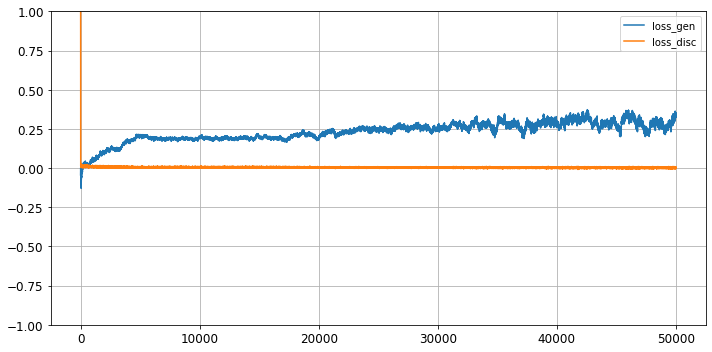

In [9]:
print('Loss: ')
fig, ax = plt.subplots(1,1, figsize=[10,5])
plt.ylim([-1,1])
ax.plot(hist)
ax.legend(['loss_gen', 'loss_disc'])

#ax.set_yscale('log')
ax.grid()
plt.tight_layout()
plt.savefig('GANS/Losses/GANS_loss'+str(j)+'.png')

In [10]:
wgan.generator.save('GANS/Models/GAN_'+str(j))
generator = keras.models.load_model('GANS/Models/GAN_'+str(j))
#plt.close()

INFO:tensorflow:Assets written to: GANS/Models/GAN_0/assets


### Sampleing from the latent space

Predicted Values: (1000, 3)
latent_space: 300
BATCH_SIZE: 100
use_bias: False
epochs: 50000
X-Y 2D slices:


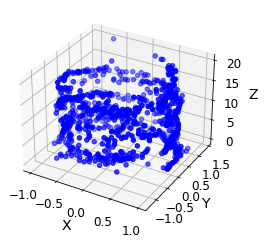

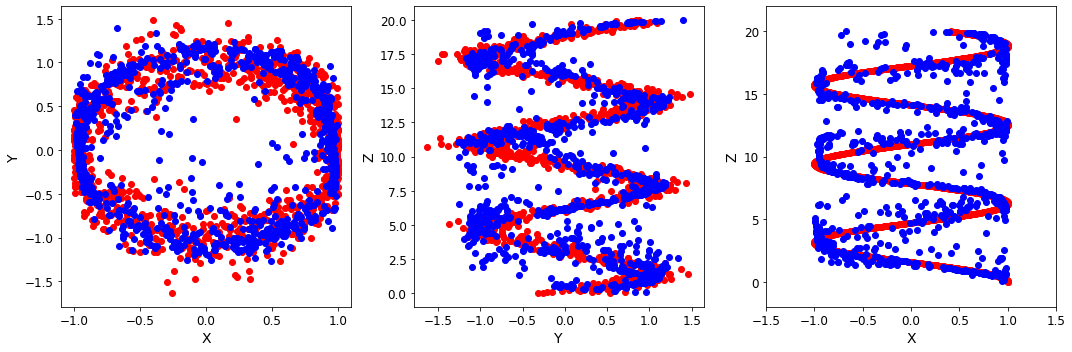

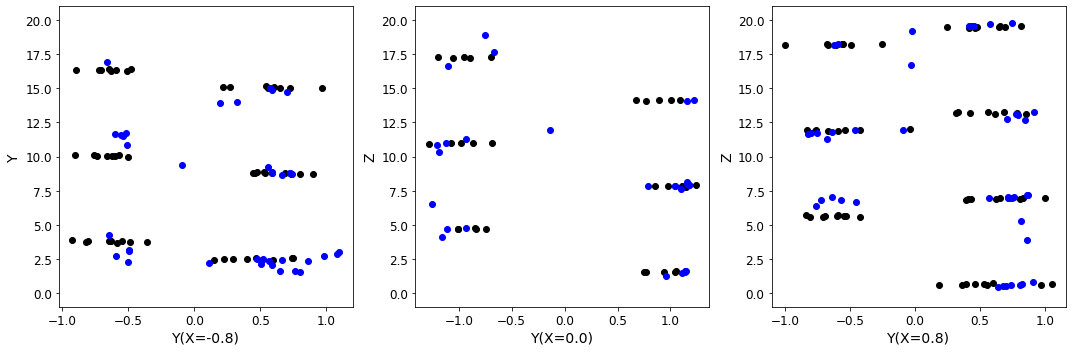

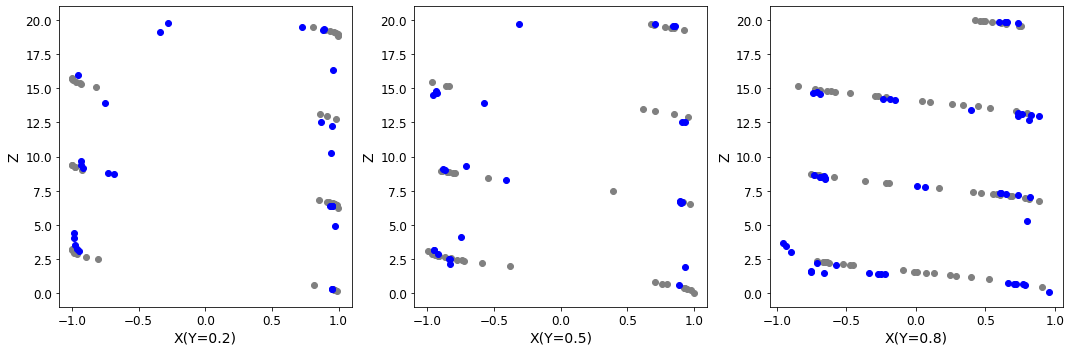

In [11]:
#sampling from the latent space without prediction
latent_values = tf.random.normal([1000, latent_space], mean=0.0, stddev=0.1)

#predict the labels of the data values on the basis of the trained model.
predicted_values = wgan.generator.predict(latent_values)
if scaled == '-1-1':
    predicted_values[:,:]=(predicted_values[:,:])
    predicted_values = scaler.inverse_transform(predicted_values)
elif scaled =='0-1':
    predicted_values = scaler.inverse_transform(predicted_values)
    

if n_features==3:
    print("Predicted Values:",predicted_values.shape)
    print("latent_space:",latent_space)
    print("BATCH_SIZE:",BATCH_SIZE)
    print("use_bias:",use_bias)
    print("epochs:",epochs)
    

    ab = plt.subplot(projection='3d')
    #ab.scatter(X_train[:,0],X_train[:,1],y_train, c='r')
    ab.scatter(predicted_values[:,0],predicted_values[:,1],predicted_values[:,2], c='b')
    ab.set_ylabel('Y')
    ab.set_zlabel('Z')
    ab.set_xlabel('X')
    
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1], c='r')
    axes[0].scatter(predicted_values[:,0],predicted_values[:,1],c='b')
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train,c='r')
    axes[1].scatter(predicted_values[:,1],predicted_values[:,2], c='b')
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train,c='r')
    axes[2].scatter(predicted_values[:,0],predicted_values[:,2], c='b')
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(predicted_values[:,0]>=-0.8-0.05,predicted_values[:,0]<=-0.8+0.05),predicted_values[:,1],None)
    axes[0].scatter(ac,y_train, c='black')
    axes[0].scatter(ad,predicted_values[:,2], c='b')
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(predicted_values[:,0]>=0.0-0.05,predicted_values[:,0]<=0.0+0.05),predicted_values[:,1],None)
    axes[1].scatter(ae,y_train, c='black')
    axes[1].scatter(af,predicted_values[:,2], c='b')
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(predicted_values[:,0]>=0.8-0.05,predicted_values[:,0]<=0.8+0.05),predicted_values[:,1],None)
    axes[2].scatter(ag,y_train, c='black')
    axes[2].scatter(ah,predicted_values[:,2], c='b')
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(predicted_values[:,1]>=0.2-0.05,predicted_values[:,1]<=0.2+0.05),predicted_values[:,0],None)
    axes[0].scatter(ac,y_train, c='gray')
    axes[0].scatter(ad,predicted_values[:,2], c='b')
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(predicted_values[:,1]>=0.5-0.05,predicted_values[:,1]<=0.5+0.05),predicted_values[:,0],None)
    axes[1].scatter(ae,y_train, c='gray')
    axes[1].scatter(af,predicted_values[:,2], c='b')
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(predicted_values[:,1]>=0.8-0.05,predicted_values[:,1]<=0.8+0.05),predicted_values[:,0],None)
    axes[2].scatter(ag,y_train, c='gray')
    axes[2].scatter(ah,predicted_values[:,2], c='b')
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    print("Predicted Values:",predicted_values.shape)
    plt.scatter(X_train, y_train,c='r')
    plt.scatter(predicted_values[:,0],predicted_values[:,1], c='b')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()
    
    
    #change the dense layer

### Applying the prediction function

input_test : (400, 3)


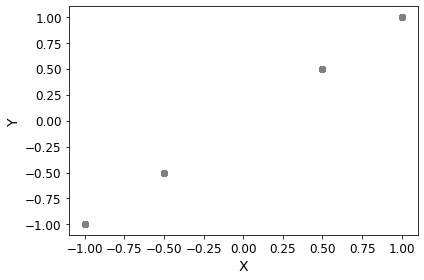

In [15]:
# define these for desired prediction
x_input = [-1,-0.5,0.5,1]
n_points = 400

# produces an input of fixed x coordinates with random y,z values
predict1 = np.full((n_points//4, n_features), x_input[0])
predict2 = np.full((n_points//4, n_features), x_input[1])
predict3 = np.full((n_points//4, n_features), x_input[2])
predict4 = np.full((n_points//4, n_features), x_input[3])
predictthis = np.concatenate((predict1, predict2, predict3, predict4))

input_test = predictthis.reshape(n_points, n_features).astype('float32')

print("input_test :",input_test.shape)

plt.scatter(input_test[:,0],input_test[:,1] ,c='grey')
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()
    

In [ ]:
X_generated = wgan.predict(input_test, scaler)

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (400, 3)
input: (

In [ ]:
if scenario in ("3d", "helix"):
    print("latent_space=",latent_space)
    print("Epochs=",epochs)
    print("BATCH_SIZE=",BATCH_SIZE)
    print("use_bias=",use_bias)
    
    ax = plt.subplot(projection='3d')
    ax.scatter(X_generated[:,0], X_generated[:,1], X_generated[:,2], c='b', label='Generated Data')
    #ax.scatter(X_train[:,0], X_train[:,1], y_train, c='r', label='Sample Data')

    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    plt.legend(loc='best')
    plt.tight_layout()
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1], c='r')
    axes[0].scatter(X_generated[:,0],X_generated[:,1],c='b')
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train,c='r')
    axes[1].scatter(X_generated[:,1],X_generated[:,2], c='b')
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train,c='r')
    axes[2].scatter(X_generated[:,0],X_generated[:,2], c='b')
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(X_generated[:,0]>=-0.8-0.05,X_generated[:,0]<=-0.8+0.05),X_generated[:,1],None)
    axes[0].scatter(ac,y_train, c='black')
    axes[0].scatter(ad,X_generated[:,2], c='b')
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(X_generated[:,0]>=0.0-0.05,X_generated[:,0]<=0.0+0.05),X_generated[:,1],None)
    axes[1].scatter(ae,y_train, c='black')
    axes[1].scatter(af,X_generated[:,2], c='b')
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(X_generated[:,0]>=0.8-0.05,X_generated[:,0]<=0.8+0.05),X_generated[:,1],None)
    axes[2].scatter(ag,y_train, c='black')
    axes[2].scatter(ah,X_generated[:,2], c='b')
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(X_generated[:,1]>=0.2-0.05,X_generated[:,1]<=0.2+0.05),X_generated[:,0],None)
    axes[0].scatter(ac,y_train, c='black')
    axes[0].scatter(ad,X_generated[:,2], c='b')
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(X_generated[:,1]>=0.5-0.05,X_generated[:,1]<=0.5+0.05),X_generated[:,0],None)
    axes[1].scatter(ae,y_train, c='black')
    axes[1].scatter(af,X_generated[:,2], c='b')
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(X_generated[:,1]>=0.8-0.05,X_generated[:,1]<=0.8+0.05),X_generated[:,0],None)
    axes[2].scatter(ag,y_train, c='black')
    axes[2].scatter(ah,X_generated[:,2], c='b')
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    print("Generated Data:",X_generated.shape)
    plt.scatter(X_train, y_train,c='r',label="Sample Data")
    plt.scatter(X_generated[:,0],X_generated[:,1], c='b')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()
    